https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772

In [67]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from  tqdm import tqdm
import gc
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

pd.set_option("display.max_columns", 2000)

In [68]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [69]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [70]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [71]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [72]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [73]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [74]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

## 学習データ準備

In [75]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = pd.read_csv('../input/application_test.csv')


# Remove some rows with values not present in test set
#app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_INCOME_TYPE'] == 'Maternity leave'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace = True)
app_train['bur NAN num'] = app_train.isnull().sum(axis = 1).values
app_test['bur NAN num'] = app_test.isnull().sum(axis = 1).values


app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

### <a id="0.1">0.1 Prepare - Data Cleaning</a>

In [76]:
    
# Remove some empty features
data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
            'FLAG_DOCUMENT_21'], axis = 1, inplace = True)
    
# Replace some outliers
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
data.loc[data['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
data.loc[data['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
data.loc[data['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
data.loc[data['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
data.loc[data['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan

In [77]:
# 割合別
data['app self cate OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].replace({'High skill tech staff':'High_Skill',
                                    'Managers':0,
                                    'Accountants':0,
                                    'HR staff':0,
                                    'Core staff':0,
                                   'Cooking staff':1,
                                    'Realty agents':0,
                                    'Sales staff':1,
                                    'IT staff':0,
                                    'Medicine staff':0,
                                    'Secretaries':0,
                                    'Security staff':1,
                                    'Cleaning staff':1,
                                      'Laborers':1,
                                      'Low-skill Laborers':1,
                                      'Cleaning staff':1,
                                    'Waiters/barmen staff':1,
                                    'Private service staff':0,
                                    'Drivers':1,
                                    'High skill tech staff':0                                                                       
                                   },inplace=False)

data['app self cate NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].replace(
                        {'Businessman':0,
                         'Student':0,
                         'Unemployed':1,
                         'Working':1,
                         'Commercial associate':0,                        
                         'State servant':0,
                         'Pensioner':0,                         
                         'Maternity leave':1}
                        ,inplace=False)

data['app self cate NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].replace(
                        {'Rented apartment':1,
                         'With parents':1,
                         'Municipal apartment':0,
                         'Co-op apartment':0,
                         'House / apartment':0,                        
                         'Office apartment':0}
                        ,inplace=False)

data['app self cate ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace(
{'Transport':1, 
'Industry: type 13':1, 
'Industry: type 8':1, 
'Restaurant':1, 
'Construction':1,
'Cleaning':1,
'Industry: type 1':1,
'Industry: type 3':1,
'Realtor':1,
'Agriculture':1,
'Trade: type 3':1,
'Self-employed':1,
'Industry: type 4':1,
'Security':0,
'Trade: type 7':0,
'Business Entity Type 3':0,
'Transport: type 4':0,
'Mobile':0,
'Trade: type 1':0,
'Industry: type 11':0,
'Business Entity Type 2':0,
'Postal':0,
'Advertising':0,
'Business Entity Type 1':0,
'Industry: type 7':0,
'Housing':0,
'Legal Services':0,
'Transport: type 2':0,
'Other':0,
'Telecom':0,
'Industry: type 2':0,
'Industry: type 6':0,
'Emergency':0,
'Kindergarten':0,
'Trade: type 2':0,
'Government':0,
'Industry: type 5':0,
'Industry: type 9':0,
'Electricity':0,
'Services':0,
'Medicine':0,
'Industry: type 10':0,
'Hotel':0,
'Trade: type 5':0,
'School':0,
'Religion':0,
'Insurance':0,
'Culture':0,
'XNA':0,
'Bank':0,
'Military':0,
'Police':0,
'University':0,
'Security Ministries':0,
'Trade: type 6':0,
'Transport: type 1':0,
'Industry: type 12':0,
'Trade: type 4':0}
                        ,inplace=False)

### <a id="0.2">0.2 Prepare - Categorical Data Processing</a>

In [78]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

## feature engineering

### <a id="1.1">1.1 Feature Engineering - Previous Applications</a>

In [79]:

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['pre SK_ID_PREV_CNT'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
previous_application.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Days 365.243 values -> nan
previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# nan num
previous_application['pre NAN num'] = previous_application.isnull().sum(axis = 1).values

# Add feature: value ask / value received percentage
previous_application['pre AMT_APPLICATION / AMT_CREDIT'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre loan AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre revo AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']

previous_application['pre loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre con loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Consumer loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre revo AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['pre_' + col + '_MEAN' for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')
del prev_apps_avg
gc.collect()

# Previous applications numeric features
num_aggregations = {
        'AMT_ANNUITY': ['max'],
        'AMT_APPLICATION': ['max'],
        'AMT_CREDIT': ['max', 'sum'],
        'pre AMT_APPLICATION / AMT_CREDIT': ['max'],
        'AMT_DOWN_PAYMENT': ['max'],
        'AMT_GOODS_PRICE': ['max'],
        'HOUR_APPR_PROCESS_START': ['max'],
        'RATE_DOWN_PAYMENT': ['max'],
        'DAYS_DECISION': ['max'],
        'CNT_PAYMENT': ['sum'],
}

cat_aggregations = {}

prev_agg = previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['pre_' + e[0] for e in prev_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['pre_APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['pre_REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_done = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg
gc.collect()

data = data.merge(right=prev_done.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.2">1.2 Feature Engineering - Bureau Data</a>

In [80]:
bureau['bur NAN num'] = bureau.isnull().sum(axis = 1).values
bureau_balance['bur_bal NAN num'] = bureau_balance.isnull().sum(axis = 1).values

# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['bur CNT'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['bur_' + f_ + 'MEAN' for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')
del bureau_avg
gc.collect()

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bureau_balance, bb_agg
gc.collect()

# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': [ 'max', 'var'],
    'DAYS_CREDIT_ENDDATE': [ 'max'],
    'DAYS_CREDIT_UPDATE': ['max'],
    'CREDIT_DAY_OVERDUE': ['max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max'],
    'AMT_CREDIT_SUM': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_DEBT': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max'],
    'AMT_CREDIT_SUM_LIMIT': ['max', 'sum'],
    'AMT_ANNUITY': ['max'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['max', 'sum']
}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
 
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['bur_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['bur_ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['bur_CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau
gc.collect()

data = data.merge(right=bureau_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.3">1.3 Feature Engineering - Previous Installments</a>

In [81]:
installments_payments['ins NAN num'] = installments_payments.isnull().sum(axis = 1).values

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['ins_' + f_ + 'MEAN' for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
del avg_inst
gc.collect()

## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['ins_SK_ID_PREV_CNT'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])
installments_payments.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['ins AMT_PAYMENT / AMT_INSTALMENT'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['ins AMT_INSTALMENT / AMT_PAYMENT'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'].apply(lambda x: x if x > 0 else 0)
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'].apply(lambda x: x if x > 0 else 0)

# Features: Perform aggregations
aggregations = {
     'NUM_INSTALMENT_VERSION': ['nunique'],
     'ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT': ['max', 'sum','min','std' ],
     'ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT': ['max', 'sum','min','std'],
     'ins AMT_PAYMENT / AMT_INSTALMENT': [ 'max', 'var','min','std'],
     'ins AMT_INSTALMENT / AMT_PAYMENT': [ 'max', 'var','min','std'],
     'AMT_INSTALMENT': ['max', 'sum','min','std'],
     'AMT_PAYMENT': ['min', 'max', 'sum','std'],
     'DAYS_ENTRY_PAYMENT': ['max', 'sum','std']
}
ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['ins_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
del installments_payments
gc.collect()

data = data.merge(right=ins_agg.reset_index(), how='left', on='SK_ID_CURR')



### <a id="1.4">1.4 Feature Engineering - Pos Cash Balance</a>

In [82]:
pcb['pcb NAN num'] = pcb.isnull().sum(axis = 1).values

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')
del pcb_avg
gc.collect()

### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['pcb_SK_ID_PREV_CNT'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])
pcb.drop(['SK_ID_PREV'], axis = 1, inplace = True)

# Features
aggregations = {
     'MONTHS_BALANCE': ['max', 'size'],
     'CNT_INSTALMENT' : ['mean', 'max'],
     'CNT_INSTALMENT_FUTURE' : ['mean', 'max'],
     'SK_DPD': ['mean', 'max'],
     'SK_DPD_DEF': ['mean','max']
}
   
pos_agg = pcb.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['pcb_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# Count pos cash accounts
pos_agg['POS_COUNT'] = pcb.groupby('SK_ID_CURR').size()
del pcb
gc.collect()

data = data.merge(right=pos_agg.reset_index(), how='left', on='SK_ID_CURR')



### <a id="1.5">1.5 Feature Engineering - Credit Card Balance </a>

In [83]:
credit_card_balance['cre NAN num'] = credit_card_balance.isnull().sum(axis = 1).values

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ + 'MEAN' for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
del avg_cc_bal
gc.collect()

### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['cre_SK_ID_PREV_CNT'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)

# General aggregations
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg([ 'max', 'sum', 'var'])
cc_agg.columns = pd.Index(['cre_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
data = data.merge(right=cc_agg.reset_index(), how='left', on='SK_ID_CURR')
del cc_agg
gc.collect()



91

### <a id="1.6">1.6 Feature Engineering - app </a>

In [84]:
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

# loan 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']

# 世帯持ち 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']

# NAME_INCOME_TYPE  Maternity leave
data['app  AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']

data['app missing'] = data.isnull().sum(axis = 1).values
    
data['app EXT_SOURCE mean'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
data['app EXT_SOURCE std'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis = 1)
data['app EXT_SOURCE prod'] = data['EXT_SOURCE_1'] * data['EXT_SOURCE_2'] * data['EXT_SOURCE_3']
data['app EXT_SOURCE_1 * DAYS_EMPLOYED'] = data['EXT_SOURCE_1'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_2 * DAYS_EMPLOYED'] = data['EXT_SOURCE_2'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_3 * DAYS_EMPLOYED'] = data['EXT_SOURCE_3'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_1 / DAYS_BIRTH'] = data['EXT_SOURCE_1'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_2 / DAYS_BIRTH'] = data['EXT_SOURCE_2'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_3 / DAYS_BIRTH'] = data['EXT_SOURCE_3'] / data['DAYS_BIRTH']
  
data['app AMT_CREDIT - AMT_GOODS_PRICE'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_GOODS_PRICE'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  
data['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / 12. - data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = data['AMT_INCOME_TOTAL'] - data['AMT_GOODS_PRICE']
data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app AMT_INCOME_TOTAL / CNT_CHILDREN'] = data['AMT_INCOME_TOTAL'] / (1 + data['CNT_CHILDREN'])
    
data['app most popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([225000, 450000, 675000, 900000]).map({True: 1, False: 0})
data['app popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([1125000, 1350000, 1575000, 1800000, 2250000]).map({True: 1, False: 0})
    
data['app OWN_CAR_AGE / DAYS_BIRTH'] = data['OWN_CAR_AGE'] / data['DAYS_BIRTH']
data['app OWN_CAR_AGE / DAYS_EMPLOYED'] = data['OWN_CAR_AGE'] / data['DAYS_EMPLOYED']
    
data['app DAYS_LAST_PHONE_CHANGE / DAYS_BIRTH'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_BIRTH']
data['app DAYS_LAST_PHONE_CHANGE / DAYS_EMPLOYED'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_EMPLOYED']
data['app DAYS_EMPLOYED - DAYS_BIRTH'] = data['DAYS_EMPLOYED'] - data['DAYS_BIRTH']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    
data['app CNT_CHILDREN / CNT_FAM_MEMBERS'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']

data['app OBS_30_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'] - data['DEF_30_CNT_SOCIAL_CIRCLE']
data['app OBS_60_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'] - data['DEF_60_CNT_SOCIAL_CIRCLE']
data['app DAYS_EMPLOYED - DAYS_REGISTRATION'] = data['DAYS_EMPLOYED'] - data['DAYS_REGISTRATION']
data['app DAYS_EMPLOYED - DAYS_ID_PUBLISH'] = data['DAYS_EMPLOYED'] - data['DAYS_ID_PUBLISH']
data['app DAYS_ID_PUBLISH - DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'] - data['DAYS_ID_PUBLISH']

data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app CNT_CHILDREN / CNT_CHILDREN'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']
    


In [85]:
# app self cate OCCUPATION_TYPE
data['app self cate occ AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app self cate OCCUPATION_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app self cate occ AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app self cate OCCUPATION_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app self cate occ AMT_CREDIT / AMT_ANNUITY'] = data['app self cate OCCUPATION_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app self cate occ DAYS_EMPLOYED / DAYS_BIRTH'] = data['app self cate OCCUPATION_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

# app self cate NAME_INCOME_TYPE
data['app self cate income AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app self cate NAME_INCOME_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app self cate income AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app self cate NAME_INCOME_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app self cate income AMT_CREDIT / AMT_ANNUITY'] = data['app self cate NAME_INCOME_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app self cate income DAYS_EMPLOYED / DAYS_BIRTH'] = data['app self cate NAME_INCOME_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

# app self cate NAME_HOUSING_TYPE
data['app self cate housing AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app self cate NAME_HOUSING_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app self cate housing AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app self cate NAME_HOUSING_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app self cate housing AMT_CREDIT / AMT_ANNUITY'] = data['app self cate NAME_HOUSING_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app self cate housing DAYS_EMPLOYED / DAYS_BIRTH'] = data['app self cate NAME_HOUSING_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

# app self cate ORGANIZATION_TYPE
data['app self cate org AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app self cate ORGANIZATION_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app self cate org AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app self cate ORGANIZATION_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app self cate org AMT_CREDIT / AMT_ANNUITY'] = data['app self cate ORGANIZATION_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app self cate org DAYS_EMPLOYED / DAYS_BIRTH'] = data['app self cate ORGANIZATION_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']


### <a id="1.7">1.7 Feature Engineering - PolyFeature </a>

In [88]:
# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
pd_poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH']))
pd_poly_features = pd_poly_features.drop(columns =['1', 'POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH'])
data_reset = data.reset_index()
pd_poly_features['SK_ID_CURR'] = data_reset['SK_ID_CURR'] 
data = data.merge(pd_poly_features, on = 'SK_ID_CURR', how = 'left')

Polynomial Features shape:  (356255, 35)


### <a id="2.0">2.0 Prepare Final Train and Test data</a>

In [89]:
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### <a id="2.1">2.1 StratifiedKFold, GridSearch</a>

In [90]:
data.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            0             0                0   
1      100003                   0            1             0                1   
2      100004                   1            0             1                0   
3      100006                   0            1             0                0   
4      100007                   0            0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   
1                1                 1                    1                   1   
2                0                 0                    0                   0   
3                0                 0                    0                   2   
4                0                 0                    0                   0   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801       -9461         -637.0   
1                  0                    0.003541      -16765        -1188.0   
2                  0                    0.010032      -19046         -225.0   
3                  0                    0.008019      -19005        -3039.0   
4                  0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437          NaN           1   
4            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                1              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                1              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          2.0                           0   
1                          1.0                           1   
2                          2.0                           1   
3                          2.0                           0   
4                          2.0                           2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [91]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
max_score = -100
max_params = None

all_params = {'task': ['train'], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'metric': ['auc'], 
          'learning_rate': [0.01], 'num_leaves': [16, 48, 64], 'num_iteration': [5000], 'verbose': [0] ,
          'colsample_bytree':[0.8], 'subsample':[0.9], 'max_depth':[5, 7, 8], 'reg_alpha':[0.1], 'reg_lambda':[0.1], 
          'min_split_gain':[0.01], 'min_child_weight':[1]}

list_auc_score = []
list_preds = []

for params in tqdm(list(ParameterGrid(all_params))):
    for train_idx, valid_idx in cv.split(trainX, Y):
        trn_x = trainX.iloc[train_idx, :]
        val_x = trainX.iloc[valid_idx, :]
    
        trn_y = Y[train_idx]
        val_y = Y[valid_idx]
    
        #lgb_train = lgb.Dataset(data=trn_x, label=trn_y)
        #lgb_eval = lgb.Dataset(data=val_x, label=val_y)
        #model = lgb.train(params, lgb_train,  valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)
        #preds_val = model.predict(val_x)
        #preds = model.predict(testX)       
        
        clf = lgb.sklearn.LGBMClassifier(**params)
        clf.fit(trn_x,
                    trn_y,
                    eval_set=[(val_x, val_y)],
                    early_stopping_rounds=150,
                    eval_metric='auc'
                )        
        preds_val = clf.predict_proba(val_x, num_iteration = clf.best_iteration_)[:, 1]
        preds = clf.predict_proba(testX, num_iteration=clf.best_iteration_)[:, 1]
        
        auc = roc_auc_score(val_y, preds_val)
        list_auc_score.append(auc)
        list_preds.append(preds)
        
        if (max_score < auc):
            max_score = auc
            max_params = params
    
sc_auc_score = np.mean(list_auc_score)
print(sc_auc_score, max_score, params)


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

[1]	valid_0's auc: 0.718256
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.719482
[3]	valid_0's auc: 0.721928
[4]	valid_0's auc: 0.722596
[5]	valid_0's auc: 0.723008
[6]	valid_0's auc: 0.72381
[7]	valid_0's auc: 0.724032
[8]	valid_0's auc: 0.724305
[9]	valid_0's auc: 0.724462
[10]	valid_0's auc: 0.726695
[11]	valid_0's auc: 0.726901
[12]	valid_0's auc: 0.727649
[13]	valid_0's auc: 0.72809
[14]	valid_0's auc: 0.729535
[15]	valid_0's auc: 0.729897
[16]	valid_0's auc: 0.730096
[17]	valid_0's auc: 0.730205
[18]	valid_0's auc: 0.730335
[19]	valid_0's auc: 0.731013
[20]	valid_0's auc: 0.731526
[21]	valid_0's auc: 0.731822
[22]	valid_0's auc: 0.732056
[23]	valid_0's auc: 0.732333
[24]	valid_0's auc: 0.733063
[25]	valid_0's auc: 0.733261
[26]	valid_0's auc: 0.733351
[27]	valid_0's auc: 0.733593
[28]	valid_0's auc: 0.734048
[29]	valid_0's auc: 0.734411
[30]	valid_0's auc: 0.734461
[31]	valid_0's auc: 0.734522
[32]	valid_0's auc: 0.734723
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.762533
[277]	valid_0's auc: 0.76264
[278]	valid_0's auc: 0.762728
[279]	valid_0's auc: 0.762799
[280]	valid_0's auc: 0.762898
[281]	valid_0's auc: 0.762961
[282]	valid_0's auc: 0.763027
[283]	valid_0's auc: 0.763113
[284]	valid_0's auc: 0.763195
[285]	valid_0's auc: 0.763243
[286]	valid_0's auc: 0.763313
[287]	valid_0's auc: 0.763412
[288]	valid_0's auc: 0.763502
[289]	valid_0's auc: 0.763595
[290]	valid_0's auc: 0.763658
[291]	valid_0's auc: 0.763739
[292]	valid_0's auc: 0.763807
[293]	valid_0's auc: 0.763882
[294]	valid_0's auc: 0.763967
[295]	valid_0's auc: 0.764061
[296]	valid_0's auc: 0.76413
[297]	valid_0's auc: 0.764223
[298]	valid_0's auc: 0.764287
[299]	valid_0's auc: 0.764343
[300]	valid_0's auc: 0.764401
[301]	valid_0's auc: 0.764474
[302]	valid_0's auc: 0.764544
[303]	valid_0's auc: 0.764613
[304]	valid_0's auc: 0.764682
[305]	valid_0's auc: 0.764721
[306]	valid_0's auc: 0.764793
[307]	valid_0's auc: 0.764876
[308]	valid_0's auc: 0.764954
[309]	valid_

[550]	valid_0's auc: 0.775082
[551]	valid_0's auc: 0.775102
[552]	valid_0's auc: 0.775119
[553]	valid_0's auc: 0.775151
[554]	valid_0's auc: 0.775185
[555]	valid_0's auc: 0.775212
[556]	valid_0's auc: 0.775216
[557]	valid_0's auc: 0.775254
[558]	valid_0's auc: 0.775269
[559]	valid_0's auc: 0.775297
[560]	valid_0's auc: 0.775326
[561]	valid_0's auc: 0.775368
[562]	valid_0's auc: 0.77541
[563]	valid_0's auc: 0.775443
[564]	valid_0's auc: 0.775482
[565]	valid_0's auc: 0.775515
[566]	valid_0's auc: 0.775545
[567]	valid_0's auc: 0.775575
[568]	valid_0's auc: 0.7756
[569]	valid_0's auc: 0.77563
[570]	valid_0's auc: 0.775666
[571]	valid_0's auc: 0.775698
[572]	valid_0's auc: 0.775719
[573]	valid_0's auc: 0.775752
[574]	valid_0's auc: 0.775772
[575]	valid_0's auc: 0.7758
[576]	valid_0's auc: 0.775833
[577]	valid_0's auc: 0.775859
[578]	valid_0's auc: 0.775889
[579]	valid_0's auc: 0.775909
[580]	valid_0's auc: 0.775944
[581]	valid_0's auc: 0.77596
[582]	valid_0's auc: 0.775978
[583]	valid_0's a

[824]	valid_0's auc: 0.780427
[825]	valid_0's auc: 0.780438
[826]	valid_0's auc: 0.780442
[827]	valid_0's auc: 0.780462
[828]	valid_0's auc: 0.780479
[829]	valid_0's auc: 0.780485
[830]	valid_0's auc: 0.780498
[831]	valid_0's auc: 0.780513
[832]	valid_0's auc: 0.780524
[833]	valid_0's auc: 0.780534
[834]	valid_0's auc: 0.780547
[835]	valid_0's auc: 0.780563
[836]	valid_0's auc: 0.78057
[837]	valid_0's auc: 0.780587
[838]	valid_0's auc: 0.780601
[839]	valid_0's auc: 0.780613
[840]	valid_0's auc: 0.780614
[841]	valid_0's auc: 0.780629
[842]	valid_0's auc: 0.78064
[843]	valid_0's auc: 0.78065
[844]	valid_0's auc: 0.780662
[845]	valid_0's auc: 0.780684
[846]	valid_0's auc: 0.780689
[847]	valid_0's auc: 0.780704
[848]	valid_0's auc: 0.780719
[849]	valid_0's auc: 0.780735
[850]	valid_0's auc: 0.780749
[851]	valid_0's auc: 0.780769
[852]	valid_0's auc: 0.780778
[853]	valid_0's auc: 0.780796
[854]	valid_0's auc: 0.780803
[855]	valid_0's auc: 0.780822
[856]	valid_0's auc: 0.780839
[857]	valid_0

[1094]	valid_0's auc: 0.783188
[1095]	valid_0's auc: 0.783206
[1096]	valid_0's auc: 0.783213
[1097]	valid_0's auc: 0.783228
[1098]	valid_0's auc: 0.783244
[1099]	valid_0's auc: 0.783245
[1100]	valid_0's auc: 0.783257
[1101]	valid_0's auc: 0.783272
[1102]	valid_0's auc: 0.783285
[1103]	valid_0's auc: 0.783295
[1104]	valid_0's auc: 0.783296
[1105]	valid_0's auc: 0.783301
[1106]	valid_0's auc: 0.783317
[1107]	valid_0's auc: 0.783328
[1108]	valid_0's auc: 0.783337
[1109]	valid_0's auc: 0.783346
[1110]	valid_0's auc: 0.783352
[1111]	valid_0's auc: 0.783359
[1112]	valid_0's auc: 0.783365
[1113]	valid_0's auc: 0.78338
[1114]	valid_0's auc: 0.78339
[1115]	valid_0's auc: 0.783407
[1116]	valid_0's auc: 0.783414
[1117]	valid_0's auc: 0.783419
[1118]	valid_0's auc: 0.783427
[1119]	valid_0's auc: 0.783434
[1120]	valid_0's auc: 0.783441
[1121]	valid_0's auc: 0.783449
[1122]	valid_0's auc: 0.783448
[1123]	valid_0's auc: 0.783454
[1124]	valid_0's auc: 0.783451
[1125]	valid_0's auc: 0.783464
[1126]	val

[1359]	valid_0's auc: 0.784978
[1360]	valid_0's auc: 0.784982
[1361]	valid_0's auc: 0.784992
[1362]	valid_0's auc: 0.784995
[1363]	valid_0's auc: 0.784999
[1364]	valid_0's auc: 0.785007
[1365]	valid_0's auc: 0.785008
[1366]	valid_0's auc: 0.785014
[1367]	valid_0's auc: 0.785024
[1368]	valid_0's auc: 0.785029
[1369]	valid_0's auc: 0.785031
[1370]	valid_0's auc: 0.785027
[1371]	valid_0's auc: 0.785034
[1372]	valid_0's auc: 0.785034
[1373]	valid_0's auc: 0.785037
[1374]	valid_0's auc: 0.785042
[1375]	valid_0's auc: 0.785047
[1376]	valid_0's auc: 0.785051
[1377]	valid_0's auc: 0.785059
[1378]	valid_0's auc: 0.78506
[1379]	valid_0's auc: 0.785058
[1380]	valid_0's auc: 0.785061
[1381]	valid_0's auc: 0.785066
[1382]	valid_0's auc: 0.785063
[1383]	valid_0's auc: 0.785066
[1384]	valid_0's auc: 0.785065
[1385]	valid_0's auc: 0.785076
[1386]	valid_0's auc: 0.785087
[1387]	valid_0's auc: 0.785087
[1388]	valid_0's auc: 0.785095
[1389]	valid_0's auc: 0.785101
[1390]	valid_0's auc: 0.785103
[1391]	va

[1624]	valid_0's auc: 0.786044
[1625]	valid_0's auc: 0.786038
[1626]	valid_0's auc: 0.786031
[1627]	valid_0's auc: 0.786037
[1628]	valid_0's auc: 0.786044
[1629]	valid_0's auc: 0.786049
[1630]	valid_0's auc: 0.786057
[1631]	valid_0's auc: 0.78606
[1632]	valid_0's auc: 0.786069
[1633]	valid_0's auc: 0.786072
[1634]	valid_0's auc: 0.786072
[1635]	valid_0's auc: 0.786076
[1636]	valid_0's auc: 0.78608
[1637]	valid_0's auc: 0.786085
[1638]	valid_0's auc: 0.786088
[1639]	valid_0's auc: 0.786092
[1640]	valid_0's auc: 0.786097
[1641]	valid_0's auc: 0.786103
[1642]	valid_0's auc: 0.786122
[1643]	valid_0's auc: 0.786129
[1644]	valid_0's auc: 0.786133
[1645]	valid_0's auc: 0.78614
[1646]	valid_0's auc: 0.786147
[1647]	valid_0's auc: 0.786148
[1648]	valid_0's auc: 0.786155
[1649]	valid_0's auc: 0.786162
[1650]	valid_0's auc: 0.786165
[1651]	valid_0's auc: 0.786164
[1652]	valid_0's auc: 0.78617
[1653]	valid_0's auc: 0.786164
[1654]	valid_0's auc: 0.786166
[1655]	valid_0's auc: 0.786167
[1656]	valid

[1889]	valid_0's auc: 0.786956
[1890]	valid_0's auc: 0.786958
[1891]	valid_0's auc: 0.786966
[1892]	valid_0's auc: 0.78697
[1893]	valid_0's auc: 0.786968
[1894]	valid_0's auc: 0.786974
[1895]	valid_0's auc: 0.786979
[1896]	valid_0's auc: 0.786975
[1897]	valid_0's auc: 0.78697
[1898]	valid_0's auc: 0.786974
[1899]	valid_0's auc: 0.786978
[1900]	valid_0's auc: 0.786984
[1901]	valid_0's auc: 0.786991
[1902]	valid_0's auc: 0.786996
[1903]	valid_0's auc: 0.787001
[1904]	valid_0's auc: 0.786995
[1905]	valid_0's auc: 0.786994
[1906]	valid_0's auc: 0.786995
[1907]	valid_0's auc: 0.786997
[1908]	valid_0's auc: 0.787
[1909]	valid_0's auc: 0.787003
[1910]	valid_0's auc: 0.787005
[1911]	valid_0's auc: 0.787008
[1912]	valid_0's auc: 0.78701
[1913]	valid_0's auc: 0.787013
[1914]	valid_0's auc: 0.787016
[1915]	valid_0's auc: 0.787016
[1916]	valid_0's auc: 0.787023
[1917]	valid_0's auc: 0.787025
[1918]	valid_0's auc: 0.78702
[1919]	valid_0's auc: 0.787023
[1920]	valid_0's auc: 0.787023
[1921]	valid_0'

[2154]	valid_0's auc: 0.78745
[2155]	valid_0's auc: 0.78745
[2156]	valid_0's auc: 0.787451
[2157]	valid_0's auc: 0.78745
[2158]	valid_0's auc: 0.787448
[2159]	valid_0's auc: 0.787452
[2160]	valid_0's auc: 0.78745
[2161]	valid_0's auc: 0.787451
[2162]	valid_0's auc: 0.787459
[2163]	valid_0's auc: 0.787453
[2164]	valid_0's auc: 0.787448
[2165]	valid_0's auc: 0.787448
[2166]	valid_0's auc: 0.787455
[2167]	valid_0's auc: 0.787455
[2168]	valid_0's auc: 0.787452
[2169]	valid_0's auc: 0.787464
[2170]	valid_0's auc: 0.787462
[2171]	valid_0's auc: 0.78746
[2172]	valid_0's auc: 0.787468
[2173]	valid_0's auc: 0.787466
[2174]	valid_0's auc: 0.787466
[2175]	valid_0's auc: 0.787465
[2176]	valid_0's auc: 0.787466
[2177]	valid_0's auc: 0.787465
[2178]	valid_0's auc: 0.787464
[2179]	valid_0's auc: 0.787466
[2180]	valid_0's auc: 0.787467
[2181]	valid_0's auc: 0.787467
[2182]	valid_0's auc: 0.787469
[2183]	valid_0's auc: 0.787476
[2184]	valid_0's auc: 0.787484
[2185]	valid_0's auc: 0.787492
[2186]	valid_

[2419]	valid_0's auc: 0.787877
[2420]	valid_0's auc: 0.787884
[2421]	valid_0's auc: 0.787883
[2422]	valid_0's auc: 0.787887
[2423]	valid_0's auc: 0.78789
[2424]	valid_0's auc: 0.787896
[2425]	valid_0's auc: 0.787902
[2426]	valid_0's auc: 0.787905
[2427]	valid_0's auc: 0.787907
[2428]	valid_0's auc: 0.787916
[2429]	valid_0's auc: 0.78792
[2430]	valid_0's auc: 0.787917
[2431]	valid_0's auc: 0.787921
[2432]	valid_0's auc: 0.787923
[2433]	valid_0's auc: 0.787929
[2434]	valid_0's auc: 0.78793
[2435]	valid_0's auc: 0.787929
[2436]	valid_0's auc: 0.78793
[2437]	valid_0's auc: 0.78793
[2438]	valid_0's auc: 0.787928
[2439]	valid_0's auc: 0.78793
[2440]	valid_0's auc: 0.787937
[2441]	valid_0's auc: 0.787937
[2442]	valid_0's auc: 0.78794
[2443]	valid_0's auc: 0.787948
[2444]	valid_0's auc: 0.787949
[2445]	valid_0's auc: 0.787954
[2446]	valid_0's auc: 0.787955
[2447]	valid_0's auc: 0.787957
[2448]	valid_0's auc: 0.787955
[2449]	valid_0's auc: 0.787954
[2450]	valid_0's auc: 0.787961
[2451]	valid_0'

[2684]	valid_0's auc: 0.788158
[2685]	valid_0's auc: 0.78816
[2686]	valid_0's auc: 0.788159
[2687]	valid_0's auc: 0.788155
[2688]	valid_0's auc: 0.788157
[2689]	valid_0's auc: 0.788158
[2690]	valid_0's auc: 0.788162
[2691]	valid_0's auc: 0.788165
[2692]	valid_0's auc: 0.788167
[2693]	valid_0's auc: 0.788171
[2694]	valid_0's auc: 0.788173
[2695]	valid_0's auc: 0.78817
[2696]	valid_0's auc: 0.788177
[2697]	valid_0's auc: 0.788178
[2698]	valid_0's auc: 0.788176
[2699]	valid_0's auc: 0.788175
[2700]	valid_0's auc: 0.788175
[2701]	valid_0's auc: 0.78818
[2702]	valid_0's auc: 0.788185
[2703]	valid_0's auc: 0.78819
[2704]	valid_0's auc: 0.788185
[2705]	valid_0's auc: 0.788184
[2706]	valid_0's auc: 0.788187
[2707]	valid_0's auc: 0.788188
[2708]	valid_0's auc: 0.788189
[2709]	valid_0's auc: 0.788191
[2710]	valid_0's auc: 0.788197
[2711]	valid_0's auc: 0.788197
[2712]	valid_0's auc: 0.788199
[2713]	valid_0's auc: 0.788197
[2714]	valid_0's auc: 0.788199
[2715]	valid_0's auc: 0.788204
[2716]	valid

[2949]	valid_0's auc: 0.788442
[2950]	valid_0's auc: 0.788444
[2951]	valid_0's auc: 0.788447
[2952]	valid_0's auc: 0.788451
[2953]	valid_0's auc: 0.788449
[2954]	valid_0's auc: 0.788446
[2955]	valid_0's auc: 0.788446
[2956]	valid_0's auc: 0.788446
[2957]	valid_0's auc: 0.788441
[2958]	valid_0's auc: 0.788447
[2959]	valid_0's auc: 0.788453
[2960]	valid_0's auc: 0.788448
[2961]	valid_0's auc: 0.788447
[2962]	valid_0's auc: 0.78845
[2963]	valid_0's auc: 0.788452
[2964]	valid_0's auc: 0.788451
[2965]	valid_0's auc: 0.788447
[2966]	valid_0's auc: 0.788455
[2967]	valid_0's auc: 0.788451
[2968]	valid_0's auc: 0.78845
[2969]	valid_0's auc: 0.78845
[2970]	valid_0's auc: 0.788449
[2971]	valid_0's auc: 0.788453
[2972]	valid_0's auc: 0.788453
[2973]	valid_0's auc: 0.788452
[2974]	valid_0's auc: 0.78846
[2975]	valid_0's auc: 0.78846
[2976]	valid_0's auc: 0.788458
[2977]	valid_0's auc: 0.788456
[2978]	valid_0's auc: 0.788463
[2979]	valid_0's auc: 0.788462
[2980]	valid_0's auc: 0.788466
[2981]	valid_

[3214]	valid_0's auc: 0.788604
[3215]	valid_0's auc: 0.788606
[3216]	valid_0's auc: 0.788603
[3217]	valid_0's auc: 0.788605
[3218]	valid_0's auc: 0.788601
[3219]	valid_0's auc: 0.788603
[3220]	valid_0's auc: 0.788602
[3221]	valid_0's auc: 0.7886
[3222]	valid_0's auc: 0.788605
[3223]	valid_0's auc: 0.788608
[3224]	valid_0's auc: 0.788607
[3225]	valid_0's auc: 0.788609
[3226]	valid_0's auc: 0.788606
[3227]	valid_0's auc: 0.788605
[3228]	valid_0's auc: 0.788605
[3229]	valid_0's auc: 0.788602
[3230]	valid_0's auc: 0.788598
[3231]	valid_0's auc: 0.788597
[3232]	valid_0's auc: 0.788603
[3233]	valid_0's auc: 0.788602
[3234]	valid_0's auc: 0.788604
[3235]	valid_0's auc: 0.788606
[3236]	valid_0's auc: 0.78861
[3237]	valid_0's auc: 0.788612
[3238]	valid_0's auc: 0.788612
[3239]	valid_0's auc: 0.78861
[3240]	valid_0's auc: 0.788611
[3241]	valid_0's auc: 0.788608
[3242]	valid_0's auc: 0.788605
[3243]	valid_0's auc: 0.788601
[3244]	valid_0's auc: 0.788598
[3245]	valid_0's auc: 0.788595
[3246]	valid

[3479]	valid_0's auc: 0.788727
[3480]	valid_0's auc: 0.788723
[3481]	valid_0's auc: 0.788725
[3482]	valid_0's auc: 0.788729
[3483]	valid_0's auc: 0.788731
[3484]	valid_0's auc: 0.788732
[3485]	valid_0's auc: 0.788732
[3486]	valid_0's auc: 0.788732
[3487]	valid_0's auc: 0.788729
[3488]	valid_0's auc: 0.78873
[3489]	valid_0's auc: 0.788728
[3490]	valid_0's auc: 0.788724
[3491]	valid_0's auc: 0.788722
[3492]	valid_0's auc: 0.788725
[3493]	valid_0's auc: 0.788724
[3494]	valid_0's auc: 0.78872
[3495]	valid_0's auc: 0.78872
[3496]	valid_0's auc: 0.788719
[3497]	valid_0's auc: 0.788722
[3498]	valid_0's auc: 0.788723
[3499]	valid_0's auc: 0.78872
[3500]	valid_0's auc: 0.788724
[3501]	valid_0's auc: 0.788725
[3502]	valid_0's auc: 0.788726
[3503]	valid_0's auc: 0.788724
[3504]	valid_0's auc: 0.788722
[3505]	valid_0's auc: 0.788719
[3506]	valid_0's auc: 0.788724
[3507]	valid_0's auc: 0.788722
[3508]	valid_0's auc: 0.788732
[3509]	valid_0's auc: 0.78873
[3510]	valid_0's auc: 0.788731
[3511]	valid_

[3744]	valid_0's auc: 0.788753
[3745]	valid_0's auc: 0.788753
[3746]	valid_0's auc: 0.788753
[3747]	valid_0's auc: 0.788751
[3748]	valid_0's auc: 0.78875
[3749]	valid_0's auc: 0.788751
[3750]	valid_0's auc: 0.788753
[3751]	valid_0's auc: 0.788752
[3752]	valid_0's auc: 0.788755
[3753]	valid_0's auc: 0.788754
[3754]	valid_0's auc: 0.788755
[3755]	valid_0's auc: 0.788755
[3756]	valid_0's auc: 0.788755
[3757]	valid_0's auc: 0.78875
[3758]	valid_0's auc: 0.788747
[3759]	valid_0's auc: 0.788744
[3760]	valid_0's auc: 0.788748
[3761]	valid_0's auc: 0.788748
[3762]	valid_0's auc: 0.788744
[3763]	valid_0's auc: 0.788746
[3764]	valid_0's auc: 0.788744
[3765]	valid_0's auc: 0.788741
[3766]	valid_0's auc: 0.788742
[3767]	valid_0's auc: 0.788748
[3768]	valid_0's auc: 0.788749
[3769]	valid_0's auc: 0.788749
[3770]	valid_0's auc: 0.78875
[3771]	valid_0's auc: 0.788755
[3772]	valid_0's auc: 0.788758
[3773]	valid_0's auc: 0.788757
[3774]	valid_0's auc: 0.788768
[3775]	valid_0's auc: 0.78877
[3776]	valid

[217]	valid_0's auc: 0.756766
[218]	valid_0's auc: 0.756877
[219]	valid_0's auc: 0.756977
[220]	valid_0's auc: 0.757114
[221]	valid_0's auc: 0.757244
[222]	valid_0's auc: 0.757345
[223]	valid_0's auc: 0.757435
[224]	valid_0's auc: 0.75751
[225]	valid_0's auc: 0.757664
[226]	valid_0's auc: 0.757762
[227]	valid_0's auc: 0.757917
[228]	valid_0's auc: 0.758007
[229]	valid_0's auc: 0.758129
[230]	valid_0's auc: 0.758256
[231]	valid_0's auc: 0.758347
[232]	valid_0's auc: 0.758441
[233]	valid_0's auc: 0.758533
[234]	valid_0's auc: 0.758625
[235]	valid_0's auc: 0.758763
[236]	valid_0's auc: 0.758834
[237]	valid_0's auc: 0.758906
[238]	valid_0's auc: 0.759018
[239]	valid_0's auc: 0.759092
[240]	valid_0's auc: 0.759243
[241]	valid_0's auc: 0.759314
[242]	valid_0's auc: 0.759378
[243]	valid_0's auc: 0.759462
[244]	valid_0's auc: 0.759559
[245]	valid_0's auc: 0.759692
[246]	valid_0's auc: 0.759767
[247]	valid_0's auc: 0.759835
[248]	valid_0's auc: 0.759908
[249]	valid_0's auc: 0.759999
[250]	valid

[491]	valid_0's auc: 0.772573
[492]	valid_0's auc: 0.772605
[493]	valid_0's auc: 0.772624
[494]	valid_0's auc: 0.772648
[495]	valid_0's auc: 0.772673
[496]	valid_0's auc: 0.772719
[497]	valid_0's auc: 0.772755
[498]	valid_0's auc: 0.772776
[499]	valid_0's auc: 0.772794
[500]	valid_0's auc: 0.77283
[501]	valid_0's auc: 0.772854
[502]	valid_0's auc: 0.772883
[503]	valid_0's auc: 0.772905
[504]	valid_0's auc: 0.772936
[505]	valid_0's auc: 0.772961
[506]	valid_0's auc: 0.772982
[507]	valid_0's auc: 0.773007
[508]	valid_0's auc: 0.773034
[509]	valid_0's auc: 0.773066
[510]	valid_0's auc: 0.773101
[511]	valid_0's auc: 0.773153
[512]	valid_0's auc: 0.773185
[513]	valid_0's auc: 0.773202
[514]	valid_0's auc: 0.773227
[515]	valid_0's auc: 0.773247
[516]	valid_0's auc: 0.773268
[517]	valid_0's auc: 0.773305
[518]	valid_0's auc: 0.773333
[519]	valid_0's auc: 0.773377
[520]	valid_0's auc: 0.773402
[521]	valid_0's auc: 0.773423
[522]	valid_0's auc: 0.773443
[523]	valid_0's auc: 0.773472
[524]	valid

[764]	valid_0's auc: 0.778504
[765]	valid_0's auc: 0.778516
[766]	valid_0's auc: 0.778524
[767]	valid_0's auc: 0.778551
[768]	valid_0's auc: 0.778567
[769]	valid_0's auc: 0.778584
[770]	valid_0's auc: 0.778602
[771]	valid_0's auc: 0.778604
[772]	valid_0's auc: 0.778617
[773]	valid_0's auc: 0.778625
[774]	valid_0's auc: 0.77864
[775]	valid_0's auc: 0.778655
[776]	valid_0's auc: 0.778675
[777]	valid_0's auc: 0.778684
[778]	valid_0's auc: 0.778694
[779]	valid_0's auc: 0.778717
[780]	valid_0's auc: 0.778723
[781]	valid_0's auc: 0.778738
[782]	valid_0's auc: 0.778755
[783]	valid_0's auc: 0.778775
[784]	valid_0's auc: 0.778791
[785]	valid_0's auc: 0.778796
[786]	valid_0's auc: 0.778818
[787]	valid_0's auc: 0.778831
[788]	valid_0's auc: 0.778837
[789]	valid_0's auc: 0.77885
[790]	valid_0's auc: 0.778851
[791]	valid_0's auc: 0.77886
[792]	valid_0's auc: 0.778878
[793]	valid_0's auc: 0.778891
[794]	valid_0's auc: 0.778905
[795]	valid_0's auc: 0.778913
[796]	valid_0's auc: 0.778915
[797]	valid_0

[1036]	valid_0's auc: 0.781789
[1037]	valid_0's auc: 0.781795
[1038]	valid_0's auc: 0.781801
[1039]	valid_0's auc: 0.781824
[1040]	valid_0's auc: 0.781827
[1041]	valid_0's auc: 0.781833
[1042]	valid_0's auc: 0.781843
[1043]	valid_0's auc: 0.78185
[1044]	valid_0's auc: 0.781866
[1045]	valid_0's auc: 0.781879
[1046]	valid_0's auc: 0.781889
[1047]	valid_0's auc: 0.781905
[1048]	valid_0's auc: 0.781911
[1049]	valid_0's auc: 0.781922
[1050]	valid_0's auc: 0.781921
[1051]	valid_0's auc: 0.781929
[1052]	valid_0's auc: 0.781926
[1053]	valid_0's auc: 0.781931
[1054]	valid_0's auc: 0.781936
[1055]	valid_0's auc: 0.781957
[1056]	valid_0's auc: 0.781967
[1057]	valid_0's auc: 0.781977
[1058]	valid_0's auc: 0.781982
[1059]	valid_0's auc: 0.781987
[1060]	valid_0's auc: 0.781996
[1061]	valid_0's auc: 0.781998
[1062]	valid_0's auc: 0.782008
[1063]	valid_0's auc: 0.782023
[1064]	valid_0's auc: 0.782035
[1065]	valid_0's auc: 0.782054
[1066]	valid_0's auc: 0.782058
[1067]	valid_0's auc: 0.782062
[1068]	va

[1300]	valid_0's auc: 0.783932
[1301]	valid_0's auc: 0.783942
[1302]	valid_0's auc: 0.783949
[1303]	valid_0's auc: 0.783955
[1304]	valid_0's auc: 0.783959
[1305]	valid_0's auc: 0.783971
[1306]	valid_0's auc: 0.783979
[1307]	valid_0's auc: 0.783982
[1308]	valid_0's auc: 0.783986
[1309]	valid_0's auc: 0.784002
[1310]	valid_0's auc: 0.784014
[1311]	valid_0's auc: 0.784023
[1312]	valid_0's auc: 0.78403
[1313]	valid_0's auc: 0.784032
[1314]	valid_0's auc: 0.784039
[1315]	valid_0's auc: 0.784041
[1316]	valid_0's auc: 0.784041
[1317]	valid_0's auc: 0.784044
[1318]	valid_0's auc: 0.784053
[1319]	valid_0's auc: 0.784064
[1320]	valid_0's auc: 0.78407
[1321]	valid_0's auc: 0.784079
[1322]	valid_0's auc: 0.784084
[1323]	valid_0's auc: 0.78409
[1324]	valid_0's auc: 0.784098
[1325]	valid_0's auc: 0.784102
[1326]	valid_0's auc: 0.784117
[1327]	valid_0's auc: 0.784122
[1328]	valid_0's auc: 0.784122
[1329]	valid_0's auc: 0.784131
[1330]	valid_0's auc: 0.784132
[1331]	valid_0's auc: 0.784134
[1332]	vali

[1565]	valid_0's auc: 0.785263
[1566]	valid_0's auc: 0.785266
[1567]	valid_0's auc: 0.785273
[1568]	valid_0's auc: 0.785277
[1569]	valid_0's auc: 0.785286
[1570]	valid_0's auc: 0.78529
[1571]	valid_0's auc: 0.78529
[1572]	valid_0's auc: 0.785292
[1573]	valid_0's auc: 0.785294
[1574]	valid_0's auc: 0.785297
[1575]	valid_0's auc: 0.785301
[1576]	valid_0's auc: 0.785305
[1577]	valid_0's auc: 0.78531
[1578]	valid_0's auc: 0.785306
[1579]	valid_0's auc: 0.78531
[1580]	valid_0's auc: 0.785322
[1581]	valid_0's auc: 0.78533
[1582]	valid_0's auc: 0.785333
[1583]	valid_0's auc: 0.785334
[1584]	valid_0's auc: 0.785339
[1585]	valid_0's auc: 0.785338
[1586]	valid_0's auc: 0.785341
[1587]	valid_0's auc: 0.78535
[1588]	valid_0's auc: 0.785357
[1589]	valid_0's auc: 0.785362
[1590]	valid_0's auc: 0.785361
[1591]	valid_0's auc: 0.78536
[1592]	valid_0's auc: 0.785371
[1593]	valid_0's auc: 0.785371
[1594]	valid_0's auc: 0.785373
[1595]	valid_0's auc: 0.785371
[1596]	valid_0's auc: 0.785375
[1597]	valid_0'

[1830]	valid_0's auc: 0.786246
[1831]	valid_0's auc: 0.786253
[1832]	valid_0's auc: 0.786256
[1833]	valid_0's auc: 0.786259
[1834]	valid_0's auc: 0.786268
[1835]	valid_0's auc: 0.786271
[1836]	valid_0's auc: 0.786271
[1837]	valid_0's auc: 0.786272
[1838]	valid_0's auc: 0.786276
[1839]	valid_0's auc: 0.786281
[1840]	valid_0's auc: 0.786288
[1841]	valid_0's auc: 0.786288
[1842]	valid_0's auc: 0.78629
[1843]	valid_0's auc: 0.786297
[1844]	valid_0's auc: 0.786296
[1845]	valid_0's auc: 0.786292
[1846]	valid_0's auc: 0.786292
[1847]	valid_0's auc: 0.786297
[1848]	valid_0's auc: 0.786292
[1849]	valid_0's auc: 0.786293
[1850]	valid_0's auc: 0.786298
[1851]	valid_0's auc: 0.786305
[1852]	valid_0's auc: 0.786314
[1853]	valid_0's auc: 0.786319
[1854]	valid_0's auc: 0.786325
[1855]	valid_0's auc: 0.786332
[1856]	valid_0's auc: 0.786335
[1857]	valid_0's auc: 0.78634
[1858]	valid_0's auc: 0.78634
[1859]	valid_0's auc: 0.786343
[1860]	valid_0's auc: 0.786345
[1861]	valid_0's auc: 0.786346
[1862]	vali

[2095]	valid_0's auc: 0.787029
[2096]	valid_0's auc: 0.787034
[2097]	valid_0's auc: 0.787033
[2098]	valid_0's auc: 0.787034
[2099]	valid_0's auc: 0.787033
[2100]	valid_0's auc: 0.787033
[2101]	valid_0's auc: 0.787037
[2102]	valid_0's auc: 0.787036
[2103]	valid_0's auc: 0.787039
[2104]	valid_0's auc: 0.787037
[2105]	valid_0's auc: 0.787032
[2106]	valid_0's auc: 0.787033
[2107]	valid_0's auc: 0.787035
[2108]	valid_0's auc: 0.787035
[2109]	valid_0's auc: 0.787039
[2110]	valid_0's auc: 0.787044
[2111]	valid_0's auc: 0.787054
[2112]	valid_0's auc: 0.787055
[2113]	valid_0's auc: 0.787056
[2114]	valid_0's auc: 0.787057
[2115]	valid_0's auc: 0.787059
[2116]	valid_0's auc: 0.787062
[2117]	valid_0's auc: 0.787065
[2118]	valid_0's auc: 0.787068
[2119]	valid_0's auc: 0.78707
[2120]	valid_0's auc: 0.787073
[2121]	valid_0's auc: 0.787074
[2122]	valid_0's auc: 0.787073
[2123]	valid_0's auc: 0.787076
[2124]	valid_0's auc: 0.787085
[2125]	valid_0's auc: 0.787083
[2126]	valid_0's auc: 0.787086
[2127]	va

[2360]	valid_0's auc: 0.787555
[2361]	valid_0's auc: 0.78755
[2362]	valid_0's auc: 0.787546
[2363]	valid_0's auc: 0.787547
[2364]	valid_0's auc: 0.787551
[2365]	valid_0's auc: 0.787552
[2366]	valid_0's auc: 0.787551
[2367]	valid_0's auc: 0.78755
[2368]	valid_0's auc: 0.787549
[2369]	valid_0's auc: 0.787551
[2370]	valid_0's auc: 0.787558
[2371]	valid_0's auc: 0.78756
[2372]	valid_0's auc: 0.787561
[2373]	valid_0's auc: 0.787565
[2374]	valid_0's auc: 0.787567
[2375]	valid_0's auc: 0.787568
[2376]	valid_0's auc: 0.787561
[2377]	valid_0's auc: 0.787569
[2378]	valid_0's auc: 0.787573
[2379]	valid_0's auc: 0.787574
[2380]	valid_0's auc: 0.787572
[2381]	valid_0's auc: 0.787576
[2382]	valid_0's auc: 0.787579
[2383]	valid_0's auc: 0.787581
[2384]	valid_0's auc: 0.787581
[2385]	valid_0's auc: 0.787583
[2386]	valid_0's auc: 0.78758
[2387]	valid_0's auc: 0.787589
[2388]	valid_0's auc: 0.787592
[2389]	valid_0's auc: 0.787591
[2390]	valid_0's auc: 0.78759
[2391]	valid_0's auc: 0.787592
[2392]	valid_

[2625]	valid_0's auc: 0.78782
[2626]	valid_0's auc: 0.787828
[2627]	valid_0's auc: 0.787826
[2628]	valid_0's auc: 0.787828
[2629]	valid_0's auc: 0.787831
[2630]	valid_0's auc: 0.787831
[2631]	valid_0's auc: 0.787835
[2632]	valid_0's auc: 0.78784
[2633]	valid_0's auc: 0.787844
[2634]	valid_0's auc: 0.787842
[2635]	valid_0's auc: 0.787843
[2636]	valid_0's auc: 0.787841
[2637]	valid_0's auc: 0.787845
[2638]	valid_0's auc: 0.787841
[2639]	valid_0's auc: 0.787838
[2640]	valid_0's auc: 0.787842
[2641]	valid_0's auc: 0.78785
[2642]	valid_0's auc: 0.78786
[2643]	valid_0's auc: 0.78786
[2644]	valid_0's auc: 0.78786
[2645]	valid_0's auc: 0.787868
[2646]	valid_0's auc: 0.787867
[2647]	valid_0's auc: 0.787865
[2648]	valid_0's auc: 0.78787
[2649]	valid_0's auc: 0.787871
[2650]	valid_0's auc: 0.787874
[2651]	valid_0's auc: 0.787875
[2652]	valid_0's auc: 0.787873
[2653]	valid_0's auc: 0.787878
[2654]	valid_0's auc: 0.787876
[2655]	valid_0's auc: 0.787881
[2656]	valid_0's auc: 0.787888
[2657]	valid_0'

[2890]	valid_0's auc: 0.788137
[2891]	valid_0's auc: 0.788134
[2892]	valid_0's auc: 0.788135
[2893]	valid_0's auc: 0.788133
[2894]	valid_0's auc: 0.788133
[2895]	valid_0's auc: 0.788141
[2896]	valid_0's auc: 0.788143
[2897]	valid_0's auc: 0.788143
[2898]	valid_0's auc: 0.788142
[2899]	valid_0's auc: 0.788141
[2900]	valid_0's auc: 0.788145
[2901]	valid_0's auc: 0.788144
[2902]	valid_0's auc: 0.788146
[2903]	valid_0's auc: 0.788147
[2904]	valid_0's auc: 0.788146
[2905]	valid_0's auc: 0.788147
[2906]	valid_0's auc: 0.788148
[2907]	valid_0's auc: 0.788148
[2908]	valid_0's auc: 0.788152
[2909]	valid_0's auc: 0.788152
[2910]	valid_0's auc: 0.788156
[2911]	valid_0's auc: 0.788154
[2912]	valid_0's auc: 0.788157
[2913]	valid_0's auc: 0.788157
[2914]	valid_0's auc: 0.788159
[2915]	valid_0's auc: 0.788163
[2916]	valid_0's auc: 0.788165
[2917]	valid_0's auc: 0.788165
[2918]	valid_0's auc: 0.788165
[2919]	valid_0's auc: 0.78817
[2920]	valid_0's auc: 0.788172
[2921]	valid_0's auc: 0.788174
[2922]	va

[3155]	valid_0's auc: 0.788432
[3156]	valid_0's auc: 0.788437
[3157]	valid_0's auc: 0.788439
[3158]	valid_0's auc: 0.78844
[3159]	valid_0's auc: 0.788442
[3160]	valid_0's auc: 0.788443
[3161]	valid_0's auc: 0.788445
[3162]	valid_0's auc: 0.788448
[3163]	valid_0's auc: 0.788454
[3164]	valid_0's auc: 0.78845
[3165]	valid_0's auc: 0.788453
[3166]	valid_0's auc: 0.788451
[3167]	valid_0's auc: 0.78845
[3168]	valid_0's auc: 0.78845
[3169]	valid_0's auc: 0.788454
[3170]	valid_0's auc: 0.788455
[3171]	valid_0's auc: 0.788457
[3172]	valid_0's auc: 0.788461
[3173]	valid_0's auc: 0.788463
[3174]	valid_0's auc: 0.788464
[3175]	valid_0's auc: 0.788464
[3176]	valid_0's auc: 0.788462
[3177]	valid_0's auc: 0.788462
[3178]	valid_0's auc: 0.788461
[3179]	valid_0's auc: 0.788461
[3180]	valid_0's auc: 0.788459
[3181]	valid_0's auc: 0.788463
[3182]	valid_0's auc: 0.788464
[3183]	valid_0's auc: 0.788464
[3184]	valid_0's auc: 0.788468
[3185]	valid_0's auc: 0.788469
[3186]	valid_0's auc: 0.788468
[3187]	valid

[3420]	valid_0's auc: 0.788745
[3421]	valid_0's auc: 0.78875
[3422]	valid_0's auc: 0.788748
[3423]	valid_0's auc: 0.788748
[3424]	valid_0's auc: 0.788747
[3425]	valid_0's auc: 0.788746
[3426]	valid_0's auc: 0.788753
[3427]	valid_0's auc: 0.788754
[3428]	valid_0's auc: 0.788749
[3429]	valid_0's auc: 0.788756
[3430]	valid_0's auc: 0.788759
[3431]	valid_0's auc: 0.788763
[3432]	valid_0's auc: 0.788758
[3433]	valid_0's auc: 0.788758
[3434]	valid_0's auc: 0.788752
[3435]	valid_0's auc: 0.78875
[3436]	valid_0's auc: 0.788752
[3437]	valid_0's auc: 0.788749
[3438]	valid_0's auc: 0.788751
[3439]	valid_0's auc: 0.788748
[3440]	valid_0's auc: 0.788751
[3441]	valid_0's auc: 0.788749
[3442]	valid_0's auc: 0.788745
[3443]	valid_0's auc: 0.788751
[3444]	valid_0's auc: 0.788749
[3445]	valid_0's auc: 0.788748
[3446]	valid_0's auc: 0.788752
[3447]	valid_0's auc: 0.788752
[3448]	valid_0's auc: 0.788749
[3449]	valid_0's auc: 0.788745
[3450]	valid_0's auc: 0.788742
[3451]	valid_0's auc: 0.78874
[3452]	vali

[3685]	valid_0's auc: 0.78891
[3686]	valid_0's auc: 0.788906
[3687]	valid_0's auc: 0.788907
[3688]	valid_0's auc: 0.788912
[3689]	valid_0's auc: 0.788916
[3690]	valid_0's auc: 0.788916
[3691]	valid_0's auc: 0.788916
[3692]	valid_0's auc: 0.788915
[3693]	valid_0's auc: 0.788922
[3694]	valid_0's auc: 0.788921
[3695]	valid_0's auc: 0.78892
[3696]	valid_0's auc: 0.788917
[3697]	valid_0's auc: 0.788921
[3698]	valid_0's auc: 0.788916
[3699]	valid_0's auc: 0.78892
[3700]	valid_0's auc: 0.78892
[3701]	valid_0's auc: 0.788917
[3702]	valid_0's auc: 0.788916
[3703]	valid_0's auc: 0.788915
[3704]	valid_0's auc: 0.788914
[3705]	valid_0's auc: 0.788915
[3706]	valid_0's auc: 0.78891
[3707]	valid_0's auc: 0.78891
[3708]	valid_0's auc: 0.788907
[3709]	valid_0's auc: 0.788909
[3710]	valid_0's auc: 0.788908
[3711]	valid_0's auc: 0.788903
[3712]	valid_0's auc: 0.788903
[3713]	valid_0's auc: 0.788907
[3714]	valid_0's auc: 0.788903
[3715]	valid_0's auc: 0.788904
[3716]	valid_0's auc: 0.788906
[3717]	valid_0

[3950]	valid_0's auc: 0.789003
[3951]	valid_0's auc: 0.789002
[3952]	valid_0's auc: 0.789002
[3953]	valid_0's auc: 0.789003
[3954]	valid_0's auc: 0.789002
[3955]	valid_0's auc: 0.789003
[3956]	valid_0's auc: 0.789004
[3957]	valid_0's auc: 0.789009
[3958]	valid_0's auc: 0.78901
[3959]	valid_0's auc: 0.789016
[3960]	valid_0's auc: 0.789014
[3961]	valid_0's auc: 0.789015
[3962]	valid_0's auc: 0.789016
[3963]	valid_0's auc: 0.789016
[3964]	valid_0's auc: 0.789013
[3965]	valid_0's auc: 0.789016
[3966]	valid_0's auc: 0.789015
[3967]	valid_0's auc: 0.789017
[3968]	valid_0's auc: 0.789018
[3969]	valid_0's auc: 0.78902
[3970]	valid_0's auc: 0.789022
[3971]	valid_0's auc: 0.789025
[3972]	valid_0's auc: 0.789027
[3973]	valid_0's auc: 0.789032
[3974]	valid_0's auc: 0.789034
[3975]	valid_0's auc: 0.789032
[3976]	valid_0's auc: 0.789033
[3977]	valid_0's auc: 0.789034
[3978]	valid_0's auc: 0.789036
[3979]	valid_0's auc: 0.789035
[3980]	valid_0's auc: 0.789037
[3981]	valid_0's auc: 0.789037
[3982]	val

[4215]	valid_0's auc: 0.789086
[4216]	valid_0's auc: 0.789084
[4217]	valid_0's auc: 0.789086
[4218]	valid_0's auc: 0.789083
[4219]	valid_0's auc: 0.789086
[4220]	valid_0's auc: 0.789085
[4221]	valid_0's auc: 0.789084
[4222]	valid_0's auc: 0.789086
[4223]	valid_0's auc: 0.789086
[4224]	valid_0's auc: 0.789094
[4225]	valid_0's auc: 0.789097
[4226]	valid_0's auc: 0.789102
[4227]	valid_0's auc: 0.7891
[4228]	valid_0's auc: 0.789101
[4229]	valid_0's auc: 0.789098
[4230]	valid_0's auc: 0.7891
[4231]	valid_0's auc: 0.7891
[4232]	valid_0's auc: 0.789101
[4233]	valid_0's auc: 0.789099
[4234]	valid_0's auc: 0.789098
[4235]	valid_0's auc: 0.7891
[4236]	valid_0's auc: 0.789098
[4237]	valid_0's auc: 0.789102
[4238]	valid_0's auc: 0.789102
[4239]	valid_0's auc: 0.7891
[4240]	valid_0's auc: 0.789098
[4241]	valid_0's auc: 0.789099
[4242]	valid_0's auc: 0.789095
[4243]	valid_0's auc: 0.789093
[4244]	valid_0's auc: 0.789095
[4245]	valid_0's auc: 0.789093
[4246]	valid_0's auc: 0.78909
[4247]	valid_0's au

[62]	valid_0's auc: 0.741358
[63]	valid_0's auc: 0.741421
[64]	valid_0's auc: 0.741551
[65]	valid_0's auc: 0.741638
[66]	valid_0's auc: 0.741689
[67]	valid_0's auc: 0.741873
[68]	valid_0's auc: 0.741953
[69]	valid_0's auc: 0.742043
[70]	valid_0's auc: 0.742103
[71]	valid_0's auc: 0.742235
[72]	valid_0's auc: 0.74232
[73]	valid_0's auc: 0.74237
[74]	valid_0's auc: 0.742435
[75]	valid_0's auc: 0.742522
[76]	valid_0's auc: 0.74267
[77]	valid_0's auc: 0.742876
[78]	valid_0's auc: 0.74292
[79]	valid_0's auc: 0.74298
[80]	valid_0's auc: 0.743017
[81]	valid_0's auc: 0.743078
[82]	valid_0's auc: 0.743137
[83]	valid_0's auc: 0.743192
[84]	valid_0's auc: 0.743306
[85]	valid_0's auc: 0.743527
[86]	valid_0's auc: 0.74361
[87]	valid_0's auc: 0.743622
[88]	valid_0's auc: 0.743695
[89]	valid_0's auc: 0.743789
[90]	valid_0's auc: 0.743901
[91]	valid_0's auc: 0.743993
[92]	valid_0's auc: 0.744047
[93]	valid_0's auc: 0.744186
[94]	valid_0's auc: 0.744295
[95]	valid_0's auc: 0.74442
[96]	valid_0's auc: 0

[337]	valid_0's auc: 0.767444
[338]	valid_0's auc: 0.767497
[339]	valid_0's auc: 0.767562
[340]	valid_0's auc: 0.767617
[341]	valid_0's auc: 0.767677
[342]	valid_0's auc: 0.767739
[343]	valid_0's auc: 0.767795
[344]	valid_0's auc: 0.767841
[345]	valid_0's auc: 0.767881
[346]	valid_0's auc: 0.767938
[347]	valid_0's auc: 0.767971
[348]	valid_0's auc: 0.768033
[349]	valid_0's auc: 0.768078
[350]	valid_0's auc: 0.768129
[351]	valid_0's auc: 0.768195
[352]	valid_0's auc: 0.768237
[353]	valid_0's auc: 0.768291
[354]	valid_0's auc: 0.768329
[355]	valid_0's auc: 0.768397
[356]	valid_0's auc: 0.768475
[357]	valid_0's auc: 0.768532
[358]	valid_0's auc: 0.768596
[359]	valid_0's auc: 0.768647
[360]	valid_0's auc: 0.76868
[361]	valid_0's auc: 0.768738
[362]	valid_0's auc: 0.76879
[363]	valid_0's auc: 0.768848
[364]	valid_0's auc: 0.76891
[365]	valid_0's auc: 0.768968
[366]	valid_0's auc: 0.769019
[367]	valid_0's auc: 0.769059
[368]	valid_0's auc: 0.769117
[369]	valid_0's auc: 0.769168
[370]	valid_0

[610]	valid_0's auc: 0.777646
[611]	valid_0's auc: 0.777671
[612]	valid_0's auc: 0.777684
[613]	valid_0's auc: 0.77771
[614]	valid_0's auc: 0.77773
[615]	valid_0's auc: 0.777744
[616]	valid_0's auc: 0.777754
[617]	valid_0's auc: 0.777777
[618]	valid_0's auc: 0.7778
[619]	valid_0's auc: 0.777832
[620]	valid_0's auc: 0.777852
[621]	valid_0's auc: 0.777868
[622]	valid_0's auc: 0.7779
[623]	valid_0's auc: 0.777918
[624]	valid_0's auc: 0.777937
[625]	valid_0's auc: 0.777951
[626]	valid_0's auc: 0.77796
[627]	valid_0's auc: 0.777985
[628]	valid_0's auc: 0.77801
[629]	valid_0's auc: 0.778043
[630]	valid_0's auc: 0.778066
[631]	valid_0's auc: 0.778088
[632]	valid_0's auc: 0.778112
[633]	valid_0's auc: 0.778136
[634]	valid_0's auc: 0.778151
[635]	valid_0's auc: 0.778172
[636]	valid_0's auc: 0.77818
[637]	valid_0's auc: 0.778208
[638]	valid_0's auc: 0.778232
[639]	valid_0's auc: 0.778259
[640]	valid_0's auc: 0.778271
[641]	valid_0's auc: 0.778302
[642]	valid_0's auc: 0.778333
[643]	valid_0's auc

[884]	valid_0's auc: 0.782492
[885]	valid_0's auc: 0.7825
[886]	valid_0's auc: 0.782508
[887]	valid_0's auc: 0.782511
[888]	valid_0's auc: 0.782523
[889]	valid_0's auc: 0.782539
[890]	valid_0's auc: 0.782581
[891]	valid_0's auc: 0.7826
[892]	valid_0's auc: 0.782608
[893]	valid_0's auc: 0.782623
[894]	valid_0's auc: 0.782641
[895]	valid_0's auc: 0.782656
[896]	valid_0's auc: 0.78267
[897]	valid_0's auc: 0.782683
[898]	valid_0's auc: 0.782697
[899]	valid_0's auc: 0.782706
[900]	valid_0's auc: 0.782719
[901]	valid_0's auc: 0.782735
[902]	valid_0's auc: 0.782754
[903]	valid_0's auc: 0.782775
[904]	valid_0's auc: 0.782783
[905]	valid_0's auc: 0.782791
[906]	valid_0's auc: 0.782832
[907]	valid_0's auc: 0.782844
[908]	valid_0's auc: 0.782849
[909]	valid_0's auc: 0.782865
[910]	valid_0's auc: 0.782876
[911]	valid_0's auc: 0.782892
[912]	valid_0's auc: 0.782897
[913]	valid_0's auc: 0.782907
[914]	valid_0's auc: 0.782908
[915]	valid_0's auc: 0.782922
[916]	valid_0's auc: 0.782942
[917]	valid_0's

[1152]	valid_0's auc: 0.785682
[1153]	valid_0's auc: 0.785684
[1154]	valid_0's auc: 0.785701
[1155]	valid_0's auc: 0.785708
[1156]	valid_0's auc: 0.785708
[1157]	valid_0's auc: 0.785715
[1158]	valid_0's auc: 0.785721
[1159]	valid_0's auc: 0.785732
[1160]	valid_0's auc: 0.785744
[1161]	valid_0's auc: 0.785759
[1162]	valid_0's auc: 0.785764
[1163]	valid_0's auc: 0.785783
[1164]	valid_0's auc: 0.785789
[1165]	valid_0's auc: 0.785797
[1166]	valid_0's auc: 0.785816
[1167]	valid_0's auc: 0.785825
[1168]	valid_0's auc: 0.785833
[1169]	valid_0's auc: 0.785843
[1170]	valid_0's auc: 0.785849
[1171]	valid_0's auc: 0.785862
[1172]	valid_0's auc: 0.785871
[1173]	valid_0's auc: 0.785876
[1174]	valid_0's auc: 0.785883
[1175]	valid_0's auc: 0.785887
[1176]	valid_0's auc: 0.785905
[1177]	valid_0's auc: 0.785925
[1178]	valid_0's auc: 0.785939
[1179]	valid_0's auc: 0.785951
[1180]	valid_0's auc: 0.785958
[1181]	valid_0's auc: 0.785967
[1182]	valid_0's auc: 0.785974
[1183]	valid_0's auc: 0.785987
[1184]	v

[1416]	valid_0's auc: 0.787427
[1417]	valid_0's auc: 0.787439
[1418]	valid_0's auc: 0.787441
[1419]	valid_0's auc: 0.787446
[1420]	valid_0's auc: 0.787443
[1421]	valid_0's auc: 0.787454
[1422]	valid_0's auc: 0.787455
[1423]	valid_0's auc: 0.787458
[1424]	valid_0's auc: 0.787456
[1425]	valid_0's auc: 0.787457
[1426]	valid_0's auc: 0.787458
[1427]	valid_0's auc: 0.787461
[1428]	valid_0's auc: 0.787464
[1429]	valid_0's auc: 0.787471
[1430]	valid_0's auc: 0.787472
[1431]	valid_0's auc: 0.787483
[1432]	valid_0's auc: 0.787486
[1433]	valid_0's auc: 0.787493
[1434]	valid_0's auc: 0.787496
[1435]	valid_0's auc: 0.787498
[1436]	valid_0's auc: 0.78751
[1437]	valid_0's auc: 0.787505
[1438]	valid_0's auc: 0.787515
[1439]	valid_0's auc: 0.787519
[1440]	valid_0's auc: 0.787532
[1441]	valid_0's auc: 0.787529
[1442]	valid_0's auc: 0.78753
[1443]	valid_0's auc: 0.787531
[1444]	valid_0's auc: 0.787531
[1445]	valid_0's auc: 0.78753
[1446]	valid_0's auc: 0.78753
[1447]	valid_0's auc: 0.78754
[1448]	valid_

[1681]	valid_0's auc: 0.78856
[1682]	valid_0's auc: 0.788559
[1683]	valid_0's auc: 0.78856
[1684]	valid_0's auc: 0.78857
[1685]	valid_0's auc: 0.78857
[1686]	valid_0's auc: 0.788572
[1687]	valid_0's auc: 0.788572
[1688]	valid_0's auc: 0.788572
[1689]	valid_0's auc: 0.788586
[1690]	valid_0's auc: 0.788588
[1691]	valid_0's auc: 0.788592
[1692]	valid_0's auc: 0.78859
[1693]	valid_0's auc: 0.788592
[1694]	valid_0's auc: 0.788605
[1695]	valid_0's auc: 0.788609
[1696]	valid_0's auc: 0.788615
[1697]	valid_0's auc: 0.788618
[1698]	valid_0's auc: 0.788615
[1699]	valid_0's auc: 0.788624
[1700]	valid_0's auc: 0.78862
[1701]	valid_0's auc: 0.788627
[1702]	valid_0's auc: 0.788629
[1703]	valid_0's auc: 0.788632
[1704]	valid_0's auc: 0.788636
[1705]	valid_0's auc: 0.788638
[1706]	valid_0's auc: 0.788636
[1707]	valid_0's auc: 0.788633
[1708]	valid_0's auc: 0.788633
[1709]	valid_0's auc: 0.788639
[1710]	valid_0's auc: 0.788644
[1711]	valid_0's auc: 0.788652
[1712]	valid_0's auc: 0.788657
[1713]	valid_0

[1946]	valid_0's auc: 0.78933
[1947]	valid_0's auc: 0.789326
[1948]	valid_0's auc: 0.789323
[1949]	valid_0's auc: 0.789324
[1950]	valid_0's auc: 0.789323
[1951]	valid_0's auc: 0.78933
[1952]	valid_0's auc: 0.789328
[1953]	valid_0's auc: 0.789328
[1954]	valid_0's auc: 0.789326
[1955]	valid_0's auc: 0.789325
[1956]	valid_0's auc: 0.789325
[1957]	valid_0's auc: 0.789328
[1958]	valid_0's auc: 0.78933
[1959]	valid_0's auc: 0.789338
[1960]	valid_0's auc: 0.78934
[1961]	valid_0's auc: 0.78934
[1962]	valid_0's auc: 0.789339
[1963]	valid_0's auc: 0.789345
[1964]	valid_0's auc: 0.789345
[1965]	valid_0's auc: 0.789346
[1966]	valid_0's auc: 0.789346
[1967]	valid_0's auc: 0.789355
[1968]	valid_0's auc: 0.789354
[1969]	valid_0's auc: 0.789351
[1970]	valid_0's auc: 0.789353
[1971]	valid_0's auc: 0.789355
[1972]	valid_0's auc: 0.789363
[1973]	valid_0's auc: 0.789372
[1974]	valid_0's auc: 0.789374
[1975]	valid_0's auc: 0.789379
[1976]	valid_0's auc: 0.78938
[1977]	valid_0's auc: 0.789384
[1978]	valid_0

[2211]	valid_0's auc: 0.78976
[2212]	valid_0's auc: 0.789764
[2213]	valid_0's auc: 0.789764
[2214]	valid_0's auc: 0.789775
[2215]	valid_0's auc: 0.789778
[2216]	valid_0's auc: 0.789782
[2217]	valid_0's auc: 0.789781
[2218]	valid_0's auc: 0.789782
[2219]	valid_0's auc: 0.789782
[2220]	valid_0's auc: 0.789775
[2221]	valid_0's auc: 0.789773
[2222]	valid_0's auc: 0.789773
[2223]	valid_0's auc: 0.789775
[2224]	valid_0's auc: 0.789779
[2225]	valid_0's auc: 0.789787
[2226]	valid_0's auc: 0.789793
[2227]	valid_0's auc: 0.789796
[2228]	valid_0's auc: 0.789793
[2229]	valid_0's auc: 0.789792
[2230]	valid_0's auc: 0.789794
[2231]	valid_0's auc: 0.789799
[2232]	valid_0's auc: 0.789795
[2233]	valid_0's auc: 0.789796
[2234]	valid_0's auc: 0.789798
[2235]	valid_0's auc: 0.789804
[2236]	valid_0's auc: 0.789805
[2237]	valid_0's auc: 0.789803
[2238]	valid_0's auc: 0.789804
[2239]	valid_0's auc: 0.789813
[2240]	valid_0's auc: 0.789821
[2241]	valid_0's auc: 0.789823
[2242]	valid_0's auc: 0.789828
[2243]	va

[2476]	valid_0's auc: 0.790118
[2477]	valid_0's auc: 0.790124
[2478]	valid_0's auc: 0.790124
[2479]	valid_0's auc: 0.790125
[2480]	valid_0's auc: 0.790129
[2481]	valid_0's auc: 0.790127
[2482]	valid_0's auc: 0.790132
[2483]	valid_0's auc: 0.79013
[2484]	valid_0's auc: 0.790135
[2485]	valid_0's auc: 0.790138
[2486]	valid_0's auc: 0.790139
[2487]	valid_0's auc: 0.79014
[2488]	valid_0's auc: 0.790138
[2489]	valid_0's auc: 0.790135
[2490]	valid_0's auc: 0.790134
[2491]	valid_0's auc: 0.790134
[2492]	valid_0's auc: 0.790138
[2493]	valid_0's auc: 0.790139
[2494]	valid_0's auc: 0.790137
[2495]	valid_0's auc: 0.790134
[2496]	valid_0's auc: 0.790127
[2497]	valid_0's auc: 0.790127
[2498]	valid_0's auc: 0.790127
[2499]	valid_0's auc: 0.790126
[2500]	valid_0's auc: 0.790128
[2501]	valid_0's auc: 0.790128
[2502]	valid_0's auc: 0.790125
[2503]	valid_0's auc: 0.790125
[2504]	valid_0's auc: 0.790122
[2505]	valid_0's auc: 0.790125
[2506]	valid_0's auc: 0.790125
[2507]	valid_0's auc: 0.790127
[2508]	val

[2741]	valid_0's auc: 0.790404
[2742]	valid_0's auc: 0.790409
[2743]	valid_0's auc: 0.790411
[2744]	valid_0's auc: 0.790418
[2745]	valid_0's auc: 0.79042
[2746]	valid_0's auc: 0.790423
[2747]	valid_0's auc: 0.790428
[2748]	valid_0's auc: 0.790431
[2749]	valid_0's auc: 0.790436
[2750]	valid_0's auc: 0.790438
[2751]	valid_0's auc: 0.790443
[2752]	valid_0's auc: 0.790449
[2753]	valid_0's auc: 0.790449
[2754]	valid_0's auc: 0.790445
[2755]	valid_0's auc: 0.790445
[2756]	valid_0's auc: 0.790444
[2757]	valid_0's auc: 0.790443
[2758]	valid_0's auc: 0.790447
[2759]	valid_0's auc: 0.790453
[2760]	valid_0's auc: 0.790454
[2761]	valid_0's auc: 0.790453
[2762]	valid_0's auc: 0.790459
[2763]	valid_0's auc: 0.790458
[2764]	valid_0's auc: 0.790463
[2765]	valid_0's auc: 0.790471
[2766]	valid_0's auc: 0.790472
[2767]	valid_0's auc: 0.790469
[2768]	valid_0's auc: 0.790471
[2769]	valid_0's auc: 0.790469
[2770]	valid_0's auc: 0.790471
[2771]	valid_0's auc: 0.790471
[2772]	valid_0's auc: 0.790468
[2773]	va

[3006]	valid_0's auc: 0.790641
[3007]	valid_0's auc: 0.79064
[3008]	valid_0's auc: 0.790638
[3009]	valid_0's auc: 0.790643
[3010]	valid_0's auc: 0.79065
[3011]	valid_0's auc: 0.790656
[3012]	valid_0's auc: 0.790658
[3013]	valid_0's auc: 0.790662
[3014]	valid_0's auc: 0.790664
[3015]	valid_0's auc: 0.790664
[3016]	valid_0's auc: 0.790662
[3017]	valid_0's auc: 0.790668
[3018]	valid_0's auc: 0.790669
[3019]	valid_0's auc: 0.790672
[3020]	valid_0's auc: 0.790674
[3021]	valid_0's auc: 0.790672
[3022]	valid_0's auc: 0.790673
[3023]	valid_0's auc: 0.790675
[3024]	valid_0's auc: 0.790676
[3025]	valid_0's auc: 0.79068
[3026]	valid_0's auc: 0.79068
[3027]	valid_0's auc: 0.790677
[3028]	valid_0's auc: 0.79068
[3029]	valid_0's auc: 0.790678
[3030]	valid_0's auc: 0.790674
[3031]	valid_0's auc: 0.790679
[3032]	valid_0's auc: 0.790684
[3033]	valid_0's auc: 0.790678
[3034]	valid_0's auc: 0.790679
[3035]	valid_0's auc: 0.79068
[3036]	valid_0's auc: 0.790679
[3037]	valid_0's auc: 0.790679
[3038]	valid_0

[3271]	valid_0's auc: 0.790864
[3272]	valid_0's auc: 0.790862
[3273]	valid_0's auc: 0.790865
[3274]	valid_0's auc: 0.790872
[3275]	valid_0's auc: 0.790873
[3276]	valid_0's auc: 0.790877
[3277]	valid_0's auc: 0.790884
[3278]	valid_0's auc: 0.790886
[3279]	valid_0's auc: 0.790881
[3280]	valid_0's auc: 0.790882
[3281]	valid_0's auc: 0.790886
[3282]	valid_0's auc: 0.790879
[3283]	valid_0's auc: 0.790877
[3284]	valid_0's auc: 0.79088
[3285]	valid_0's auc: 0.790883
[3286]	valid_0's auc: 0.790885
[3287]	valid_0's auc: 0.790887
[3288]	valid_0's auc: 0.79089
[3289]	valid_0's auc: 0.790889
[3290]	valid_0's auc: 0.790889
[3291]	valid_0's auc: 0.790887
[3292]	valid_0's auc: 0.790888
[3293]	valid_0's auc: 0.790884
[3294]	valid_0's auc: 0.790886
[3295]	valid_0's auc: 0.790885
[3296]	valid_0's auc: 0.790883
[3297]	valid_0's auc: 0.790882
[3298]	valid_0's auc: 0.790885
[3299]	valid_0's auc: 0.790882
[3300]	valid_0's auc: 0.790883
[3301]	valid_0's auc: 0.790878
[3302]	valid_0's auc: 0.790877
[3303]	val

[3536]	valid_0's auc: 0.79101
[3537]	valid_0's auc: 0.791008
[3538]	valid_0's auc: 0.791011
[3539]	valid_0's auc: 0.791011
[3540]	valid_0's auc: 0.791012
[3541]	valid_0's auc: 0.791009
[3542]	valid_0's auc: 0.791012
[3543]	valid_0's auc: 0.791009
[3544]	valid_0's auc: 0.791006
[3545]	valid_0's auc: 0.79101
[3546]	valid_0's auc: 0.79101
[3547]	valid_0's auc: 0.791007
[3548]	valid_0's auc: 0.791017
[3549]	valid_0's auc: 0.791019
[3550]	valid_0's auc: 0.791018
[3551]	valid_0's auc: 0.791015
[3552]	valid_0's auc: 0.791016
[3553]	valid_0's auc: 0.791018
[3554]	valid_0's auc: 0.791018
[3555]	valid_0's auc: 0.791017
[3556]	valid_0's auc: 0.791019
[3557]	valid_0's auc: 0.791016
[3558]	valid_0's auc: 0.79102
[3559]	valid_0's auc: 0.791016
[3560]	valid_0's auc: 0.791017
[3561]	valid_0's auc: 0.791018
[3562]	valid_0's auc: 0.791021
[3563]	valid_0's auc: 0.791022
[3564]	valid_0's auc: 0.791021
[3565]	valid_0's auc: 0.791019
[3566]	valid_0's auc: 0.79102
[3567]	valid_0's auc: 0.79102
[3568]	valid_0

[3801]	valid_0's auc: 0.791129
[3802]	valid_0's auc: 0.791136
[3803]	valid_0's auc: 0.791137
[3804]	valid_0's auc: 0.791137
[3805]	valid_0's auc: 0.791134
[3806]	valid_0's auc: 0.791137
[3807]	valid_0's auc: 0.791138
[3808]	valid_0's auc: 0.791138
[3809]	valid_0's auc: 0.791133
[3810]	valid_0's auc: 0.79113
[3811]	valid_0's auc: 0.791128
[3812]	valid_0's auc: 0.791133
[3813]	valid_0's auc: 0.79113
[3814]	valid_0's auc: 0.791129
[3815]	valid_0's auc: 0.791129
[3816]	valid_0's auc: 0.791126
[3817]	valid_0's auc: 0.791125
[3818]	valid_0's auc: 0.791127
[3819]	valid_0's auc: 0.791122
[3820]	valid_0's auc: 0.791121
[3821]	valid_0's auc: 0.791121
[3822]	valid_0's auc: 0.791119
[3823]	valid_0's auc: 0.791115
[3824]	valid_0's auc: 0.791114
[3825]	valid_0's auc: 0.791114
[3826]	valid_0's auc: 0.791115
[3827]	valid_0's auc: 0.791118
[3828]	valid_0's auc: 0.791119
[3829]	valid_0's auc: 0.791118
[3830]	valid_0's auc: 0.791116
[3831]	valid_0's auc: 0.791116
[3832]	valid_0's auc: 0.791117
[3833]	val

[4066]	valid_0's auc: 0.791166
[4067]	valid_0's auc: 0.791167
[4068]	valid_0's auc: 0.791167
[4069]	valid_0's auc: 0.791169
[4070]	valid_0's auc: 0.79117
[4071]	valid_0's auc: 0.791168
[4072]	valid_0's auc: 0.791169
[4073]	valid_0's auc: 0.79117
[4074]	valid_0's auc: 0.791169
[4075]	valid_0's auc: 0.791169
[4076]	valid_0's auc: 0.791165
[4077]	valid_0's auc: 0.791168
[4078]	valid_0's auc: 0.791167
[4079]	valid_0's auc: 0.791164
[4080]	valid_0's auc: 0.791163
[4081]	valid_0's auc: 0.791164
[4082]	valid_0's auc: 0.791164
[4083]	valid_0's auc: 0.791166
[4084]	valid_0's auc: 0.79117
[4085]	valid_0's auc: 0.791172
[4086]	valid_0's auc: 0.79117
[4087]	valid_0's auc: 0.791169
[4088]	valid_0's auc: 0.791167
[4089]	valid_0's auc: 0.79117
[4090]	valid_0's auc: 0.79117
[4091]	valid_0's auc: 0.791171
[4092]	valid_0's auc: 0.791171
[4093]	valid_0's auc: 0.791173
[4094]	valid_0's auc: 0.791169
[4095]	valid_0's auc: 0.791168
[4096]	valid_0's auc: 0.791172
[4097]	valid_0's auc: 0.791172
[4098]	valid_0

[4331]	valid_0's auc: 0.791245
[4332]	valid_0's auc: 0.791247
[4333]	valid_0's auc: 0.791247
[4334]	valid_0's auc: 0.791245
[4335]	valid_0's auc: 0.791244
[4336]	valid_0's auc: 0.791246
[4337]	valid_0's auc: 0.791246
[4338]	valid_0's auc: 0.79125
[4339]	valid_0's auc: 0.79125
[4340]	valid_0's auc: 0.791249
[4341]	valid_0's auc: 0.791246
[4342]	valid_0's auc: 0.791246
[4343]	valid_0's auc: 0.791241
[4344]	valid_0's auc: 0.79124
[4345]	valid_0's auc: 0.791239
[4346]	valid_0's auc: 0.79124
[4347]	valid_0's auc: 0.791238
[4348]	valid_0's auc: 0.791234
[4349]	valid_0's auc: 0.791235
[4350]	valid_0's auc: 0.791236
[4351]	valid_0's auc: 0.791236
[4352]	valid_0's auc: 0.791236
[4353]	valid_0's auc: 0.791241
[4354]	valid_0's auc: 0.791239
[4355]	valid_0's auc: 0.791239
[4356]	valid_0's auc: 0.791239
[4357]	valid_0's auc: 0.791237
[4358]	valid_0's auc: 0.791237
[4359]	valid_0's auc: 0.791237
[4360]	valid_0's auc: 0.791234
[4361]	valid_0's auc: 0.791239
[4362]	valid_0's auc: 0.791244
[4363]	valid


 11%|████████▉                                                                       | 1/9 [18:02<2:24:21, 1082.66s/it]

[1]	valid_0's auc: 0.724301
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.726531
[3]	valid_0's auc: 0.729931
[4]	valid_0's auc: 0.730562
[5]	valid_0's auc: 0.731043
[6]	valid_0's auc: 0.732526
[7]	valid_0's auc: 0.732755
[8]	valid_0's auc: 0.732246
[9]	valid_0's auc: 0.732689
[10]	valid_0's auc: 0.733738
[11]	valid_0's auc: 0.734594
[12]	valid_0's auc: 0.735268
[13]	valid_0's auc: 0.735631
[14]	valid_0's auc: 0.73663
[15]	valid_0's auc: 0.737081
[16]	valid_0's auc: 0.737333
[17]	valid_0's auc: 0.737689
[18]	valid_0's auc: 0.73781
[19]	valid_0's auc: 0.738445
[20]	valid_0's auc: 0.738741
[21]	valid_0's auc: 0.739087
[22]	valid_0's auc: 0.739195
[23]	valid_0's auc: 0.739292
[24]	valid_0's auc: 0.739764
[25]	valid_0's auc: 0.739931
[26]	valid_0's auc: 0.739965
[27]	valid_0's auc: 0.740075
[28]	valid_0's auc: 0.740418
[29]	valid_0's auc: 0.740736
[30]	valid_0's auc: 0.740755
[31]	valid_0's auc: 0.740743
[32]	valid_0's auc: 0.741004
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.766455
[277]	valid_0's auc: 0.766532
[278]	valid_0's auc: 0.766601
[279]	valid_0's auc: 0.766673
[280]	valid_0's auc: 0.766786
[281]	valid_0's auc: 0.766854
[282]	valid_0's auc: 0.766942
[283]	valid_0's auc: 0.767018
[284]	valid_0's auc: 0.767065
[285]	valid_0's auc: 0.767128
[286]	valid_0's auc: 0.767186
[287]	valid_0's auc: 0.767287
[288]	valid_0's auc: 0.767354
[289]	valid_0's auc: 0.76742
[290]	valid_0's auc: 0.767489
[291]	valid_0's auc: 0.767556
[292]	valid_0's auc: 0.767633
[293]	valid_0's auc: 0.76772
[294]	valid_0's auc: 0.767771
[295]	valid_0's auc: 0.767842
[296]	valid_0's auc: 0.767893
[297]	valid_0's auc: 0.767979
[298]	valid_0's auc: 0.768069
[299]	valid_0's auc: 0.768122
[300]	valid_0's auc: 0.768206
[301]	valid_0's auc: 0.768294
[302]	valid_0's auc: 0.768348
[303]	valid_0's auc: 0.768415
[304]	valid_0's auc: 0.768469
[305]	valid_0's auc: 0.768537
[306]	valid_0's auc: 0.768609
[307]	valid_0's auc: 0.768694
[308]	valid_0's auc: 0.768742
[309]	valid_

[550]	valid_0's auc: 0.777677
[551]	valid_0's auc: 0.777695
[552]	valid_0's auc: 0.777731
[553]	valid_0's auc: 0.777754
[554]	valid_0's auc: 0.777792
[555]	valid_0's auc: 0.777821
[556]	valid_0's auc: 0.777844
[557]	valid_0's auc: 0.777842
[558]	valid_0's auc: 0.777865
[559]	valid_0's auc: 0.777889
[560]	valid_0's auc: 0.777919
[561]	valid_0's auc: 0.77795
[562]	valid_0's auc: 0.777974
[563]	valid_0's auc: 0.778013
[564]	valid_0's auc: 0.778024
[565]	valid_0's auc: 0.778048
[566]	valid_0's auc: 0.778085
[567]	valid_0's auc: 0.778105
[568]	valid_0's auc: 0.77812
[569]	valid_0's auc: 0.778135
[570]	valid_0's auc: 0.778146
[571]	valid_0's auc: 0.778181
[572]	valid_0's auc: 0.778191
[573]	valid_0's auc: 0.778207
[574]	valid_0's auc: 0.778228
[575]	valid_0's auc: 0.778259
[576]	valid_0's auc: 0.778272
[577]	valid_0's auc: 0.77831
[578]	valid_0's auc: 0.77832
[579]	valid_0's auc: 0.778345
[580]	valid_0's auc: 0.77836
[581]	valid_0's auc: 0.778377
[582]	valid_0's auc: 0.778391
[583]	valid_0's

[824]	valid_0's auc: 0.782265
[825]	valid_0's auc: 0.78228
[826]	valid_0's auc: 0.782292
[827]	valid_0's auc: 0.782308
[828]	valid_0's auc: 0.782315
[829]	valid_0's auc: 0.782326
[830]	valid_0's auc: 0.782331
[831]	valid_0's auc: 0.782349
[832]	valid_0's auc: 0.782366
[833]	valid_0's auc: 0.782386
[834]	valid_0's auc: 0.7824
[835]	valid_0's auc: 0.782403
[836]	valid_0's auc: 0.782417
[837]	valid_0's auc: 0.782433
[838]	valid_0's auc: 0.78244
[839]	valid_0's auc: 0.782459
[840]	valid_0's auc: 0.782465
[841]	valid_0's auc: 0.782471
[842]	valid_0's auc: 0.782486
[843]	valid_0's auc: 0.782493
[844]	valid_0's auc: 0.782512
[845]	valid_0's auc: 0.782541
[846]	valid_0's auc: 0.782557
[847]	valid_0's auc: 0.782573
[848]	valid_0's auc: 0.782572
[849]	valid_0's auc: 0.78258
[850]	valid_0's auc: 0.782582
[851]	valid_0's auc: 0.782594
[852]	valid_0's auc: 0.782604
[853]	valid_0's auc: 0.782621
[854]	valid_0's auc: 0.782635
[855]	valid_0's auc: 0.782652
[856]	valid_0's auc: 0.782672
[857]	valid_0's

[1094]	valid_0's auc: 0.784675
[1095]	valid_0's auc: 0.784673
[1096]	valid_0's auc: 0.784681
[1097]	valid_0's auc: 0.784689
[1098]	valid_0's auc: 0.784694
[1099]	valid_0's auc: 0.784703
[1100]	valid_0's auc: 0.784709
[1101]	valid_0's auc: 0.784718
[1102]	valid_0's auc: 0.784736
[1103]	valid_0's auc: 0.784745
[1104]	valid_0's auc: 0.784747
[1105]	valid_0's auc: 0.784753
[1106]	valid_0's auc: 0.78476
[1107]	valid_0's auc: 0.784759
[1108]	valid_0's auc: 0.784762
[1109]	valid_0's auc: 0.784773
[1110]	valid_0's auc: 0.784771
[1111]	valid_0's auc: 0.784779
[1112]	valid_0's auc: 0.784786
[1113]	valid_0's auc: 0.784792
[1114]	valid_0's auc: 0.784805
[1115]	valid_0's auc: 0.784809
[1116]	valid_0's auc: 0.784813
[1117]	valid_0's auc: 0.784817
[1118]	valid_0's auc: 0.784825
[1119]	valid_0's auc: 0.784823
[1120]	valid_0's auc: 0.784834
[1121]	valid_0's auc: 0.784848
[1122]	valid_0's auc: 0.784851
[1123]	valid_0's auc: 0.784862
[1124]	valid_0's auc: 0.784866
[1125]	valid_0's auc: 0.784871
[1126]	va

[1359]	valid_0's auc: 0.786127
[1360]	valid_0's auc: 0.786128
[1361]	valid_0's auc: 0.786141
[1362]	valid_0's auc: 0.78615
[1363]	valid_0's auc: 0.786162
[1364]	valid_0's auc: 0.786167
[1365]	valid_0's auc: 0.786179
[1366]	valid_0's auc: 0.786191
[1367]	valid_0's auc: 0.786199
[1368]	valid_0's auc: 0.786197
[1369]	valid_0's auc: 0.786211
[1370]	valid_0's auc: 0.786214
[1371]	valid_0's auc: 0.786218
[1372]	valid_0's auc: 0.786221
[1373]	valid_0's auc: 0.786225
[1374]	valid_0's auc: 0.786233
[1375]	valid_0's auc: 0.786239
[1376]	valid_0's auc: 0.786251
[1377]	valid_0's auc: 0.786252
[1378]	valid_0's auc: 0.786256
[1379]	valid_0's auc: 0.786258
[1380]	valid_0's auc: 0.786262
[1381]	valid_0's auc: 0.786258
[1382]	valid_0's auc: 0.78626
[1383]	valid_0's auc: 0.786258
[1384]	valid_0's auc: 0.786272
[1385]	valid_0's auc: 0.786289
[1386]	valid_0's auc: 0.786293
[1387]	valid_0's auc: 0.786296
[1388]	valid_0's auc: 0.786298
[1389]	valid_0's auc: 0.786302
[1390]	valid_0's auc: 0.786304
[1391]	val

[1624]	valid_0's auc: 0.787242
[1625]	valid_0's auc: 0.787248
[1626]	valid_0's auc: 0.787245
[1627]	valid_0's auc: 0.787253
[1628]	valid_0's auc: 0.787255
[1629]	valid_0's auc: 0.787261
[1630]	valid_0's auc: 0.787262
[1631]	valid_0's auc: 0.787261
[1632]	valid_0's auc: 0.787259
[1633]	valid_0's auc: 0.787257
[1634]	valid_0's auc: 0.787261
[1635]	valid_0's auc: 0.787264
[1636]	valid_0's auc: 0.787262
[1637]	valid_0's auc: 0.787271
[1638]	valid_0's auc: 0.787276
[1639]	valid_0's auc: 0.787274
[1640]	valid_0's auc: 0.787293
[1641]	valid_0's auc: 0.787299
[1642]	valid_0's auc: 0.787292
[1643]	valid_0's auc: 0.787293
[1644]	valid_0's auc: 0.787294
[1645]	valid_0's auc: 0.787298
[1646]	valid_0's auc: 0.787303
[1647]	valid_0's auc: 0.787301
[1648]	valid_0's auc: 0.787306
[1649]	valid_0's auc: 0.787311
[1650]	valid_0's auc: 0.787315
[1651]	valid_0's auc: 0.787313
[1652]	valid_0's auc: 0.787318
[1653]	valid_0's auc: 0.787314
[1654]	valid_0's auc: 0.787315
[1655]	valid_0's auc: 0.787315
[1656]	v

[1889]	valid_0's auc: 0.787957
[1890]	valid_0's auc: 0.787956
[1891]	valid_0's auc: 0.787958
[1892]	valid_0's auc: 0.787954
[1893]	valid_0's auc: 0.78795
[1894]	valid_0's auc: 0.78795
[1895]	valid_0's auc: 0.787955
[1896]	valid_0's auc: 0.787955
[1897]	valid_0's auc: 0.787964
[1898]	valid_0's auc: 0.787968
[1899]	valid_0's auc: 0.787967
[1900]	valid_0's auc: 0.787963
[1901]	valid_0's auc: 0.78796
[1902]	valid_0's auc: 0.787962
[1903]	valid_0's auc: 0.787965
[1904]	valid_0's auc: 0.78797
[1905]	valid_0's auc: 0.787969
[1906]	valid_0's auc: 0.787972
[1907]	valid_0's auc: 0.787973
[1908]	valid_0's auc: 0.787974
[1909]	valid_0's auc: 0.787976
[1910]	valid_0's auc: 0.787978
[1911]	valid_0's auc: 0.787982
[1912]	valid_0's auc: 0.787987
[1913]	valid_0's auc: 0.787985
[1914]	valid_0's auc: 0.787982
[1915]	valid_0's auc: 0.787983
[1916]	valid_0's auc: 0.787988
[1917]	valid_0's auc: 0.78799
[1918]	valid_0's auc: 0.787991
[1919]	valid_0's auc: 0.787992
[1920]	valid_0's auc: 0.787999
[1921]	valid_

[2154]	valid_0's auc: 0.788388
[2155]	valid_0's auc: 0.788397
[2156]	valid_0's auc: 0.788401
[2157]	valid_0's auc: 0.788416
[2158]	valid_0's auc: 0.788416
[2159]	valid_0's auc: 0.788419
[2160]	valid_0's auc: 0.788421
[2161]	valid_0's auc: 0.788422
[2162]	valid_0's auc: 0.788424
[2163]	valid_0's auc: 0.788427
[2164]	valid_0's auc: 0.788429
[2165]	valid_0's auc: 0.788431
[2166]	valid_0's auc: 0.788429
[2167]	valid_0's auc: 0.788433
[2168]	valid_0's auc: 0.788431
[2169]	valid_0's auc: 0.788429
[2170]	valid_0's auc: 0.788428
[2171]	valid_0's auc: 0.788436
[2172]	valid_0's auc: 0.788445
[2173]	valid_0's auc: 0.788445
[2174]	valid_0's auc: 0.788459
[2175]	valid_0's auc: 0.788466
[2176]	valid_0's auc: 0.788466
[2177]	valid_0's auc: 0.788465
[2178]	valid_0's auc: 0.788465
[2179]	valid_0's auc: 0.788466
[2180]	valid_0's auc: 0.788469
[2181]	valid_0's auc: 0.788469
[2182]	valid_0's auc: 0.788471
[2183]	valid_0's auc: 0.788477
[2184]	valid_0's auc: 0.78848
[2185]	valid_0's auc: 0.788481
[2186]	va

[2419]	valid_0's auc: 0.788695
[2420]	valid_0's auc: 0.788698
[2421]	valid_0's auc: 0.788697
[2422]	valid_0's auc: 0.788697
[2423]	valid_0's auc: 0.7887
[2424]	valid_0's auc: 0.788701
[2425]	valid_0's auc: 0.788699
[2426]	valid_0's auc: 0.7887
[2427]	valid_0's auc: 0.78871
[2428]	valid_0's auc: 0.788713
[2429]	valid_0's auc: 0.788721
[2430]	valid_0's auc: 0.78873
[2431]	valid_0's auc: 0.788727
[2432]	valid_0's auc: 0.788725
[2433]	valid_0's auc: 0.788723
[2434]	valid_0's auc: 0.788721
[2435]	valid_0's auc: 0.788714
[2436]	valid_0's auc: 0.788717
[2437]	valid_0's auc: 0.788715
[2438]	valid_0's auc: 0.788716
[2439]	valid_0's auc: 0.788715
[2440]	valid_0's auc: 0.788716
[2441]	valid_0's auc: 0.788715
[2442]	valid_0's auc: 0.788709
[2443]	valid_0's auc: 0.788705
[2444]	valid_0's auc: 0.788704
[2445]	valid_0's auc: 0.788707
[2446]	valid_0's auc: 0.788706
[2447]	valid_0's auc: 0.788702
[2448]	valid_0's auc: 0.788707
[2449]	valid_0's auc: 0.788718
[2450]	valid_0's auc: 0.788717
[2451]	valid_0

[2684]	valid_0's auc: 0.788782
[2685]	valid_0's auc: 0.788781
[2686]	valid_0's auc: 0.788776
[2687]	valid_0's auc: 0.788767
[2688]	valid_0's auc: 0.788764
[2689]	valid_0's auc: 0.788759
[2690]	valid_0's auc: 0.788759
[2691]	valid_0's auc: 0.788758
[2692]	valid_0's auc: 0.788754
[2693]	valid_0's auc: 0.788754
[2694]	valid_0's auc: 0.788755
[2695]	valid_0's auc: 0.788756
[2696]	valid_0's auc: 0.788755
[2697]	valid_0's auc: 0.788757
[2698]	valid_0's auc: 0.788752
[2699]	valid_0's auc: 0.788752
[2700]	valid_0's auc: 0.788753
[2701]	valid_0's auc: 0.788754
[2702]	valid_0's auc: 0.788759
[2703]	valid_0's auc: 0.788764
[2704]	valid_0's auc: 0.788766
[2705]	valid_0's auc: 0.788774
[2706]	valid_0's auc: 0.788777
[2707]	valid_0's auc: 0.788777
[2708]	valid_0's auc: 0.788776
[2709]	valid_0's auc: 0.788776
[2710]	valid_0's auc: 0.788774
[2711]	valid_0's auc: 0.788779
[2712]	valid_0's auc: 0.78878
[2713]	valid_0's auc: 0.788776
[2714]	valid_0's auc: 0.788775
[2715]	valid_0's auc: 0.788772
[2716]	va

[2948]	valid_0's auc: 0.788857
[2949]	valid_0's auc: 0.788857
[2950]	valid_0's auc: 0.788854
[2951]	valid_0's auc: 0.788861
[2952]	valid_0's auc: 0.788858
[2953]	valid_0's auc: 0.788858
[2954]	valid_0's auc: 0.788854
[2955]	valid_0's auc: 0.788861
[2956]	valid_0's auc: 0.788869
[2957]	valid_0's auc: 0.788868
[2958]	valid_0's auc: 0.788864
[2959]	valid_0's auc: 0.788863
[2960]	valid_0's auc: 0.78886
[2961]	valid_0's auc: 0.788862
[2962]	valid_0's auc: 0.788864
[2963]	valid_0's auc: 0.78886
[2964]	valid_0's auc: 0.788862
[2965]	valid_0's auc: 0.788857
[2966]	valid_0's auc: 0.788856
[2967]	valid_0's auc: 0.78886
[2968]	valid_0's auc: 0.788863
[2969]	valid_0's auc: 0.788859
[2970]	valid_0's auc: 0.788858
[2971]	valid_0's auc: 0.788857
[2972]	valid_0's auc: 0.788852
[2973]	valid_0's auc: 0.788854
[2974]	valid_0's auc: 0.788857
[2975]	valid_0's auc: 0.788858
[2976]	valid_0's auc: 0.788861
[2977]	valid_0's auc: 0.78886
[2978]	valid_0's auc: 0.78886
[2979]	valid_0's auc: 0.788863
[2980]	valid_

[3213]	valid_0's auc: 0.788951
[3214]	valid_0's auc: 0.788952
[3215]	valid_0's auc: 0.788952
[3216]	valid_0's auc: 0.788954
[3217]	valid_0's auc: 0.788952
[3218]	valid_0's auc: 0.788954
[3219]	valid_0's auc: 0.788955
[3220]	valid_0's auc: 0.788954
[3221]	valid_0's auc: 0.788955
[3222]	valid_0's auc: 0.788951
[3223]	valid_0's auc: 0.788957
[3224]	valid_0's auc: 0.788952
[3225]	valid_0's auc: 0.788952
[3226]	valid_0's auc: 0.788955
[3227]	valid_0's auc: 0.788958
[3228]	valid_0's auc: 0.788958
[3229]	valid_0's auc: 0.788958
[3230]	valid_0's auc: 0.788958
[3231]	valid_0's auc: 0.78896
[3232]	valid_0's auc: 0.788956
[3233]	valid_0's auc: 0.78896
[3234]	valid_0's auc: 0.788961
[3235]	valid_0's auc: 0.788963
[3236]	valid_0's auc: 0.788964
[3237]	valid_0's auc: 0.788963
[3238]	valid_0's auc: 0.788959
[3239]	valid_0's auc: 0.78896
[3240]	valid_0's auc: 0.78896
[3241]	valid_0's auc: 0.788962
[3242]	valid_0's auc: 0.788958
[3243]	valid_0's auc: 0.788963
[3244]	valid_0's auc: 0.788958
[3245]	valid

[3478]	valid_0's auc: 0.789054
[3479]	valid_0's auc: 0.789054
[3480]	valid_0's auc: 0.789054
[3481]	valid_0's auc: 0.789052
[3482]	valid_0's auc: 0.789049
[3483]	valid_0's auc: 0.789049
[3484]	valid_0's auc: 0.789048
[3485]	valid_0's auc: 0.789048
[3486]	valid_0's auc: 0.789046
[3487]	valid_0's auc: 0.789047
[3488]	valid_0's auc: 0.789048
[3489]	valid_0's auc: 0.789046
[3490]	valid_0's auc: 0.789048
[3491]	valid_0's auc: 0.789049
[3492]	valid_0's auc: 0.789048
[3493]	valid_0's auc: 0.789049
[3494]	valid_0's auc: 0.789049
[3495]	valid_0's auc: 0.789048
[3496]	valid_0's auc: 0.789049
[3497]	valid_0's auc: 0.789049
[3498]	valid_0's auc: 0.789053
[3499]	valid_0's auc: 0.78905
[3500]	valid_0's auc: 0.789052
[3501]	valid_0's auc: 0.789054
[3502]	valid_0's auc: 0.789055
[3503]	valid_0's auc: 0.789057
[3504]	valid_0's auc: 0.789051
[3505]	valid_0's auc: 0.789051
[3506]	valid_0's auc: 0.789051
[3507]	valid_0's auc: 0.789048
[3508]	valid_0's auc: 0.789048
[3509]	valid_0's auc: 0.789051
[3510]	va

[199]	valid_0's auc: 0.759573
[200]	valid_0's auc: 0.759711
[201]	valid_0's auc: 0.759784
[202]	valid_0's auc: 0.759888
[203]	valid_0's auc: 0.759994
[204]	valid_0's auc: 0.760092
[205]	valid_0's auc: 0.760163
[206]	valid_0's auc: 0.760246
[207]	valid_0's auc: 0.760322
[208]	valid_0's auc: 0.760444
[209]	valid_0's auc: 0.760528
[210]	valid_0's auc: 0.760639
[211]	valid_0's auc: 0.760701
[212]	valid_0's auc: 0.760755
[213]	valid_0's auc: 0.760877
[214]	valid_0's auc: 0.760957
[215]	valid_0's auc: 0.761028
[216]	valid_0's auc: 0.761098
[217]	valid_0's auc: 0.761183
[218]	valid_0's auc: 0.761287
[219]	valid_0's auc: 0.761388
[220]	valid_0's auc: 0.761443
[221]	valid_0's auc: 0.761517
[222]	valid_0's auc: 0.761608
[223]	valid_0's auc: 0.761687
[224]	valid_0's auc: 0.761766
[225]	valid_0's auc: 0.761873
[226]	valid_0's auc: 0.761977
[227]	valid_0's auc: 0.762104
[228]	valid_0's auc: 0.762159
[229]	valid_0's auc: 0.762248
[230]	valid_0's auc: 0.76237
[231]	valid_0's auc: 0.76245
[232]	valid_

[472]	valid_0's auc: 0.774645
[473]	valid_0's auc: 0.774684
[474]	valid_0's auc: 0.774714
[475]	valid_0's auc: 0.774737
[476]	valid_0's auc: 0.774757
[477]	valid_0's auc: 0.774787
[478]	valid_0's auc: 0.774824
[479]	valid_0's auc: 0.774843
[480]	valid_0's auc: 0.774866
[481]	valid_0's auc: 0.774884
[482]	valid_0's auc: 0.774902
[483]	valid_0's auc: 0.774934
[484]	valid_0's auc: 0.774949
[485]	valid_0's auc: 0.774985
[486]	valid_0's auc: 0.775025
[487]	valid_0's auc: 0.775044
[488]	valid_0's auc: 0.775066
[489]	valid_0's auc: 0.775085
[490]	valid_0's auc: 0.775114
[491]	valid_0's auc: 0.775146
[492]	valid_0's auc: 0.77518
[493]	valid_0's auc: 0.77519
[494]	valid_0's auc: 0.775217
[495]	valid_0's auc: 0.775234
[496]	valid_0's auc: 0.775265
[497]	valid_0's auc: 0.775281
[498]	valid_0's auc: 0.775304
[499]	valid_0's auc: 0.775335
[500]	valid_0's auc: 0.775348
[501]	valid_0's auc: 0.775392
[502]	valid_0's auc: 0.775419
[503]	valid_0's auc: 0.775454
[504]	valid_0's auc: 0.775477
[505]	valid_

[746]	valid_0's auc: 0.779716
[747]	valid_0's auc: 0.779728
[748]	valid_0's auc: 0.779734
[749]	valid_0's auc: 0.779747
[750]	valid_0's auc: 0.779751
[751]	valid_0's auc: 0.779776
[752]	valid_0's auc: 0.779791
[753]	valid_0's auc: 0.7798
[754]	valid_0's auc: 0.779808
[755]	valid_0's auc: 0.779814
[756]	valid_0's auc: 0.779835
[757]	valid_0's auc: 0.779837
[758]	valid_0's auc: 0.779858
[759]	valid_0's auc: 0.779878
[760]	valid_0's auc: 0.779901
[761]	valid_0's auc: 0.77992
[762]	valid_0's auc: 0.779931
[763]	valid_0's auc: 0.779951
[764]	valid_0's auc: 0.779962
[765]	valid_0's auc: 0.779975
[766]	valid_0's auc: 0.779993
[767]	valid_0's auc: 0.779993
[768]	valid_0's auc: 0.779998
[769]	valid_0's auc: 0.78002
[770]	valid_0's auc: 0.78002
[771]	valid_0's auc: 0.780023
[772]	valid_0's auc: 0.780034
[773]	valid_0's auc: 0.780042
[774]	valid_0's auc: 0.780056
[775]	valid_0's auc: 0.780062
[776]	valid_0's auc: 0.780074
[777]	valid_0's auc: 0.780085
[778]	valid_0's auc: 0.780096
[779]	valid_0's

[1019]	valid_0's auc: 0.782443
[1020]	valid_0's auc: 0.782446
[1021]	valid_0's auc: 0.782451
[1022]	valid_0's auc: 0.782469
[1023]	valid_0's auc: 0.782472
[1024]	valid_0's auc: 0.782479
[1025]	valid_0's auc: 0.782491
[1026]	valid_0's auc: 0.782493
[1027]	valid_0's auc: 0.782494
[1028]	valid_0's auc: 0.782509
[1029]	valid_0's auc: 0.782524
[1030]	valid_0's auc: 0.782536
[1031]	valid_0's auc: 0.782542
[1032]	valid_0's auc: 0.782545
[1033]	valid_0's auc: 0.78256
[1034]	valid_0's auc: 0.782562
[1035]	valid_0's auc: 0.782572
[1036]	valid_0's auc: 0.782577
[1037]	valid_0's auc: 0.782577
[1038]	valid_0's auc: 0.782593
[1039]	valid_0's auc: 0.782602
[1040]	valid_0's auc: 0.782616
[1041]	valid_0's auc: 0.782619
[1042]	valid_0's auc: 0.782631
[1043]	valid_0's auc: 0.782635
[1044]	valid_0's auc: 0.782639
[1045]	valid_0's auc: 0.782644
[1046]	valid_0's auc: 0.782652
[1047]	valid_0's auc: 0.782663
[1048]	valid_0's auc: 0.782666
[1049]	valid_0's auc: 0.782681
[1050]	valid_0's auc: 0.782697
[1051]	va

[1284]	valid_0's auc: 0.784493
[1285]	valid_0's auc: 0.784502
[1286]	valid_0's auc: 0.784505
[1287]	valid_0's auc: 0.784521
[1288]	valid_0's auc: 0.784532
[1289]	valid_0's auc: 0.784537
[1290]	valid_0's auc: 0.78454
[1291]	valid_0's auc: 0.78454
[1292]	valid_0's auc: 0.784541
[1293]	valid_0's auc: 0.784542
[1294]	valid_0's auc: 0.784552
[1295]	valid_0's auc: 0.784553
[1296]	valid_0's auc: 0.784565
[1297]	valid_0's auc: 0.784569
[1298]	valid_0's auc: 0.784573
[1299]	valid_0's auc: 0.784576
[1300]	valid_0's auc: 0.784579
[1301]	valid_0's auc: 0.784585
[1302]	valid_0's auc: 0.784595
[1303]	valid_0's auc: 0.784592
[1304]	valid_0's auc: 0.784595
[1305]	valid_0's auc: 0.784589
[1306]	valid_0's auc: 0.784606
[1307]	valid_0's auc: 0.784612
[1308]	valid_0's auc: 0.784618
[1309]	valid_0's auc: 0.784622
[1310]	valid_0's auc: 0.784632
[1311]	valid_0's auc: 0.784637
[1312]	valid_0's auc: 0.784643
[1313]	valid_0's auc: 0.784651
[1314]	valid_0's auc: 0.784655
[1315]	valid_0's auc: 0.784663
[1316]	val

[1548]	valid_0's auc: 0.785765
[1549]	valid_0's auc: 0.785766
[1550]	valid_0's auc: 0.785772
[1551]	valid_0's auc: 0.785774
[1552]	valid_0's auc: 0.785775
[1553]	valid_0's auc: 0.78578
[1554]	valid_0's auc: 0.785785
[1555]	valid_0's auc: 0.78579
[1556]	valid_0's auc: 0.785792
[1557]	valid_0's auc: 0.78579
[1558]	valid_0's auc: 0.785806
[1559]	valid_0's auc: 0.785803
[1560]	valid_0's auc: 0.7858
[1561]	valid_0's auc: 0.785805
[1562]	valid_0's auc: 0.785812
[1563]	valid_0's auc: 0.785811
[1564]	valid_0's auc: 0.78582
[1565]	valid_0's auc: 0.785825
[1566]	valid_0's auc: 0.785832
[1567]	valid_0's auc: 0.785835
[1568]	valid_0's auc: 0.785835
[1569]	valid_0's auc: 0.785842
[1570]	valid_0's auc: 0.785845
[1571]	valid_0's auc: 0.785855
[1572]	valid_0's auc: 0.785858
[1573]	valid_0's auc: 0.785864
[1574]	valid_0's auc: 0.785868
[1575]	valid_0's auc: 0.785877
[1576]	valid_0's auc: 0.785881
[1577]	valid_0's auc: 0.785894
[1578]	valid_0's auc: 0.7859
[1579]	valid_0's auc: 0.785911
[1580]	valid_0's

[1813]	valid_0's auc: 0.786672
[1814]	valid_0's auc: 0.786669
[1815]	valid_0's auc: 0.786671
[1816]	valid_0's auc: 0.786676
[1817]	valid_0's auc: 0.786682
[1818]	valid_0's auc: 0.786685
[1819]	valid_0's auc: 0.78669
[1820]	valid_0's auc: 0.786701
[1821]	valid_0's auc: 0.786703
[1822]	valid_0's auc: 0.786712
[1823]	valid_0's auc: 0.786713
[1824]	valid_0's auc: 0.786717
[1825]	valid_0's auc: 0.786721
[1826]	valid_0's auc: 0.786728
[1827]	valid_0's auc: 0.786732
[1828]	valid_0's auc: 0.786737
[1829]	valid_0's auc: 0.786739
[1830]	valid_0's auc: 0.786739
[1831]	valid_0's auc: 0.786736
[1832]	valid_0's auc: 0.786739
[1833]	valid_0's auc: 0.786744
[1834]	valid_0's auc: 0.786744
[1835]	valid_0's auc: 0.786748
[1836]	valid_0's auc: 0.786753
[1837]	valid_0's auc: 0.786763
[1838]	valid_0's auc: 0.786768
[1839]	valid_0's auc: 0.786778
[1840]	valid_0's auc: 0.786786
[1841]	valid_0's auc: 0.786787
[1842]	valid_0's auc: 0.786791
[1843]	valid_0's auc: 0.786797
[1844]	valid_0's auc: 0.786801
[1845]	va

[2078]	valid_0's auc: 0.787485
[2079]	valid_0's auc: 0.787492
[2080]	valid_0's auc: 0.787491
[2081]	valid_0's auc: 0.787499
[2082]	valid_0's auc: 0.787497
[2083]	valid_0's auc: 0.787496
[2084]	valid_0's auc: 0.7875
[2085]	valid_0's auc: 0.787497
[2086]	valid_0's auc: 0.787498
[2087]	valid_0's auc: 0.787506
[2088]	valid_0's auc: 0.787509
[2089]	valid_0's auc: 0.787514
[2090]	valid_0's auc: 0.787516
[2091]	valid_0's auc: 0.787517
[2092]	valid_0's auc: 0.787523
[2093]	valid_0's auc: 0.787524
[2094]	valid_0's auc: 0.787527
[2095]	valid_0's auc: 0.787519
[2096]	valid_0's auc: 0.787528
[2097]	valid_0's auc: 0.787527
[2098]	valid_0's auc: 0.787538
[2099]	valid_0's auc: 0.78754
[2100]	valid_0's auc: 0.78755
[2101]	valid_0's auc: 0.787551
[2102]	valid_0's auc: 0.78755
[2103]	valid_0's auc: 0.787551
[2104]	valid_0's auc: 0.787549
[2105]	valid_0's auc: 0.787548
[2106]	valid_0's auc: 0.787549
[2107]	valid_0's auc: 0.787555
[2108]	valid_0's auc: 0.78756
[2109]	valid_0's auc: 0.787561
[2110]	valid_0

[2343]	valid_0's auc: 0.78798
[2344]	valid_0's auc: 0.78798
[2345]	valid_0's auc: 0.787982
[2346]	valid_0's auc: 0.787984
[2347]	valid_0's auc: 0.787984
[2348]	valid_0's auc: 0.787985
[2349]	valid_0's auc: 0.787986
[2350]	valid_0's auc: 0.78798
[2351]	valid_0's auc: 0.787977
[2352]	valid_0's auc: 0.787977
[2353]	valid_0's auc: 0.787983
[2354]	valid_0's auc: 0.787985
[2355]	valid_0's auc: 0.787991
[2356]	valid_0's auc: 0.787997
[2357]	valid_0's auc: 0.787995
[2358]	valid_0's auc: 0.788002
[2359]	valid_0's auc: 0.788003
[2360]	valid_0's auc: 0.788005
[2361]	valid_0's auc: 0.788008
[2362]	valid_0's auc: 0.788009
[2363]	valid_0's auc: 0.788012
[2364]	valid_0's auc: 0.788012
[2365]	valid_0's auc: 0.788013
[2366]	valid_0's auc: 0.788019
[2367]	valid_0's auc: 0.78802
[2368]	valid_0's auc: 0.78802
[2369]	valid_0's auc: 0.78802
[2370]	valid_0's auc: 0.788019
[2371]	valid_0's auc: 0.788018
[2372]	valid_0's auc: 0.788019
[2373]	valid_0's auc: 0.788021
[2374]	valid_0's auc: 0.788022
[2375]	valid_0

[2608]	valid_0's auc: 0.788292
[2609]	valid_0's auc: 0.788292
[2610]	valid_0's auc: 0.78829
[2611]	valid_0's auc: 0.788294
[2612]	valid_0's auc: 0.788297
[2613]	valid_0's auc: 0.788297
[2614]	valid_0's auc: 0.788292
[2615]	valid_0's auc: 0.788294
[2616]	valid_0's auc: 0.788303
[2617]	valid_0's auc: 0.788305
[2618]	valid_0's auc: 0.78831
[2619]	valid_0's auc: 0.788307
[2620]	valid_0's auc: 0.788305
[2621]	valid_0's auc: 0.788304
[2622]	valid_0's auc: 0.788306
[2623]	valid_0's auc: 0.788311
[2624]	valid_0's auc: 0.788309
[2625]	valid_0's auc: 0.788309
[2626]	valid_0's auc: 0.788311
[2627]	valid_0's auc: 0.78831
[2628]	valid_0's auc: 0.788309
[2629]	valid_0's auc: 0.788311
[2630]	valid_0's auc: 0.788309
[2631]	valid_0's auc: 0.788312
[2632]	valid_0's auc: 0.78831
[2633]	valid_0's auc: 0.788314
[2634]	valid_0's auc: 0.788316
[2635]	valid_0's auc: 0.788316
[2636]	valid_0's auc: 0.788317
[2637]	valid_0's auc: 0.788322
[2638]	valid_0's auc: 0.788326
[2639]	valid_0's auc: 0.788324
[2640]	valid

[2873]	valid_0's auc: 0.788673
[2874]	valid_0's auc: 0.788674
[2875]	valid_0's auc: 0.788679
[2876]	valid_0's auc: 0.788678
[2877]	valid_0's auc: 0.788681
[2878]	valid_0's auc: 0.788682
[2879]	valid_0's auc: 0.788682
[2880]	valid_0's auc: 0.788685
[2881]	valid_0's auc: 0.788679
[2882]	valid_0's auc: 0.788678
[2883]	valid_0's auc: 0.788684
[2884]	valid_0's auc: 0.788688
[2885]	valid_0's auc: 0.788688
[2886]	valid_0's auc: 0.788689
[2887]	valid_0's auc: 0.788693
[2888]	valid_0's auc: 0.788692
[2889]	valid_0's auc: 0.788698
[2890]	valid_0's auc: 0.788699
[2891]	valid_0's auc: 0.788699
[2892]	valid_0's auc: 0.788702
[2893]	valid_0's auc: 0.788706
[2894]	valid_0's auc: 0.788706
[2895]	valid_0's auc: 0.788707
[2896]	valid_0's auc: 0.788715
[2897]	valid_0's auc: 0.788716
[2898]	valid_0's auc: 0.788718
[2899]	valid_0's auc: 0.788716
[2900]	valid_0's auc: 0.788714
[2901]	valid_0's auc: 0.78871
[2902]	valid_0's auc: 0.78871
[2903]	valid_0's auc: 0.788712
[2904]	valid_0's auc: 0.788709
[2905]	val

[3138]	valid_0's auc: 0.788879
[3139]	valid_0's auc: 0.788884
[3140]	valid_0's auc: 0.788888
[3141]	valid_0's auc: 0.788888
[3142]	valid_0's auc: 0.788888
[3143]	valid_0's auc: 0.788888
[3144]	valid_0's auc: 0.788887
[3145]	valid_0's auc: 0.788888
[3146]	valid_0's auc: 0.788885
[3147]	valid_0's auc: 0.788889
[3148]	valid_0's auc: 0.788888
[3149]	valid_0's auc: 0.788889
[3150]	valid_0's auc: 0.788886
[3151]	valid_0's auc: 0.788891
[3152]	valid_0's auc: 0.788889
[3153]	valid_0's auc: 0.788891
[3154]	valid_0's auc: 0.788893
[3155]	valid_0's auc: 0.78889
[3156]	valid_0's auc: 0.788886
[3157]	valid_0's auc: 0.788887
[3158]	valid_0's auc: 0.788887
[3159]	valid_0's auc: 0.788891
[3160]	valid_0's auc: 0.788889
[3161]	valid_0's auc: 0.788885
[3162]	valid_0's auc: 0.78888
[3163]	valid_0's auc: 0.788882
[3164]	valid_0's auc: 0.788882
[3165]	valid_0's auc: 0.788883
[3166]	valid_0's auc: 0.788883
[3167]	valid_0's auc: 0.788881
[3168]	valid_0's auc: 0.788882
[3169]	valid_0's auc: 0.788879
[3170]	val

[3403]	valid_0's auc: 0.788925
[3404]	valid_0's auc: 0.788931
[3405]	valid_0's auc: 0.788932
[3406]	valid_0's auc: 0.788934
[3407]	valid_0's auc: 0.788932
[3408]	valid_0's auc: 0.788931
[3409]	valid_0's auc: 0.788931
[3410]	valid_0's auc: 0.78893
[3411]	valid_0's auc: 0.788929
[3412]	valid_0's auc: 0.78893
[3413]	valid_0's auc: 0.78893
[3414]	valid_0's auc: 0.788932
[3415]	valid_0's auc: 0.788933
[3416]	valid_0's auc: 0.788933
[3417]	valid_0's auc: 0.788933
[3418]	valid_0's auc: 0.788929
[3419]	valid_0's auc: 0.788929
[3420]	valid_0's auc: 0.788929
[3421]	valid_0's auc: 0.788931
[3422]	valid_0's auc: 0.788928
[3423]	valid_0's auc: 0.788928
[3424]	valid_0's auc: 0.788928
[3425]	valid_0's auc: 0.788925
[3426]	valid_0's auc: 0.788922
[3427]	valid_0's auc: 0.788926
[3428]	valid_0's auc: 0.788926
[3429]	valid_0's auc: 0.788931
[3430]	valid_0's auc: 0.788934
[3431]	valid_0's auc: 0.788936
[3432]	valid_0's auc: 0.788938
[3433]	valid_0's auc: 0.788938
[3434]	valid_0's auc: 0.788939
[3435]	vali

[214]	valid_0's auc: 0.762113
[215]	valid_0's auc: 0.762196
[216]	valid_0's auc: 0.762311
[217]	valid_0's auc: 0.762383
[218]	valid_0's auc: 0.762486
[219]	valid_0's auc: 0.762555
[220]	valid_0's auc: 0.762677
[221]	valid_0's auc: 0.762746
[222]	valid_0's auc: 0.762853
[223]	valid_0's auc: 0.762922
[224]	valid_0's auc: 0.763004
[225]	valid_0's auc: 0.763106
[226]	valid_0's auc: 0.7632
[227]	valid_0's auc: 0.763297
[228]	valid_0's auc: 0.763353
[229]	valid_0's auc: 0.76344
[230]	valid_0's auc: 0.763539
[231]	valid_0's auc: 0.763594
[232]	valid_0's auc: 0.763667
[233]	valid_0's auc: 0.763736
[234]	valid_0's auc: 0.763838
[235]	valid_0's auc: 0.763912
[236]	valid_0's auc: 0.763997
[237]	valid_0's auc: 0.764092
[238]	valid_0's auc: 0.764193
[239]	valid_0's auc: 0.764271
[240]	valid_0's auc: 0.764358
[241]	valid_0's auc: 0.764451
[242]	valid_0's auc: 0.764527
[243]	valid_0's auc: 0.764621
[244]	valid_0's auc: 0.764731
[245]	valid_0's auc: 0.7648
[246]	valid_0's auc: 0.764859
[247]	valid_0's

[488]	valid_0's auc: 0.777044
[489]	valid_0's auc: 0.777093
[490]	valid_0's auc: 0.777115
[491]	valid_0's auc: 0.777141
[492]	valid_0's auc: 0.777179
[493]	valid_0's auc: 0.777188
[494]	valid_0's auc: 0.777224
[495]	valid_0's auc: 0.777249
[496]	valid_0's auc: 0.77728
[497]	valid_0's auc: 0.777313
[498]	valid_0's auc: 0.777323
[499]	valid_0's auc: 0.777375
[500]	valid_0's auc: 0.777397
[501]	valid_0's auc: 0.777427
[502]	valid_0's auc: 0.777469
[503]	valid_0's auc: 0.777492
[504]	valid_0's auc: 0.777513
[505]	valid_0's auc: 0.777544
[506]	valid_0's auc: 0.777574
[507]	valid_0's auc: 0.777604
[508]	valid_0's auc: 0.77764
[509]	valid_0's auc: 0.777659
[510]	valid_0's auc: 0.777692
[511]	valid_0's auc: 0.777715
[512]	valid_0's auc: 0.77773
[513]	valid_0's auc: 0.777763
[514]	valid_0's auc: 0.777796
[515]	valid_0's auc: 0.777843
[516]	valid_0's auc: 0.777869
[517]	valid_0's auc: 0.777897
[518]	valid_0's auc: 0.777923
[519]	valid_0's auc: 0.777947
[520]	valid_0's auc: 0.777984
[521]	valid_0

[761]	valid_0's auc: 0.782896
[762]	valid_0's auc: 0.782912
[763]	valid_0's auc: 0.78292
[764]	valid_0's auc: 0.782946
[765]	valid_0's auc: 0.78296
[766]	valid_0's auc: 0.782968
[767]	valid_0's auc: 0.782993
[768]	valid_0's auc: 0.783014
[769]	valid_0's auc: 0.783033
[770]	valid_0's auc: 0.783054
[771]	valid_0's auc: 0.783064
[772]	valid_0's auc: 0.783072
[773]	valid_0's auc: 0.783084
[774]	valid_0's auc: 0.783105
[775]	valid_0's auc: 0.783116
[776]	valid_0's auc: 0.783126
[777]	valid_0's auc: 0.78315
[778]	valid_0's auc: 0.783172
[779]	valid_0's auc: 0.783186
[780]	valid_0's auc: 0.783203
[781]	valid_0's auc: 0.783209
[782]	valid_0's auc: 0.783231
[783]	valid_0's auc: 0.783248
[784]	valid_0's auc: 0.783268
[785]	valid_0's auc: 0.783279
[786]	valid_0's auc: 0.783284
[787]	valid_0's auc: 0.783303
[788]	valid_0's auc: 0.783318
[789]	valid_0's auc: 0.783331
[790]	valid_0's auc: 0.783358
[791]	valid_0's auc: 0.783371
[792]	valid_0's auc: 0.783383
[793]	valid_0's auc: 0.783394
[794]	valid_0

[1034]	valid_0's auc: 0.786002
[1035]	valid_0's auc: 0.786
[1036]	valid_0's auc: 0.786003
[1037]	valid_0's auc: 0.786009
[1038]	valid_0's auc: 0.786011
[1039]	valid_0's auc: 0.786028
[1040]	valid_0's auc: 0.786032
[1041]	valid_0's auc: 0.786048
[1042]	valid_0's auc: 0.786054
[1043]	valid_0's auc: 0.786057
[1044]	valid_0's auc: 0.786071
[1045]	valid_0's auc: 0.786073
[1046]	valid_0's auc: 0.786091
[1047]	valid_0's auc: 0.786107
[1048]	valid_0's auc: 0.78611
[1049]	valid_0's auc: 0.786116
[1050]	valid_0's auc: 0.786127
[1051]	valid_0's auc: 0.786134
[1052]	valid_0's auc: 0.786149
[1053]	valid_0's auc: 0.786157
[1054]	valid_0's auc: 0.786164
[1055]	valid_0's auc: 0.786175
[1056]	valid_0's auc: 0.786184
[1057]	valid_0's auc: 0.786192
[1058]	valid_0's auc: 0.786202
[1059]	valid_0's auc: 0.786224
[1060]	valid_0's auc: 0.786228
[1061]	valid_0's auc: 0.786234
[1062]	valid_0's auc: 0.786238
[1063]	valid_0's auc: 0.786243
[1064]	valid_0's auc: 0.786253
[1065]	valid_0's auc: 0.786258
[1066]	valid

[1299]	valid_0's auc: 0.787741
[1300]	valid_0's auc: 0.787746
[1301]	valid_0's auc: 0.787752
[1302]	valid_0's auc: 0.787755
[1303]	valid_0's auc: 0.787757
[1304]	valid_0's auc: 0.787758
[1305]	valid_0's auc: 0.787765
[1306]	valid_0's auc: 0.787772
[1307]	valid_0's auc: 0.787777
[1308]	valid_0's auc: 0.787774
[1309]	valid_0's auc: 0.787774
[1310]	valid_0's auc: 0.787776
[1311]	valid_0's auc: 0.787777
[1312]	valid_0's auc: 0.78778
[1313]	valid_0's auc: 0.787786
[1314]	valid_0's auc: 0.787788
[1315]	valid_0's auc: 0.787797
[1316]	valid_0's auc: 0.787806
[1317]	valid_0's auc: 0.78781
[1318]	valid_0's auc: 0.787814
[1319]	valid_0's auc: 0.787815
[1320]	valid_0's auc: 0.787824
[1321]	valid_0's auc: 0.787833
[1322]	valid_0's auc: 0.787836
[1323]	valid_0's auc: 0.787846
[1324]	valid_0's auc: 0.787845
[1325]	valid_0's auc: 0.787844
[1326]	valid_0's auc: 0.78785
[1327]	valid_0's auc: 0.787852
[1328]	valid_0's auc: 0.787856
[1329]	valid_0's auc: 0.787852
[1330]	valid_0's auc: 0.787852
[1331]	vali

[1563]	valid_0's auc: 0.788867
[1564]	valid_0's auc: 0.788868
[1565]	valid_0's auc: 0.788869
[1566]	valid_0's auc: 0.788867
[1567]	valid_0's auc: 0.788867
[1568]	valid_0's auc: 0.788867
[1569]	valid_0's auc: 0.788869
[1570]	valid_0's auc: 0.78887
[1571]	valid_0's auc: 0.788872
[1572]	valid_0's auc: 0.788869
[1573]	valid_0's auc: 0.788878
[1574]	valid_0's auc: 0.788881
[1575]	valid_0's auc: 0.788884
[1576]	valid_0's auc: 0.788888
[1577]	valid_0's auc: 0.78889
[1578]	valid_0's auc: 0.788889
[1579]	valid_0's auc: 0.788893
[1580]	valid_0's auc: 0.788902
[1581]	valid_0's auc: 0.788907
[1582]	valid_0's auc: 0.788903
[1583]	valid_0's auc: 0.788906
[1584]	valid_0's auc: 0.788905
[1585]	valid_0's auc: 0.788902
[1586]	valid_0's auc: 0.788912
[1587]	valid_0's auc: 0.788919
[1588]	valid_0's auc: 0.788921
[1589]	valid_0's auc: 0.788936
[1590]	valid_0's auc: 0.788937
[1591]	valid_0's auc: 0.788942
[1592]	valid_0's auc: 0.788943
[1593]	valid_0's auc: 0.788952
[1594]	valid_0's auc: 0.788956
[1595]	val

[1828]	valid_0's auc: 0.78964
[1829]	valid_0's auc: 0.789646
[1830]	valid_0's auc: 0.789656
[1831]	valid_0's auc: 0.789661
[1832]	valid_0's auc: 0.789661
[1833]	valid_0's auc: 0.789661
[1834]	valid_0's auc: 0.789672
[1835]	valid_0's auc: 0.789677
[1836]	valid_0's auc: 0.789677
[1837]	valid_0's auc: 0.789677
[1838]	valid_0's auc: 0.789676
[1839]	valid_0's auc: 0.789683
[1840]	valid_0's auc: 0.789681
[1841]	valid_0's auc: 0.789683
[1842]	valid_0's auc: 0.789687
[1843]	valid_0's auc: 0.789686
[1844]	valid_0's auc: 0.789687
[1845]	valid_0's auc: 0.789695
[1846]	valid_0's auc: 0.789698
[1847]	valid_0's auc: 0.789699
[1848]	valid_0's auc: 0.789701
[1849]	valid_0's auc: 0.789705
[1850]	valid_0's auc: 0.789704
[1851]	valid_0's auc: 0.789703
[1852]	valid_0's auc: 0.789707
[1853]	valid_0's auc: 0.789712
[1854]	valid_0's auc: 0.789716
[1855]	valid_0's auc: 0.789718
[1856]	valid_0's auc: 0.789721
[1857]	valid_0's auc: 0.789721
[1858]	valid_0's auc: 0.78973
[1859]	valid_0's auc: 0.789744
[1860]	val

[2093]	valid_0's auc: 0.790184
[2094]	valid_0's auc: 0.790188
[2095]	valid_0's auc: 0.790191
[2096]	valid_0's auc: 0.790196
[2097]	valid_0's auc: 0.790193
[2098]	valid_0's auc: 0.79019
[2099]	valid_0's auc: 0.790188
[2100]	valid_0's auc: 0.790192
[2101]	valid_0's auc: 0.790194
[2102]	valid_0's auc: 0.790193
[2103]	valid_0's auc: 0.790196
[2104]	valid_0's auc: 0.790198
[2105]	valid_0's auc: 0.790196
[2106]	valid_0's auc: 0.790197
[2107]	valid_0's auc: 0.790191
[2108]	valid_0's auc: 0.790189
[2109]	valid_0's auc: 0.790188
[2110]	valid_0's auc: 0.79019
[2111]	valid_0's auc: 0.790191
[2112]	valid_0's auc: 0.790189
[2113]	valid_0's auc: 0.790191
[2114]	valid_0's auc: 0.79019
[2115]	valid_0's auc: 0.790191
[2116]	valid_0's auc: 0.790193
[2117]	valid_0's auc: 0.790199
[2118]	valid_0's auc: 0.790198
[2119]	valid_0's auc: 0.790199
[2120]	valid_0's auc: 0.7902
[2121]	valid_0's auc: 0.790201
[2122]	valid_0's auc: 0.790202
[2123]	valid_0's auc: 0.790208
[2124]	valid_0's auc: 0.790216
[2125]	valid_

[2358]	valid_0's auc: 0.790515
[2359]	valid_0's auc: 0.79052
[2360]	valid_0's auc: 0.790521
[2361]	valid_0's auc: 0.790519
[2362]	valid_0's auc: 0.790521
[2363]	valid_0's auc: 0.790523
[2364]	valid_0's auc: 0.790519
[2365]	valid_0's auc: 0.790524
[2366]	valid_0's auc: 0.790546
[2367]	valid_0's auc: 0.790545
[2368]	valid_0's auc: 0.790552
[2369]	valid_0's auc: 0.790554
[2370]	valid_0's auc: 0.790551
[2371]	valid_0's auc: 0.790548
[2372]	valid_0's auc: 0.79055
[2373]	valid_0's auc: 0.790552
[2374]	valid_0's auc: 0.790554
[2375]	valid_0's auc: 0.790552
[2376]	valid_0's auc: 0.790554
[2377]	valid_0's auc: 0.790553
[2378]	valid_0's auc: 0.790557
[2379]	valid_0's auc: 0.790557
[2380]	valid_0's auc: 0.79056
[2381]	valid_0's auc: 0.790561
[2382]	valid_0's auc: 0.790565
[2383]	valid_0's auc: 0.790575
[2384]	valid_0's auc: 0.790578
[2385]	valid_0's auc: 0.790573
[2386]	valid_0's auc: 0.790573
[2387]	valid_0's auc: 0.790573
[2388]	valid_0's auc: 0.790575
[2389]	valid_0's auc: 0.790581
[2390]	vali

[2623]	valid_0's auc: 0.790743
[2624]	valid_0's auc: 0.79075
[2625]	valid_0's auc: 0.790745
[2626]	valid_0's auc: 0.790742
[2627]	valid_0's auc: 0.790752
[2628]	valid_0's auc: 0.790749
[2629]	valid_0's auc: 0.790752
[2630]	valid_0's auc: 0.790758
[2631]	valid_0's auc: 0.790758
[2632]	valid_0's auc: 0.790754
[2633]	valid_0's auc: 0.790756
[2634]	valid_0's auc: 0.790755
[2635]	valid_0's auc: 0.790755
[2636]	valid_0's auc: 0.790757
[2637]	valid_0's auc: 0.790766
[2638]	valid_0's auc: 0.790769
[2639]	valid_0's auc: 0.790768
[2640]	valid_0's auc: 0.790765
[2641]	valid_0's auc: 0.790768
[2642]	valid_0's auc: 0.790771
[2643]	valid_0's auc: 0.79077
[2644]	valid_0's auc: 0.790773
[2645]	valid_0's auc: 0.790776
[2646]	valid_0's auc: 0.790775
[2647]	valid_0's auc: 0.790775
[2648]	valid_0's auc: 0.790774
[2649]	valid_0's auc: 0.790771
[2650]	valid_0's auc: 0.790775
[2651]	valid_0's auc: 0.790767
[2652]	valid_0's auc: 0.790767
[2653]	valid_0's auc: 0.79077
[2654]	valid_0's auc: 0.790771
[2655]	vali

[2888]	valid_0's auc: 0.790918
[2889]	valid_0's auc: 0.790915
[2890]	valid_0's auc: 0.790919
[2891]	valid_0's auc: 0.790919
[2892]	valid_0's auc: 0.790925
[2893]	valid_0's auc: 0.790926
[2894]	valid_0's auc: 0.790925
[2895]	valid_0's auc: 0.790925
[2896]	valid_0's auc: 0.790929
[2897]	valid_0's auc: 0.790929
[2898]	valid_0's auc: 0.790934
[2899]	valid_0's auc: 0.790933
[2900]	valid_0's auc: 0.79093
[2901]	valid_0's auc: 0.790931
[2902]	valid_0's auc: 0.790924
[2903]	valid_0's auc: 0.790923
[2904]	valid_0's auc: 0.790921
[2905]	valid_0's auc: 0.790916
[2906]	valid_0's auc: 0.790922
[2907]	valid_0's auc: 0.790925
[2908]	valid_0's auc: 0.790926
[2909]	valid_0's auc: 0.790919
[2910]	valid_0's auc: 0.790922
[2911]	valid_0's auc: 0.790918
[2912]	valid_0's auc: 0.79092
[2913]	valid_0's auc: 0.790925
[2914]	valid_0's auc: 0.790926
[2915]	valid_0's auc: 0.790928
[2916]	valid_0's auc: 0.790931
[2917]	valid_0's auc: 0.790934
[2918]	valid_0's auc: 0.790937
[2919]	valid_0's auc: 0.790937
[2920]	val

[3153]	valid_0's auc: 0.791027
[3154]	valid_0's auc: 0.791027
[3155]	valid_0's auc: 0.791028
[3156]	valid_0's auc: 0.791024
[3157]	valid_0's auc: 0.791032
[3158]	valid_0's auc: 0.791031
[3159]	valid_0's auc: 0.791031
[3160]	valid_0's auc: 0.791031
[3161]	valid_0's auc: 0.791026
[3162]	valid_0's auc: 0.791027
[3163]	valid_0's auc: 0.791032
[3164]	valid_0's auc: 0.791034
[3165]	valid_0's auc: 0.791033
[3166]	valid_0's auc: 0.791035
[3167]	valid_0's auc: 0.791037
[3168]	valid_0's auc: 0.791039
[3169]	valid_0's auc: 0.79104
[3170]	valid_0's auc: 0.791037
[3171]	valid_0's auc: 0.791043
[3172]	valid_0's auc: 0.79104
[3173]	valid_0's auc: 0.791044
[3174]	valid_0's auc: 0.791052
[3175]	valid_0's auc: 0.791051
[3176]	valid_0's auc: 0.791052
[3177]	valid_0's auc: 0.791048
[3178]	valid_0's auc: 0.791045
[3179]	valid_0's auc: 0.791041
[3180]	valid_0's auc: 0.791041
[3181]	valid_0's auc: 0.791042
[3182]	valid_0's auc: 0.791047
[3183]	valid_0's auc: 0.791048
[3184]	valid_0's auc: 0.791049
[3185]	val


 22%|█████████████████▎                                                            | 2/9 [1:12:12<4:12:43, 2166.26s/it]

[1]	valid_0's auc: 0.724301
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.726531
[3]	valid_0's auc: 0.729931
[4]	valid_0's auc: 0.730562
[5]	valid_0's auc: 0.731043
[6]	valid_0's auc: 0.732526
[7]	valid_0's auc: 0.732755
[8]	valid_0's auc: 0.732246
[9]	valid_0's auc: 0.732689
[10]	valid_0's auc: 0.733738
[11]	valid_0's auc: 0.734594
[12]	valid_0's auc: 0.735268
[13]	valid_0's auc: 0.735631
[14]	valid_0's auc: 0.73663
[15]	valid_0's auc: 0.737081
[16]	valid_0's auc: 0.737333
[17]	valid_0's auc: 0.737689
[18]	valid_0's auc: 0.73781
[19]	valid_0's auc: 0.738445
[20]	valid_0's auc: 0.738741
[21]	valid_0's auc: 0.739087
[22]	valid_0's auc: 0.739195
[23]	valid_0's auc: 0.739292
[24]	valid_0's auc: 0.739764
[25]	valid_0's auc: 0.739931
[26]	valid_0's auc: 0.739965
[27]	valid_0's auc: 0.740075
[28]	valid_0's auc: 0.740418
[29]	valid_0's auc: 0.740736
[30]	valid_0's auc: 0.740755
[31]	valid_0's auc: 0.740743
[32]	valid_0's auc: 0.741004
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.766455
[277]	valid_0's auc: 0.766532
[278]	valid_0's auc: 0.766601
[279]	valid_0's auc: 0.766673
[280]	valid_0's auc: 0.766786
[281]	valid_0's auc: 0.766854
[282]	valid_0's auc: 0.766942
[283]	valid_0's auc: 0.767018
[284]	valid_0's auc: 0.767065
[285]	valid_0's auc: 0.767128
[286]	valid_0's auc: 0.767186
[287]	valid_0's auc: 0.767287
[288]	valid_0's auc: 0.767354
[289]	valid_0's auc: 0.76742
[290]	valid_0's auc: 0.767489
[291]	valid_0's auc: 0.767556
[292]	valid_0's auc: 0.767633
[293]	valid_0's auc: 0.76772
[294]	valid_0's auc: 0.767771
[295]	valid_0's auc: 0.767842
[296]	valid_0's auc: 0.767893
[297]	valid_0's auc: 0.767979
[298]	valid_0's auc: 0.768069
[299]	valid_0's auc: 0.768122
[300]	valid_0's auc: 0.768206
[301]	valid_0's auc: 0.768294
[302]	valid_0's auc: 0.768348
[303]	valid_0's auc: 0.768415
[304]	valid_0's auc: 0.768469
[305]	valid_0's auc: 0.768537
[306]	valid_0's auc: 0.768609
[307]	valid_0's auc: 0.768694
[308]	valid_0's auc: 0.768742
[309]	valid_

[550]	valid_0's auc: 0.777677
[551]	valid_0's auc: 0.777695
[552]	valid_0's auc: 0.777731
[553]	valid_0's auc: 0.777754
[554]	valid_0's auc: 0.777792
[555]	valid_0's auc: 0.777821
[556]	valid_0's auc: 0.777844
[557]	valid_0's auc: 0.777842
[558]	valid_0's auc: 0.777865
[559]	valid_0's auc: 0.777889
[560]	valid_0's auc: 0.777919
[561]	valid_0's auc: 0.77795
[562]	valid_0's auc: 0.777974
[563]	valid_0's auc: 0.778013
[564]	valid_0's auc: 0.778024
[565]	valid_0's auc: 0.778048
[566]	valid_0's auc: 0.778085
[567]	valid_0's auc: 0.778105
[568]	valid_0's auc: 0.77812
[569]	valid_0's auc: 0.778135
[570]	valid_0's auc: 0.778146
[571]	valid_0's auc: 0.778181
[572]	valid_0's auc: 0.778191
[573]	valid_0's auc: 0.778207
[574]	valid_0's auc: 0.778228
[575]	valid_0's auc: 0.778259
[576]	valid_0's auc: 0.778272
[577]	valid_0's auc: 0.77831
[578]	valid_0's auc: 0.77832
[579]	valid_0's auc: 0.778345
[580]	valid_0's auc: 0.77836
[581]	valid_0's auc: 0.778377
[582]	valid_0's auc: 0.778391
[583]	valid_0's

[824]	valid_0's auc: 0.782265
[825]	valid_0's auc: 0.78228
[826]	valid_0's auc: 0.782292
[827]	valid_0's auc: 0.782308
[828]	valid_0's auc: 0.782315
[829]	valid_0's auc: 0.782326
[830]	valid_0's auc: 0.782331
[831]	valid_0's auc: 0.782349
[832]	valid_0's auc: 0.782366
[833]	valid_0's auc: 0.782386
[834]	valid_0's auc: 0.7824
[835]	valid_0's auc: 0.782403
[836]	valid_0's auc: 0.782417
[837]	valid_0's auc: 0.782433
[838]	valid_0's auc: 0.78244
[839]	valid_0's auc: 0.782459
[840]	valid_0's auc: 0.782465
[841]	valid_0's auc: 0.782471
[842]	valid_0's auc: 0.782486
[843]	valid_0's auc: 0.782493
[844]	valid_0's auc: 0.782512
[845]	valid_0's auc: 0.782541
[846]	valid_0's auc: 0.782557
[847]	valid_0's auc: 0.782573
[848]	valid_0's auc: 0.782572
[849]	valid_0's auc: 0.78258
[850]	valid_0's auc: 0.782582
[851]	valid_0's auc: 0.782594
[852]	valid_0's auc: 0.782604
[853]	valid_0's auc: 0.782621
[854]	valid_0's auc: 0.782635
[855]	valid_0's auc: 0.782652
[856]	valid_0's auc: 0.782672
[857]	valid_0's

[1094]	valid_0's auc: 0.784675
[1095]	valid_0's auc: 0.784673
[1096]	valid_0's auc: 0.784681
[1097]	valid_0's auc: 0.784689
[1098]	valid_0's auc: 0.784694
[1099]	valid_0's auc: 0.784703
[1100]	valid_0's auc: 0.784709
[1101]	valid_0's auc: 0.784718
[1102]	valid_0's auc: 0.784736
[1103]	valid_0's auc: 0.784745
[1104]	valid_0's auc: 0.784747
[1105]	valid_0's auc: 0.784753
[1106]	valid_0's auc: 0.78476
[1107]	valid_0's auc: 0.784759
[1108]	valid_0's auc: 0.784762
[1109]	valid_0's auc: 0.784773
[1110]	valid_0's auc: 0.784771
[1111]	valid_0's auc: 0.784779
[1112]	valid_0's auc: 0.784786
[1113]	valid_0's auc: 0.784792
[1114]	valid_0's auc: 0.784805
[1115]	valid_0's auc: 0.784809
[1116]	valid_0's auc: 0.784813
[1117]	valid_0's auc: 0.784817
[1118]	valid_0's auc: 0.784825
[1119]	valid_0's auc: 0.784823
[1120]	valid_0's auc: 0.784834
[1121]	valid_0's auc: 0.784848
[1122]	valid_0's auc: 0.784851
[1123]	valid_0's auc: 0.784862
[1124]	valid_0's auc: 0.784866
[1125]	valid_0's auc: 0.784871
[1126]	va

[1359]	valid_0's auc: 0.786127
[1360]	valid_0's auc: 0.786128
[1361]	valid_0's auc: 0.786141
[1362]	valid_0's auc: 0.78615
[1363]	valid_0's auc: 0.786162
[1364]	valid_0's auc: 0.786167
[1365]	valid_0's auc: 0.786179
[1366]	valid_0's auc: 0.786191
[1367]	valid_0's auc: 0.786199
[1368]	valid_0's auc: 0.786197
[1369]	valid_0's auc: 0.786211
[1370]	valid_0's auc: 0.786214
[1371]	valid_0's auc: 0.786218
[1372]	valid_0's auc: 0.786221
[1373]	valid_0's auc: 0.786225
[1374]	valid_0's auc: 0.786233
[1375]	valid_0's auc: 0.786239
[1376]	valid_0's auc: 0.786251
[1377]	valid_0's auc: 0.786252
[1378]	valid_0's auc: 0.786256
[1379]	valid_0's auc: 0.786258
[1380]	valid_0's auc: 0.786262
[1381]	valid_0's auc: 0.786258
[1382]	valid_0's auc: 0.78626
[1383]	valid_0's auc: 0.786258
[1384]	valid_0's auc: 0.786272
[1385]	valid_0's auc: 0.786289
[1386]	valid_0's auc: 0.786293
[1387]	valid_0's auc: 0.786296
[1388]	valid_0's auc: 0.786298
[1389]	valid_0's auc: 0.786302
[1390]	valid_0's auc: 0.786304
[1391]	val

[1624]	valid_0's auc: 0.787242
[1625]	valid_0's auc: 0.787248
[1626]	valid_0's auc: 0.787245
[1627]	valid_0's auc: 0.787253
[1628]	valid_0's auc: 0.787255
[1629]	valid_0's auc: 0.787261
[1630]	valid_0's auc: 0.787262
[1631]	valid_0's auc: 0.787261
[1632]	valid_0's auc: 0.787259
[1633]	valid_0's auc: 0.787257
[1634]	valid_0's auc: 0.787261
[1635]	valid_0's auc: 0.787264
[1636]	valid_0's auc: 0.787262
[1637]	valid_0's auc: 0.787271
[1638]	valid_0's auc: 0.787276
[1639]	valid_0's auc: 0.787274
[1640]	valid_0's auc: 0.787293
[1641]	valid_0's auc: 0.787299
[1642]	valid_0's auc: 0.787292
[1643]	valid_0's auc: 0.787293
[1644]	valid_0's auc: 0.787294
[1645]	valid_0's auc: 0.787298
[1646]	valid_0's auc: 0.787303
[1647]	valid_0's auc: 0.787301
[1648]	valid_0's auc: 0.787306
[1649]	valid_0's auc: 0.787311
[1650]	valid_0's auc: 0.787315
[1651]	valid_0's auc: 0.787313
[1652]	valid_0's auc: 0.787318
[1653]	valid_0's auc: 0.787314
[1654]	valid_0's auc: 0.787315
[1655]	valid_0's auc: 0.787315
[1656]	v

[1889]	valid_0's auc: 0.787957
[1890]	valid_0's auc: 0.787956
[1891]	valid_0's auc: 0.787958
[1892]	valid_0's auc: 0.787954
[1893]	valid_0's auc: 0.78795
[1894]	valid_0's auc: 0.78795
[1895]	valid_0's auc: 0.787955
[1896]	valid_0's auc: 0.787955
[1897]	valid_0's auc: 0.787964
[1898]	valid_0's auc: 0.787968
[1899]	valid_0's auc: 0.787967
[1900]	valid_0's auc: 0.787963
[1901]	valid_0's auc: 0.78796
[1902]	valid_0's auc: 0.787962
[1903]	valid_0's auc: 0.787965
[1904]	valid_0's auc: 0.78797
[1905]	valid_0's auc: 0.787969
[1906]	valid_0's auc: 0.787972
[1907]	valid_0's auc: 0.787973
[1908]	valid_0's auc: 0.787974
[1909]	valid_0's auc: 0.787976
[1910]	valid_0's auc: 0.787978
[1911]	valid_0's auc: 0.787982
[1912]	valid_0's auc: 0.787987
[1913]	valid_0's auc: 0.787985
[1914]	valid_0's auc: 0.787982
[1915]	valid_0's auc: 0.787983
[1916]	valid_0's auc: 0.787988
[1917]	valid_0's auc: 0.78799
[1918]	valid_0's auc: 0.787991
[1919]	valid_0's auc: 0.787992
[1920]	valid_0's auc: 0.787999
[1921]	valid_

[2154]	valid_0's auc: 0.788388
[2155]	valid_0's auc: 0.788397
[2156]	valid_0's auc: 0.788401
[2157]	valid_0's auc: 0.788416
[2158]	valid_0's auc: 0.788416
[2159]	valid_0's auc: 0.788419
[2160]	valid_0's auc: 0.788421
[2161]	valid_0's auc: 0.788422
[2162]	valid_0's auc: 0.788424
[2163]	valid_0's auc: 0.788427
[2164]	valid_0's auc: 0.788429
[2165]	valid_0's auc: 0.788431
[2166]	valid_0's auc: 0.788429
[2167]	valid_0's auc: 0.788433
[2168]	valid_0's auc: 0.788431
[2169]	valid_0's auc: 0.788429
[2170]	valid_0's auc: 0.788428
[2171]	valid_0's auc: 0.788436
[2172]	valid_0's auc: 0.788445
[2173]	valid_0's auc: 0.788445
[2174]	valid_0's auc: 0.788459
[2175]	valid_0's auc: 0.788466
[2176]	valid_0's auc: 0.788466
[2177]	valid_0's auc: 0.788465
[2178]	valid_0's auc: 0.788465
[2179]	valid_0's auc: 0.788466
[2180]	valid_0's auc: 0.788469
[2181]	valid_0's auc: 0.788469
[2182]	valid_0's auc: 0.788471
[2183]	valid_0's auc: 0.788477
[2184]	valid_0's auc: 0.78848
[2185]	valid_0's auc: 0.788481
[2186]	va

[2419]	valid_0's auc: 0.788695
[2420]	valid_0's auc: 0.788698
[2421]	valid_0's auc: 0.788697
[2422]	valid_0's auc: 0.788697
[2423]	valid_0's auc: 0.7887
[2424]	valid_0's auc: 0.788701
[2425]	valid_0's auc: 0.788699
[2426]	valid_0's auc: 0.7887
[2427]	valid_0's auc: 0.78871
[2428]	valid_0's auc: 0.788713
[2429]	valid_0's auc: 0.788721
[2430]	valid_0's auc: 0.78873
[2431]	valid_0's auc: 0.788727
[2432]	valid_0's auc: 0.788725
[2433]	valid_0's auc: 0.788723
[2434]	valid_0's auc: 0.788721
[2435]	valid_0's auc: 0.788714
[2436]	valid_0's auc: 0.788717
[2437]	valid_0's auc: 0.788715
[2438]	valid_0's auc: 0.788716
[2439]	valid_0's auc: 0.788715
[2440]	valid_0's auc: 0.788716
[2441]	valid_0's auc: 0.788715
[2442]	valid_0's auc: 0.788709
[2443]	valid_0's auc: 0.788705
[2444]	valid_0's auc: 0.788704
[2445]	valid_0's auc: 0.788707
[2446]	valid_0's auc: 0.788706
[2447]	valid_0's auc: 0.788702
[2448]	valid_0's auc: 0.788707
[2449]	valid_0's auc: 0.788718
[2450]	valid_0's auc: 0.788717
[2451]	valid_0

[2684]	valid_0's auc: 0.788782
[2685]	valid_0's auc: 0.788781
[2686]	valid_0's auc: 0.788776
[2687]	valid_0's auc: 0.788767
[2688]	valid_0's auc: 0.788764
[2689]	valid_0's auc: 0.788759
[2690]	valid_0's auc: 0.788759
[2691]	valid_0's auc: 0.788758
[2692]	valid_0's auc: 0.788754
[2693]	valid_0's auc: 0.788754
[2694]	valid_0's auc: 0.788755
[2695]	valid_0's auc: 0.788756
[2696]	valid_0's auc: 0.788755
[2697]	valid_0's auc: 0.788757
[2698]	valid_0's auc: 0.788752
[2699]	valid_0's auc: 0.788752
[2700]	valid_0's auc: 0.788753
[2701]	valid_0's auc: 0.788754
[2702]	valid_0's auc: 0.788759
[2703]	valid_0's auc: 0.788764
[2704]	valid_0's auc: 0.788766
[2705]	valid_0's auc: 0.788774
[2706]	valid_0's auc: 0.788777
[2707]	valid_0's auc: 0.788777
[2708]	valid_0's auc: 0.788776
[2709]	valid_0's auc: 0.788776
[2710]	valid_0's auc: 0.788774
[2711]	valid_0's auc: 0.788779
[2712]	valid_0's auc: 0.78878
[2713]	valid_0's auc: 0.788776
[2714]	valid_0's auc: 0.788775
[2715]	valid_0's auc: 0.788772
[2716]	va

[2948]	valid_0's auc: 0.788857
[2949]	valid_0's auc: 0.788857
[2950]	valid_0's auc: 0.788854
[2951]	valid_0's auc: 0.788861
[2952]	valid_0's auc: 0.788858
[2953]	valid_0's auc: 0.788858
[2954]	valid_0's auc: 0.788854
[2955]	valid_0's auc: 0.788861
[2956]	valid_0's auc: 0.788869
[2957]	valid_0's auc: 0.788868
[2958]	valid_0's auc: 0.788864
[2959]	valid_0's auc: 0.788863
[2960]	valid_0's auc: 0.78886
[2961]	valid_0's auc: 0.788862
[2962]	valid_0's auc: 0.788864
[2963]	valid_0's auc: 0.78886
[2964]	valid_0's auc: 0.788862
[2965]	valid_0's auc: 0.788857
[2966]	valid_0's auc: 0.788856
[2967]	valid_0's auc: 0.78886
[2968]	valid_0's auc: 0.788863
[2969]	valid_0's auc: 0.788859
[2970]	valid_0's auc: 0.788858
[2971]	valid_0's auc: 0.788857
[2972]	valid_0's auc: 0.788852
[2973]	valid_0's auc: 0.788854
[2974]	valid_0's auc: 0.788857
[2975]	valid_0's auc: 0.788858
[2976]	valid_0's auc: 0.788861
[2977]	valid_0's auc: 0.78886
[2978]	valid_0's auc: 0.78886
[2979]	valid_0's auc: 0.788863
[2980]	valid_

[3213]	valid_0's auc: 0.788951
[3214]	valid_0's auc: 0.788952
[3215]	valid_0's auc: 0.788952
[3216]	valid_0's auc: 0.788954
[3217]	valid_0's auc: 0.788952
[3218]	valid_0's auc: 0.788954
[3219]	valid_0's auc: 0.788955
[3220]	valid_0's auc: 0.788954
[3221]	valid_0's auc: 0.788955
[3222]	valid_0's auc: 0.788951
[3223]	valid_0's auc: 0.788957
[3224]	valid_0's auc: 0.788952
[3225]	valid_0's auc: 0.788952
[3226]	valid_0's auc: 0.788955
[3227]	valid_0's auc: 0.788958
[3228]	valid_0's auc: 0.788958
[3229]	valid_0's auc: 0.788958
[3230]	valid_0's auc: 0.788958
[3231]	valid_0's auc: 0.78896
[3232]	valid_0's auc: 0.788956
[3233]	valid_0's auc: 0.78896
[3234]	valid_0's auc: 0.788961
[3235]	valid_0's auc: 0.788963
[3236]	valid_0's auc: 0.788964
[3237]	valid_0's auc: 0.788963
[3238]	valid_0's auc: 0.788959
[3239]	valid_0's auc: 0.78896
[3240]	valid_0's auc: 0.78896
[3241]	valid_0's auc: 0.788962
[3242]	valid_0's auc: 0.788958
[3243]	valid_0's auc: 0.788963
[3244]	valid_0's auc: 0.788958
[3245]	valid

[3478]	valid_0's auc: 0.789054
[3479]	valid_0's auc: 0.789054
[3480]	valid_0's auc: 0.789054
[3481]	valid_0's auc: 0.789052
[3482]	valid_0's auc: 0.789049
[3483]	valid_0's auc: 0.789049
[3484]	valid_0's auc: 0.789048
[3485]	valid_0's auc: 0.789048
[3486]	valid_0's auc: 0.789046
[3487]	valid_0's auc: 0.789047
[3488]	valid_0's auc: 0.789048
[3489]	valid_0's auc: 0.789046
[3490]	valid_0's auc: 0.789048
[3491]	valid_0's auc: 0.789049
[3492]	valid_0's auc: 0.789048
[3493]	valid_0's auc: 0.789049
[3494]	valid_0's auc: 0.789049
[3495]	valid_0's auc: 0.789048
[3496]	valid_0's auc: 0.789049
[3497]	valid_0's auc: 0.789049
[3498]	valid_0's auc: 0.789053
[3499]	valid_0's auc: 0.78905
[3500]	valid_0's auc: 0.789052
[3501]	valid_0's auc: 0.789054
[3502]	valid_0's auc: 0.789055
[3503]	valid_0's auc: 0.789057
[3504]	valid_0's auc: 0.789051
[3505]	valid_0's auc: 0.789051
[3506]	valid_0's auc: 0.789051
[3507]	valid_0's auc: 0.789048
[3508]	valid_0's auc: 0.789048
[3509]	valid_0's auc: 0.789051
[3510]	va

[199]	valid_0's auc: 0.759573
[200]	valid_0's auc: 0.759711
[201]	valid_0's auc: 0.759784
[202]	valid_0's auc: 0.759888
[203]	valid_0's auc: 0.759994
[204]	valid_0's auc: 0.760092
[205]	valid_0's auc: 0.760163
[206]	valid_0's auc: 0.760246
[207]	valid_0's auc: 0.760322
[208]	valid_0's auc: 0.760444
[209]	valid_0's auc: 0.760528
[210]	valid_0's auc: 0.760639
[211]	valid_0's auc: 0.760701
[212]	valid_0's auc: 0.760755
[213]	valid_0's auc: 0.760877
[214]	valid_0's auc: 0.760957
[215]	valid_0's auc: 0.761028
[216]	valid_0's auc: 0.761098
[217]	valid_0's auc: 0.761183
[218]	valid_0's auc: 0.761287
[219]	valid_0's auc: 0.761388
[220]	valid_0's auc: 0.761443
[221]	valid_0's auc: 0.761517
[222]	valid_0's auc: 0.761608
[223]	valid_0's auc: 0.761687
[224]	valid_0's auc: 0.761766
[225]	valid_0's auc: 0.761873
[226]	valid_0's auc: 0.761977
[227]	valid_0's auc: 0.762104
[228]	valid_0's auc: 0.762159
[229]	valid_0's auc: 0.762248
[230]	valid_0's auc: 0.76237
[231]	valid_0's auc: 0.76245
[232]	valid_

[472]	valid_0's auc: 0.774645
[473]	valid_0's auc: 0.774684
[474]	valid_0's auc: 0.774714
[475]	valid_0's auc: 0.774737
[476]	valid_0's auc: 0.774757
[477]	valid_0's auc: 0.774787
[478]	valid_0's auc: 0.774824
[479]	valid_0's auc: 0.774843
[480]	valid_0's auc: 0.774866
[481]	valid_0's auc: 0.774884
[482]	valid_0's auc: 0.774902
[483]	valid_0's auc: 0.774934
[484]	valid_0's auc: 0.774949
[485]	valid_0's auc: 0.774985
[486]	valid_0's auc: 0.775025
[487]	valid_0's auc: 0.775044
[488]	valid_0's auc: 0.775066
[489]	valid_0's auc: 0.775085
[490]	valid_0's auc: 0.775114
[491]	valid_0's auc: 0.775146
[492]	valid_0's auc: 0.77518
[493]	valid_0's auc: 0.77519
[494]	valid_0's auc: 0.775217
[495]	valid_0's auc: 0.775234
[496]	valid_0's auc: 0.775265
[497]	valid_0's auc: 0.775281
[498]	valid_0's auc: 0.775304
[499]	valid_0's auc: 0.775335
[500]	valid_0's auc: 0.775348
[501]	valid_0's auc: 0.775392
[502]	valid_0's auc: 0.775419
[503]	valid_0's auc: 0.775454
[504]	valid_0's auc: 0.775477
[505]	valid_

[746]	valid_0's auc: 0.779716
[747]	valid_0's auc: 0.779728
[748]	valid_0's auc: 0.779734
[749]	valid_0's auc: 0.779747
[750]	valid_0's auc: 0.779751
[751]	valid_0's auc: 0.779776
[752]	valid_0's auc: 0.779791
[753]	valid_0's auc: 0.7798
[754]	valid_0's auc: 0.779808
[755]	valid_0's auc: 0.779814
[756]	valid_0's auc: 0.779835
[757]	valid_0's auc: 0.779837
[758]	valid_0's auc: 0.779858
[759]	valid_0's auc: 0.779878
[760]	valid_0's auc: 0.779901
[761]	valid_0's auc: 0.77992
[762]	valid_0's auc: 0.779931
[763]	valid_0's auc: 0.779951
[764]	valid_0's auc: 0.779962
[765]	valid_0's auc: 0.779975
[766]	valid_0's auc: 0.779993
[767]	valid_0's auc: 0.779993
[768]	valid_0's auc: 0.779998
[769]	valid_0's auc: 0.78002
[770]	valid_0's auc: 0.78002
[771]	valid_0's auc: 0.780023
[772]	valid_0's auc: 0.780034
[773]	valid_0's auc: 0.780042
[774]	valid_0's auc: 0.780056
[775]	valid_0's auc: 0.780062
[776]	valid_0's auc: 0.780074
[777]	valid_0's auc: 0.780085
[778]	valid_0's auc: 0.780096
[779]	valid_0's

[1019]	valid_0's auc: 0.782443
[1020]	valid_0's auc: 0.782446
[1021]	valid_0's auc: 0.782451
[1022]	valid_0's auc: 0.782469
[1023]	valid_0's auc: 0.782472
[1024]	valid_0's auc: 0.782479
[1025]	valid_0's auc: 0.782491
[1026]	valid_0's auc: 0.782493
[1027]	valid_0's auc: 0.782494
[1028]	valid_0's auc: 0.782509
[1029]	valid_0's auc: 0.782524
[1030]	valid_0's auc: 0.782536
[1031]	valid_0's auc: 0.782542
[1032]	valid_0's auc: 0.782545
[1033]	valid_0's auc: 0.78256
[1034]	valid_0's auc: 0.782562
[1035]	valid_0's auc: 0.782572
[1036]	valid_0's auc: 0.782577
[1037]	valid_0's auc: 0.782577
[1038]	valid_0's auc: 0.782593
[1039]	valid_0's auc: 0.782602
[1040]	valid_0's auc: 0.782616
[1041]	valid_0's auc: 0.782619
[1042]	valid_0's auc: 0.782631
[1043]	valid_0's auc: 0.782635
[1044]	valid_0's auc: 0.782639
[1045]	valid_0's auc: 0.782644
[1046]	valid_0's auc: 0.782652
[1047]	valid_0's auc: 0.782663
[1048]	valid_0's auc: 0.782666
[1049]	valid_0's auc: 0.782681
[1050]	valid_0's auc: 0.782697
[1051]	va

[1284]	valid_0's auc: 0.784493
[1285]	valid_0's auc: 0.784502
[1286]	valid_0's auc: 0.784505
[1287]	valid_0's auc: 0.784521
[1288]	valid_0's auc: 0.784532
[1289]	valid_0's auc: 0.784537
[1290]	valid_0's auc: 0.78454
[1291]	valid_0's auc: 0.78454
[1292]	valid_0's auc: 0.784541
[1293]	valid_0's auc: 0.784542
[1294]	valid_0's auc: 0.784552
[1295]	valid_0's auc: 0.784553
[1296]	valid_0's auc: 0.784565
[1297]	valid_0's auc: 0.784569
[1298]	valid_0's auc: 0.784573
[1299]	valid_0's auc: 0.784576
[1300]	valid_0's auc: 0.784579
[1301]	valid_0's auc: 0.784585
[1302]	valid_0's auc: 0.784595
[1303]	valid_0's auc: 0.784592
[1304]	valid_0's auc: 0.784595
[1305]	valid_0's auc: 0.784589
[1306]	valid_0's auc: 0.784606
[1307]	valid_0's auc: 0.784612
[1308]	valid_0's auc: 0.784618
[1309]	valid_0's auc: 0.784622
[1310]	valid_0's auc: 0.784632
[1311]	valid_0's auc: 0.784637
[1312]	valid_0's auc: 0.784643
[1313]	valid_0's auc: 0.784651
[1314]	valid_0's auc: 0.784655
[1315]	valid_0's auc: 0.784663
[1316]	val

[1548]	valid_0's auc: 0.785765
[1549]	valid_0's auc: 0.785766
[1550]	valid_0's auc: 0.785772
[1551]	valid_0's auc: 0.785774
[1552]	valid_0's auc: 0.785775
[1553]	valid_0's auc: 0.78578
[1554]	valid_0's auc: 0.785785
[1555]	valid_0's auc: 0.78579
[1556]	valid_0's auc: 0.785792
[1557]	valid_0's auc: 0.78579
[1558]	valid_0's auc: 0.785806
[1559]	valid_0's auc: 0.785803
[1560]	valid_0's auc: 0.7858
[1561]	valid_0's auc: 0.785805
[1562]	valid_0's auc: 0.785812
[1563]	valid_0's auc: 0.785811
[1564]	valid_0's auc: 0.78582
[1565]	valid_0's auc: 0.785825
[1566]	valid_0's auc: 0.785832
[1567]	valid_0's auc: 0.785835
[1568]	valid_0's auc: 0.785835
[1569]	valid_0's auc: 0.785842
[1570]	valid_0's auc: 0.785845
[1571]	valid_0's auc: 0.785855
[1572]	valid_0's auc: 0.785858
[1573]	valid_0's auc: 0.785864
[1574]	valid_0's auc: 0.785868
[1575]	valid_0's auc: 0.785877
[1576]	valid_0's auc: 0.785881
[1577]	valid_0's auc: 0.785894
[1578]	valid_0's auc: 0.7859
[1579]	valid_0's auc: 0.785911
[1580]	valid_0's

[1813]	valid_0's auc: 0.786672
[1814]	valid_0's auc: 0.786669
[1815]	valid_0's auc: 0.786671
[1816]	valid_0's auc: 0.786676
[1817]	valid_0's auc: 0.786682
[1818]	valid_0's auc: 0.786685
[1819]	valid_0's auc: 0.78669
[1820]	valid_0's auc: 0.786701
[1821]	valid_0's auc: 0.786703
[1822]	valid_0's auc: 0.786712
[1823]	valid_0's auc: 0.786713
[1824]	valid_0's auc: 0.786717
[1825]	valid_0's auc: 0.786721
[1826]	valid_0's auc: 0.786728
[1827]	valid_0's auc: 0.786732
[1828]	valid_0's auc: 0.786737
[1829]	valid_0's auc: 0.786739
[1830]	valid_0's auc: 0.786739
[1831]	valid_0's auc: 0.786736
[1832]	valid_0's auc: 0.786739
[1833]	valid_0's auc: 0.786744
[1834]	valid_0's auc: 0.786744
[1835]	valid_0's auc: 0.786748
[1836]	valid_0's auc: 0.786753
[1837]	valid_0's auc: 0.786763
[1838]	valid_0's auc: 0.786768
[1839]	valid_0's auc: 0.786778
[1840]	valid_0's auc: 0.786786
[1841]	valid_0's auc: 0.786787
[1842]	valid_0's auc: 0.786791
[1843]	valid_0's auc: 0.786797
[1844]	valid_0's auc: 0.786801
[1845]	va

[2078]	valid_0's auc: 0.787485
[2079]	valid_0's auc: 0.787492
[2080]	valid_0's auc: 0.787491
[2081]	valid_0's auc: 0.787499
[2082]	valid_0's auc: 0.787497
[2083]	valid_0's auc: 0.787496
[2084]	valid_0's auc: 0.7875
[2085]	valid_0's auc: 0.787497
[2086]	valid_0's auc: 0.787498
[2087]	valid_0's auc: 0.787506
[2088]	valid_0's auc: 0.787509
[2089]	valid_0's auc: 0.787514
[2090]	valid_0's auc: 0.787516
[2091]	valid_0's auc: 0.787517
[2092]	valid_0's auc: 0.787523
[2093]	valid_0's auc: 0.787524
[2094]	valid_0's auc: 0.787527
[2095]	valid_0's auc: 0.787519
[2096]	valid_0's auc: 0.787528
[2097]	valid_0's auc: 0.787527
[2098]	valid_0's auc: 0.787538
[2099]	valid_0's auc: 0.78754
[2100]	valid_0's auc: 0.78755
[2101]	valid_0's auc: 0.787551
[2102]	valid_0's auc: 0.78755
[2103]	valid_0's auc: 0.787551
[2104]	valid_0's auc: 0.787549
[2105]	valid_0's auc: 0.787548
[2106]	valid_0's auc: 0.787549
[2107]	valid_0's auc: 0.787555
[2108]	valid_0's auc: 0.78756
[2109]	valid_0's auc: 0.787561
[2110]	valid_0

[2343]	valid_0's auc: 0.78798
[2344]	valid_0's auc: 0.78798
[2345]	valid_0's auc: 0.787982
[2346]	valid_0's auc: 0.787984
[2347]	valid_0's auc: 0.787984
[2348]	valid_0's auc: 0.787985
[2349]	valid_0's auc: 0.787986
[2350]	valid_0's auc: 0.78798
[2351]	valid_0's auc: 0.787977
[2352]	valid_0's auc: 0.787977
[2353]	valid_0's auc: 0.787983
[2354]	valid_0's auc: 0.787985
[2355]	valid_0's auc: 0.787991
[2356]	valid_0's auc: 0.787997
[2357]	valid_0's auc: 0.787995
[2358]	valid_0's auc: 0.788002
[2359]	valid_0's auc: 0.788003
[2360]	valid_0's auc: 0.788005
[2361]	valid_0's auc: 0.788008
[2362]	valid_0's auc: 0.788009
[2363]	valid_0's auc: 0.788012
[2364]	valid_0's auc: 0.788012
[2365]	valid_0's auc: 0.788013
[2366]	valid_0's auc: 0.788019
[2367]	valid_0's auc: 0.78802
[2368]	valid_0's auc: 0.78802
[2369]	valid_0's auc: 0.78802
[2370]	valid_0's auc: 0.788019
[2371]	valid_0's auc: 0.788018
[2372]	valid_0's auc: 0.788019
[2373]	valid_0's auc: 0.788021
[2374]	valid_0's auc: 0.788022
[2375]	valid_0

[2608]	valid_0's auc: 0.788292
[2609]	valid_0's auc: 0.788292
[2610]	valid_0's auc: 0.78829
[2611]	valid_0's auc: 0.788294
[2612]	valid_0's auc: 0.788297
[2613]	valid_0's auc: 0.788297
[2614]	valid_0's auc: 0.788292
[2615]	valid_0's auc: 0.788294
[2616]	valid_0's auc: 0.788303
[2617]	valid_0's auc: 0.788305
[2618]	valid_0's auc: 0.78831
[2619]	valid_0's auc: 0.788307
[2620]	valid_0's auc: 0.788305
[2621]	valid_0's auc: 0.788304
[2622]	valid_0's auc: 0.788306
[2623]	valid_0's auc: 0.788311
[2624]	valid_0's auc: 0.788309
[2625]	valid_0's auc: 0.788309
[2626]	valid_0's auc: 0.788311
[2627]	valid_0's auc: 0.78831
[2628]	valid_0's auc: 0.788309
[2629]	valid_0's auc: 0.788311
[2630]	valid_0's auc: 0.788309
[2631]	valid_0's auc: 0.788312
[2632]	valid_0's auc: 0.78831
[2633]	valid_0's auc: 0.788314
[2634]	valid_0's auc: 0.788316
[2635]	valid_0's auc: 0.788316
[2636]	valid_0's auc: 0.788317
[2637]	valid_0's auc: 0.788322
[2638]	valid_0's auc: 0.788326
[2639]	valid_0's auc: 0.788324
[2640]	valid

[2873]	valid_0's auc: 0.788673
[2874]	valid_0's auc: 0.788674
[2875]	valid_0's auc: 0.788679
[2876]	valid_0's auc: 0.788678
[2877]	valid_0's auc: 0.788681
[2878]	valid_0's auc: 0.788682
[2879]	valid_0's auc: 0.788682
[2880]	valid_0's auc: 0.788685
[2881]	valid_0's auc: 0.788679
[2882]	valid_0's auc: 0.788678
[2883]	valid_0's auc: 0.788684
[2884]	valid_0's auc: 0.788688
[2885]	valid_0's auc: 0.788688
[2886]	valid_0's auc: 0.788689
[2887]	valid_0's auc: 0.788693
[2888]	valid_0's auc: 0.788692
[2889]	valid_0's auc: 0.788698
[2890]	valid_0's auc: 0.788699
[2891]	valid_0's auc: 0.788699
[2892]	valid_0's auc: 0.788702
[2893]	valid_0's auc: 0.788706
[2894]	valid_0's auc: 0.788706
[2895]	valid_0's auc: 0.788707
[2896]	valid_0's auc: 0.788715
[2897]	valid_0's auc: 0.788716
[2898]	valid_0's auc: 0.788718
[2899]	valid_0's auc: 0.788716
[2900]	valid_0's auc: 0.788714
[2901]	valid_0's auc: 0.78871
[2902]	valid_0's auc: 0.78871
[2903]	valid_0's auc: 0.788712
[2904]	valid_0's auc: 0.788709
[2905]	val

[3138]	valid_0's auc: 0.788879
[3139]	valid_0's auc: 0.788884
[3140]	valid_0's auc: 0.788888
[3141]	valid_0's auc: 0.788888
[3142]	valid_0's auc: 0.788888
[3143]	valid_0's auc: 0.788888
[3144]	valid_0's auc: 0.788887
[3145]	valid_0's auc: 0.788888
[3146]	valid_0's auc: 0.788885
[3147]	valid_0's auc: 0.788889
[3148]	valid_0's auc: 0.788888
[3149]	valid_0's auc: 0.788889
[3150]	valid_0's auc: 0.788886
[3151]	valid_0's auc: 0.788891
[3152]	valid_0's auc: 0.788889
[3153]	valid_0's auc: 0.788891
[3154]	valid_0's auc: 0.788893
[3155]	valid_0's auc: 0.78889
[3156]	valid_0's auc: 0.788886
[3157]	valid_0's auc: 0.788887
[3158]	valid_0's auc: 0.788887
[3159]	valid_0's auc: 0.788891
[3160]	valid_0's auc: 0.788889
[3161]	valid_0's auc: 0.788885
[3162]	valid_0's auc: 0.78888
[3163]	valid_0's auc: 0.788882
[3164]	valid_0's auc: 0.788882
[3165]	valid_0's auc: 0.788883
[3166]	valid_0's auc: 0.788883
[3167]	valid_0's auc: 0.788881
[3168]	valid_0's auc: 0.788882
[3169]	valid_0's auc: 0.788879
[3170]	val

[3403]	valid_0's auc: 0.788925
[3404]	valid_0's auc: 0.788931
[3405]	valid_0's auc: 0.788932
[3406]	valid_0's auc: 0.788934
[3407]	valid_0's auc: 0.788932
[3408]	valid_0's auc: 0.788931
[3409]	valid_0's auc: 0.788931
[3410]	valid_0's auc: 0.78893
[3411]	valid_0's auc: 0.788929
[3412]	valid_0's auc: 0.78893
[3413]	valid_0's auc: 0.78893
[3414]	valid_0's auc: 0.788932
[3415]	valid_0's auc: 0.788933
[3416]	valid_0's auc: 0.788933
[3417]	valid_0's auc: 0.788933
[3418]	valid_0's auc: 0.788929
[3419]	valid_0's auc: 0.788929
[3420]	valid_0's auc: 0.788929
[3421]	valid_0's auc: 0.788931
[3422]	valid_0's auc: 0.788928
[3423]	valid_0's auc: 0.788928
[3424]	valid_0's auc: 0.788928
[3425]	valid_0's auc: 0.788925
[3426]	valid_0's auc: 0.788922
[3427]	valid_0's auc: 0.788926
[3428]	valid_0's auc: 0.788926
[3429]	valid_0's auc: 0.788931
[3430]	valid_0's auc: 0.788934
[3431]	valid_0's auc: 0.788936
[3432]	valid_0's auc: 0.788938
[3433]	valid_0's auc: 0.788938
[3434]	valid_0's auc: 0.788939
[3435]	vali

[214]	valid_0's auc: 0.762113
[215]	valid_0's auc: 0.762196
[216]	valid_0's auc: 0.762311
[217]	valid_0's auc: 0.762383
[218]	valid_0's auc: 0.762486
[219]	valid_0's auc: 0.762555
[220]	valid_0's auc: 0.762677
[221]	valid_0's auc: 0.762746
[222]	valid_0's auc: 0.762853
[223]	valid_0's auc: 0.762922
[224]	valid_0's auc: 0.763004
[225]	valid_0's auc: 0.763106
[226]	valid_0's auc: 0.7632
[227]	valid_0's auc: 0.763297
[228]	valid_0's auc: 0.763353
[229]	valid_0's auc: 0.76344
[230]	valid_0's auc: 0.763539
[231]	valid_0's auc: 0.763594
[232]	valid_0's auc: 0.763667
[233]	valid_0's auc: 0.763736
[234]	valid_0's auc: 0.763838
[235]	valid_0's auc: 0.763912
[236]	valid_0's auc: 0.763997
[237]	valid_0's auc: 0.764092
[238]	valid_0's auc: 0.764193
[239]	valid_0's auc: 0.764271
[240]	valid_0's auc: 0.764358
[241]	valid_0's auc: 0.764451
[242]	valid_0's auc: 0.764527
[243]	valid_0's auc: 0.764621
[244]	valid_0's auc: 0.764731
[245]	valid_0's auc: 0.7648
[246]	valid_0's auc: 0.764859
[247]	valid_0's

[488]	valid_0's auc: 0.777044
[489]	valid_0's auc: 0.777093
[490]	valid_0's auc: 0.777115
[491]	valid_0's auc: 0.777141
[492]	valid_0's auc: 0.777179
[493]	valid_0's auc: 0.777188
[494]	valid_0's auc: 0.777224
[495]	valid_0's auc: 0.777249
[496]	valid_0's auc: 0.77728
[497]	valid_0's auc: 0.777313
[498]	valid_0's auc: 0.777323
[499]	valid_0's auc: 0.777375
[500]	valid_0's auc: 0.777397
[501]	valid_0's auc: 0.777427
[502]	valid_0's auc: 0.777469
[503]	valid_0's auc: 0.777492
[504]	valid_0's auc: 0.777513
[505]	valid_0's auc: 0.777544
[506]	valid_0's auc: 0.777574
[507]	valid_0's auc: 0.777604
[508]	valid_0's auc: 0.77764
[509]	valid_0's auc: 0.777659
[510]	valid_0's auc: 0.777692
[511]	valid_0's auc: 0.777715
[512]	valid_0's auc: 0.77773
[513]	valid_0's auc: 0.777763
[514]	valid_0's auc: 0.777796
[515]	valid_0's auc: 0.777843
[516]	valid_0's auc: 0.777869
[517]	valid_0's auc: 0.777897
[518]	valid_0's auc: 0.777923
[519]	valid_0's auc: 0.777947
[520]	valid_0's auc: 0.777984
[521]	valid_0

[761]	valid_0's auc: 0.782896
[762]	valid_0's auc: 0.782912
[763]	valid_0's auc: 0.78292
[764]	valid_0's auc: 0.782946
[765]	valid_0's auc: 0.78296
[766]	valid_0's auc: 0.782968
[767]	valid_0's auc: 0.782993
[768]	valid_0's auc: 0.783014
[769]	valid_0's auc: 0.783033
[770]	valid_0's auc: 0.783054
[771]	valid_0's auc: 0.783064
[772]	valid_0's auc: 0.783072
[773]	valid_0's auc: 0.783084
[774]	valid_0's auc: 0.783105
[775]	valid_0's auc: 0.783116
[776]	valid_0's auc: 0.783126
[777]	valid_0's auc: 0.78315
[778]	valid_0's auc: 0.783172
[779]	valid_0's auc: 0.783186
[780]	valid_0's auc: 0.783203
[781]	valid_0's auc: 0.783209
[782]	valid_0's auc: 0.783231
[783]	valid_0's auc: 0.783248
[784]	valid_0's auc: 0.783268
[785]	valid_0's auc: 0.783279
[786]	valid_0's auc: 0.783284
[787]	valid_0's auc: 0.783303
[788]	valid_0's auc: 0.783318
[789]	valid_0's auc: 0.783331
[790]	valid_0's auc: 0.783358
[791]	valid_0's auc: 0.783371
[792]	valid_0's auc: 0.783383
[793]	valid_0's auc: 0.783394
[794]	valid_0

[1034]	valid_0's auc: 0.786002
[1035]	valid_0's auc: 0.786
[1036]	valid_0's auc: 0.786003
[1037]	valid_0's auc: 0.786009
[1038]	valid_0's auc: 0.786011
[1039]	valid_0's auc: 0.786028
[1040]	valid_0's auc: 0.786032
[1041]	valid_0's auc: 0.786048
[1042]	valid_0's auc: 0.786054
[1043]	valid_0's auc: 0.786057
[1044]	valid_0's auc: 0.786071
[1045]	valid_0's auc: 0.786073
[1046]	valid_0's auc: 0.786091
[1047]	valid_0's auc: 0.786107
[1048]	valid_0's auc: 0.78611
[1049]	valid_0's auc: 0.786116
[1050]	valid_0's auc: 0.786127
[1051]	valid_0's auc: 0.786134
[1052]	valid_0's auc: 0.786149
[1053]	valid_0's auc: 0.786157
[1054]	valid_0's auc: 0.786164
[1055]	valid_0's auc: 0.786175
[1056]	valid_0's auc: 0.786184
[1057]	valid_0's auc: 0.786192
[1058]	valid_0's auc: 0.786202
[1059]	valid_0's auc: 0.786224
[1060]	valid_0's auc: 0.786228
[1061]	valid_0's auc: 0.786234
[1062]	valid_0's auc: 0.786238
[1063]	valid_0's auc: 0.786243
[1064]	valid_0's auc: 0.786253
[1065]	valid_0's auc: 0.786258
[1066]	valid

[1299]	valid_0's auc: 0.787741
[1300]	valid_0's auc: 0.787746
[1301]	valid_0's auc: 0.787752
[1302]	valid_0's auc: 0.787755
[1303]	valid_0's auc: 0.787757
[1304]	valid_0's auc: 0.787758
[1305]	valid_0's auc: 0.787765
[1306]	valid_0's auc: 0.787772
[1307]	valid_0's auc: 0.787777
[1308]	valid_0's auc: 0.787774
[1309]	valid_0's auc: 0.787774
[1310]	valid_0's auc: 0.787776
[1311]	valid_0's auc: 0.787777
[1312]	valid_0's auc: 0.78778
[1313]	valid_0's auc: 0.787786
[1314]	valid_0's auc: 0.787788
[1315]	valid_0's auc: 0.787797
[1316]	valid_0's auc: 0.787806
[1317]	valid_0's auc: 0.78781
[1318]	valid_0's auc: 0.787814
[1319]	valid_0's auc: 0.787815
[1320]	valid_0's auc: 0.787824
[1321]	valid_0's auc: 0.787833
[1322]	valid_0's auc: 0.787836
[1323]	valid_0's auc: 0.787846
[1324]	valid_0's auc: 0.787845
[1325]	valid_0's auc: 0.787844
[1326]	valid_0's auc: 0.78785
[1327]	valid_0's auc: 0.787852
[1328]	valid_0's auc: 0.787856
[1329]	valid_0's auc: 0.787852
[1330]	valid_0's auc: 0.787852
[1331]	vali

[1563]	valid_0's auc: 0.788867
[1564]	valid_0's auc: 0.788868
[1565]	valid_0's auc: 0.788869
[1566]	valid_0's auc: 0.788867
[1567]	valid_0's auc: 0.788867
[1568]	valid_0's auc: 0.788867
[1569]	valid_0's auc: 0.788869
[1570]	valid_0's auc: 0.78887
[1571]	valid_0's auc: 0.788872
[1572]	valid_0's auc: 0.788869
[1573]	valid_0's auc: 0.788878
[1574]	valid_0's auc: 0.788881
[1575]	valid_0's auc: 0.788884
[1576]	valid_0's auc: 0.788888
[1577]	valid_0's auc: 0.78889
[1578]	valid_0's auc: 0.788889
[1579]	valid_0's auc: 0.788893
[1580]	valid_0's auc: 0.788902
[1581]	valid_0's auc: 0.788907
[1582]	valid_0's auc: 0.788903
[1583]	valid_0's auc: 0.788906
[1584]	valid_0's auc: 0.788905
[1585]	valid_0's auc: 0.788902
[1586]	valid_0's auc: 0.788912
[1587]	valid_0's auc: 0.788919
[1588]	valid_0's auc: 0.788921
[1589]	valid_0's auc: 0.788936
[1590]	valid_0's auc: 0.788937
[1591]	valid_0's auc: 0.788942
[1592]	valid_0's auc: 0.788943
[1593]	valid_0's auc: 0.788952
[1594]	valid_0's auc: 0.788956
[1595]	val

[1828]	valid_0's auc: 0.78964
[1829]	valid_0's auc: 0.789646
[1830]	valid_0's auc: 0.789656
[1831]	valid_0's auc: 0.789661
[1832]	valid_0's auc: 0.789661
[1833]	valid_0's auc: 0.789661
[1834]	valid_0's auc: 0.789672
[1835]	valid_0's auc: 0.789677
[1836]	valid_0's auc: 0.789677
[1837]	valid_0's auc: 0.789677
[1838]	valid_0's auc: 0.789676
[1839]	valid_0's auc: 0.789683
[1840]	valid_0's auc: 0.789681
[1841]	valid_0's auc: 0.789683
[1842]	valid_0's auc: 0.789687
[1843]	valid_0's auc: 0.789686
[1844]	valid_0's auc: 0.789687
[1845]	valid_0's auc: 0.789695
[1846]	valid_0's auc: 0.789698
[1847]	valid_0's auc: 0.789699
[1848]	valid_0's auc: 0.789701
[1849]	valid_0's auc: 0.789705
[1850]	valid_0's auc: 0.789704
[1851]	valid_0's auc: 0.789703
[1852]	valid_0's auc: 0.789707
[1853]	valid_0's auc: 0.789712
[1854]	valid_0's auc: 0.789716
[1855]	valid_0's auc: 0.789718
[1856]	valid_0's auc: 0.789721
[1857]	valid_0's auc: 0.789721
[1858]	valid_0's auc: 0.78973
[1859]	valid_0's auc: 0.789744
[1860]	val

[2093]	valid_0's auc: 0.790184
[2094]	valid_0's auc: 0.790188
[2095]	valid_0's auc: 0.790191
[2096]	valid_0's auc: 0.790196
[2097]	valid_0's auc: 0.790193
[2098]	valid_0's auc: 0.79019
[2099]	valid_0's auc: 0.790188
[2100]	valid_0's auc: 0.790192
[2101]	valid_0's auc: 0.790194
[2102]	valid_0's auc: 0.790193
[2103]	valid_0's auc: 0.790196
[2104]	valid_0's auc: 0.790198
[2105]	valid_0's auc: 0.790196
[2106]	valid_0's auc: 0.790197
[2107]	valid_0's auc: 0.790191
[2108]	valid_0's auc: 0.790189
[2109]	valid_0's auc: 0.790188
[2110]	valid_0's auc: 0.79019
[2111]	valid_0's auc: 0.790191
[2112]	valid_0's auc: 0.790189
[2113]	valid_0's auc: 0.790191
[2114]	valid_0's auc: 0.79019
[2115]	valid_0's auc: 0.790191
[2116]	valid_0's auc: 0.790193
[2117]	valid_0's auc: 0.790199
[2118]	valid_0's auc: 0.790198
[2119]	valid_0's auc: 0.790199
[2120]	valid_0's auc: 0.7902
[2121]	valid_0's auc: 0.790201
[2122]	valid_0's auc: 0.790202
[2123]	valid_0's auc: 0.790208
[2124]	valid_0's auc: 0.790216
[2125]	valid_

[2358]	valid_0's auc: 0.790515
[2359]	valid_0's auc: 0.79052
[2360]	valid_0's auc: 0.790521
[2361]	valid_0's auc: 0.790519
[2362]	valid_0's auc: 0.790521
[2363]	valid_0's auc: 0.790523
[2364]	valid_0's auc: 0.790519
[2365]	valid_0's auc: 0.790524
[2366]	valid_0's auc: 0.790546
[2367]	valid_0's auc: 0.790545
[2368]	valid_0's auc: 0.790552
[2369]	valid_0's auc: 0.790554
[2370]	valid_0's auc: 0.790551
[2371]	valid_0's auc: 0.790548
[2372]	valid_0's auc: 0.79055
[2373]	valid_0's auc: 0.790552
[2374]	valid_0's auc: 0.790554
[2375]	valid_0's auc: 0.790552
[2376]	valid_0's auc: 0.790554
[2377]	valid_0's auc: 0.790553
[2378]	valid_0's auc: 0.790557
[2379]	valid_0's auc: 0.790557
[2380]	valid_0's auc: 0.79056
[2381]	valid_0's auc: 0.790561
[2382]	valid_0's auc: 0.790565
[2383]	valid_0's auc: 0.790575
[2384]	valid_0's auc: 0.790578
[2385]	valid_0's auc: 0.790573
[2386]	valid_0's auc: 0.790573
[2387]	valid_0's auc: 0.790573
[2388]	valid_0's auc: 0.790575
[2389]	valid_0's auc: 0.790581
[2390]	vali

[2623]	valid_0's auc: 0.790743
[2624]	valid_0's auc: 0.79075
[2625]	valid_0's auc: 0.790745
[2626]	valid_0's auc: 0.790742
[2627]	valid_0's auc: 0.790752
[2628]	valid_0's auc: 0.790749
[2629]	valid_0's auc: 0.790752
[2630]	valid_0's auc: 0.790758
[2631]	valid_0's auc: 0.790758
[2632]	valid_0's auc: 0.790754
[2633]	valid_0's auc: 0.790756
[2634]	valid_0's auc: 0.790755
[2635]	valid_0's auc: 0.790755
[2636]	valid_0's auc: 0.790757
[2637]	valid_0's auc: 0.790766
[2638]	valid_0's auc: 0.790769
[2639]	valid_0's auc: 0.790768
[2640]	valid_0's auc: 0.790765
[2641]	valid_0's auc: 0.790768
[2642]	valid_0's auc: 0.790771
[2643]	valid_0's auc: 0.79077
[2644]	valid_0's auc: 0.790773
[2645]	valid_0's auc: 0.790776
[2646]	valid_0's auc: 0.790775
[2647]	valid_0's auc: 0.790775
[2648]	valid_0's auc: 0.790774
[2649]	valid_0's auc: 0.790771
[2650]	valid_0's auc: 0.790775
[2651]	valid_0's auc: 0.790767
[2652]	valid_0's auc: 0.790767
[2653]	valid_0's auc: 0.79077
[2654]	valid_0's auc: 0.790771
[2655]	vali

[2888]	valid_0's auc: 0.790918
[2889]	valid_0's auc: 0.790915
[2890]	valid_0's auc: 0.790919
[2891]	valid_0's auc: 0.790919
[2892]	valid_0's auc: 0.790925
[2893]	valid_0's auc: 0.790926
[2894]	valid_0's auc: 0.790925
[2895]	valid_0's auc: 0.790925
[2896]	valid_0's auc: 0.790929
[2897]	valid_0's auc: 0.790929
[2898]	valid_0's auc: 0.790934
[2899]	valid_0's auc: 0.790933
[2900]	valid_0's auc: 0.79093
[2901]	valid_0's auc: 0.790931
[2902]	valid_0's auc: 0.790924
[2903]	valid_0's auc: 0.790923
[2904]	valid_0's auc: 0.790921
[2905]	valid_0's auc: 0.790916
[2906]	valid_0's auc: 0.790922
[2907]	valid_0's auc: 0.790925
[2908]	valid_0's auc: 0.790926
[2909]	valid_0's auc: 0.790919
[2910]	valid_0's auc: 0.790922
[2911]	valid_0's auc: 0.790918
[2912]	valid_0's auc: 0.79092
[2913]	valid_0's auc: 0.790925
[2914]	valid_0's auc: 0.790926
[2915]	valid_0's auc: 0.790928
[2916]	valid_0's auc: 0.790931
[2917]	valid_0's auc: 0.790934
[2918]	valid_0's auc: 0.790937
[2919]	valid_0's auc: 0.790937
[2920]	val

[3153]	valid_0's auc: 0.791027
[3154]	valid_0's auc: 0.791027
[3155]	valid_0's auc: 0.791028
[3156]	valid_0's auc: 0.791024
[3157]	valid_0's auc: 0.791032
[3158]	valid_0's auc: 0.791031
[3159]	valid_0's auc: 0.791031
[3160]	valid_0's auc: 0.791031
[3161]	valid_0's auc: 0.791026
[3162]	valid_0's auc: 0.791027
[3163]	valid_0's auc: 0.791032
[3164]	valid_0's auc: 0.791034
[3165]	valid_0's auc: 0.791033
[3166]	valid_0's auc: 0.791035
[3167]	valid_0's auc: 0.791037
[3168]	valid_0's auc: 0.791039
[3169]	valid_0's auc: 0.79104
[3170]	valid_0's auc: 0.791037
[3171]	valid_0's auc: 0.791043
[3172]	valid_0's auc: 0.79104
[3173]	valid_0's auc: 0.791044
[3174]	valid_0's auc: 0.791052
[3175]	valid_0's auc: 0.791051
[3176]	valid_0's auc: 0.791052
[3177]	valid_0's auc: 0.791048
[3178]	valid_0's auc: 0.791045
[3179]	valid_0's auc: 0.791041
[3180]	valid_0's auc: 0.791041
[3181]	valid_0's auc: 0.791042
[3182]	valid_0's auc: 0.791047
[3183]	valid_0's auc: 0.791048
[3184]	valid_0's auc: 0.791049
[3185]	val


 33%|██████████████████████████                                                    | 3/9 [2:26:41<4:53:22, 2933.67s/it]

[1]	valid_0's auc: 0.716157
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.717389
[3]	valid_0's auc: 0.719544
[4]	valid_0's auc: 0.720372
[5]	valid_0's auc: 0.720875
[6]	valid_0's auc: 0.721693
[7]	valid_0's auc: 0.72427
[8]	valid_0's auc: 0.724422
[9]	valid_0's auc: 0.724517
[10]	valid_0's auc: 0.726355
[11]	valid_0's auc: 0.726804
[12]	valid_0's auc: 0.726991
[13]	valid_0's auc: 0.727615
[14]	valid_0's auc: 0.728909
[15]	valid_0's auc: 0.729396
[16]	valid_0's auc: 0.729573
[17]	valid_0's auc: 0.730307
[18]	valid_0's auc: 0.730488
[19]	valid_0's auc: 0.731135
[20]	valid_0's auc: 0.731749
[21]	valid_0's auc: 0.732232
[22]	valid_0's auc: 0.732597
[23]	valid_0's auc: 0.732843
[24]	valid_0's auc: 0.733168
[25]	valid_0's auc: 0.733373
[26]	valid_0's auc: 0.733544
[27]	valid_0's auc: 0.733867
[28]	valid_0's auc: 0.734289
[29]	valid_0's auc: 0.734538
[30]	valid_0's auc: 0.734615
[31]	valid_0's auc: 0.734708
[32]	valid_0's auc: 0.734904
[33]	valid_0's auc:

[276]	valid_0's auc: 0.76296
[277]	valid_0's auc: 0.763015
[278]	valid_0's auc: 0.763099
[279]	valid_0's auc: 0.763173
[280]	valid_0's auc: 0.763246
[281]	valid_0's auc: 0.76333
[282]	valid_0's auc: 0.763396
[283]	valid_0's auc: 0.763473
[284]	valid_0's auc: 0.763563
[285]	valid_0's auc: 0.763626
[286]	valid_0's auc: 0.763699
[287]	valid_0's auc: 0.763793
[288]	valid_0's auc: 0.76387
[289]	valid_0's auc: 0.76393
[290]	valid_0's auc: 0.764003
[291]	valid_0's auc: 0.764078
[292]	valid_0's auc: 0.764152
[293]	valid_0's auc: 0.76422
[294]	valid_0's auc: 0.764301
[295]	valid_0's auc: 0.764393
[296]	valid_0's auc: 0.764458
[297]	valid_0's auc: 0.764534
[298]	valid_0's auc: 0.764593
[299]	valid_0's auc: 0.764654
[300]	valid_0's auc: 0.764723
[301]	valid_0's auc: 0.764775
[302]	valid_0's auc: 0.764831
[303]	valid_0's auc: 0.764909
[304]	valid_0's auc: 0.764988
[305]	valid_0's auc: 0.765079
[306]	valid_0's auc: 0.765141
[307]	valid_0's auc: 0.765219
[308]	valid_0's auc: 0.7653
[309]	valid_0's a

[549]	valid_0's auc: 0.775762
[550]	valid_0's auc: 0.775807
[551]	valid_0's auc: 0.775831
[552]	valid_0's auc: 0.775855
[553]	valid_0's auc: 0.775884
[554]	valid_0's auc: 0.775919
[555]	valid_0's auc: 0.775945
[556]	valid_0's auc: 0.77597
[557]	valid_0's auc: 0.776007
[558]	valid_0's auc: 0.776046
[559]	valid_0's auc: 0.776077
[560]	valid_0's auc: 0.776105
[561]	valid_0's auc: 0.776131
[562]	valid_0's auc: 0.776155
[563]	valid_0's auc: 0.776184
[564]	valid_0's auc: 0.776234
[565]	valid_0's auc: 0.776265
[566]	valid_0's auc: 0.776292
[567]	valid_0's auc: 0.776319
[568]	valid_0's auc: 0.776342
[569]	valid_0's auc: 0.776379
[570]	valid_0's auc: 0.776416
[571]	valid_0's auc: 0.776453
[572]	valid_0's auc: 0.776487
[573]	valid_0's auc: 0.776514
[574]	valid_0's auc: 0.776538
[575]	valid_0's auc: 0.776569
[576]	valid_0's auc: 0.776586
[577]	valid_0's auc: 0.776612
[578]	valid_0's auc: 0.776629
[579]	valid_0's auc: 0.776656
[580]	valid_0's auc: 0.77669
[581]	valid_0's auc: 0.776723
[582]	valid_

[822]	valid_0's auc: 0.781277
[823]	valid_0's auc: 0.781283
[824]	valid_0's auc: 0.781301
[825]	valid_0's auc: 0.781316
[826]	valid_0's auc: 0.781319
[827]	valid_0's auc: 0.781332
[828]	valid_0's auc: 0.781339
[829]	valid_0's auc: 0.781348
[830]	valid_0's auc: 0.78136
[831]	valid_0's auc: 0.781374
[832]	valid_0's auc: 0.781394
[833]	valid_0's auc: 0.781403
[834]	valid_0's auc: 0.781417
[835]	valid_0's auc: 0.781427
[836]	valid_0's auc: 0.781437
[837]	valid_0's auc: 0.781455
[838]	valid_0's auc: 0.781459
[839]	valid_0's auc: 0.78146
[840]	valid_0's auc: 0.781469
[841]	valid_0's auc: 0.781474
[842]	valid_0's auc: 0.781484
[843]	valid_0's auc: 0.78151
[844]	valid_0's auc: 0.781524
[845]	valid_0's auc: 0.781534
[846]	valid_0's auc: 0.781549
[847]	valid_0's auc: 0.781564
[848]	valid_0's auc: 0.781584
[849]	valid_0's auc: 0.781595
[850]	valid_0's auc: 0.781609
[851]	valid_0's auc: 0.781619
[852]	valid_0's auc: 0.781627
[853]	valid_0's auc: 0.78164
[854]	valid_0's auc: 0.781644
[855]	valid_0'

[1093]	valid_0's auc: 0.783872
[1094]	valid_0's auc: 0.783871
[1095]	valid_0's auc: 0.783884
[1096]	valid_0's auc: 0.783889
[1097]	valid_0's auc: 0.783897
[1098]	valid_0's auc: 0.783903
[1099]	valid_0's auc: 0.783912
[1100]	valid_0's auc: 0.783917
[1101]	valid_0's auc: 0.783919
[1102]	valid_0's auc: 0.783929
[1103]	valid_0's auc: 0.783935
[1104]	valid_0's auc: 0.783943
[1105]	valid_0's auc: 0.783959
[1106]	valid_0's auc: 0.783953
[1107]	valid_0's auc: 0.783957
[1108]	valid_0's auc: 0.783964
[1109]	valid_0's auc: 0.78397
[1110]	valid_0's auc: 0.783977
[1111]	valid_0's auc: 0.783979
[1112]	valid_0's auc: 0.783974
[1113]	valid_0's auc: 0.783986
[1114]	valid_0's auc: 0.783994
[1115]	valid_0's auc: 0.784003
[1116]	valid_0's auc: 0.784002
[1117]	valid_0's auc: 0.784011
[1118]	valid_0's auc: 0.784016
[1119]	valid_0's auc: 0.784021
[1120]	valid_0's auc: 0.784031
[1121]	valid_0's auc: 0.784049
[1122]	valid_0's auc: 0.78406
[1123]	valid_0's auc: 0.784062
[1124]	valid_0's auc: 0.78407
[1125]	vali

[1358]	valid_0's auc: 0.785134
[1359]	valid_0's auc: 0.785138
[1360]	valid_0's auc: 0.785139
[1361]	valid_0's auc: 0.785138
[1362]	valid_0's auc: 0.785136
[1363]	valid_0's auc: 0.78514
[1364]	valid_0's auc: 0.785147
[1365]	valid_0's auc: 0.785147
[1366]	valid_0's auc: 0.785143
[1367]	valid_0's auc: 0.785148
[1368]	valid_0's auc: 0.785149
[1369]	valid_0's auc: 0.785154
[1370]	valid_0's auc: 0.785151
[1371]	valid_0's auc: 0.785155
[1372]	valid_0's auc: 0.785154
[1373]	valid_0's auc: 0.785161
[1374]	valid_0's auc: 0.78516
[1375]	valid_0's auc: 0.785167
[1376]	valid_0's auc: 0.785172
[1377]	valid_0's auc: 0.785185
[1378]	valid_0's auc: 0.785195
[1379]	valid_0's auc: 0.785191
[1380]	valid_0's auc: 0.785199
[1381]	valid_0's auc: 0.785207
[1382]	valid_0's auc: 0.785219
[1383]	valid_0's auc: 0.785221
[1384]	valid_0's auc: 0.785224
[1385]	valid_0's auc: 0.785227
[1386]	valid_0's auc: 0.78523
[1387]	valid_0's auc: 0.785224
[1388]	valid_0's auc: 0.78522
[1389]	valid_0's auc: 0.785224
[1390]	valid

[1623]	valid_0's auc: 0.785893
[1624]	valid_0's auc: 0.785896
[1625]	valid_0's auc: 0.785908
[1626]	valid_0's auc: 0.785919
[1627]	valid_0's auc: 0.785925
[1628]	valid_0's auc: 0.785925
[1629]	valid_0's auc: 0.785924
[1630]	valid_0's auc: 0.785927
[1631]	valid_0's auc: 0.785924
[1632]	valid_0's auc: 0.785932
[1633]	valid_0's auc: 0.785938
[1634]	valid_0's auc: 0.785951
[1635]	valid_0's auc: 0.785954
[1636]	valid_0's auc: 0.785953
[1637]	valid_0's auc: 0.785953
[1638]	valid_0's auc: 0.785957
[1639]	valid_0's auc: 0.785951
[1640]	valid_0's auc: 0.785954
[1641]	valid_0's auc: 0.785959
[1642]	valid_0's auc: 0.785961
[1643]	valid_0's auc: 0.785959
[1644]	valid_0's auc: 0.785957
[1645]	valid_0's auc: 0.785957
[1646]	valid_0's auc: 0.785959
[1647]	valid_0's auc: 0.785957
[1648]	valid_0's auc: 0.785971
[1649]	valid_0's auc: 0.785967
[1650]	valid_0's auc: 0.78597
[1651]	valid_0's auc: 0.785975
[1652]	valid_0's auc: 0.785974
[1653]	valid_0's auc: 0.785978
[1654]	valid_0's auc: 0.785987
[1655]	va

[1888]	valid_0's auc: 0.786529
[1889]	valid_0's auc: 0.786529
[1890]	valid_0's auc: 0.786528
[1891]	valid_0's auc: 0.786528
[1892]	valid_0's auc: 0.78653
[1893]	valid_0's auc: 0.786534
[1894]	valid_0's auc: 0.786536
[1895]	valid_0's auc: 0.786546
[1896]	valid_0's auc: 0.786537
[1897]	valid_0's auc: 0.786542
[1898]	valid_0's auc: 0.786548
[1899]	valid_0's auc: 0.786549
[1900]	valid_0's auc: 0.786546
[1901]	valid_0's auc: 0.786555
[1902]	valid_0's auc: 0.786546
[1903]	valid_0's auc: 0.786547
[1904]	valid_0's auc: 0.786548
[1905]	valid_0's auc: 0.786548
[1906]	valid_0's auc: 0.786551
[1907]	valid_0's auc: 0.786553
[1908]	valid_0's auc: 0.786553
[1909]	valid_0's auc: 0.786558
[1910]	valid_0's auc: 0.786556
[1911]	valid_0's auc: 0.786558
[1912]	valid_0's auc: 0.786558
[1913]	valid_0's auc: 0.78656
[1914]	valid_0's auc: 0.786556
[1915]	valid_0's auc: 0.786555
[1916]	valid_0's auc: 0.786547
[1917]	valid_0's auc: 0.786546
[1918]	valid_0's auc: 0.786554
[1919]	valid_0's auc: 0.786565
[1920]	val

[2153]	valid_0's auc: 0.786991
[2154]	valid_0's auc: 0.786994
[2155]	valid_0's auc: 0.786995
[2156]	valid_0's auc: 0.786995
[2157]	valid_0's auc: 0.786997
[2158]	valid_0's auc: 0.787
[2159]	valid_0's auc: 0.787
[2160]	valid_0's auc: 0.787004
[2161]	valid_0's auc: 0.787006
[2162]	valid_0's auc: 0.787004
[2163]	valid_0's auc: 0.787009
[2164]	valid_0's auc: 0.787007
[2165]	valid_0's auc: 0.787017
[2166]	valid_0's auc: 0.78702
[2167]	valid_0's auc: 0.787027
[2168]	valid_0's auc: 0.787033
[2169]	valid_0's auc: 0.787042
[2170]	valid_0's auc: 0.787045
[2171]	valid_0's auc: 0.787048
[2172]	valid_0's auc: 0.787046
[2173]	valid_0's auc: 0.787049
[2174]	valid_0's auc: 0.787051
[2175]	valid_0's auc: 0.787048
[2176]	valid_0's auc: 0.787044
[2177]	valid_0's auc: 0.787052
[2178]	valid_0's auc: 0.787056
[2179]	valid_0's auc: 0.787064
[2180]	valid_0's auc: 0.787061
[2181]	valid_0's auc: 0.787064
[2182]	valid_0's auc: 0.787063
[2183]	valid_0's auc: 0.787065
[2184]	valid_0's auc: 0.787066
[2185]	valid_0'

[2418]	valid_0's auc: 0.787417
[2419]	valid_0's auc: 0.787419
[2420]	valid_0's auc: 0.787418
[2421]	valid_0's auc: 0.787418
[2422]	valid_0's auc: 0.787419
[2423]	valid_0's auc: 0.787422
[2424]	valid_0's auc: 0.787415
[2425]	valid_0's auc: 0.78742
[2426]	valid_0's auc: 0.787419
[2427]	valid_0's auc: 0.787422
[2428]	valid_0's auc: 0.787427
[2429]	valid_0's auc: 0.78743
[2430]	valid_0's auc: 0.787434
[2431]	valid_0's auc: 0.78743
[2432]	valid_0's auc: 0.787432
[2433]	valid_0's auc: 0.787435
[2434]	valid_0's auc: 0.78744
[2435]	valid_0's auc: 0.787439
[2436]	valid_0's auc: 0.787446
[2437]	valid_0's auc: 0.787448
[2438]	valid_0's auc: 0.787454
[2439]	valid_0's auc: 0.787453
[2440]	valid_0's auc: 0.787453
[2441]	valid_0's auc: 0.787454
[2442]	valid_0's auc: 0.787448
[2443]	valid_0's auc: 0.787454
[2444]	valid_0's auc: 0.787459
[2445]	valid_0's auc: 0.787463
[2446]	valid_0's auc: 0.787461
[2447]	valid_0's auc: 0.787463
[2448]	valid_0's auc: 0.787468
[2449]	valid_0's auc: 0.787473
[2450]	valid

[2683]	valid_0's auc: 0.787729
[2684]	valid_0's auc: 0.78773
[2685]	valid_0's auc: 0.787728
[2686]	valid_0's auc: 0.78773
[2687]	valid_0's auc: 0.787731
[2688]	valid_0's auc: 0.787733
[2689]	valid_0's auc: 0.787733
[2690]	valid_0's auc: 0.787732
[2691]	valid_0's auc: 0.787734
[2692]	valid_0's auc: 0.787737
[2693]	valid_0's auc: 0.787736
[2694]	valid_0's auc: 0.787733
[2695]	valid_0's auc: 0.787735
[2696]	valid_0's auc: 0.787735
[2697]	valid_0's auc: 0.787734
[2698]	valid_0's auc: 0.787732
[2699]	valid_0's auc: 0.787729
[2700]	valid_0's auc: 0.787728
[2701]	valid_0's auc: 0.787738
[2702]	valid_0's auc: 0.78774
[2703]	valid_0's auc: 0.787742
[2704]	valid_0's auc: 0.787737
[2705]	valid_0's auc: 0.787738
[2706]	valid_0's auc: 0.78774
[2707]	valid_0's auc: 0.787744
[2708]	valid_0's auc: 0.787743
[2709]	valid_0's auc: 0.787744
[2710]	valid_0's auc: 0.787745
[2711]	valid_0's auc: 0.787745
[2712]	valid_0's auc: 0.787749
[2713]	valid_0's auc: 0.787756
[2714]	valid_0's auc: 0.787759
[2715]	valid

[2948]	valid_0's auc: 0.788003
[2949]	valid_0's auc: 0.788
[2950]	valid_0's auc: 0.787999
[2951]	valid_0's auc: 0.788
[2952]	valid_0's auc: 0.787997
[2953]	valid_0's auc: 0.787994
[2954]	valid_0's auc: 0.787998
[2955]	valid_0's auc: 0.788001
[2956]	valid_0's auc: 0.787999
[2957]	valid_0's auc: 0.788001
[2958]	valid_0's auc: 0.788001
[2959]	valid_0's auc: 0.787999
[2960]	valid_0's auc: 0.787999
[2961]	valid_0's auc: 0.787997
[2962]	valid_0's auc: 0.787996
[2963]	valid_0's auc: 0.787997
[2964]	valid_0's auc: 0.787993
[2965]	valid_0's auc: 0.787993
[2966]	valid_0's auc: 0.787991
[2967]	valid_0's auc: 0.787996
[2968]	valid_0's auc: 0.787997
[2969]	valid_0's auc: 0.788004
[2970]	valid_0's auc: 0.787998
[2971]	valid_0's auc: 0.788004
[2972]	valid_0's auc: 0.78801
[2973]	valid_0's auc: 0.78801
[2974]	valid_0's auc: 0.788012
[2975]	valid_0's auc: 0.788015
[2976]	valid_0's auc: 0.788019
[2977]	valid_0's auc: 0.788023
[2978]	valid_0's auc: 0.788024
[2979]	valid_0's auc: 0.788022
[2980]	valid_0's

[3213]	valid_0's auc: 0.788207
[3214]	valid_0's auc: 0.788212
[3215]	valid_0's auc: 0.788213
[3216]	valid_0's auc: 0.788216
[3217]	valid_0's auc: 0.788213
[3218]	valid_0's auc: 0.788211
[3219]	valid_0's auc: 0.788215
[3220]	valid_0's auc: 0.788214
[3221]	valid_0's auc: 0.788219
[3222]	valid_0's auc: 0.788218
[3223]	valid_0's auc: 0.788222
[3224]	valid_0's auc: 0.788223
[3225]	valid_0's auc: 0.788222
[3226]	valid_0's auc: 0.788225
[3227]	valid_0's auc: 0.788231
[3228]	valid_0's auc: 0.788224
[3229]	valid_0's auc: 0.788222
[3230]	valid_0's auc: 0.78823
[3231]	valid_0's auc: 0.78823
[3232]	valid_0's auc: 0.788234
[3233]	valid_0's auc: 0.788235
[3234]	valid_0's auc: 0.788235
[3235]	valid_0's auc: 0.788238
[3236]	valid_0's auc: 0.788239
[3237]	valid_0's auc: 0.788235
[3238]	valid_0's auc: 0.788232
[3239]	valid_0's auc: 0.788228
[3240]	valid_0's auc: 0.788227
[3241]	valid_0's auc: 0.788228
[3242]	valid_0's auc: 0.788226
[3243]	valid_0's auc: 0.788231
[3244]	valid_0's auc: 0.78823
[3245]	vali

[3478]	valid_0's auc: 0.788332
[3479]	valid_0's auc: 0.788336
[3480]	valid_0's auc: 0.788333
[3481]	valid_0's auc: 0.788334
[3482]	valid_0's auc: 0.788338
[3483]	valid_0's auc: 0.788338
[3484]	valid_0's auc: 0.788339
[3485]	valid_0's auc: 0.788338
[3486]	valid_0's auc: 0.788338
[3487]	valid_0's auc: 0.78834
[3488]	valid_0's auc: 0.788337
[3489]	valid_0's auc: 0.788334
[3490]	valid_0's auc: 0.788335
[3491]	valid_0's auc: 0.788338
[3492]	valid_0's auc: 0.788342
[3493]	valid_0's auc: 0.788342
[3494]	valid_0's auc: 0.788338
[3495]	valid_0's auc: 0.788338
[3496]	valid_0's auc: 0.788339
[3497]	valid_0's auc: 0.788337
[3498]	valid_0's auc: 0.788333
[3499]	valid_0's auc: 0.788334
[3500]	valid_0's auc: 0.788334
[3501]	valid_0's auc: 0.788332
[3502]	valid_0's auc: 0.78833
[3503]	valid_0's auc: 0.788327
[3504]	valid_0's auc: 0.788331
[3505]	valid_0's auc: 0.788331
[3506]	valid_0's auc: 0.788338
[3507]	valid_0's auc: 0.788335
[3508]	valid_0's auc: 0.788335
[3509]	valid_0's auc: 0.788336
[3510]	val

[3743]	valid_0's auc: 0.788499
[3744]	valid_0's auc: 0.788498
[3745]	valid_0's auc: 0.788497
[3746]	valid_0's auc: 0.788497
[3747]	valid_0's auc: 0.788497
[3748]	valid_0's auc: 0.788498
[3749]	valid_0's auc: 0.788498
[3750]	valid_0's auc: 0.788496
[3751]	valid_0's auc: 0.788502
[3752]	valid_0's auc: 0.788505
[3753]	valid_0's auc: 0.788506
[3754]	valid_0's auc: 0.788512
[3755]	valid_0's auc: 0.788512
[3756]	valid_0's auc: 0.788511
[3757]	valid_0's auc: 0.788516
[3758]	valid_0's auc: 0.788518
[3759]	valid_0's auc: 0.788516
[3760]	valid_0's auc: 0.788517
[3761]	valid_0's auc: 0.788514
[3762]	valid_0's auc: 0.788515
[3763]	valid_0's auc: 0.788514
[3764]	valid_0's auc: 0.78852
[3765]	valid_0's auc: 0.788521
[3766]	valid_0's auc: 0.788524
[3767]	valid_0's auc: 0.788525
[3768]	valid_0's auc: 0.788525
[3769]	valid_0's auc: 0.788525
[3770]	valid_0's auc: 0.788524
[3771]	valid_0's auc: 0.78852
[3772]	valid_0's auc: 0.788525
[3773]	valid_0's auc: 0.788524
[3774]	valid_0's auc: 0.788523
[3775]	val

[4007]	valid_0's auc: 0.788642
[4008]	valid_0's auc: 0.788644
[4009]	valid_0's auc: 0.788642
[4010]	valid_0's auc: 0.788648
[4011]	valid_0's auc: 0.788646
[4012]	valid_0's auc: 0.788649
[4013]	valid_0's auc: 0.78865
[4014]	valid_0's auc: 0.788651
[4015]	valid_0's auc: 0.788652
[4016]	valid_0's auc: 0.788653
[4017]	valid_0's auc: 0.78865
[4018]	valid_0's auc: 0.788648
[4019]	valid_0's auc: 0.788648
[4020]	valid_0's auc: 0.788648
[4021]	valid_0's auc: 0.788649
[4022]	valid_0's auc: 0.788647
[4023]	valid_0's auc: 0.788647
[4024]	valid_0's auc: 0.788645
[4025]	valid_0's auc: 0.788648
[4026]	valid_0's auc: 0.788643
[4027]	valid_0's auc: 0.788646
[4028]	valid_0's auc: 0.788647
[4029]	valid_0's auc: 0.78865
[4030]	valid_0's auc: 0.788652
[4031]	valid_0's auc: 0.788654
[4032]	valid_0's auc: 0.788654
[4033]	valid_0's auc: 0.788653
[4034]	valid_0's auc: 0.78865
[4035]	valid_0's auc: 0.788652
[4036]	valid_0's auc: 0.788652
[4037]	valid_0's auc: 0.788657
[4038]	valid_0's auc: 0.788657
[4039]	valid

[4272]	valid_0's auc: 0.788748
[4273]	valid_0's auc: 0.788746
[4274]	valid_0's auc: 0.788743
[4275]	valid_0's auc: 0.788739
[4276]	valid_0's auc: 0.788739
[4277]	valid_0's auc: 0.788739
[4278]	valid_0's auc: 0.788735
[4279]	valid_0's auc: 0.788735
[4280]	valid_0's auc: 0.788738
[4281]	valid_0's auc: 0.788743
[4282]	valid_0's auc: 0.788753
[4283]	valid_0's auc: 0.788752
[4284]	valid_0's auc: 0.78875
[4285]	valid_0's auc: 0.788756
[4286]	valid_0's auc: 0.788758
[4287]	valid_0's auc: 0.788758
[4288]	valid_0's auc: 0.788757
[4289]	valid_0's auc: 0.788756
[4290]	valid_0's auc: 0.788754
[4291]	valid_0's auc: 0.788753
[4292]	valid_0's auc: 0.78875
[4293]	valid_0's auc: 0.78876
[4294]	valid_0's auc: 0.788764
[4295]	valid_0's auc: 0.788761
[4296]	valid_0's auc: 0.788765
[4297]	valid_0's auc: 0.788765
[4298]	valid_0's auc: 0.788762
[4299]	valid_0's auc: 0.788757
[4300]	valid_0's auc: 0.78876
[4301]	valid_0's auc: 0.788755
[4302]	valid_0's auc: 0.788757
[4303]	valid_0's auc: 0.788756
[4304]	valid

[4537]	valid_0's auc: 0.788768
[4538]	valid_0's auc: 0.78877
[4539]	valid_0's auc: 0.788769
[4540]	valid_0's auc: 0.78877
[4541]	valid_0's auc: 0.788768
[4542]	valid_0's auc: 0.788767
[4543]	valid_0's auc: 0.788768
[4544]	valid_0's auc: 0.788777
[4545]	valid_0's auc: 0.78878
[4546]	valid_0's auc: 0.788779
[4547]	valid_0's auc: 0.788773
[4548]	valid_0's auc: 0.788776
[4549]	valid_0's auc: 0.788778
[4550]	valid_0's auc: 0.788777
[4551]	valid_0's auc: 0.788775
[4552]	valid_0's auc: 0.788779
[4553]	valid_0's auc: 0.788779
[4554]	valid_0's auc: 0.788776
[4555]	valid_0's auc: 0.78878
[4556]	valid_0's auc: 0.788779
[4557]	valid_0's auc: 0.788781
[4558]	valid_0's auc: 0.788788
[4559]	valid_0's auc: 0.788789
[4560]	valid_0's auc: 0.78879
[4561]	valid_0's auc: 0.78879
[4562]	valid_0's auc: 0.78879
[4563]	valid_0's auc: 0.788789
[4564]	valid_0's auc: 0.788786
[4565]	valid_0's auc: 0.788787
[4566]	valid_0's auc: 0.788786
[4567]	valid_0's auc: 0.788784
[4568]	valid_0's auc: 0.788783
[4569]	valid_0'

[4802]	valid_0's auc: 0.7888
[4803]	valid_0's auc: 0.788801
[4804]	valid_0's auc: 0.788802
[4805]	valid_0's auc: 0.7888
[4806]	valid_0's auc: 0.788796
[4807]	valid_0's auc: 0.788795
[4808]	valid_0's auc: 0.788791
[4809]	valid_0's auc: 0.78879
[4810]	valid_0's auc: 0.788788
[4811]	valid_0's auc: 0.788792
[4812]	valid_0's auc: 0.788794
[4813]	valid_0's auc: 0.788796
[4814]	valid_0's auc: 0.788795
[4815]	valid_0's auc: 0.788792
[4816]	valid_0's auc: 0.788794
[4817]	valid_0's auc: 0.788797
[4818]	valid_0's auc: 0.788799
[4819]	valid_0's auc: 0.788803
[4820]	valid_0's auc: 0.788803
[4821]	valid_0's auc: 0.7888
[4822]	valid_0's auc: 0.788801
[4823]	valid_0's auc: 0.788796
[4824]	valid_0's auc: 0.788793
[4825]	valid_0's auc: 0.788794
[4826]	valid_0's auc: 0.788795
[4827]	valid_0's auc: 0.788794
[4828]	valid_0's auc: 0.788799
[4829]	valid_0's auc: 0.788797
[4830]	valid_0's auc: 0.788802
[4831]	valid_0's auc: 0.788801
[4832]	valid_0's auc: 0.788799
[4833]	valid_0's auc: 0.7888
[4834]	valid_0's 

[139]	valid_0's auc: 0.74789
[140]	valid_0's auc: 0.748021
[141]	valid_0's auc: 0.748132
[142]	valid_0's auc: 0.748272
[143]	valid_0's auc: 0.748385
[144]	valid_0's auc: 0.74853
[145]	valid_0's auc: 0.748618
[146]	valid_0's auc: 0.748756
[147]	valid_0's auc: 0.748896
[148]	valid_0's auc: 0.748994
[149]	valid_0's auc: 0.749134
[150]	valid_0's auc: 0.7493
[151]	valid_0's auc: 0.749457
[152]	valid_0's auc: 0.749537
[153]	valid_0's auc: 0.749651
[154]	valid_0's auc: 0.749797
[155]	valid_0's auc: 0.749921
[156]	valid_0's auc: 0.750013
[157]	valid_0's auc: 0.750131
[158]	valid_0's auc: 0.750203
[159]	valid_0's auc: 0.750356
[160]	valid_0's auc: 0.75044
[161]	valid_0's auc: 0.750544
[162]	valid_0's auc: 0.750677
[163]	valid_0's auc: 0.750802
[164]	valid_0's auc: 0.750897
[165]	valid_0's auc: 0.751021
[166]	valid_0's auc: 0.751205
[167]	valid_0's auc: 0.751379
[168]	valid_0's auc: 0.751502
[169]	valid_0's auc: 0.751635
[170]	valid_0's auc: 0.751743
[171]	valid_0's auc: 0.751817
[172]	valid_0's

[413]	valid_0's auc: 0.770516
[414]	valid_0's auc: 0.77056
[415]	valid_0's auc: 0.770593
[416]	valid_0's auc: 0.770639
[417]	valid_0's auc: 0.77066
[418]	valid_0's auc: 0.770698
[419]	valid_0's auc: 0.770749
[420]	valid_0's auc: 0.770795
[421]	valid_0's auc: 0.770831
[422]	valid_0's auc: 0.770858
[423]	valid_0's auc: 0.770898
[424]	valid_0's auc: 0.770931
[425]	valid_0's auc: 0.770973
[426]	valid_0's auc: 0.771002
[427]	valid_0's auc: 0.77106
[428]	valid_0's auc: 0.771113
[429]	valid_0's auc: 0.77114
[430]	valid_0's auc: 0.77118
[431]	valid_0's auc: 0.771224
[432]	valid_0's auc: 0.771269
[433]	valid_0's auc: 0.771326
[434]	valid_0's auc: 0.771352
[435]	valid_0's auc: 0.771391
[436]	valid_0's auc: 0.771431
[437]	valid_0's auc: 0.771466
[438]	valid_0's auc: 0.77147
[439]	valid_0's auc: 0.771528
[440]	valid_0's auc: 0.771561
[441]	valid_0's auc: 0.771598
[442]	valid_0's auc: 0.771635
[443]	valid_0's auc: 0.771666
[444]	valid_0's auc: 0.771689
[445]	valid_0's auc: 0.771735
[446]	valid_0's 

[687]	valid_0's auc: 0.778204
[688]	valid_0's auc: 0.778217
[689]	valid_0's auc: 0.778244
[690]	valid_0's auc: 0.778266
[691]	valid_0's auc: 0.778296
[692]	valid_0's auc: 0.778309
[693]	valid_0's auc: 0.778321
[694]	valid_0's auc: 0.778345
[695]	valid_0's auc: 0.778371
[696]	valid_0's auc: 0.778382
[697]	valid_0's auc: 0.778401
[698]	valid_0's auc: 0.778416
[699]	valid_0's auc: 0.778427
[700]	valid_0's auc: 0.778437
[701]	valid_0's auc: 0.778455
[702]	valid_0's auc: 0.77848
[703]	valid_0's auc: 0.778493
[704]	valid_0's auc: 0.778531
[705]	valid_0's auc: 0.778556
[706]	valid_0's auc: 0.778568
[707]	valid_0's auc: 0.778581
[708]	valid_0's auc: 0.77859
[709]	valid_0's auc: 0.778601
[710]	valid_0's auc: 0.778618
[711]	valid_0's auc: 0.778629
[712]	valid_0's auc: 0.778653
[713]	valid_0's auc: 0.778665
[714]	valid_0's auc: 0.778661
[715]	valid_0's auc: 0.778672
[716]	valid_0's auc: 0.778697
[717]	valid_0's auc: 0.778717
[718]	valid_0's auc: 0.778727
[719]	valid_0's auc: 0.778743
[720]	valid_

[961]	valid_0's auc: 0.781834
[962]	valid_0's auc: 0.781846
[963]	valid_0's auc: 0.781857
[964]	valid_0's auc: 0.781866
[965]	valid_0's auc: 0.78187
[966]	valid_0's auc: 0.781869
[967]	valid_0's auc: 0.78189
[968]	valid_0's auc: 0.781906
[969]	valid_0's auc: 0.781908
[970]	valid_0's auc: 0.781916
[971]	valid_0's auc: 0.781924
[972]	valid_0's auc: 0.781939
[973]	valid_0's auc: 0.781946
[974]	valid_0's auc: 0.781954
[975]	valid_0's auc: 0.781961
[976]	valid_0's auc: 0.781963
[977]	valid_0's auc: 0.781972
[978]	valid_0's auc: 0.78198
[979]	valid_0's auc: 0.781991
[980]	valid_0's auc: 0.782
[981]	valid_0's auc: 0.782012
[982]	valid_0's auc: 0.782015
[983]	valid_0's auc: 0.782031
[984]	valid_0's auc: 0.78203
[985]	valid_0's auc: 0.782044
[986]	valid_0's auc: 0.782055
[987]	valid_0's auc: 0.782065
[988]	valid_0's auc: 0.782073
[989]	valid_0's auc: 0.782095
[990]	valid_0's auc: 0.782095
[991]	valid_0's auc: 0.782103
[992]	valid_0's auc: 0.782116
[993]	valid_0's auc: 0.782125
[994]	valid_0's a

[1227]	valid_0's auc: 0.783758
[1228]	valid_0's auc: 0.783761
[1229]	valid_0's auc: 0.783757
[1230]	valid_0's auc: 0.783767
[1231]	valid_0's auc: 0.783774
[1232]	valid_0's auc: 0.783779
[1233]	valid_0's auc: 0.783785
[1234]	valid_0's auc: 0.783789
[1235]	valid_0's auc: 0.783798
[1236]	valid_0's auc: 0.783808
[1237]	valid_0's auc: 0.783818
[1238]	valid_0's auc: 0.783821
[1239]	valid_0's auc: 0.783822
[1240]	valid_0's auc: 0.783832
[1241]	valid_0's auc: 0.78384
[1242]	valid_0's auc: 0.783839
[1243]	valid_0's auc: 0.783845
[1244]	valid_0's auc: 0.783855
[1245]	valid_0's auc: 0.783851
[1246]	valid_0's auc: 0.783851
[1247]	valid_0's auc: 0.783863
[1248]	valid_0's auc: 0.783867
[1249]	valid_0's auc: 0.783871
[1250]	valid_0's auc: 0.783875
[1251]	valid_0's auc: 0.783878
[1252]	valid_0's auc: 0.783878
[1253]	valid_0's auc: 0.783882
[1254]	valid_0's auc: 0.783889
[1255]	valid_0's auc: 0.783898
[1256]	valid_0's auc: 0.783896
[1257]	valid_0's auc: 0.783906
[1258]	valid_0's auc: 0.783908
[1259]	va

[1492]	valid_0's auc: 0.784848
[1493]	valid_0's auc: 0.78485
[1494]	valid_0's auc: 0.784857
[1495]	valid_0's auc: 0.784862
[1496]	valid_0's auc: 0.784872
[1497]	valid_0's auc: 0.784875
[1498]	valid_0's auc: 0.784877
[1499]	valid_0's auc: 0.784879
[1500]	valid_0's auc: 0.784882
[1501]	valid_0's auc: 0.784883
[1502]	valid_0's auc: 0.784902
[1503]	valid_0's auc: 0.784902
[1504]	valid_0's auc: 0.784911
[1505]	valid_0's auc: 0.78491
[1506]	valid_0's auc: 0.784922
[1507]	valid_0's auc: 0.784922
[1508]	valid_0's auc: 0.784917
[1509]	valid_0's auc: 0.78492
[1510]	valid_0's auc: 0.78492
[1511]	valid_0's auc: 0.78492
[1512]	valid_0's auc: 0.784923
[1513]	valid_0's auc: 0.784923
[1514]	valid_0's auc: 0.784931
[1515]	valid_0's auc: 0.784929
[1516]	valid_0's auc: 0.784937
[1517]	valid_0's auc: 0.784939
[1518]	valid_0's auc: 0.784934
[1519]	valid_0's auc: 0.784937
[1520]	valid_0's auc: 0.784942
[1521]	valid_0's auc: 0.784949
[1522]	valid_0's auc: 0.784947
[1523]	valid_0's auc: 0.784952
[1524]	valid_

[1757]	valid_0's auc: 0.785671
[1758]	valid_0's auc: 0.785668
[1759]	valid_0's auc: 0.785676
[1760]	valid_0's auc: 0.785679
[1761]	valid_0's auc: 0.785689
[1762]	valid_0's auc: 0.785691
[1763]	valid_0's auc: 0.785688
[1764]	valid_0's auc: 0.785696
[1765]	valid_0's auc: 0.7857
[1766]	valid_0's auc: 0.785707
[1767]	valid_0's auc: 0.785709
[1768]	valid_0's auc: 0.785712
[1769]	valid_0's auc: 0.785714
[1770]	valid_0's auc: 0.785718
[1771]	valid_0's auc: 0.785718
[1772]	valid_0's auc: 0.785726
[1773]	valid_0's auc: 0.785728
[1774]	valid_0's auc: 0.78574
[1775]	valid_0's auc: 0.78575
[1776]	valid_0's auc: 0.785749
[1777]	valid_0's auc: 0.785745
[1778]	valid_0's auc: 0.785746
[1779]	valid_0's auc: 0.785751
[1780]	valid_0's auc: 0.785745
[1781]	valid_0's auc: 0.785748
[1782]	valid_0's auc: 0.785755
[1783]	valid_0's auc: 0.785762
[1784]	valid_0's auc: 0.785765
[1785]	valid_0's auc: 0.785771
[1786]	valid_0's auc: 0.785773
[1787]	valid_0's auc: 0.785778
[1788]	valid_0's auc: 0.785775
[1789]	valid

[2022]	valid_0's auc: 0.786338
[2023]	valid_0's auc: 0.786337
[2024]	valid_0's auc: 0.786345
[2025]	valid_0's auc: 0.786343
[2026]	valid_0's auc: 0.78634
[2027]	valid_0's auc: 0.78634
[2028]	valid_0's auc: 0.786342
[2029]	valid_0's auc: 0.786342
[2030]	valid_0's auc: 0.786345
[2031]	valid_0's auc: 0.78635
[2032]	valid_0's auc: 0.786359
[2033]	valid_0's auc: 0.786371
[2034]	valid_0's auc: 0.786374
[2035]	valid_0's auc: 0.786374
[2036]	valid_0's auc: 0.786379
[2037]	valid_0's auc: 0.786387
[2038]	valid_0's auc: 0.78639
[2039]	valid_0's auc: 0.786389
[2040]	valid_0's auc: 0.7864
[2041]	valid_0's auc: 0.786406
[2042]	valid_0's auc: 0.786408
[2043]	valid_0's auc: 0.786409
[2044]	valid_0's auc: 0.786411
[2045]	valid_0's auc: 0.786411
[2046]	valid_0's auc: 0.786414
[2047]	valid_0's auc: 0.786414
[2048]	valid_0's auc: 0.786419
[2049]	valid_0's auc: 0.786412
[2050]	valid_0's auc: 0.786417
[2051]	valid_0's auc: 0.786425
[2052]	valid_0's auc: 0.786423
[2053]	valid_0's auc: 0.786427
[2054]	valid_0

[2287]	valid_0's auc: 0.786877
[2288]	valid_0's auc: 0.786879
[2289]	valid_0's auc: 0.786884
[2290]	valid_0's auc: 0.786885
[2291]	valid_0's auc: 0.786884
[2292]	valid_0's auc: 0.786888
[2293]	valid_0's auc: 0.786885
[2294]	valid_0's auc: 0.786885
[2295]	valid_0's auc: 0.786883
[2296]	valid_0's auc: 0.786882
[2297]	valid_0's auc: 0.786883
[2298]	valid_0's auc: 0.786879
[2299]	valid_0's auc: 0.786878
[2300]	valid_0's auc: 0.786875
[2301]	valid_0's auc: 0.786886
[2302]	valid_0's auc: 0.786886
[2303]	valid_0's auc: 0.78689
[2304]	valid_0's auc: 0.786888
[2305]	valid_0's auc: 0.786887
[2306]	valid_0's auc: 0.786887
[2307]	valid_0's auc: 0.786886
[2308]	valid_0's auc: 0.786892
[2309]	valid_0's auc: 0.786898
[2310]	valid_0's auc: 0.7869
[2311]	valid_0's auc: 0.786904
[2312]	valid_0's auc: 0.786904
[2313]	valid_0's auc: 0.786904
[2314]	valid_0's auc: 0.786905
[2315]	valid_0's auc: 0.786905
[2316]	valid_0's auc: 0.786903
[2317]	valid_0's auc: 0.786909
[2318]	valid_0's auc: 0.786917
[2319]	vali

[2552]	valid_0's auc: 0.78725
[2553]	valid_0's auc: 0.787252
[2554]	valid_0's auc: 0.787253
[2555]	valid_0's auc: 0.78726
[2556]	valid_0's auc: 0.787264
[2557]	valid_0's auc: 0.787262
[2558]	valid_0's auc: 0.787262
[2559]	valid_0's auc: 0.787268
[2560]	valid_0's auc: 0.787266
[2561]	valid_0's auc: 0.787266
[2562]	valid_0's auc: 0.787275
[2563]	valid_0's auc: 0.787273
[2564]	valid_0's auc: 0.78727
[2565]	valid_0's auc: 0.787274
[2566]	valid_0's auc: 0.787277
[2567]	valid_0's auc: 0.787279
[2568]	valid_0's auc: 0.787281
[2569]	valid_0's auc: 0.787284
[2570]	valid_0's auc: 0.787289
[2571]	valid_0's auc: 0.787291
[2572]	valid_0's auc: 0.787293
[2573]	valid_0's auc: 0.787296
[2574]	valid_0's auc: 0.787299
[2575]	valid_0's auc: 0.7873
[2576]	valid_0's auc: 0.787303
[2577]	valid_0's auc: 0.787309
[2578]	valid_0's auc: 0.787312
[2579]	valid_0's auc: 0.787316
[2580]	valid_0's auc: 0.787313
[2581]	valid_0's auc: 0.787311
[2582]	valid_0's auc: 0.787315
[2583]	valid_0's auc: 0.787322
[2584]	valid_

[2817]	valid_0's auc: 0.787548
[2818]	valid_0's auc: 0.787547
[2819]	valid_0's auc: 0.787547
[2820]	valid_0's auc: 0.787544
[2821]	valid_0's auc: 0.78754
[2822]	valid_0's auc: 0.787549
[2823]	valid_0's auc: 0.787556
[2824]	valid_0's auc: 0.787555
[2825]	valid_0's auc: 0.78756
[2826]	valid_0's auc: 0.787565
[2827]	valid_0's auc: 0.787566
[2828]	valid_0's auc: 0.787568
[2829]	valid_0's auc: 0.787571
[2830]	valid_0's auc: 0.787575
[2831]	valid_0's auc: 0.787576
[2832]	valid_0's auc: 0.787578
[2833]	valid_0's auc: 0.787582
[2834]	valid_0's auc: 0.787583
[2835]	valid_0's auc: 0.787592
[2836]	valid_0's auc: 0.787593
[2837]	valid_0's auc: 0.787597
[2838]	valid_0's auc: 0.787594
[2839]	valid_0's auc: 0.787595
[2840]	valid_0's auc: 0.787592
[2841]	valid_0's auc: 0.787589
[2842]	valid_0's auc: 0.78759
[2843]	valid_0's auc: 0.787592
[2844]	valid_0's auc: 0.787591
[2845]	valid_0's auc: 0.787594
[2846]	valid_0's auc: 0.78759
[2847]	valid_0's auc: 0.787589
[2848]	valid_0's auc: 0.787591
[2849]	valid

[3082]	valid_0's auc: 0.787821
[3083]	valid_0's auc: 0.787818
[3084]	valid_0's auc: 0.787817
[3085]	valid_0's auc: 0.787823
[3086]	valid_0's auc: 0.787824
[3087]	valid_0's auc: 0.787826
[3088]	valid_0's auc: 0.787826
[3089]	valid_0's auc: 0.787825
[3090]	valid_0's auc: 0.787825
[3091]	valid_0's auc: 0.787828
[3092]	valid_0's auc: 0.787824
[3093]	valid_0's auc: 0.787822
[3094]	valid_0's auc: 0.787821
[3095]	valid_0's auc: 0.787818
[3096]	valid_0's auc: 0.787821
[3097]	valid_0's auc: 0.787816
[3098]	valid_0's auc: 0.787816
[3099]	valid_0's auc: 0.787817
[3100]	valid_0's auc: 0.787818
[3101]	valid_0's auc: 0.787817
[3102]	valid_0's auc: 0.787813
[3103]	valid_0's auc: 0.787811
[3104]	valid_0's auc: 0.787807
[3105]	valid_0's auc: 0.787812
[3106]	valid_0's auc: 0.787812
[3107]	valid_0's auc: 0.787811
[3108]	valid_0's auc: 0.787813
[3109]	valid_0's auc: 0.787813
[3110]	valid_0's auc: 0.787811
[3111]	valid_0's auc: 0.787812
[3112]	valid_0's auc: 0.78781
[3113]	valid_0's auc: 0.787814
[3114]	va

[3346]	valid_0's auc: 0.788008
[3347]	valid_0's auc: 0.788002
[3348]	valid_0's auc: 0.788002
[3349]	valid_0's auc: 0.788006
[3350]	valid_0's auc: 0.788012
[3351]	valid_0's auc: 0.788012
[3352]	valid_0's auc: 0.788015
[3353]	valid_0's auc: 0.788022
[3354]	valid_0's auc: 0.788022
[3355]	valid_0's auc: 0.78802
[3356]	valid_0's auc: 0.78802
[3357]	valid_0's auc: 0.788019
[3358]	valid_0's auc: 0.788014
[3359]	valid_0's auc: 0.78802
[3360]	valid_0's auc: 0.788021
[3361]	valid_0's auc: 0.788022
[3362]	valid_0's auc: 0.788016
[3363]	valid_0's auc: 0.788014
[3364]	valid_0's auc: 0.788011
[3365]	valid_0's auc: 0.788013
[3366]	valid_0's auc: 0.788011
[3367]	valid_0's auc: 0.788008
[3368]	valid_0's auc: 0.788011
[3369]	valid_0's auc: 0.788012
[3370]	valid_0's auc: 0.788012
[3371]	valid_0's auc: 0.788008
[3372]	valid_0's auc: 0.788011
[3373]	valid_0's auc: 0.788012
[3374]	valid_0's auc: 0.78801
[3375]	valid_0's auc: 0.78801
[3376]	valid_0's auc: 0.788008
[3377]	valid_0's auc: 0.78801
[3378]	valid_0

[3611]	valid_0's auc: 0.788124
[3612]	valid_0's auc: 0.788127
[3613]	valid_0's auc: 0.788128
[3614]	valid_0's auc: 0.788127
[3615]	valid_0's auc: 0.788126
[3616]	valid_0's auc: 0.788127
[3617]	valid_0's auc: 0.788129
[3618]	valid_0's auc: 0.788135
[3619]	valid_0's auc: 0.788133
[3620]	valid_0's auc: 0.788133
[3621]	valid_0's auc: 0.788135
[3622]	valid_0's auc: 0.78814
[3623]	valid_0's auc: 0.788142
[3624]	valid_0's auc: 0.78814
[3625]	valid_0's auc: 0.788147
[3626]	valid_0's auc: 0.78815
[3627]	valid_0's auc: 0.788149
[3628]	valid_0's auc: 0.78815
[3629]	valid_0's auc: 0.788149
[3630]	valid_0's auc: 0.788149
[3631]	valid_0's auc: 0.788148
[3632]	valid_0's auc: 0.788146
[3633]	valid_0's auc: 0.788141
[3634]	valid_0's auc: 0.788142
[3635]	valid_0's auc: 0.78814
[3636]	valid_0's auc: 0.788136
[3637]	valid_0's auc: 0.788143
[3638]	valid_0's auc: 0.788144
[3639]	valid_0's auc: 0.788145
[3640]	valid_0's auc: 0.788147
[3641]	valid_0's auc: 0.788148
[3642]	valid_0's auc: 0.788155
[3643]	valid_

[3876]	valid_0's auc: 0.788308
[3877]	valid_0's auc: 0.78831
[3878]	valid_0's auc: 0.788313
[3879]	valid_0's auc: 0.788316
[3880]	valid_0's auc: 0.788316
[3881]	valid_0's auc: 0.78832
[3882]	valid_0's auc: 0.788325
[3883]	valid_0's auc: 0.788329
[3884]	valid_0's auc: 0.788331
[3885]	valid_0's auc: 0.78833
[3886]	valid_0's auc: 0.788329
[3887]	valid_0's auc: 0.78833
[3888]	valid_0's auc: 0.788333
[3889]	valid_0's auc: 0.788334
[3890]	valid_0's auc: 0.788335
[3891]	valid_0's auc: 0.788335
[3892]	valid_0's auc: 0.788342
[3893]	valid_0's auc: 0.788346
[3894]	valid_0's auc: 0.788346
[3895]	valid_0's auc: 0.788348
[3896]	valid_0's auc: 0.788347
[3897]	valid_0's auc: 0.78835
[3898]	valid_0's auc: 0.788352
[3899]	valid_0's auc: 0.788351
[3900]	valid_0's auc: 0.788347
[3901]	valid_0's auc: 0.788353
[3902]	valid_0's auc: 0.788357
[3903]	valid_0's auc: 0.788358
[3904]	valid_0's auc: 0.788358
[3905]	valid_0's auc: 0.788362
[3906]	valid_0's auc: 0.788359
[3907]	valid_0's auc: 0.788362
[3908]	valid_

[4141]	valid_0's auc: 0.788541
[4142]	valid_0's auc: 0.788542
[4143]	valid_0's auc: 0.78854
[4144]	valid_0's auc: 0.788539
[4145]	valid_0's auc: 0.788537
[4146]	valid_0's auc: 0.788536
[4147]	valid_0's auc: 0.788538
[4148]	valid_0's auc: 0.788537
[4149]	valid_0's auc: 0.788538
[4150]	valid_0's auc: 0.788539
[4151]	valid_0's auc: 0.788538
[4152]	valid_0's auc: 0.788538
[4153]	valid_0's auc: 0.788537
[4154]	valid_0's auc: 0.788536
[4155]	valid_0's auc: 0.788538
[4156]	valid_0's auc: 0.788534
[4157]	valid_0's auc: 0.78854
[4158]	valid_0's auc: 0.788541
[4159]	valid_0's auc: 0.788545
[4160]	valid_0's auc: 0.788548
[4161]	valid_0's auc: 0.788549
[4162]	valid_0's auc: 0.788551
[4163]	valid_0's auc: 0.788552
[4164]	valid_0's auc: 0.788556
[4165]	valid_0's auc: 0.788551
[4166]	valid_0's auc: 0.788554
[4167]	valid_0's auc: 0.788557
[4168]	valid_0's auc: 0.788554
[4169]	valid_0's auc: 0.788556
[4170]	valid_0's auc: 0.788557
[4171]	valid_0's auc: 0.788556
[4172]	valid_0's auc: 0.78856
[4173]	vali

[4406]	valid_0's auc: 0.788697
[4407]	valid_0's auc: 0.788702
[4408]	valid_0's auc: 0.788701
[4409]	valid_0's auc: 0.7887
[4410]	valid_0's auc: 0.788702
[4411]	valid_0's auc: 0.788699
[4412]	valid_0's auc: 0.788696
[4413]	valid_0's auc: 0.788702
[4414]	valid_0's auc: 0.788705
[4415]	valid_0's auc: 0.7887
[4416]	valid_0's auc: 0.7887
[4417]	valid_0's auc: 0.788701
[4418]	valid_0's auc: 0.788701
[4419]	valid_0's auc: 0.788693
[4420]	valid_0's auc: 0.788693
[4421]	valid_0's auc: 0.788692
[4422]	valid_0's auc: 0.788691
[4423]	valid_0's auc: 0.788692
[4424]	valid_0's auc: 0.788695
[4425]	valid_0's auc: 0.788696
[4426]	valid_0's auc: 0.788699
[4427]	valid_0's auc: 0.7887
[4428]	valid_0's auc: 0.7887
[4429]	valid_0's auc: 0.7887
[4430]	valid_0's auc: 0.788702
[4431]	valid_0's auc: 0.788703
[4432]	valid_0's auc: 0.788703
[4433]	valid_0's auc: 0.788702
[4434]	valid_0's auc: 0.788701
[4435]	valid_0's auc: 0.788704
[4436]	valid_0's auc: 0.788704
[4437]	valid_0's auc: 0.788711
[4438]	valid_0's auc

[4671]	valid_0's auc: 0.788792
[4672]	valid_0's auc: 0.788793
[4673]	valid_0's auc: 0.788797
[4674]	valid_0's auc: 0.788795
[4675]	valid_0's auc: 0.788796
[4676]	valid_0's auc: 0.788796
[4677]	valid_0's auc: 0.788798
[4678]	valid_0's auc: 0.788798
[4679]	valid_0's auc: 0.788797
[4680]	valid_0's auc: 0.788797
[4681]	valid_0's auc: 0.788797
[4682]	valid_0's auc: 0.788795
[4683]	valid_0's auc: 0.788795
[4684]	valid_0's auc: 0.788793
[4685]	valid_0's auc: 0.788792
[4686]	valid_0's auc: 0.78879
[4687]	valid_0's auc: 0.788786
[4688]	valid_0's auc: 0.788787
[4689]	valid_0's auc: 0.788788
[4690]	valid_0's auc: 0.788785
[4691]	valid_0's auc: 0.788789
[4692]	valid_0's auc: 0.788788
[4693]	valid_0's auc: 0.788787
[4694]	valid_0's auc: 0.788787
[4695]	valid_0's auc: 0.788789
[4696]	valid_0's auc: 0.788794
[4697]	valid_0's auc: 0.788792
[4698]	valid_0's auc: 0.78879
[4699]	valid_0's auc: 0.788793
[4700]	valid_0's auc: 0.7888
[4701]	valid_0's auc: 0.788798
[4702]	valid_0's auc: 0.788795
[4703]	valid

[205]	valid_0's auc: 0.756934
[206]	valid_0's auc: 0.757074
[207]	valid_0's auc: 0.757169
[208]	valid_0's auc: 0.757237
[209]	valid_0's auc: 0.757323
[210]	valid_0's auc: 0.757419
[211]	valid_0's auc: 0.757519
[212]	valid_0's auc: 0.757588
[213]	valid_0's auc: 0.757672
[214]	valid_0's auc: 0.757786
[215]	valid_0's auc: 0.757933
[216]	valid_0's auc: 0.758057
[217]	valid_0's auc: 0.758138
[218]	valid_0's auc: 0.758258
[219]	valid_0's auc: 0.758339
[220]	valid_0's auc: 0.758464
[221]	valid_0's auc: 0.758565
[222]	valid_0's auc: 0.758672
[223]	valid_0's auc: 0.7588
[224]	valid_0's auc: 0.758928
[225]	valid_0's auc: 0.759022
[226]	valid_0's auc: 0.759132
[227]	valid_0's auc: 0.759234
[228]	valid_0's auc: 0.759325
[229]	valid_0's auc: 0.759426
[230]	valid_0's auc: 0.759593
[231]	valid_0's auc: 0.759709
[232]	valid_0's auc: 0.759823
[233]	valid_0's auc: 0.759905
[234]	valid_0's auc: 0.760041
[235]	valid_0's auc: 0.760145
[236]	valid_0's auc: 0.760253
[237]	valid_0's auc: 0.760329
[238]	valid_

[478]	valid_0's auc: 0.774607
[479]	valid_0's auc: 0.774646
[480]	valid_0's auc: 0.774684
[481]	valid_0's auc: 0.774727
[482]	valid_0's auc: 0.774765
[483]	valid_0's auc: 0.774802
[484]	valid_0's auc: 0.774834
[485]	valid_0's auc: 0.774875
[486]	valid_0's auc: 0.77491
[487]	valid_0's auc: 0.774935
[488]	valid_0's auc: 0.774965
[489]	valid_0's auc: 0.774996
[490]	valid_0's auc: 0.775028
[491]	valid_0's auc: 0.775065
[492]	valid_0's auc: 0.77512
[493]	valid_0's auc: 0.775156
[494]	valid_0's auc: 0.775187
[495]	valid_0's auc: 0.775226
[496]	valid_0's auc: 0.775256
[497]	valid_0's auc: 0.775308
[498]	valid_0's auc: 0.775339
[499]	valid_0's auc: 0.775382
[500]	valid_0's auc: 0.775418
[501]	valid_0's auc: 0.775466
[502]	valid_0's auc: 0.775486
[503]	valid_0's auc: 0.775524
[504]	valid_0's auc: 0.775568
[505]	valid_0's auc: 0.775622
[506]	valid_0's auc: 0.775656
[507]	valid_0's auc: 0.775683
[508]	valid_0's auc: 0.775722
[509]	valid_0's auc: 0.775767
[510]	valid_0's auc: 0.775798
[511]	valid_

[752]	valid_0's auc: 0.781634
[753]	valid_0's auc: 0.781643
[754]	valid_0's auc: 0.781658
[755]	valid_0's auc: 0.781658
[756]	valid_0's auc: 0.781675
[757]	valid_0's auc: 0.781682
[758]	valid_0's auc: 0.781703
[759]	valid_0's auc: 0.781718
[760]	valid_0's auc: 0.781734
[761]	valid_0's auc: 0.781791
[762]	valid_0's auc: 0.781814
[763]	valid_0's auc: 0.781825
[764]	valid_0's auc: 0.781839
[765]	valid_0's auc: 0.781857
[766]	valid_0's auc: 0.781873
[767]	valid_0's auc: 0.78189
[768]	valid_0's auc: 0.781909
[769]	valid_0's auc: 0.781923
[770]	valid_0's auc: 0.781952
[771]	valid_0's auc: 0.781967
[772]	valid_0's auc: 0.781976
[773]	valid_0's auc: 0.781994
[774]	valid_0's auc: 0.782006
[775]	valid_0's auc: 0.782022
[776]	valid_0's auc: 0.782042
[777]	valid_0's auc: 0.782053
[778]	valid_0's auc: 0.782071
[779]	valid_0's auc: 0.782093
[780]	valid_0's auc: 0.782103
[781]	valid_0's auc: 0.782123
[782]	valid_0's auc: 0.782142
[783]	valid_0's auc: 0.782172
[784]	valid_0's auc: 0.782184
[785]	valid

[1025]	valid_0's auc: 0.785616
[1026]	valid_0's auc: 0.785629
[1027]	valid_0's auc: 0.785641
[1028]	valid_0's auc: 0.785652
[1029]	valid_0's auc: 0.785657
[1030]	valid_0's auc: 0.785674
[1031]	valid_0's auc: 0.785678
[1032]	valid_0's auc: 0.785684
[1033]	valid_0's auc: 0.785687
[1034]	valid_0's auc: 0.785697
[1035]	valid_0's auc: 0.785706
[1036]	valid_0's auc: 0.785729
[1037]	valid_0's auc: 0.785733
[1038]	valid_0's auc: 0.785744
[1039]	valid_0's auc: 0.785739
[1040]	valid_0's auc: 0.785748
[1041]	valid_0's auc: 0.78576
[1042]	valid_0's auc: 0.785771
[1043]	valid_0's auc: 0.785787
[1044]	valid_0's auc: 0.785788
[1045]	valid_0's auc: 0.785804
[1046]	valid_0's auc: 0.785805
[1047]	valid_0's auc: 0.785819
[1048]	valid_0's auc: 0.78583
[1049]	valid_0's auc: 0.785834
[1050]	valid_0's auc: 0.78584
[1051]	valid_0's auc: 0.785855
[1052]	valid_0's auc: 0.785865
[1053]	valid_0's auc: 0.785874
[1054]	valid_0's auc: 0.785885
[1055]	valid_0's auc: 0.785897
[1056]	valid_0's auc: 0.785917
[1057]	vali

[1290]	valid_0's auc: 0.787235
[1291]	valid_0's auc: 0.787245
[1292]	valid_0's auc: 0.787256
[1293]	valid_0's auc: 0.787256
[1294]	valid_0's auc: 0.787258
[1295]	valid_0's auc: 0.787264
[1296]	valid_0's auc: 0.787268
[1297]	valid_0's auc: 0.78728
[1298]	valid_0's auc: 0.787276
[1299]	valid_0's auc: 0.787281
[1300]	valid_0's auc: 0.787293
[1301]	valid_0's auc: 0.787291
[1302]	valid_0's auc: 0.787302
[1303]	valid_0's auc: 0.787302
[1304]	valid_0's auc: 0.787308
[1305]	valid_0's auc: 0.787308
[1306]	valid_0's auc: 0.78731
[1307]	valid_0's auc: 0.787319
[1308]	valid_0's auc: 0.787322
[1309]	valid_0's auc: 0.787336
[1310]	valid_0's auc: 0.787335
[1311]	valid_0's auc: 0.787345
[1312]	valid_0's auc: 0.787344
[1313]	valid_0's auc: 0.787346
[1314]	valid_0's auc: 0.787348
[1315]	valid_0's auc: 0.787349
[1316]	valid_0's auc: 0.787359
[1317]	valid_0's auc: 0.787362
[1318]	valid_0's auc: 0.787365
[1319]	valid_0's auc: 0.78736
[1320]	valid_0's auc: 0.787362
[1321]	valid_0's auc: 0.787364
[1322]	vali

[1555]	valid_0's auc: 0.7883
[1556]	valid_0's auc: 0.788302
[1557]	valid_0's auc: 0.788307
[1558]	valid_0's auc: 0.788307
[1559]	valid_0's auc: 0.788309
[1560]	valid_0's auc: 0.788311
[1561]	valid_0's auc: 0.788315
[1562]	valid_0's auc: 0.788318
[1563]	valid_0's auc: 0.788321
[1564]	valid_0's auc: 0.78833
[1565]	valid_0's auc: 0.788331
[1566]	valid_0's auc: 0.788329
[1567]	valid_0's auc: 0.788342
[1568]	valid_0's auc: 0.788357
[1569]	valid_0's auc: 0.788359
[1570]	valid_0's auc: 0.788369
[1571]	valid_0's auc: 0.788369
[1572]	valid_0's auc: 0.788366
[1573]	valid_0's auc: 0.788367
[1574]	valid_0's auc: 0.788367
[1575]	valid_0's auc: 0.788366
[1576]	valid_0's auc: 0.788365
[1577]	valid_0's auc: 0.788363
[1578]	valid_0's auc: 0.78838
[1579]	valid_0's auc: 0.788388
[1580]	valid_0's auc: 0.78839
[1581]	valid_0's auc: 0.7884
[1582]	valid_0's auc: 0.788414
[1583]	valid_0's auc: 0.788418
[1584]	valid_0's auc: 0.788417
[1585]	valid_0's auc: 0.788419
[1586]	valid_0's auc: 0.788428
[1587]	valid_0'

[1820]	valid_0's auc: 0.788944
[1821]	valid_0's auc: 0.788941
[1822]	valid_0's auc: 0.788937
[1823]	valid_0's auc: 0.788939
[1824]	valid_0's auc: 0.788939
[1825]	valid_0's auc: 0.788942
[1826]	valid_0's auc: 0.788951
[1827]	valid_0's auc: 0.788977
[1828]	valid_0's auc: 0.788976
[1829]	valid_0's auc: 0.788975
[1830]	valid_0's auc: 0.788982
[1831]	valid_0's auc: 0.788985
[1832]	valid_0's auc: 0.788992
[1833]	valid_0's auc: 0.788994
[1834]	valid_0's auc: 0.788989
[1835]	valid_0's auc: 0.788995
[1836]	valid_0's auc: 0.789001
[1837]	valid_0's auc: 0.789004
[1838]	valid_0's auc: 0.789007
[1839]	valid_0's auc: 0.789011
[1840]	valid_0's auc: 0.78902
[1841]	valid_0's auc: 0.789032
[1842]	valid_0's auc: 0.78903
[1843]	valid_0's auc: 0.789031
[1844]	valid_0's auc: 0.789039
[1845]	valid_0's auc: 0.789046
[1846]	valid_0's auc: 0.789045
[1847]	valid_0's auc: 0.789048
[1848]	valid_0's auc: 0.789053
[1849]	valid_0's auc: 0.789057
[1850]	valid_0's auc: 0.789058
[1851]	valid_0's auc: 0.78906
[1852]	vali

[2085]	valid_0's auc: 0.789412
[2086]	valid_0's auc: 0.789417
[2087]	valid_0's auc: 0.789428
[2088]	valid_0's auc: 0.789429
[2089]	valid_0's auc: 0.789432
[2090]	valid_0's auc: 0.789427
[2091]	valid_0's auc: 0.789427
[2092]	valid_0's auc: 0.789429
[2093]	valid_0's auc: 0.789426
[2094]	valid_0's auc: 0.789432
[2095]	valid_0's auc: 0.789434
[2096]	valid_0's auc: 0.789432
[2097]	valid_0's auc: 0.789436
[2098]	valid_0's auc: 0.789431
[2099]	valid_0's auc: 0.789437
[2100]	valid_0's auc: 0.789433
[2101]	valid_0's auc: 0.789433
[2102]	valid_0's auc: 0.789435
[2103]	valid_0's auc: 0.789433
[2104]	valid_0's auc: 0.789433
[2105]	valid_0's auc: 0.789434
[2106]	valid_0's auc: 0.789431
[2107]	valid_0's auc: 0.789426
[2108]	valid_0's auc: 0.789423
[2109]	valid_0's auc: 0.789423
[2110]	valid_0's auc: 0.789426
[2111]	valid_0's auc: 0.789429
[2112]	valid_0's auc: 0.789428
[2113]	valid_0's auc: 0.789425
[2114]	valid_0's auc: 0.789435
[2115]	valid_0's auc: 0.789436
[2116]	valid_0's auc: 0.789442
[2117]	v

[2350]	valid_0's auc: 0.78977
[2351]	valid_0's auc: 0.789766
[2352]	valid_0's auc: 0.789764
[2353]	valid_0's auc: 0.789766
[2354]	valid_0's auc: 0.789766
[2355]	valid_0's auc: 0.789767
[2356]	valid_0's auc: 0.789773
[2357]	valid_0's auc: 0.789773
[2358]	valid_0's auc: 0.789775
[2359]	valid_0's auc: 0.789774
[2360]	valid_0's auc: 0.789777
[2361]	valid_0's auc: 0.789778
[2362]	valid_0's auc: 0.789776
[2363]	valid_0's auc: 0.789776
[2364]	valid_0's auc: 0.789773
[2365]	valid_0's auc: 0.789775
[2366]	valid_0's auc: 0.789777
[2367]	valid_0's auc: 0.789786
[2368]	valid_0's auc: 0.789786
[2369]	valid_0's auc: 0.789787
[2370]	valid_0's auc: 0.789781
[2371]	valid_0's auc: 0.789782
[2372]	valid_0's auc: 0.789784
[2373]	valid_0's auc: 0.789785
[2374]	valid_0's auc: 0.789789
[2375]	valid_0's auc: 0.789788
[2376]	valid_0's auc: 0.789785
[2377]	valid_0's auc: 0.789782
[2378]	valid_0's auc: 0.789781
[2379]	valid_0's auc: 0.789783
[2380]	valid_0's auc: 0.789783
[2381]	valid_0's auc: 0.789782
[2382]	va

[2614]	valid_0's auc: 0.790124
[2615]	valid_0's auc: 0.790131
[2616]	valid_0's auc: 0.79013
[2617]	valid_0's auc: 0.790133
[2618]	valid_0's auc: 0.790133
[2619]	valid_0's auc: 0.790131
[2620]	valid_0's auc: 0.790134
[2621]	valid_0's auc: 0.790132
[2622]	valid_0's auc: 0.790136
[2623]	valid_0's auc: 0.790132
[2624]	valid_0's auc: 0.79013
[2625]	valid_0's auc: 0.79013
[2626]	valid_0's auc: 0.790132
[2627]	valid_0's auc: 0.790134
[2628]	valid_0's auc: 0.790133
[2629]	valid_0's auc: 0.790132
[2630]	valid_0's auc: 0.790133
[2631]	valid_0's auc: 0.790135
[2632]	valid_0's auc: 0.790132
[2633]	valid_0's auc: 0.790129
[2634]	valid_0's auc: 0.790128
[2635]	valid_0's auc: 0.790128
[2636]	valid_0's auc: 0.790129
[2637]	valid_0's auc: 0.790131
[2638]	valid_0's auc: 0.790126
[2639]	valid_0's auc: 0.790121
[2640]	valid_0's auc: 0.79012
[2641]	valid_0's auc: 0.790125
[2642]	valid_0's auc: 0.790122
[2643]	valid_0's auc: 0.790122
[2644]	valid_0's auc: 0.790126
[2645]	valid_0's auc: 0.79013
[2646]	valid_

[2879]	valid_0's auc: 0.790329
[2880]	valid_0's auc: 0.790333
[2881]	valid_0's auc: 0.790335
[2882]	valid_0's auc: 0.790332
[2883]	valid_0's auc: 0.790333
[2884]	valid_0's auc: 0.790335
[2885]	valid_0's auc: 0.790336
[2886]	valid_0's auc: 0.790336
[2887]	valid_0's auc: 0.790335
[2888]	valid_0's auc: 0.790336
[2889]	valid_0's auc: 0.790334
[2890]	valid_0's auc: 0.79033
[2891]	valid_0's auc: 0.790326
[2892]	valid_0's auc: 0.790326
[2893]	valid_0's auc: 0.790326
[2894]	valid_0's auc: 0.790332
[2895]	valid_0's auc: 0.790332
[2896]	valid_0's auc: 0.790331
[2897]	valid_0's auc: 0.790332
[2898]	valid_0's auc: 0.790335
[2899]	valid_0's auc: 0.790336
[2900]	valid_0's auc: 0.790335
[2901]	valid_0's auc: 0.790335
[2902]	valid_0's auc: 0.790337
[2903]	valid_0's auc: 0.790339
[2904]	valid_0's auc: 0.79034
[2905]	valid_0's auc: 0.790339
[2906]	valid_0's auc: 0.790338
[2907]	valid_0's auc: 0.790342
[2908]	valid_0's auc: 0.790342
[2909]	valid_0's auc: 0.79034
[2910]	valid_0's auc: 0.790335
[2911]	vali

[3144]	valid_0's auc: 0.790434
[3145]	valid_0's auc: 0.790433
[3146]	valid_0's auc: 0.790429
[3147]	valid_0's auc: 0.790437
[3148]	valid_0's auc: 0.79044
[3149]	valid_0's auc: 0.790441
[3150]	valid_0's auc: 0.790437
[3151]	valid_0's auc: 0.790436
[3152]	valid_0's auc: 0.790435
[3153]	valid_0's auc: 0.790436
[3154]	valid_0's auc: 0.790439
[3155]	valid_0's auc: 0.790441
[3156]	valid_0's auc: 0.79044
[3157]	valid_0's auc: 0.790437
[3158]	valid_0's auc: 0.79044
[3159]	valid_0's auc: 0.790442
[3160]	valid_0's auc: 0.790447
[3161]	valid_0's auc: 0.790443
[3162]	valid_0's auc: 0.790447
[3163]	valid_0's auc: 0.790448
[3164]	valid_0's auc: 0.790445
[3165]	valid_0's auc: 0.790446
[3166]	valid_0's auc: 0.790443
[3167]	valid_0's auc: 0.79045
[3168]	valid_0's auc: 0.790455
[3169]	valid_0's auc: 0.790458
[3170]	valid_0's auc: 0.790456
[3171]	valid_0's auc: 0.790458
[3172]	valid_0's auc: 0.790454
[3173]	valid_0's auc: 0.790454
[3174]	valid_0's auc: 0.790455
[3175]	valid_0's auc: 0.790452
[3176]	valid

[3408]	valid_0's auc: 0.790547
[3409]	valid_0's auc: 0.790547
[3410]	valid_0's auc: 0.790548
[3411]	valid_0's auc: 0.79055
[3412]	valid_0's auc: 0.790552
[3413]	valid_0's auc: 0.790556
[3414]	valid_0's auc: 0.790556
[3415]	valid_0's auc: 0.790557
[3416]	valid_0's auc: 0.790554
[3417]	valid_0's auc: 0.790556
[3418]	valid_0's auc: 0.790551
[3419]	valid_0's auc: 0.79055
[3420]	valid_0's auc: 0.790549
[3421]	valid_0's auc: 0.790546
[3422]	valid_0's auc: 0.790549
[3423]	valid_0's auc: 0.790551
[3424]	valid_0's auc: 0.790551
[3425]	valid_0's auc: 0.790555
[3426]	valid_0's auc: 0.790555
[3427]	valid_0's auc: 0.790555
[3428]	valid_0's auc: 0.790553
[3429]	valid_0's auc: 0.790555
[3430]	valid_0's auc: 0.790557
[3431]	valid_0's auc: 0.790558
[3432]	valid_0's auc: 0.790563
[3433]	valid_0's auc: 0.790575
[3434]	valid_0's auc: 0.790579
[3435]	valid_0's auc: 0.790578
[3436]	valid_0's auc: 0.790578
[3437]	valid_0's auc: 0.790575
[3438]	valid_0's auc: 0.790577
[3439]	valid_0's auc: 0.79058
[3440]	vali

[3673]	valid_0's auc: 0.790641
[3674]	valid_0's auc: 0.790637
[3675]	valid_0's auc: 0.790644
[3676]	valid_0's auc: 0.79064
[3677]	valid_0's auc: 0.790639
[3678]	valid_0's auc: 0.790637
[3679]	valid_0's auc: 0.790641
[3680]	valid_0's auc: 0.790646
[3681]	valid_0's auc: 0.790646
[3682]	valid_0's auc: 0.790641
[3683]	valid_0's auc: 0.790638
[3684]	valid_0's auc: 0.790635
[3685]	valid_0's auc: 0.790632
[3686]	valid_0's auc: 0.790633
[3687]	valid_0's auc: 0.790629
[3688]	valid_0's auc: 0.790628
[3689]	valid_0's auc: 0.790624
[3690]	valid_0's auc: 0.790622
[3691]	valid_0's auc: 0.790621
[3692]	valid_0's auc: 0.790622
[3693]	valid_0's auc: 0.790622
[3694]	valid_0's auc: 0.790621
[3695]	valid_0's auc: 0.790617
[3696]	valid_0's auc: 0.790619
[3697]	valid_0's auc: 0.790622
[3698]	valid_0's auc: 0.790618
[3699]	valid_0's auc: 0.790617
[3700]	valid_0's auc: 0.790618
[3701]	valid_0's auc: 0.790617
[3702]	valid_0's auc: 0.790624
[3703]	valid_0's auc: 0.790621
[3704]	valid_0's auc: 0.790618
[3705]	va


 44%|██████████████████████████████████▋                                           | 4/9 [3:44:58<4:41:12, 3374.53s/it]

[1]	valid_0's auc: 0.722467
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.725264
[3]	valid_0's auc: 0.729212
[4]	valid_0's auc: 0.729113
[5]	valid_0's auc: 0.730697
[6]	valid_0's auc: 0.732594
[7]	valid_0's auc: 0.734208
[8]	valid_0's auc: 0.733755
[9]	valid_0's auc: 0.733925
[10]	valid_0's auc: 0.735474
[11]	valid_0's auc: 0.736744
[12]	valid_0's auc: 0.737753
[13]	valid_0's auc: 0.737956
[14]	valid_0's auc: 0.739052
[15]	valid_0's auc: 0.739374
[16]	valid_0's auc: 0.73965
[17]	valid_0's auc: 0.739979
[18]	valid_0's auc: 0.740518
[19]	valid_0's auc: 0.741249
[20]	valid_0's auc: 0.741767
[21]	valid_0's auc: 0.742254
[22]	valid_0's auc: 0.742545
[23]	valid_0's auc: 0.742792
[24]	valid_0's auc: 0.743183
[25]	valid_0's auc: 0.74322
[26]	valid_0's auc: 0.743321
[27]	valid_0's auc: 0.743595
[28]	valid_0's auc: 0.743963
[29]	valid_0's auc: 0.744256
[30]	valid_0's auc: 0.744335
[31]	valid_0's auc: 0.744343
[32]	valid_0's auc: 0.744611
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.770369
[277]	valid_0's auc: 0.770441
[278]	valid_0's auc: 0.770512
[279]	valid_0's auc: 0.77058
[280]	valid_0's auc: 0.770617
[281]	valid_0's auc: 0.770679
[282]	valid_0's auc: 0.770754
[283]	valid_0's auc: 0.770803
[284]	valid_0's auc: 0.770884
[285]	valid_0's auc: 0.77096
[286]	valid_0's auc: 0.771029
[287]	valid_0's auc: 0.771085
[288]	valid_0's auc: 0.771129
[289]	valid_0's auc: 0.771203
[290]	valid_0's auc: 0.771263
[291]	valid_0's auc: 0.771325
[292]	valid_0's auc: 0.771397
[293]	valid_0's auc: 0.771427
[294]	valid_0's auc: 0.771495
[295]	valid_0's auc: 0.771559
[296]	valid_0's auc: 0.771648
[297]	valid_0's auc: 0.771696
[298]	valid_0's auc: 0.771753
[299]	valid_0's auc: 0.771798
[300]	valid_0's auc: 0.771867
[301]	valid_0's auc: 0.771917
[302]	valid_0's auc: 0.771984
[303]	valid_0's auc: 0.772058
[304]	valid_0's auc: 0.772104
[305]	valid_0's auc: 0.772154
[306]	valid_0's auc: 0.772238
[307]	valid_0's auc: 0.7723
[308]	valid_0's auc: 0.772333
[309]	valid_0'

[550]	valid_0's auc: 0.780945
[551]	valid_0's auc: 0.780976
[552]	valid_0's auc: 0.780984
[553]	valid_0's auc: 0.780995
[554]	valid_0's auc: 0.781007
[555]	valid_0's auc: 0.781019
[556]	valid_0's auc: 0.781038
[557]	valid_0's auc: 0.781061
[558]	valid_0's auc: 0.781074
[559]	valid_0's auc: 0.781099
[560]	valid_0's auc: 0.781134
[561]	valid_0's auc: 0.781161
[562]	valid_0's auc: 0.781172
[563]	valid_0's auc: 0.781193
[564]	valid_0's auc: 0.781206
[565]	valid_0's auc: 0.781207
[566]	valid_0's auc: 0.781226
[567]	valid_0's auc: 0.78125
[568]	valid_0's auc: 0.781271
[569]	valid_0's auc: 0.781299
[570]	valid_0's auc: 0.781317
[571]	valid_0's auc: 0.781335
[572]	valid_0's auc: 0.781367
[573]	valid_0's auc: 0.78138
[574]	valid_0's auc: 0.781408
[575]	valid_0's auc: 0.781435
[576]	valid_0's auc: 0.781443
[577]	valid_0's auc: 0.781475
[578]	valid_0's auc: 0.781495
[579]	valid_0's auc: 0.781526
[580]	valid_0's auc: 0.78154
[581]	valid_0's auc: 0.78156
[582]	valid_0's auc: 0.781587
[583]	valid_0'

[823]	valid_0's auc: 0.784787
[824]	valid_0's auc: 0.784781
[825]	valid_0's auc: 0.7848
[826]	valid_0's auc: 0.784812
[827]	valid_0's auc: 0.784816
[828]	valid_0's auc: 0.784823
[829]	valid_0's auc: 0.784838
[830]	valid_0's auc: 0.784843
[831]	valid_0's auc: 0.78485
[832]	valid_0's auc: 0.784865
[833]	valid_0's auc: 0.784878
[834]	valid_0's auc: 0.784888
[835]	valid_0's auc: 0.784891
[836]	valid_0's auc: 0.784884
[837]	valid_0's auc: 0.784899
[838]	valid_0's auc: 0.784897
[839]	valid_0's auc: 0.784912
[840]	valid_0's auc: 0.784926
[841]	valid_0's auc: 0.784933
[842]	valid_0's auc: 0.784937
[843]	valid_0's auc: 0.784942
[844]	valid_0's auc: 0.78495
[845]	valid_0's auc: 0.784964
[846]	valid_0's auc: 0.784961
[847]	valid_0's auc: 0.784976
[848]	valid_0's auc: 0.784994
[849]	valid_0's auc: 0.785007
[850]	valid_0's auc: 0.785026
[851]	valid_0's auc: 0.785035
[852]	valid_0's auc: 0.785047
[853]	valid_0's auc: 0.785045
[854]	valid_0's auc: 0.785059
[855]	valid_0's auc: 0.785075
[856]	valid_0'

[1093]	valid_0's auc: 0.786698
[1094]	valid_0's auc: 0.786705
[1095]	valid_0's auc: 0.786717
[1096]	valid_0's auc: 0.786733
[1097]	valid_0's auc: 0.786752
[1098]	valid_0's auc: 0.786757
[1099]	valid_0's auc: 0.786754
[1100]	valid_0's auc: 0.786762
[1101]	valid_0's auc: 0.786774
[1102]	valid_0's auc: 0.786778
[1103]	valid_0's auc: 0.786785
[1104]	valid_0's auc: 0.786795
[1105]	valid_0's auc: 0.786804
[1106]	valid_0's auc: 0.786815
[1107]	valid_0's auc: 0.786814
[1108]	valid_0's auc: 0.786819
[1109]	valid_0's auc: 0.786822
[1110]	valid_0's auc: 0.786824
[1111]	valid_0's auc: 0.786822
[1112]	valid_0's auc: 0.786828
[1113]	valid_0's auc: 0.786831
[1114]	valid_0's auc: 0.78683
[1115]	valid_0's auc: 0.786841
[1116]	valid_0's auc: 0.786845
[1117]	valid_0's auc: 0.786842
[1118]	valid_0's auc: 0.786848
[1119]	valid_0's auc: 0.786854
[1120]	valid_0's auc: 0.78686
[1121]	valid_0's auc: 0.786875
[1122]	valid_0's auc: 0.78688
[1123]	valid_0's auc: 0.78688
[1124]	valid_0's auc: 0.786883
[1125]	valid

[1358]	valid_0's auc: 0.787724
[1359]	valid_0's auc: 0.787724
[1360]	valid_0's auc: 0.787723
[1361]	valid_0's auc: 0.787725
[1362]	valid_0's auc: 0.787735
[1363]	valid_0's auc: 0.787734
[1364]	valid_0's auc: 0.787739
[1365]	valid_0's auc: 0.787741
[1366]	valid_0's auc: 0.787745
[1367]	valid_0's auc: 0.787748
[1368]	valid_0's auc: 0.787743
[1369]	valid_0's auc: 0.787748
[1370]	valid_0's auc: 0.787751
[1371]	valid_0's auc: 0.787762
[1372]	valid_0's auc: 0.78776
[1373]	valid_0's auc: 0.787763
[1374]	valid_0's auc: 0.787768
[1375]	valid_0's auc: 0.78776
[1376]	valid_0's auc: 0.787769
[1377]	valid_0's auc: 0.787775
[1378]	valid_0's auc: 0.78777
[1379]	valid_0's auc: 0.78778
[1380]	valid_0's auc: 0.787782
[1381]	valid_0's auc: 0.787779
[1382]	valid_0's auc: 0.787777
[1383]	valid_0's auc: 0.787791
[1384]	valid_0's auc: 0.787789
[1385]	valid_0's auc: 0.787792
[1386]	valid_0's auc: 0.787794
[1387]	valid_0's auc: 0.787795
[1388]	valid_0's auc: 0.787801
[1389]	valid_0's auc: 0.787803
[1390]	valid

[1623]	valid_0's auc: 0.788272
[1624]	valid_0's auc: 0.788267
[1625]	valid_0's auc: 0.788279
[1626]	valid_0's auc: 0.788292
[1627]	valid_0's auc: 0.788296
[1628]	valid_0's auc: 0.7883
[1629]	valid_0's auc: 0.788311
[1630]	valid_0's auc: 0.788313
[1631]	valid_0's auc: 0.788307
[1632]	valid_0's auc: 0.788305
[1633]	valid_0's auc: 0.788309
[1634]	valid_0's auc: 0.788314
[1635]	valid_0's auc: 0.788332
[1636]	valid_0's auc: 0.788336
[1637]	valid_0's auc: 0.78834
[1638]	valid_0's auc: 0.788338
[1639]	valid_0's auc: 0.788336
[1640]	valid_0's auc: 0.788336
[1641]	valid_0's auc: 0.788331
[1642]	valid_0's auc: 0.788326
[1643]	valid_0's auc: 0.788322
[1644]	valid_0's auc: 0.788327
[1645]	valid_0's auc: 0.788337
[1646]	valid_0's auc: 0.788339
[1647]	valid_0's auc: 0.788339
[1648]	valid_0's auc: 0.78834
[1649]	valid_0's auc: 0.788347
[1650]	valid_0's auc: 0.788353
[1651]	valid_0's auc: 0.788345
[1652]	valid_0's auc: 0.788348
[1653]	valid_0's auc: 0.788339
[1654]	valid_0's auc: 0.78834
[1655]	valid_

[1888]	valid_0's auc: 0.788504
[1889]	valid_0's auc: 0.788503
[1890]	valid_0's auc: 0.788509
[1891]	valid_0's auc: 0.788512
[1892]	valid_0's auc: 0.788508
[1893]	valid_0's auc: 0.788509
[1894]	valid_0's auc: 0.788502
[1895]	valid_0's auc: 0.788502
[1896]	valid_0's auc: 0.788508
[1897]	valid_0's auc: 0.78851
[1898]	valid_0's auc: 0.788512
[1899]	valid_0's auc: 0.788517
[1900]	valid_0's auc: 0.788503
[1901]	valid_0's auc: 0.788502
[1902]	valid_0's auc: 0.788506
[1903]	valid_0's auc: 0.788508
[1904]	valid_0's auc: 0.788511
[1905]	valid_0's auc: 0.788505
[1906]	valid_0's auc: 0.788507
[1907]	valid_0's auc: 0.788515
[1908]	valid_0's auc: 0.788517
[1909]	valid_0's auc: 0.788518
[1910]	valid_0's auc: 0.788518
[1911]	valid_0's auc: 0.78852
[1912]	valid_0's auc: 0.788519
[1913]	valid_0's auc: 0.788523
[1914]	valid_0's auc: 0.788525
[1915]	valid_0's auc: 0.788526
[1916]	valid_0's auc: 0.788522
[1917]	valid_0's auc: 0.788522
[1918]	valid_0's auc: 0.788523
[1919]	valid_0's auc: 0.788533
[1920]	val

[57]	valid_0's auc: 0.748414
[58]	valid_0's auc: 0.748557
[59]	valid_0's auc: 0.748737
[60]	valid_0's auc: 0.748842
[61]	valid_0's auc: 0.748928
[62]	valid_0's auc: 0.749075
[63]	valid_0's auc: 0.749218
[64]	valid_0's auc: 0.749404
[65]	valid_0's auc: 0.749554
[66]	valid_0's auc: 0.74975
[67]	valid_0's auc: 0.749963
[68]	valid_0's auc: 0.750109
[69]	valid_0's auc: 0.750321
[70]	valid_0's auc: 0.750433
[71]	valid_0's auc: 0.750642
[72]	valid_0's auc: 0.750785
[73]	valid_0's auc: 0.750944
[74]	valid_0's auc: 0.751076
[75]	valid_0's auc: 0.751196
[76]	valid_0's auc: 0.75128
[77]	valid_0's auc: 0.7514
[78]	valid_0's auc: 0.751527
[79]	valid_0's auc: 0.751595
[80]	valid_0's auc: 0.751636
[81]	valid_0's auc: 0.751714
[82]	valid_0's auc: 0.751793
[83]	valid_0's auc: 0.751893
[84]	valid_0's auc: 0.752036
[85]	valid_0's auc: 0.752184
[86]	valid_0's auc: 0.752202
[87]	valid_0's auc: 0.752353
[88]	valid_0's auc: 0.752455
[89]	valid_0's auc: 0.752551
[90]	valid_0's auc: 0.752633
[91]	valid_0's auc

[332]	valid_0's auc: 0.772889
[333]	valid_0's auc: 0.772955
[334]	valid_0's auc: 0.773
[335]	valid_0's auc: 0.773052
[336]	valid_0's auc: 0.773107
[337]	valid_0's auc: 0.773151
[338]	valid_0's auc: 0.773193
[339]	valid_0's auc: 0.773252
[340]	valid_0's auc: 0.773313
[341]	valid_0's auc: 0.77337
[342]	valid_0's auc: 0.773414
[343]	valid_0's auc: 0.773456
[344]	valid_0's auc: 0.773497
[345]	valid_0's auc: 0.773544
[346]	valid_0's auc: 0.773577
[347]	valid_0's auc: 0.773607
[348]	valid_0's auc: 0.773657
[349]	valid_0's auc: 0.773717
[350]	valid_0's auc: 0.773763
[351]	valid_0's auc: 0.773785
[352]	valid_0's auc: 0.773853
[353]	valid_0's auc: 0.773905
[354]	valid_0's auc: 0.773949
[355]	valid_0's auc: 0.773972
[356]	valid_0's auc: 0.77398
[357]	valid_0's auc: 0.774032
[358]	valid_0's auc: 0.774062
[359]	valid_0's auc: 0.774136
[360]	valid_0's auc: 0.774186
[361]	valid_0's auc: 0.774219
[362]	valid_0's auc: 0.774262
[363]	valid_0's auc: 0.774304
[364]	valid_0's auc: 0.774349
[365]	valid_0's

[606]	valid_0's auc: 0.780856
[607]	valid_0's auc: 0.780883
[608]	valid_0's auc: 0.780893
[609]	valid_0's auc: 0.780914
[610]	valid_0's auc: 0.780918
[611]	valid_0's auc: 0.780933
[612]	valid_0's auc: 0.780945
[613]	valid_0's auc: 0.780967
[614]	valid_0's auc: 0.780981
[615]	valid_0's auc: 0.780995
[616]	valid_0's auc: 0.781013
[617]	valid_0's auc: 0.781037
[618]	valid_0's auc: 0.781051
[619]	valid_0's auc: 0.781072
[620]	valid_0's auc: 0.781092
[621]	valid_0's auc: 0.781106
[622]	valid_0's auc: 0.781121
[623]	valid_0's auc: 0.781131
[624]	valid_0's auc: 0.781144
[625]	valid_0's auc: 0.781142
[626]	valid_0's auc: 0.781141
[627]	valid_0's auc: 0.78116
[628]	valid_0's auc: 0.781199
[629]	valid_0's auc: 0.781214
[630]	valid_0's auc: 0.781232
[631]	valid_0's auc: 0.781242
[632]	valid_0's auc: 0.781245
[633]	valid_0's auc: 0.781271
[634]	valid_0's auc: 0.781282
[635]	valid_0's auc: 0.781295
[636]	valid_0's auc: 0.781314
[637]	valid_0's auc: 0.781325
[638]	valid_0's auc: 0.781347
[639]	valid

[880]	valid_0's auc: 0.784586
[881]	valid_0's auc: 0.784599
[882]	valid_0's auc: 0.784605
[883]	valid_0's auc: 0.784619
[884]	valid_0's auc: 0.784627
[885]	valid_0's auc: 0.784636
[886]	valid_0's auc: 0.784647
[887]	valid_0's auc: 0.784674
[888]	valid_0's auc: 0.784688
[889]	valid_0's auc: 0.784706
[890]	valid_0's auc: 0.784711
[891]	valid_0's auc: 0.784726
[892]	valid_0's auc: 0.78474
[893]	valid_0's auc: 0.784753
[894]	valid_0's auc: 0.784769
[895]	valid_0's auc: 0.784777
[896]	valid_0's auc: 0.784778
[897]	valid_0's auc: 0.784788
[898]	valid_0's auc: 0.784798
[899]	valid_0's auc: 0.784806
[900]	valid_0's auc: 0.784809
[901]	valid_0's auc: 0.784815
[902]	valid_0's auc: 0.784816
[903]	valid_0's auc: 0.784832
[904]	valid_0's auc: 0.784847
[905]	valid_0's auc: 0.784862
[906]	valid_0's auc: 0.784865
[907]	valid_0's auc: 0.784871
[908]	valid_0's auc: 0.784883
[909]	valid_0's auc: 0.784895
[910]	valid_0's auc: 0.784897
[911]	valid_0's auc: 0.784902
[912]	valid_0's auc: 0.784922
[913]	valid

[1149]	valid_0's auc: 0.786561
[1150]	valid_0's auc: 0.786563
[1151]	valid_0's auc: 0.786563
[1152]	valid_0's auc: 0.786558
[1153]	valid_0's auc: 0.786553
[1154]	valid_0's auc: 0.786561
[1155]	valid_0's auc: 0.786569
[1156]	valid_0's auc: 0.786573
[1157]	valid_0's auc: 0.786573
[1158]	valid_0's auc: 0.786575
[1159]	valid_0's auc: 0.786581
[1160]	valid_0's auc: 0.7866
[1161]	valid_0's auc: 0.786599
[1162]	valid_0's auc: 0.786613
[1163]	valid_0's auc: 0.786618
[1164]	valid_0's auc: 0.786628
[1165]	valid_0's auc: 0.786634
[1166]	valid_0's auc: 0.78664
[1167]	valid_0's auc: 0.786654
[1168]	valid_0's auc: 0.78666
[1169]	valid_0's auc: 0.786671
[1170]	valid_0's auc: 0.786676
[1171]	valid_0's auc: 0.786685
[1172]	valid_0's auc: 0.786694
[1173]	valid_0's auc: 0.786693
[1174]	valid_0's auc: 0.786699
[1175]	valid_0's auc: 0.786706
[1176]	valid_0's auc: 0.786716
[1177]	valid_0's auc: 0.786722
[1178]	valid_0's auc: 0.786735
[1179]	valid_0's auc: 0.786743
[1180]	valid_0's auc: 0.78675
[1181]	valid_

[1414]	valid_0's auc: 0.787585
[1415]	valid_0's auc: 0.787588
[1416]	valid_0's auc: 0.787589
[1417]	valid_0's auc: 0.787593
[1418]	valid_0's auc: 0.787597
[1419]	valid_0's auc: 0.787604
[1420]	valid_0's auc: 0.787627
[1421]	valid_0's auc: 0.787628
[1422]	valid_0's auc: 0.787633
[1423]	valid_0's auc: 0.78763
[1424]	valid_0's auc: 0.787641
[1425]	valid_0's auc: 0.787642
[1426]	valid_0's auc: 0.787651
[1427]	valid_0's auc: 0.787649
[1428]	valid_0's auc: 0.787669
[1429]	valid_0's auc: 0.787673
[1430]	valid_0's auc: 0.787674
[1431]	valid_0's auc: 0.787669
[1432]	valid_0's auc: 0.78768
[1433]	valid_0's auc: 0.787681
[1434]	valid_0's auc: 0.787683
[1435]	valid_0's auc: 0.787684
[1436]	valid_0's auc: 0.787689
[1437]	valid_0's auc: 0.787691
[1438]	valid_0's auc: 0.787693
[1439]	valid_0's auc: 0.787701
[1440]	valid_0's auc: 0.787714
[1441]	valid_0's auc: 0.787716
[1442]	valid_0's auc: 0.787724
[1443]	valid_0's auc: 0.787724
[1444]	valid_0's auc: 0.787728
[1445]	valid_0's auc: 0.787726
[1446]	val

[1679]	valid_0's auc: 0.788254
[1680]	valid_0's auc: 0.788252
[1681]	valid_0's auc: 0.788244
[1682]	valid_0's auc: 0.788243
[1683]	valid_0's auc: 0.788242
[1684]	valid_0's auc: 0.788243
[1685]	valid_0's auc: 0.78825
[1686]	valid_0's auc: 0.788262
[1687]	valid_0's auc: 0.788265
[1688]	valid_0's auc: 0.788271
[1689]	valid_0's auc: 0.788271
[1690]	valid_0's auc: 0.788269
[1691]	valid_0's auc: 0.788268
[1692]	valid_0's auc: 0.788265
[1693]	valid_0's auc: 0.788263
[1694]	valid_0's auc: 0.788265
[1695]	valid_0's auc: 0.788269
[1696]	valid_0's auc: 0.788282
[1697]	valid_0's auc: 0.788271
[1698]	valid_0's auc: 0.788277
[1699]	valid_0's auc: 0.788283
[1700]	valid_0's auc: 0.788295
[1701]	valid_0's auc: 0.788298
[1702]	valid_0's auc: 0.788306
[1703]	valid_0's auc: 0.788311
[1704]	valid_0's auc: 0.788311
[1705]	valid_0's auc: 0.788315
[1706]	valid_0's auc: 0.788322
[1707]	valid_0's auc: 0.788321
[1708]	valid_0's auc: 0.788326
[1709]	valid_0's auc: 0.788322
[1710]	valid_0's auc: 0.788324
[1711]	va

[1943]	valid_0's auc: 0.788607
[1944]	valid_0's auc: 0.788608
[1945]	valid_0's auc: 0.788606
[1946]	valid_0's auc: 0.788608
[1947]	valid_0's auc: 0.788612
[1948]	valid_0's auc: 0.788615
[1949]	valid_0's auc: 0.78862
[1950]	valid_0's auc: 0.78862
[1951]	valid_0's auc: 0.788626
[1952]	valid_0's auc: 0.788633
[1953]	valid_0's auc: 0.788641
[1954]	valid_0's auc: 0.788636
[1955]	valid_0's auc: 0.788642
[1956]	valid_0's auc: 0.788643
[1957]	valid_0's auc: 0.788646
[1958]	valid_0's auc: 0.788644
[1959]	valid_0's auc: 0.788652
[1960]	valid_0's auc: 0.788651
[1961]	valid_0's auc: 0.788652
[1962]	valid_0's auc: 0.788655
[1963]	valid_0's auc: 0.788654
[1964]	valid_0's auc: 0.78866
[1965]	valid_0's auc: 0.78866
[1966]	valid_0's auc: 0.788663
[1967]	valid_0's auc: 0.788668
[1968]	valid_0's auc: 0.788659
[1969]	valid_0's auc: 0.788661
[1970]	valid_0's auc: 0.788663
[1971]	valid_0's auc: 0.788665
[1972]	valid_0's auc: 0.788663
[1973]	valid_0's auc: 0.788659
[1974]	valid_0's auc: 0.788661
[1975]	valid

[2208]	valid_0's auc: 0.788886
[2209]	valid_0's auc: 0.788896
[2210]	valid_0's auc: 0.788888
[2211]	valid_0's auc: 0.788881
[2212]	valid_0's auc: 0.788884
[2213]	valid_0's auc: 0.788877
[2214]	valid_0's auc: 0.788878
[2215]	valid_0's auc: 0.788886
[2216]	valid_0's auc: 0.788888
[2217]	valid_0's auc: 0.788879
[2218]	valid_0's auc: 0.788881
[2219]	valid_0's auc: 0.788886
[2220]	valid_0's auc: 0.788893
[2221]	valid_0's auc: 0.788891
[2222]	valid_0's auc: 0.788898
[2223]	valid_0's auc: 0.788899
[2224]	valid_0's auc: 0.788898
[2225]	valid_0's auc: 0.788898
[2226]	valid_0's auc: 0.788896
[2227]	valid_0's auc: 0.788893
[2228]	valid_0's auc: 0.788895
[2229]	valid_0's auc: 0.788894
[2230]	valid_0's auc: 0.788896
[2231]	valid_0's auc: 0.788894
[2232]	valid_0's auc: 0.788893
[2233]	valid_0's auc: 0.78889
[2234]	valid_0's auc: 0.788887
[2235]	valid_0's auc: 0.788887
[2236]	valid_0's auc: 0.788898
[2237]	valid_0's auc: 0.788895
[2238]	valid_0's auc: 0.788901
[2239]	valid_0's auc: 0.788897
[2240]	va

[2473]	valid_0's auc: 0.789019
[2474]	valid_0's auc: 0.789019
[2475]	valid_0's auc: 0.789024
[2476]	valid_0's auc: 0.78903
[2477]	valid_0's auc: 0.78903
[2478]	valid_0's auc: 0.789035
[2479]	valid_0's auc: 0.789036
[2480]	valid_0's auc: 0.789035
[2481]	valid_0's auc: 0.78904
[2482]	valid_0's auc: 0.78904
[2483]	valid_0's auc: 0.789038
[2484]	valid_0's auc: 0.789035
[2485]	valid_0's auc: 0.789032
[2486]	valid_0's auc: 0.78903
[2487]	valid_0's auc: 0.789034
[2488]	valid_0's auc: 0.789039
[2489]	valid_0's auc: 0.789037
[2490]	valid_0's auc: 0.789029
[2491]	valid_0's auc: 0.789025
[2492]	valid_0's auc: 0.789026
[2493]	valid_0's auc: 0.789032
[2494]	valid_0's auc: 0.789028
[2495]	valid_0's auc: 0.78903
[2496]	valid_0's auc: 0.789032
[2497]	valid_0's auc: 0.789041
[2498]	valid_0's auc: 0.789037
[2499]	valid_0's auc: 0.789036
[2500]	valid_0's auc: 0.789037
[2501]	valid_0's auc: 0.789042
[2502]	valid_0's auc: 0.789041
[2503]	valid_0's auc: 0.78904
[2504]	valid_0's auc: 0.789038
[2505]	valid_0'

[191]	valid_0's auc: 0.76367
[192]	valid_0's auc: 0.763822
[193]	valid_0's auc: 0.763906
[194]	valid_0's auc: 0.764031
[195]	valid_0's auc: 0.764125
[196]	valid_0's auc: 0.764215
[197]	valid_0's auc: 0.764292
[198]	valid_0's auc: 0.764408
[199]	valid_0's auc: 0.764499
[200]	valid_0's auc: 0.76461
[201]	valid_0's auc: 0.764689
[202]	valid_0's auc: 0.764801
[203]	valid_0's auc: 0.764914
[204]	valid_0's auc: 0.76503
[205]	valid_0's auc: 0.76512
[206]	valid_0's auc: 0.765247
[207]	valid_0's auc: 0.765353
[208]	valid_0's auc: 0.76543
[209]	valid_0's auc: 0.765572
[210]	valid_0's auc: 0.765688
[211]	valid_0's auc: 0.765805
[212]	valid_0's auc: 0.765903
[213]	valid_0's auc: 0.765974
[214]	valid_0's auc: 0.766086
[215]	valid_0's auc: 0.766183
[216]	valid_0's auc: 0.76628
[217]	valid_0's auc: 0.766365
[218]	valid_0's auc: 0.766462
[219]	valid_0's auc: 0.766586
[220]	valid_0's auc: 0.766674
[221]	valid_0's auc: 0.766789
[222]	valid_0's auc: 0.766895
[223]	valid_0's auc: 0.766952
[224]	valid_0's 

[465]	valid_0's auc: 0.779732
[466]	valid_0's auc: 0.779761
[467]	valid_0's auc: 0.779812
[468]	valid_0's auc: 0.779843
[469]	valid_0's auc: 0.779864
[470]	valid_0's auc: 0.779874
[471]	valid_0's auc: 0.779913
[472]	valid_0's auc: 0.779925
[473]	valid_0's auc: 0.779941
[474]	valid_0's auc: 0.779968
[475]	valid_0's auc: 0.779977
[476]	valid_0's auc: 0.780003
[477]	valid_0's auc: 0.78004
[478]	valid_0's auc: 0.780075
[479]	valid_0's auc: 0.780102
[480]	valid_0's auc: 0.780149
[481]	valid_0's auc: 0.780167
[482]	valid_0's auc: 0.780219
[483]	valid_0's auc: 0.780254
[484]	valid_0's auc: 0.780279
[485]	valid_0's auc: 0.780311
[486]	valid_0's auc: 0.780336
[487]	valid_0's auc: 0.780375
[488]	valid_0's auc: 0.780401
[489]	valid_0's auc: 0.780428
[490]	valid_0's auc: 0.780456
[491]	valid_0's auc: 0.78049
[492]	valid_0's auc: 0.780535
[493]	valid_0's auc: 0.780568
[494]	valid_0's auc: 0.780603
[495]	valid_0's auc: 0.780637
[496]	valid_0's auc: 0.780656
[497]	valid_0's auc: 0.780713
[498]	valid_

[739]	valid_0's auc: 0.785832
[740]	valid_0's auc: 0.785844
[741]	valid_0's auc: 0.785856
[742]	valid_0's auc: 0.785865
[743]	valid_0's auc: 0.785882
[744]	valid_0's auc: 0.785889
[745]	valid_0's auc: 0.785892
[746]	valid_0's auc: 0.785894
[747]	valid_0's auc: 0.785913
[748]	valid_0's auc: 0.785927
[749]	valid_0's auc: 0.785938
[750]	valid_0's auc: 0.785948
[751]	valid_0's auc: 0.785955
[752]	valid_0's auc: 0.785971
[753]	valid_0's auc: 0.785979
[754]	valid_0's auc: 0.785978
[755]	valid_0's auc: 0.785991
[756]	valid_0's auc: 0.785993
[757]	valid_0's auc: 0.78601
[758]	valid_0's auc: 0.786019
[759]	valid_0's auc: 0.786034
[760]	valid_0's auc: 0.786048
[761]	valid_0's auc: 0.786046
[762]	valid_0's auc: 0.786067
[763]	valid_0's auc: 0.786081
[764]	valid_0's auc: 0.786101
[765]	valid_0's auc: 0.78611
[766]	valid_0's auc: 0.786105
[767]	valid_0's auc: 0.786121
[768]	valid_0's auc: 0.786124
[769]	valid_0's auc: 0.786124
[770]	valid_0's auc: 0.786139
[771]	valid_0's auc: 0.786157
[772]	valid_

[1012]	valid_0's auc: 0.788403
[1013]	valid_0's auc: 0.788423
[1014]	valid_0's auc: 0.788421
[1015]	valid_0's auc: 0.788423
[1016]	valid_0's auc: 0.788433
[1017]	valid_0's auc: 0.78844
[1018]	valid_0's auc: 0.788444
[1019]	valid_0's auc: 0.788451
[1020]	valid_0's auc: 0.788456
[1021]	valid_0's auc: 0.788457
[1022]	valid_0's auc: 0.788469
[1023]	valid_0's auc: 0.788474
[1024]	valid_0's auc: 0.788487
[1025]	valid_0's auc: 0.788498
[1026]	valid_0's auc: 0.788495
[1027]	valid_0's auc: 0.788508
[1028]	valid_0's auc: 0.788506
[1029]	valid_0's auc: 0.788513
[1030]	valid_0's auc: 0.788522
[1031]	valid_0's auc: 0.788528
[1032]	valid_0's auc: 0.788537
[1033]	valid_0's auc: 0.788538
[1034]	valid_0's auc: 0.788544
[1035]	valid_0's auc: 0.788564
[1036]	valid_0's auc: 0.788567
[1037]	valid_0's auc: 0.788582
[1038]	valid_0's auc: 0.788589
[1039]	valid_0's auc: 0.7886
[1040]	valid_0's auc: 0.788607
[1041]	valid_0's auc: 0.788613
[1042]	valid_0's auc: 0.788623
[1043]	valid_0's auc: 0.788626
[1044]	vali

[1277]	valid_0's auc: 0.789786
[1278]	valid_0's auc: 0.789777
[1279]	valid_0's auc: 0.789788
[1280]	valid_0's auc: 0.789793
[1281]	valid_0's auc: 0.789801
[1282]	valid_0's auc: 0.789801
[1283]	valid_0's auc: 0.789801
[1284]	valid_0's auc: 0.789803
[1285]	valid_0's auc: 0.789811
[1286]	valid_0's auc: 0.789812
[1287]	valid_0's auc: 0.789817
[1288]	valid_0's auc: 0.789812
[1289]	valid_0's auc: 0.789813
[1290]	valid_0's auc: 0.789819
[1291]	valid_0's auc: 0.78982
[1292]	valid_0's auc: 0.789817
[1293]	valid_0's auc: 0.789821
[1294]	valid_0's auc: 0.789822
[1295]	valid_0's auc: 0.789819
[1296]	valid_0's auc: 0.789817
[1297]	valid_0's auc: 0.789822
[1298]	valid_0's auc: 0.789815
[1299]	valid_0's auc: 0.789809
[1300]	valid_0's auc: 0.789818
[1301]	valid_0's auc: 0.789809
[1302]	valid_0's auc: 0.789805
[1303]	valid_0's auc: 0.789804
[1304]	valid_0's auc: 0.789818
[1305]	valid_0's auc: 0.789819
[1306]	valid_0's auc: 0.789827
[1307]	valid_0's auc: 0.789832
[1308]	valid_0's auc: 0.789841
[1309]	va

[1542]	valid_0's auc: 0.790352
[1543]	valid_0's auc: 0.790354
[1544]	valid_0's auc: 0.790353
[1545]	valid_0's auc: 0.790353
[1546]	valid_0's auc: 0.790343
[1547]	valid_0's auc: 0.790352
[1548]	valid_0's auc: 0.790348
[1549]	valid_0's auc: 0.790342
[1550]	valid_0's auc: 0.790337
[1551]	valid_0's auc: 0.790338
[1552]	valid_0's auc: 0.79034
[1553]	valid_0's auc: 0.790339
[1554]	valid_0's auc: 0.790339
[1555]	valid_0's auc: 0.790337
[1556]	valid_0's auc: 0.790333
[1557]	valid_0's auc: 0.79033
[1558]	valid_0's auc: 0.790328
[1559]	valid_0's auc: 0.790326
[1560]	valid_0's auc: 0.790337
[1561]	valid_0's auc: 0.790345
[1562]	valid_0's auc: 0.790351
[1563]	valid_0's auc: 0.790358
[1564]	valid_0's auc: 0.790354
[1565]	valid_0's auc: 0.790356
[1566]	valid_0's auc: 0.790363
[1567]	valid_0's auc: 0.790365
[1568]	valid_0's auc: 0.790359
[1569]	valid_0's auc: 0.790363
[1570]	valid_0's auc: 0.790365
[1571]	valid_0's auc: 0.79036
[1572]	valid_0's auc: 0.790355
[1573]	valid_0's auc: 0.790353
[1574]	vali

[1807]	valid_0's auc: 0.790749
[1808]	valid_0's auc: 0.790754
[1809]	valid_0's auc: 0.790755
[1810]	valid_0's auc: 0.790767
[1811]	valid_0's auc: 0.79077
[1812]	valid_0's auc: 0.790779
[1813]	valid_0's auc: 0.790776
[1814]	valid_0's auc: 0.790784
[1815]	valid_0's auc: 0.790784
[1816]	valid_0's auc: 0.790786
[1817]	valid_0's auc: 0.790793
[1818]	valid_0's auc: 0.790792
[1819]	valid_0's auc: 0.790791
[1820]	valid_0's auc: 0.79079
[1821]	valid_0's auc: 0.790791
[1822]	valid_0's auc: 0.790803
[1823]	valid_0's auc: 0.790804
[1824]	valid_0's auc: 0.790802
[1825]	valid_0's auc: 0.790803
[1826]	valid_0's auc: 0.790805
[1827]	valid_0's auc: 0.790808
[1828]	valid_0's auc: 0.790809
[1829]	valid_0's auc: 0.790807
[1830]	valid_0's auc: 0.79081
[1831]	valid_0's auc: 0.790812
[1832]	valid_0's auc: 0.79081
[1833]	valid_0's auc: 0.79081
[1834]	valid_0's auc: 0.790811
[1835]	valid_0's auc: 0.790799
[1836]	valid_0's auc: 0.790795
[1837]	valid_0's auc: 0.790791
[1838]	valid_0's auc: 0.790786
[1839]	valid_

[2072]	valid_0's auc: 0.790947
[2073]	valid_0's auc: 0.79094
[2074]	valid_0's auc: 0.790939
[2075]	valid_0's auc: 0.790941
[2076]	valid_0's auc: 0.79095
[2077]	valid_0's auc: 0.790952
[2078]	valid_0's auc: 0.790946
[2079]	valid_0's auc: 0.79094
[2080]	valid_0's auc: 0.790948
[2081]	valid_0's auc: 0.790956
[2082]	valid_0's auc: 0.790952
[2083]	valid_0's auc: 0.790948
[2084]	valid_0's auc: 0.790949
[2085]	valid_0's auc: 0.790952
[2086]	valid_0's auc: 0.790955
[2087]	valid_0's auc: 0.790952
[2088]	valid_0's auc: 0.79096
[2089]	valid_0's auc: 0.790963
[2090]	valid_0's auc: 0.790973
[2091]	valid_0's auc: 0.790978
[2092]	valid_0's auc: 0.790972
[2093]	valid_0's auc: 0.790976
[2094]	valid_0's auc: 0.790976
[2095]	valid_0's auc: 0.790985
[2096]	valid_0's auc: 0.790981
[2097]	valid_0's auc: 0.790981
[2098]	valid_0's auc: 0.790984
[2099]	valid_0's auc: 0.790985
[2100]	valid_0's auc: 0.791002
[2101]	valid_0's auc: 0.790999
[2102]	valid_0's auc: 0.790993
[2103]	valid_0's auc: 0.790994
[2104]	valid

[2337]	valid_0's auc: 0.791039
[2338]	valid_0's auc: 0.791037
[2339]	valid_0's auc: 0.791034
[2340]	valid_0's auc: 0.791038
[2341]	valid_0's auc: 0.791034
[2342]	valid_0's auc: 0.791034
[2343]	valid_0's auc: 0.791029
[2344]	valid_0's auc: 0.791022
[2345]	valid_0's auc: 0.791021
[2346]	valid_0's auc: 0.791023
[2347]	valid_0's auc: 0.791025
[2348]	valid_0's auc: 0.791019
[2349]	valid_0's auc: 0.79102
[2350]	valid_0's auc: 0.791019
[2351]	valid_0's auc: 0.791017
[2352]	valid_0's auc: 0.791018
[2353]	valid_0's auc: 0.791015
[2354]	valid_0's auc: 0.791018
[2355]	valid_0's auc: 0.791024
[2356]	valid_0's auc: 0.791034
[2357]	valid_0's auc: 0.791038
[2358]	valid_0's auc: 0.791037
[2359]	valid_0's auc: 0.791041
[2360]	valid_0's auc: 0.791045
[2361]	valid_0's auc: 0.79105
[2362]	valid_0's auc: 0.791049
[2363]	valid_0's auc: 0.791051
[2364]	valid_0's auc: 0.791072
[2365]	valid_0's auc: 0.791072
[2366]	valid_0's auc: 0.791069
[2367]	valid_0's auc: 0.791064
[2368]	valid_0's auc: 0.791065
[2369]	val

[2602]	valid_0's auc: 0.79117
[2603]	valid_0's auc: 0.791165
[2604]	valid_0's auc: 0.791165
[2605]	valid_0's auc: 0.791159
[2606]	valid_0's auc: 0.791157
[2607]	valid_0's auc: 0.791153
[2608]	valid_0's auc: 0.791158
[2609]	valid_0's auc: 0.79116
[2610]	valid_0's auc: 0.791172
[2611]	valid_0's auc: 0.79117
[2612]	valid_0's auc: 0.791166
[2613]	valid_0's auc: 0.791165
[2614]	valid_0's auc: 0.791166
[2615]	valid_0's auc: 0.791166
[2616]	valid_0's auc: 0.79116
[2617]	valid_0's auc: 0.791158
[2618]	valid_0's auc: 0.791154
[2619]	valid_0's auc: 0.791151
[2620]	valid_0's auc: 0.791141
[2621]	valid_0's auc: 0.791142
[2622]	valid_0's auc: 0.791145
[2623]	valid_0's auc: 0.791145
[2624]	valid_0's auc: 0.791147
[2625]	valid_0's auc: 0.791147
[2626]	valid_0's auc: 0.791147
[2627]	valid_0's auc: 0.791156
[2628]	valid_0's auc: 0.791158
[2629]	valid_0's auc: 0.791156
[2630]	valid_0's auc: 0.791154
[2631]	valid_0's auc: 0.791145
[2632]	valid_0's auc: 0.791155
[2633]	valid_0's auc: 0.79115
[2634]	valid_


 56%|███████████████████████████████████████████▎                                  | 5/9 [5:03:30<4:02:48, 3642.19s/it]

[1]	valid_0's auc: 0.725579
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.728996
[3]	valid_0's auc: 0.733392
[4]	valid_0's auc: 0.733197
[5]	valid_0's auc: 0.734119
[6]	valid_0's auc: 0.735703
[7]	valid_0's auc: 0.735786
[8]	valid_0's auc: 0.735914
[9]	valid_0's auc: 0.735859
[10]	valid_0's auc: 0.737079
[11]	valid_0's auc: 0.738124
[12]	valid_0's auc: 0.738972
[13]	valid_0's auc: 0.73945
[14]	valid_0's auc: 0.740363
[15]	valid_0's auc: 0.741016
[16]	valid_0's auc: 0.7413
[17]	valid_0's auc: 0.74171
[18]	valid_0's auc: 0.742188
[19]	valid_0's auc: 0.742924
[20]	valid_0's auc: 0.743432
[21]	valid_0's auc: 0.74394
[22]	valid_0's auc: 0.74434
[23]	valid_0's auc: 0.74453
[24]	valid_0's auc: 0.745023
[25]	valid_0's auc: 0.745179
[26]	valid_0's auc: 0.745229
[27]	valid_0's auc: 0.74546
[28]	valid_0's auc: 0.745801
[29]	valid_0's auc: 0.746037
[30]	valid_0's auc: 0.746138
[31]	valid_0's auc: 0.746172
[32]	valid_0's auc: 0.746418
[33]	valid_0's auc: 0.7468

[276]	valid_0's auc: 0.771491
[277]	valid_0's auc: 0.771556
[278]	valid_0's auc: 0.771627
[279]	valid_0's auc: 0.771691
[280]	valid_0's auc: 0.771728
[281]	valid_0's auc: 0.771784
[282]	valid_0's auc: 0.771865
[283]	valid_0's auc: 0.771925
[284]	valid_0's auc: 0.772
[285]	valid_0's auc: 0.772055
[286]	valid_0's auc: 0.772102
[287]	valid_0's auc: 0.772188
[288]	valid_0's auc: 0.772265
[289]	valid_0's auc: 0.772327
[290]	valid_0's auc: 0.77237
[291]	valid_0's auc: 0.772421
[292]	valid_0's auc: 0.772496
[293]	valid_0's auc: 0.772528
[294]	valid_0's auc: 0.772587
[295]	valid_0's auc: 0.772625
[296]	valid_0's auc: 0.772685
[297]	valid_0's auc: 0.772729
[298]	valid_0's auc: 0.772781
[299]	valid_0's auc: 0.772851
[300]	valid_0's auc: 0.772885
[301]	valid_0's auc: 0.772928
[302]	valid_0's auc: 0.772977
[303]	valid_0's auc: 0.773017
[304]	valid_0's auc: 0.773074
[305]	valid_0's auc: 0.773126
[306]	valid_0's auc: 0.773204
[307]	valid_0's auc: 0.773277
[308]	valid_0's auc: 0.773306
[309]	valid_0'

[550]	valid_0's auc: 0.781382
[551]	valid_0's auc: 0.781398
[552]	valid_0's auc: 0.781416
[553]	valid_0's auc: 0.781435
[554]	valid_0's auc: 0.781463
[555]	valid_0's auc: 0.781494
[556]	valid_0's auc: 0.781515
[557]	valid_0's auc: 0.781545
[558]	valid_0's auc: 0.781553
[559]	valid_0's auc: 0.781572
[560]	valid_0's auc: 0.781571
[561]	valid_0's auc: 0.781596
[562]	valid_0's auc: 0.781614
[563]	valid_0's auc: 0.781633
[564]	valid_0's auc: 0.781654
[565]	valid_0's auc: 0.78167
[566]	valid_0's auc: 0.781684
[567]	valid_0's auc: 0.781693
[568]	valid_0's auc: 0.781721
[569]	valid_0's auc: 0.781748
[570]	valid_0's auc: 0.781762
[571]	valid_0's auc: 0.781787
[572]	valid_0's auc: 0.781796
[573]	valid_0's auc: 0.781834
[574]	valid_0's auc: 0.781857
[575]	valid_0's auc: 0.781895
[576]	valid_0's auc: 0.781906
[577]	valid_0's auc: 0.781931
[578]	valid_0's auc: 0.781947
[579]	valid_0's auc: 0.781968
[580]	valid_0's auc: 0.781989
[581]	valid_0's auc: 0.782006
[582]	valid_0's auc: 0.78201
[583]	valid_

[824]	valid_0's auc: 0.785106
[825]	valid_0's auc: 0.785118
[826]	valid_0's auc: 0.7851
[827]	valid_0's auc: 0.785095
[828]	valid_0's auc: 0.785105
[829]	valid_0's auc: 0.785106
[830]	valid_0's auc: 0.785118
[831]	valid_0's auc: 0.785114
[832]	valid_0's auc: 0.785135
[833]	valid_0's auc: 0.785151
[834]	valid_0's auc: 0.785158
[835]	valid_0's auc: 0.785177
[836]	valid_0's auc: 0.785183
[837]	valid_0's auc: 0.785177
[838]	valid_0's auc: 0.785183
[839]	valid_0's auc: 0.785183
[840]	valid_0's auc: 0.785191
[841]	valid_0's auc: 0.785194
[842]	valid_0's auc: 0.785209
[843]	valid_0's auc: 0.785215
[844]	valid_0's auc: 0.785225
[845]	valid_0's auc: 0.785235
[846]	valid_0's auc: 0.785254
[847]	valid_0's auc: 0.78525
[848]	valid_0's auc: 0.785239
[849]	valid_0's auc: 0.785238
[850]	valid_0's auc: 0.785244
[851]	valid_0's auc: 0.78525
[852]	valid_0's auc: 0.785272
[853]	valid_0's auc: 0.785272
[854]	valid_0's auc: 0.785275
[855]	valid_0's auc: 0.785282
[856]	valid_0's auc: 0.785299
[857]	valid_0'

[1094]	valid_0's auc: 0.786757
[1095]	valid_0's auc: 0.786762
[1096]	valid_0's auc: 0.786756
[1097]	valid_0's auc: 0.786761
[1098]	valid_0's auc: 0.786759
[1099]	valid_0's auc: 0.786766
[1100]	valid_0's auc: 0.786764
[1101]	valid_0's auc: 0.786777
[1102]	valid_0's auc: 0.786777
[1103]	valid_0's auc: 0.786781
[1104]	valid_0's auc: 0.786783
[1105]	valid_0's auc: 0.786789
[1106]	valid_0's auc: 0.786794
[1107]	valid_0's auc: 0.7868
[1108]	valid_0's auc: 0.786801
[1109]	valid_0's auc: 0.786802
[1110]	valid_0's auc: 0.786804
[1111]	valid_0's auc: 0.786807
[1112]	valid_0's auc: 0.786824
[1113]	valid_0's auc: 0.786827
[1114]	valid_0's auc: 0.786835
[1115]	valid_0's auc: 0.786844
[1116]	valid_0's auc: 0.786836
[1117]	valid_0's auc: 0.786846
[1118]	valid_0's auc: 0.786859
[1119]	valid_0's auc: 0.786863
[1120]	valid_0's auc: 0.786871
[1121]	valid_0's auc: 0.786869
[1122]	valid_0's auc: 0.78688
[1123]	valid_0's auc: 0.786879
[1124]	valid_0's auc: 0.786875
[1125]	valid_0's auc: 0.786878
[1126]	vali

[1359]	valid_0's auc: 0.787705
[1360]	valid_0's auc: 0.787704
[1361]	valid_0's auc: 0.787706
[1362]	valid_0's auc: 0.787711
[1363]	valid_0's auc: 0.787713
[1364]	valid_0's auc: 0.787711
[1365]	valid_0's auc: 0.787712
[1366]	valid_0's auc: 0.78771
[1367]	valid_0's auc: 0.787713
[1368]	valid_0's auc: 0.787708
[1369]	valid_0's auc: 0.787705
[1370]	valid_0's auc: 0.787701
[1371]	valid_0's auc: 0.787712
[1372]	valid_0's auc: 0.787721
[1373]	valid_0's auc: 0.787721
[1374]	valid_0's auc: 0.78772
[1375]	valid_0's auc: 0.787717
[1376]	valid_0's auc: 0.787723
[1377]	valid_0's auc: 0.787734
[1378]	valid_0's auc: 0.787727
[1379]	valid_0's auc: 0.787735
[1380]	valid_0's auc: 0.787735
[1381]	valid_0's auc: 0.787738
[1382]	valid_0's auc: 0.787741
[1383]	valid_0's auc: 0.78774
[1384]	valid_0's auc: 0.787742
[1385]	valid_0's auc: 0.787744
[1386]	valid_0's auc: 0.787743
[1387]	valid_0's auc: 0.787744
[1388]	valid_0's auc: 0.787743
[1389]	valid_0's auc: 0.787746
[1390]	valid_0's auc: 0.787745
[1391]	vali

[1624]	valid_0's auc: 0.788182
[1625]	valid_0's auc: 0.788181
[1626]	valid_0's auc: 0.788188
[1627]	valid_0's auc: 0.788187
[1628]	valid_0's auc: 0.788185
[1629]	valid_0's auc: 0.788186
[1630]	valid_0's auc: 0.788188
[1631]	valid_0's auc: 0.78819
[1632]	valid_0's auc: 0.788189
[1633]	valid_0's auc: 0.788193
[1634]	valid_0's auc: 0.788181
[1635]	valid_0's auc: 0.788179
[1636]	valid_0's auc: 0.788177
[1637]	valid_0's auc: 0.788168
[1638]	valid_0's auc: 0.788179
[1639]	valid_0's auc: 0.78819
[1640]	valid_0's auc: 0.788201
[1641]	valid_0's auc: 0.788204
[1642]	valid_0's auc: 0.788202
[1643]	valid_0's auc: 0.788196
[1644]	valid_0's auc: 0.788188
[1645]	valid_0's auc: 0.788203
[1646]	valid_0's auc: 0.788192
[1647]	valid_0's auc: 0.788196
[1648]	valid_0's auc: 0.788195
[1649]	valid_0's auc: 0.788205
[1650]	valid_0's auc: 0.788207
[1651]	valid_0's auc: 0.788207
[1652]	valid_0's auc: 0.788206
[1653]	valid_0's auc: 0.788201
[1654]	valid_0's auc: 0.788197
[1655]	valid_0's auc: 0.788194
[1656]	val

[1889]	valid_0's auc: 0.788282
[1890]	valid_0's auc: 0.788279
[1891]	valid_0's auc: 0.788275
[1892]	valid_0's auc: 0.788271
[1893]	valid_0's auc: 0.788262
[1894]	valid_0's auc: 0.788268
[1895]	valid_0's auc: 0.788269
[1896]	valid_0's auc: 0.788266
[1897]	valid_0's auc: 0.78827
[1898]	valid_0's auc: 0.788272
[1899]	valid_0's auc: 0.78827
[1900]	valid_0's auc: 0.788272
[1901]	valid_0's auc: 0.788271
[1902]	valid_0's auc: 0.788281
[1903]	valid_0's auc: 0.788279
[1904]	valid_0's auc: 0.788272
[1905]	valid_0's auc: 0.788269
[1906]	valid_0's auc: 0.788271
[1907]	valid_0's auc: 0.788273
[1908]	valid_0's auc: 0.788272
[1909]	valid_0's auc: 0.78828
[1910]	valid_0's auc: 0.788272
[1911]	valid_0's auc: 0.788267
[1912]	valid_0's auc: 0.788263
[1913]	valid_0's auc: 0.78826
[1914]	valid_0's auc: 0.788264
[1915]	valid_0's auc: 0.788261
[1916]	valid_0's auc: 0.788262
[1917]	valid_0's auc: 0.788263
[1918]	valid_0's auc: 0.788264
[1919]	valid_0's auc: 0.788276
[1920]	valid_0's auc: 0.788277
[1921]	valid

[2153]	valid_0's auc: 0.788365
[2154]	valid_0's auc: 0.78837
[2155]	valid_0's auc: 0.788369
[2156]	valid_0's auc: 0.788373
[2157]	valid_0's auc: 0.788378
[2158]	valid_0's auc: 0.788376
[2159]	valid_0's auc: 0.78837
[2160]	valid_0's auc: 0.788373
[2161]	valid_0's auc: 0.788374
[2162]	valid_0's auc: 0.788375
[2163]	valid_0's auc: 0.788368
[2164]	valid_0's auc: 0.788375
[2165]	valid_0's auc: 0.788371
[2166]	valid_0's auc: 0.788376
[2167]	valid_0's auc: 0.78838
[2168]	valid_0's auc: 0.788382
[2169]	valid_0's auc: 0.788381
[2170]	valid_0's auc: 0.78838
[2171]	valid_0's auc: 0.78838
[2172]	valid_0's auc: 0.7884
[2173]	valid_0's auc: 0.788402
[2174]	valid_0's auc: 0.7884
[2175]	valid_0's auc: 0.788397
[2176]	valid_0's auc: 0.7884
[2177]	valid_0's auc: 0.7884
[2178]	valid_0's auc: 0.788402
[2179]	valid_0's auc: 0.788402
[2180]	valid_0's auc: 0.788401
[2181]	valid_0's auc: 0.788399
[2182]	valid_0's auc: 0.788398
[2183]	valid_0's auc: 0.7884
[2184]	valid_0's auc: 0.788403
[2185]	valid_0's auc: 0

[21]	valid_0's auc: 0.742135
[22]	valid_0's auc: 0.742353
[23]	valid_0's auc: 0.742556
[24]	valid_0's auc: 0.742868
[25]	valid_0's auc: 0.743375
[26]	valid_0's auc: 0.743726
[27]	valid_0's auc: 0.744076
[28]	valid_0's auc: 0.744297
[29]	valid_0's auc: 0.744634
[30]	valid_0's auc: 0.744811
[31]	valid_0's auc: 0.744928
[32]	valid_0's auc: 0.745014
[33]	valid_0's auc: 0.745187
[34]	valid_0's auc: 0.745466
[35]	valid_0's auc: 0.745694
[36]	valid_0's auc: 0.745928
[37]	valid_0's auc: 0.746159
[38]	valid_0's auc: 0.746344
[39]	valid_0's auc: 0.746499
[40]	valid_0's auc: 0.746711
[41]	valid_0's auc: 0.746861
[42]	valid_0's auc: 0.747047
[43]	valid_0's auc: 0.747237
[44]	valid_0's auc: 0.747444
[45]	valid_0's auc: 0.74763
[46]	valid_0's auc: 0.748008
[47]	valid_0's auc: 0.748201
[48]	valid_0's auc: 0.748392
[49]	valid_0's auc: 0.748553
[50]	valid_0's auc: 0.748734
[51]	valid_0's auc: 0.748874
[52]	valid_0's auc: 0.749141
[53]	valid_0's auc: 0.74936
[54]	valid_0's auc: 0.749575
[55]	valid_0's a

[297]	valid_0's auc: 0.772151
[298]	valid_0's auc: 0.772201
[299]	valid_0's auc: 0.772259
[300]	valid_0's auc: 0.772292
[301]	valid_0's auc: 0.772372
[302]	valid_0's auc: 0.772459
[303]	valid_0's auc: 0.772515
[304]	valid_0's auc: 0.772557
[305]	valid_0's auc: 0.772613
[306]	valid_0's auc: 0.772699
[307]	valid_0's auc: 0.772785
[308]	valid_0's auc: 0.772838
[309]	valid_0's auc: 0.772882
[310]	valid_0's auc: 0.77292
[311]	valid_0's auc: 0.772968
[312]	valid_0's auc: 0.77302
[313]	valid_0's auc: 0.773063
[314]	valid_0's auc: 0.773136
[315]	valid_0's auc: 0.773211
[316]	valid_0's auc: 0.773243
[317]	valid_0's auc: 0.773276
[318]	valid_0's auc: 0.773313
[319]	valid_0's auc: 0.773376
[320]	valid_0's auc: 0.773403
[321]	valid_0's auc: 0.773431
[322]	valid_0's auc: 0.773507
[323]	valid_0's auc: 0.773562
[324]	valid_0's auc: 0.773608
[325]	valid_0's auc: 0.77365
[326]	valid_0's auc: 0.773698
[327]	valid_0's auc: 0.773755
[328]	valid_0's auc: 0.7738
[329]	valid_0's auc: 0.773837
[330]	valid_0's

[571]	valid_0's auc: 0.780719
[572]	valid_0's auc: 0.780737
[573]	valid_0's auc: 0.780748
[574]	valid_0's auc: 0.780763
[575]	valid_0's auc: 0.78079
[576]	valid_0's auc: 0.780799
[577]	valid_0's auc: 0.780828
[578]	valid_0's auc: 0.780845
[579]	valid_0's auc: 0.780867
[580]	valid_0's auc: 0.780881
[581]	valid_0's auc: 0.780887
[582]	valid_0's auc: 0.780899
[583]	valid_0's auc: 0.780917
[584]	valid_0's auc: 0.780933
[585]	valid_0's auc: 0.780944
[586]	valid_0's auc: 0.780977
[587]	valid_0's auc: 0.780996
[588]	valid_0's auc: 0.781014
[589]	valid_0's auc: 0.781034
[590]	valid_0's auc: 0.781058
[591]	valid_0's auc: 0.781073
[592]	valid_0's auc: 0.781073
[593]	valid_0's auc: 0.781095
[594]	valid_0's auc: 0.781115
[595]	valid_0's auc: 0.781141
[596]	valid_0's auc: 0.781155
[597]	valid_0's auc: 0.78116
[598]	valid_0's auc: 0.781183
[599]	valid_0's auc: 0.781187
[600]	valid_0's auc: 0.781205
[601]	valid_0's auc: 0.781244
[602]	valid_0's auc: 0.78126
[603]	valid_0's auc: 0.781285
[604]	valid_0

[845]	valid_0's auc: 0.784169
[846]	valid_0's auc: 0.784174
[847]	valid_0's auc: 0.784183
[848]	valid_0's auc: 0.784195
[849]	valid_0's auc: 0.784195
[850]	valid_0's auc: 0.784213
[851]	valid_0's auc: 0.784228
[852]	valid_0's auc: 0.78424
[853]	valid_0's auc: 0.78426
[854]	valid_0's auc: 0.784266
[855]	valid_0's auc: 0.784271
[856]	valid_0's auc: 0.784285
[857]	valid_0's auc: 0.784288
[858]	valid_0's auc: 0.784292
[859]	valid_0's auc: 0.784301
[860]	valid_0's auc: 0.784306
[861]	valid_0's auc: 0.784317
[862]	valid_0's auc: 0.784325
[863]	valid_0's auc: 0.784339
[864]	valid_0's auc: 0.784347
[865]	valid_0's auc: 0.78436
[866]	valid_0's auc: 0.784365
[867]	valid_0's auc: 0.784377
[868]	valid_0's auc: 0.784392
[869]	valid_0's auc: 0.784412
[870]	valid_0's auc: 0.784415
[871]	valid_0's auc: 0.784423
[872]	valid_0's auc: 0.784427
[873]	valid_0's auc: 0.78444
[874]	valid_0's auc: 0.784455
[875]	valid_0's auc: 0.784462
[876]	valid_0's auc: 0.784471
[877]	valid_0's auc: 0.784488
[878]	valid_0'

[1115]	valid_0's auc: 0.786112
[1116]	valid_0's auc: 0.786129
[1117]	valid_0's auc: 0.786131
[1118]	valid_0's auc: 0.78613
[1119]	valid_0's auc: 0.786136
[1120]	valid_0's auc: 0.78614
[1121]	valid_0's auc: 0.786146
[1122]	valid_0's auc: 0.786152
[1123]	valid_0's auc: 0.786154
[1124]	valid_0's auc: 0.786166
[1125]	valid_0's auc: 0.786172
[1126]	valid_0's auc: 0.786176
[1127]	valid_0's auc: 0.786185
[1128]	valid_0's auc: 0.78619
[1129]	valid_0's auc: 0.786196
[1130]	valid_0's auc: 0.786202
[1131]	valid_0's auc: 0.786204
[1132]	valid_0's auc: 0.786213
[1133]	valid_0's auc: 0.786219
[1134]	valid_0's auc: 0.786223
[1135]	valid_0's auc: 0.786236
[1136]	valid_0's auc: 0.786245
[1137]	valid_0's auc: 0.786254
[1138]	valid_0's auc: 0.786262
[1139]	valid_0's auc: 0.786268
[1140]	valid_0's auc: 0.786264
[1141]	valid_0's auc: 0.786267
[1142]	valid_0's auc: 0.786272
[1143]	valid_0's auc: 0.786273
[1144]	valid_0's auc: 0.786286
[1145]	valid_0's auc: 0.786282
[1146]	valid_0's auc: 0.786292
[1147]	vali

[1380]	valid_0's auc: 0.787218
[1381]	valid_0's auc: 0.787222
[1382]	valid_0's auc: 0.787236
[1383]	valid_0's auc: 0.787232
[1384]	valid_0's auc: 0.78724
[1385]	valid_0's auc: 0.787249
[1386]	valid_0's auc: 0.787262
[1387]	valid_0's auc: 0.787272
[1388]	valid_0's auc: 0.78727
[1389]	valid_0's auc: 0.787268
[1390]	valid_0's auc: 0.787273
[1391]	valid_0's auc: 0.787282
[1392]	valid_0's auc: 0.787275
[1393]	valid_0's auc: 0.787272
[1394]	valid_0's auc: 0.787273
[1395]	valid_0's auc: 0.78729
[1396]	valid_0's auc: 0.78729
[1397]	valid_0's auc: 0.787286
[1398]	valid_0's auc: 0.787283
[1399]	valid_0's auc: 0.787299
[1400]	valid_0's auc: 0.787308
[1401]	valid_0's auc: 0.787316
[1402]	valid_0's auc: 0.787324
[1403]	valid_0's auc: 0.787325
[1404]	valid_0's auc: 0.787328
[1405]	valid_0's auc: 0.787348
[1406]	valid_0's auc: 0.787347
[1407]	valid_0's auc: 0.78735
[1408]	valid_0's auc: 0.787362
[1409]	valid_0's auc: 0.787356
[1410]	valid_0's auc: 0.787356
[1411]	valid_0's auc: 0.787359
[1412]	valid_

[1645]	valid_0's auc: 0.787974
[1646]	valid_0's auc: 0.787975
[1647]	valid_0's auc: 0.787972
[1648]	valid_0's auc: 0.787975
[1649]	valid_0's auc: 0.787977
[1650]	valid_0's auc: 0.787973
[1651]	valid_0's auc: 0.787976
[1652]	valid_0's auc: 0.787979
[1653]	valid_0's auc: 0.787984
[1654]	valid_0's auc: 0.787983
[1655]	valid_0's auc: 0.787982
[1656]	valid_0's auc: 0.787987
[1657]	valid_0's auc: 0.787994
[1658]	valid_0's auc: 0.787991
[1659]	valid_0's auc: 0.787995
[1660]	valid_0's auc: 0.788001
[1661]	valid_0's auc: 0.788007
[1662]	valid_0's auc: 0.788012
[1663]	valid_0's auc: 0.788005
[1664]	valid_0's auc: 0.788007
[1665]	valid_0's auc: 0.788009
[1666]	valid_0's auc: 0.788016
[1667]	valid_0's auc: 0.788012
[1668]	valid_0's auc: 0.788019
[1669]	valid_0's auc: 0.788012
[1670]	valid_0's auc: 0.788032
[1671]	valid_0's auc: 0.788037
[1672]	valid_0's auc: 0.788046
[1673]	valid_0's auc: 0.788044
[1674]	valid_0's auc: 0.788045
[1675]	valid_0's auc: 0.78804
[1676]	valid_0's auc: 0.788048
[1677]	va

[1910]	valid_0's auc: 0.788296
[1911]	valid_0's auc: 0.788297
[1912]	valid_0's auc: 0.788302
[1913]	valid_0's auc: 0.788301
[1914]	valid_0's auc: 0.788299
[1915]	valid_0's auc: 0.788301
[1916]	valid_0's auc: 0.788295
[1917]	valid_0's auc: 0.788303
[1918]	valid_0's auc: 0.788304
[1919]	valid_0's auc: 0.788301
[1920]	valid_0's auc: 0.788309
[1921]	valid_0's auc: 0.788298
[1922]	valid_0's auc: 0.788288
[1923]	valid_0's auc: 0.788288
[1924]	valid_0's auc: 0.788283
[1925]	valid_0's auc: 0.788282
[1926]	valid_0's auc: 0.788283
[1927]	valid_0's auc: 0.788281
[1928]	valid_0's auc: 0.788289
[1929]	valid_0's auc: 0.788289
[1930]	valid_0's auc: 0.788294
[1931]	valid_0's auc: 0.788303
[1932]	valid_0's auc: 0.788309
[1933]	valid_0's auc: 0.788308
[1934]	valid_0's auc: 0.788308
[1935]	valid_0's auc: 0.788309
[1936]	valid_0's auc: 0.788306
[1937]	valid_0's auc: 0.788302
[1938]	valid_0's auc: 0.788305
[1939]	valid_0's auc: 0.788312
[1940]	valid_0's auc: 0.788319
[1941]	valid_0's auc: 0.788316
[1942]	v

[2175]	valid_0's auc: 0.788425
[2176]	valid_0's auc: 0.78843
[2177]	valid_0's auc: 0.788432
[2178]	valid_0's auc: 0.788427
[2179]	valid_0's auc: 0.788423
[2180]	valid_0's auc: 0.78842
[2181]	valid_0's auc: 0.788431
[2182]	valid_0's auc: 0.78843
[2183]	valid_0's auc: 0.788431
[2184]	valid_0's auc: 0.788436
[2185]	valid_0's auc: 0.788435
[2186]	valid_0's auc: 0.788431
[2187]	valid_0's auc: 0.788429
[2188]	valid_0's auc: 0.788419
[2189]	valid_0's auc: 0.788416
[2190]	valid_0's auc: 0.788416
[2191]	valid_0's auc: 0.788408
[2192]	valid_0's auc: 0.788408
[2193]	valid_0's auc: 0.788415
[2194]	valid_0's auc: 0.788415
[2195]	valid_0's auc: 0.788417
[2196]	valid_0's auc: 0.788417
[2197]	valid_0's auc: 0.788413
[2198]	valid_0's auc: 0.78841
[2199]	valid_0's auc: 0.78841
[2200]	valid_0's auc: 0.788413
[2201]	valid_0's auc: 0.788413
[2202]	valid_0's auc: 0.788424
[2203]	valid_0's auc: 0.788418
[2204]	valid_0's auc: 0.78843
[2205]	valid_0's auc: 0.788431
[2206]	valid_0's auc: 0.788424
[2207]	valid_0

[2440]	valid_0's auc: 0.788387
[2441]	valid_0's auc: 0.788376
[2442]	valid_0's auc: 0.78837
[2443]	valid_0's auc: 0.788367
[2444]	valid_0's auc: 0.788373
[2445]	valid_0's auc: 0.78837
[2446]	valid_0's auc: 0.788359
[2447]	valid_0's auc: 0.788358
[2448]	valid_0's auc: 0.788365
[2449]	valid_0's auc: 0.788364
[2450]	valid_0's auc: 0.78836
[2451]	valid_0's auc: 0.788367
[2452]	valid_0's auc: 0.788367
[2453]	valid_0's auc: 0.788369
[2454]	valid_0's auc: 0.788369
[2455]	valid_0's auc: 0.788371
[2456]	valid_0's auc: 0.788382
[2457]	valid_0's auc: 0.788381
[2458]	valid_0's auc: 0.788383
[2459]	valid_0's auc: 0.788384
[2460]	valid_0's auc: 0.788388
[2461]	valid_0's auc: 0.788394
[2462]	valid_0's auc: 0.788388
[2463]	valid_0's auc: 0.788387
[2464]	valid_0's auc: 0.788388
[2465]	valid_0's auc: 0.788387
[2466]	valid_0's auc: 0.788387
[2467]	valid_0's auc: 0.788389
[2468]	valid_0's auc: 0.788383
[2469]	valid_0's auc: 0.788387
[2470]	valid_0's auc: 0.788379
[2471]	valid_0's auc: 0.788381
[2472]	vali

[239]	valid_0's auc: 0.769687
[240]	valid_0's auc: 0.769774
[241]	valid_0's auc: 0.769843
[242]	valid_0's auc: 0.769904
[243]	valid_0's auc: 0.769968
[244]	valid_0's auc: 0.770028
[245]	valid_0's auc: 0.77009
[246]	valid_0's auc: 0.770156
[247]	valid_0's auc: 0.77021
[248]	valid_0's auc: 0.770281
[249]	valid_0's auc: 0.770362
[250]	valid_0's auc: 0.77042
[251]	valid_0's auc: 0.770503
[252]	valid_0's auc: 0.770588
[253]	valid_0's auc: 0.770656
[254]	valid_0's auc: 0.770732
[255]	valid_0's auc: 0.77078
[256]	valid_0's auc: 0.770832
[257]	valid_0's auc: 0.770888
[258]	valid_0's auc: 0.770953
[259]	valid_0's auc: 0.771022
[260]	valid_0's auc: 0.77107
[261]	valid_0's auc: 0.771133
[262]	valid_0's auc: 0.771207
[263]	valid_0's auc: 0.771244
[264]	valid_0's auc: 0.77133
[265]	valid_0's auc: 0.771385
[266]	valid_0's auc: 0.771441
[267]	valid_0's auc: 0.771521
[268]	valid_0's auc: 0.771575
[269]	valid_0's auc: 0.771641
[270]	valid_0's auc: 0.771706
[271]	valid_0's auc: 0.771773
[272]	valid_0's 

[513]	valid_0's auc: 0.782142
[514]	valid_0's auc: 0.782177
[515]	valid_0's auc: 0.782198
[516]	valid_0's auc: 0.782225
[517]	valid_0's auc: 0.782248
[518]	valid_0's auc: 0.782258
[519]	valid_0's auc: 0.782276
[520]	valid_0's auc: 0.782315
[521]	valid_0's auc: 0.782335
[522]	valid_0's auc: 0.782345
[523]	valid_0's auc: 0.782381
[524]	valid_0's auc: 0.782405
[525]	valid_0's auc: 0.782436
[526]	valid_0's auc: 0.782468
[527]	valid_0's auc: 0.782493
[528]	valid_0's auc: 0.782536
[529]	valid_0's auc: 0.78257
[530]	valid_0's auc: 0.782608
[531]	valid_0's auc: 0.782633
[532]	valid_0's auc: 0.782667
[533]	valid_0's auc: 0.782697
[534]	valid_0's auc: 0.782724
[535]	valid_0's auc: 0.782746
[536]	valid_0's auc: 0.782786
[537]	valid_0's auc: 0.782796
[538]	valid_0's auc: 0.782811
[539]	valid_0's auc: 0.782843
[540]	valid_0's auc: 0.782881
[541]	valid_0's auc: 0.782905
[542]	valid_0's auc: 0.782952
[543]	valid_0's auc: 0.782975
[544]	valid_0's auc: 0.782996
[545]	valid_0's auc: 0.783024
[546]	valid

[786]	valid_0's auc: 0.78715
[787]	valid_0's auc: 0.787152
[788]	valid_0's auc: 0.787159
[789]	valid_0's auc: 0.787173
[790]	valid_0's auc: 0.78719
[791]	valid_0's auc: 0.787198
[792]	valid_0's auc: 0.787211
[793]	valid_0's auc: 0.787228
[794]	valid_0's auc: 0.787246
[795]	valid_0's auc: 0.787256
[796]	valid_0's auc: 0.78726
[797]	valid_0's auc: 0.787266
[798]	valid_0's auc: 0.787264
[799]	valid_0's auc: 0.787274
[800]	valid_0's auc: 0.787283
[801]	valid_0's auc: 0.787297
[802]	valid_0's auc: 0.787304
[803]	valid_0's auc: 0.787304
[804]	valid_0's auc: 0.787306
[805]	valid_0's auc: 0.787315
[806]	valid_0's auc: 0.787318
[807]	valid_0's auc: 0.787332
[808]	valid_0's auc: 0.787335
[809]	valid_0's auc: 0.78735
[810]	valid_0's auc: 0.787369
[811]	valid_0's auc: 0.787381
[812]	valid_0's auc: 0.787384
[813]	valid_0's auc: 0.787383
[814]	valid_0's auc: 0.787395
[815]	valid_0's auc: 0.787399
[816]	valid_0's auc: 0.787411
[817]	valid_0's auc: 0.787421
[818]	valid_0's auc: 0.787436
[819]	valid_0'

[1057]	valid_0's auc: 0.789115
[1058]	valid_0's auc: 0.789127
[1059]	valid_0's auc: 0.78912
[1060]	valid_0's auc: 0.789125
[1061]	valid_0's auc: 0.789129
[1062]	valid_0's auc: 0.789139
[1063]	valid_0's auc: 0.789145
[1064]	valid_0's auc: 0.789152
[1065]	valid_0's auc: 0.78916
[1066]	valid_0's auc: 0.789172
[1067]	valid_0's auc: 0.789178
[1068]	valid_0's auc: 0.789186
[1069]	valid_0's auc: 0.789185
[1070]	valid_0's auc: 0.789198
[1071]	valid_0's auc: 0.789202
[1072]	valid_0's auc: 0.789203
[1073]	valid_0's auc: 0.789208
[1074]	valid_0's auc: 0.789211
[1075]	valid_0's auc: 0.78922
[1076]	valid_0's auc: 0.789231
[1077]	valid_0's auc: 0.789226
[1078]	valid_0's auc: 0.789232
[1079]	valid_0's auc: 0.789246
[1080]	valid_0's auc: 0.789235
[1081]	valid_0's auc: 0.789234
[1082]	valid_0's auc: 0.789238
[1083]	valid_0's auc: 0.789247
[1084]	valid_0's auc: 0.78925
[1085]	valid_0's auc: 0.789261
[1086]	valid_0's auc: 0.789278
[1087]	valid_0's auc: 0.789277
[1088]	valid_0's auc: 0.789281
[1089]	valid

[1322]	valid_0's auc: 0.790264
[1323]	valid_0's auc: 0.790273
[1324]	valid_0's auc: 0.790275
[1325]	valid_0's auc: 0.790278
[1326]	valid_0's auc: 0.790283
[1327]	valid_0's auc: 0.790287
[1328]	valid_0's auc: 0.790285
[1329]	valid_0's auc: 0.790285
[1330]	valid_0's auc: 0.790288
[1331]	valid_0's auc: 0.790283
[1332]	valid_0's auc: 0.790272
[1333]	valid_0's auc: 0.790272
[1334]	valid_0's auc: 0.790277
[1335]	valid_0's auc: 0.790278
[1336]	valid_0's auc: 0.790279
[1337]	valid_0's auc: 0.790278
[1338]	valid_0's auc: 0.790291
[1339]	valid_0's auc: 0.790293
[1340]	valid_0's auc: 0.790288
[1341]	valid_0's auc: 0.79028
[1342]	valid_0's auc: 0.790288
[1343]	valid_0's auc: 0.790285
[1344]	valid_0's auc: 0.790293
[1345]	valid_0's auc: 0.790297
[1346]	valid_0's auc: 0.790308
[1347]	valid_0's auc: 0.790299
[1348]	valid_0's auc: 0.790314
[1349]	valid_0's auc: 0.790306
[1350]	valid_0's auc: 0.79031
[1351]	valid_0's auc: 0.790303
[1352]	valid_0's auc: 0.790309
[1353]	valid_0's auc: 0.790313
[1354]	val

[1587]	valid_0's auc: 0.790981
[1588]	valid_0's auc: 0.79098
[1589]	valid_0's auc: 0.790973
[1590]	valid_0's auc: 0.790966
[1591]	valid_0's auc: 0.790969
[1592]	valid_0's auc: 0.790975
[1593]	valid_0's auc: 0.790986
[1594]	valid_0's auc: 0.791008
[1595]	valid_0's auc: 0.791015
[1596]	valid_0's auc: 0.79101
[1597]	valid_0's auc: 0.791009
[1598]	valid_0's auc: 0.791005
[1599]	valid_0's auc: 0.791002
[1600]	valid_0's auc: 0.791007
[1601]	valid_0's auc: 0.791006
[1602]	valid_0's auc: 0.791002
[1603]	valid_0's auc: 0.791004
[1604]	valid_0's auc: 0.791009
[1605]	valid_0's auc: 0.791009
[1606]	valid_0's auc: 0.791008
[1607]	valid_0's auc: 0.791008
[1608]	valid_0's auc: 0.791028
[1609]	valid_0's auc: 0.791028
[1610]	valid_0's auc: 0.791026
[1611]	valid_0's auc: 0.791031
[1612]	valid_0's auc: 0.791031
[1613]	valid_0's auc: 0.791029
[1614]	valid_0's auc: 0.791035
[1615]	valid_0's auc: 0.79104
[1616]	valid_0's auc: 0.791046
[1617]	valid_0's auc: 0.791046
[1618]	valid_0's auc: 0.791042
[1619]	vali

[1852]	valid_0's auc: 0.791192
[1853]	valid_0's auc: 0.79119
[1854]	valid_0's auc: 0.791199
[1855]	valid_0's auc: 0.791198
[1856]	valid_0's auc: 0.791187
[1857]	valid_0's auc: 0.791185
[1858]	valid_0's auc: 0.791181
[1859]	valid_0's auc: 0.791181
[1860]	valid_0's auc: 0.791187
[1861]	valid_0's auc: 0.791193
[1862]	valid_0's auc: 0.791175
[1863]	valid_0's auc: 0.791178
[1864]	valid_0's auc: 0.791181
[1865]	valid_0's auc: 0.791177
[1866]	valid_0's auc: 0.791181
[1867]	valid_0's auc: 0.791188
[1868]	valid_0's auc: 0.791189
[1869]	valid_0's auc: 0.791189
[1870]	valid_0's auc: 0.791195
[1871]	valid_0's auc: 0.791197
[1872]	valid_0's auc: 0.791198
[1873]	valid_0's auc: 0.791204
[1874]	valid_0's auc: 0.791211
[1875]	valid_0's auc: 0.791206
[1876]	valid_0's auc: 0.791201
[1877]	valid_0's auc: 0.791205
[1878]	valid_0's auc: 0.791209
[1879]	valid_0's auc: 0.791208
[1880]	valid_0's auc: 0.791227
[1881]	valid_0's auc: 0.791224
[1882]	valid_0's auc: 0.791228
[1883]	valid_0's auc: 0.79123
[1884]	val

[2117]	valid_0's auc: 0.791356
[2118]	valid_0's auc: 0.79135
[2119]	valid_0's auc: 0.791349
[2120]	valid_0's auc: 0.791354
[2121]	valid_0's auc: 0.791346
[2122]	valid_0's auc: 0.791352
[2123]	valid_0's auc: 0.791353
[2124]	valid_0's auc: 0.791346
[2125]	valid_0's auc: 0.791352
[2126]	valid_0's auc: 0.791352
[2127]	valid_0's auc: 0.791355
[2128]	valid_0's auc: 0.791359
[2129]	valid_0's auc: 0.791353
[2130]	valid_0's auc: 0.791355
[2131]	valid_0's auc: 0.791365
[2132]	valid_0's auc: 0.791362
[2133]	valid_0's auc: 0.791361
[2134]	valid_0's auc: 0.791361
[2135]	valid_0's auc: 0.791362
[2136]	valid_0's auc: 0.791364
[2137]	valid_0's auc: 0.791353
[2138]	valid_0's auc: 0.79135
[2139]	valid_0's auc: 0.791343
[2140]	valid_0's auc: 0.791341
[2141]	valid_0's auc: 0.791337
[2142]	valid_0's auc: 0.791338
[2143]	valid_0's auc: 0.79134
[2144]	valid_0's auc: 0.791335
[2145]	valid_0's auc: 0.791335
[2146]	valid_0's auc: 0.791329
[2147]	valid_0's auc: 0.791333
[2148]	valid_0's auc: 0.791328
[2149]	vali


 67%|████████████████████████████████████████████████████                          | 6/9 [5:43:10<2:51:35, 3431.81s/it]

[1]	valid_0's auc: 0.716157
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.717389
[3]	valid_0's auc: 0.719544
[4]	valid_0's auc: 0.720372
[5]	valid_0's auc: 0.720875
[6]	valid_0's auc: 0.721693
[7]	valid_0's auc: 0.72427
[8]	valid_0's auc: 0.724422
[9]	valid_0's auc: 0.724517
[10]	valid_0's auc: 0.726355
[11]	valid_0's auc: 0.726804
[12]	valid_0's auc: 0.726991
[13]	valid_0's auc: 0.727615
[14]	valid_0's auc: 0.728909
[15]	valid_0's auc: 0.729396
[16]	valid_0's auc: 0.729573
[17]	valid_0's auc: 0.730307
[18]	valid_0's auc: 0.730488
[19]	valid_0's auc: 0.731135
[20]	valid_0's auc: 0.731749
[21]	valid_0's auc: 0.732232
[22]	valid_0's auc: 0.732597
[23]	valid_0's auc: 0.732843
[24]	valid_0's auc: 0.733168
[25]	valid_0's auc: 0.733373
[26]	valid_0's auc: 0.733544
[27]	valid_0's auc: 0.733867
[28]	valid_0's auc: 0.734289
[29]	valid_0's auc: 0.734538
[30]	valid_0's auc: 0.734615
[31]	valid_0's auc: 0.734708
[32]	valid_0's auc: 0.734904
[33]	valid_0's auc:

[276]	valid_0's auc: 0.76289
[277]	valid_0's auc: 0.762965
[278]	valid_0's auc: 0.763034
[279]	valid_0's auc: 0.763086
[280]	valid_0's auc: 0.763147
[281]	valid_0's auc: 0.763228
[282]	valid_0's auc: 0.763326
[283]	valid_0's auc: 0.763413
[284]	valid_0's auc: 0.763481
[285]	valid_0's auc: 0.763547
[286]	valid_0's auc: 0.763624
[287]	valid_0's auc: 0.763719
[288]	valid_0's auc: 0.763796
[289]	valid_0's auc: 0.763857
[290]	valid_0's auc: 0.763925
[291]	valid_0's auc: 0.764001
[292]	valid_0's auc: 0.764072
[293]	valid_0's auc: 0.764124
[294]	valid_0's auc: 0.764195
[295]	valid_0's auc: 0.764288
[296]	valid_0's auc: 0.764344
[297]	valid_0's auc: 0.764407
[298]	valid_0's auc: 0.764471
[299]	valid_0's auc: 0.764549
[300]	valid_0's auc: 0.764617
[301]	valid_0's auc: 0.764695
[302]	valid_0's auc: 0.764763
[303]	valid_0's auc: 0.764832
[304]	valid_0's auc: 0.764904
[305]	valid_0's auc: 0.764949
[306]	valid_0's auc: 0.765038
[307]	valid_0's auc: 0.765121
[308]	valid_0's auc: 0.765158
[309]	valid

[550]	valid_0's auc: 0.775745
[551]	valid_0's auc: 0.775764
[552]	valid_0's auc: 0.775783
[553]	valid_0's auc: 0.775817
[554]	valid_0's auc: 0.775848
[555]	valid_0's auc: 0.775882
[556]	valid_0's auc: 0.775906
[557]	valid_0's auc: 0.775948
[558]	valid_0's auc: 0.775978
[559]	valid_0's auc: 0.776002
[560]	valid_0's auc: 0.776037
[561]	valid_0's auc: 0.776056
[562]	valid_0's auc: 0.776087
[563]	valid_0's auc: 0.776099
[564]	valid_0's auc: 0.776128
[565]	valid_0's auc: 0.77617
[566]	valid_0's auc: 0.776199
[567]	valid_0's auc: 0.77623
[568]	valid_0's auc: 0.776269
[569]	valid_0's auc: 0.776291
[570]	valid_0's auc: 0.776321
[571]	valid_0's auc: 0.776358
[572]	valid_0's auc: 0.776385
[573]	valid_0's auc: 0.776419
[574]	valid_0's auc: 0.776452
[575]	valid_0's auc: 0.776468
[576]	valid_0's auc: 0.776485
[577]	valid_0's auc: 0.776519
[578]	valid_0's auc: 0.776545
[579]	valid_0's auc: 0.776578
[580]	valid_0's auc: 0.776607
[581]	valid_0's auc: 0.776642
[582]	valid_0's auc: 0.776674
[583]	valid_

[824]	valid_0's auc: 0.781376
[825]	valid_0's auc: 0.7814
[826]	valid_0's auc: 0.781406
[827]	valid_0's auc: 0.78143
[828]	valid_0's auc: 0.781444
[829]	valid_0's auc: 0.78146
[830]	valid_0's auc: 0.781474
[831]	valid_0's auc: 0.781485
[832]	valid_0's auc: 0.781498
[833]	valid_0's auc: 0.781504
[834]	valid_0's auc: 0.781521
[835]	valid_0's auc: 0.781537
[836]	valid_0's auc: 0.781551
[837]	valid_0's auc: 0.781562
[838]	valid_0's auc: 0.781566
[839]	valid_0's auc: 0.781587
[840]	valid_0's auc: 0.781594
[841]	valid_0's auc: 0.781599
[842]	valid_0's auc: 0.78161
[843]	valid_0's auc: 0.781618
[844]	valid_0's auc: 0.781631
[845]	valid_0's auc: 0.781637
[846]	valid_0's auc: 0.781648
[847]	valid_0's auc: 0.781655
[848]	valid_0's auc: 0.781658
[849]	valid_0's auc: 0.781666
[850]	valid_0's auc: 0.781682
[851]	valid_0's auc: 0.781688
[852]	valid_0's auc: 0.781693
[853]	valid_0's auc: 0.781707
[854]	valid_0's auc: 0.781717
[855]	valid_0's auc: 0.78173
[856]	valid_0's auc: 0.78174
[857]	valid_0's a

[1095]	valid_0's auc: 0.783849
[1096]	valid_0's auc: 0.78385
[1097]	valid_0's auc: 0.783849
[1098]	valid_0's auc: 0.783857
[1099]	valid_0's auc: 0.783863
[1100]	valid_0's auc: 0.783866
[1101]	valid_0's auc: 0.783881
[1102]	valid_0's auc: 0.783897
[1103]	valid_0's auc: 0.783908
[1104]	valid_0's auc: 0.783911
[1105]	valid_0's auc: 0.783915
[1106]	valid_0's auc: 0.78391
[1107]	valid_0's auc: 0.783918
[1108]	valid_0's auc: 0.783925
[1109]	valid_0's auc: 0.783926
[1110]	valid_0's auc: 0.783931
[1111]	valid_0's auc: 0.783941
[1112]	valid_0's auc: 0.783947
[1113]	valid_0's auc: 0.783949
[1114]	valid_0's auc: 0.783948
[1115]	valid_0's auc: 0.78395
[1116]	valid_0's auc: 0.783964
[1117]	valid_0's auc: 0.783968
[1118]	valid_0's auc: 0.783975
[1119]	valid_0's auc: 0.783983
[1120]	valid_0's auc: 0.783981
[1121]	valid_0's auc: 0.783991
[1122]	valid_0's auc: 0.783992
[1123]	valid_0's auc: 0.784009
[1124]	valid_0's auc: 0.784012
[1125]	valid_0's auc: 0.784017
[1126]	valid_0's auc: 0.784014
[1127]	vali

[1359]	valid_0's auc: 0.784974
[1360]	valid_0's auc: 0.78498
[1361]	valid_0's auc: 0.784986
[1362]	valid_0's auc: 0.784987
[1363]	valid_0's auc: 0.784985
[1364]	valid_0's auc: 0.78499
[1365]	valid_0's auc: 0.785
[1366]	valid_0's auc: 0.785005
[1367]	valid_0's auc: 0.785016
[1368]	valid_0's auc: 0.785021
[1369]	valid_0's auc: 0.785024
[1370]	valid_0's auc: 0.785029
[1371]	valid_0's auc: 0.785035
[1372]	valid_0's auc: 0.785045
[1373]	valid_0's auc: 0.785048
[1374]	valid_0's auc: 0.785047
[1375]	valid_0's auc: 0.785054
[1376]	valid_0's auc: 0.785056
[1377]	valid_0's auc: 0.785059
[1378]	valid_0's auc: 0.785068
[1379]	valid_0's auc: 0.785063
[1380]	valid_0's auc: 0.785068
[1381]	valid_0's auc: 0.785071
[1382]	valid_0's auc: 0.785074
[1383]	valid_0's auc: 0.785079
[1384]	valid_0's auc: 0.785077
[1385]	valid_0's auc: 0.785083
[1386]	valid_0's auc: 0.785085
[1387]	valid_0's auc: 0.785099
[1388]	valid_0's auc: 0.785101
[1389]	valid_0's auc: 0.785102
[1390]	valid_0's auc: 0.785106
[1391]	valid_

[1624]	valid_0's auc: 0.7858
[1625]	valid_0's auc: 0.785799
[1626]	valid_0's auc: 0.785803
[1627]	valid_0's auc: 0.785808
[1628]	valid_0's auc: 0.785806
[1629]	valid_0's auc: 0.785806
[1630]	valid_0's auc: 0.785803
[1631]	valid_0's auc: 0.785804
[1632]	valid_0's auc: 0.785807
[1633]	valid_0's auc: 0.785814
[1634]	valid_0's auc: 0.785813
[1635]	valid_0's auc: 0.785816
[1636]	valid_0's auc: 0.785819
[1637]	valid_0's auc: 0.785828
[1638]	valid_0's auc: 0.785829
[1639]	valid_0's auc: 0.785829
[1640]	valid_0's auc: 0.785829
[1641]	valid_0's auc: 0.785842
[1642]	valid_0's auc: 0.785847
[1643]	valid_0's auc: 0.78585
[1644]	valid_0's auc: 0.785849
[1645]	valid_0's auc: 0.785845
[1646]	valid_0's auc: 0.785839
[1647]	valid_0's auc: 0.785838
[1648]	valid_0's auc: 0.785848
[1649]	valid_0's auc: 0.785847
[1650]	valid_0's auc: 0.785854
[1651]	valid_0's auc: 0.78586
[1652]	valid_0's auc: 0.785867
[1653]	valid_0's auc: 0.785882
[1654]	valid_0's auc: 0.785885
[1655]	valid_0's auc: 0.785885
[1656]	valid

[1889]	valid_0's auc: 0.786423
[1890]	valid_0's auc: 0.786426
[1891]	valid_0's auc: 0.786423
[1892]	valid_0's auc: 0.786421
[1893]	valid_0's auc: 0.78642
[1894]	valid_0's auc: 0.78642
[1895]	valid_0's auc: 0.786425
[1896]	valid_0's auc: 0.786422
[1897]	valid_0's auc: 0.786418
[1898]	valid_0's auc: 0.786424
[1899]	valid_0's auc: 0.786426
[1900]	valid_0's auc: 0.786424
[1901]	valid_0's auc: 0.786428
[1902]	valid_0's auc: 0.78643
[1903]	valid_0's auc: 0.786428
[1904]	valid_0's auc: 0.786428
[1905]	valid_0's auc: 0.786425
[1906]	valid_0's auc: 0.78643
[1907]	valid_0's auc: 0.786431
[1908]	valid_0's auc: 0.786435
[1909]	valid_0's auc: 0.786437
[1910]	valid_0's auc: 0.786441
[1911]	valid_0's auc: 0.786445
[1912]	valid_0's auc: 0.786449
[1913]	valid_0's auc: 0.786451
[1914]	valid_0's auc: 0.786446
[1915]	valid_0's auc: 0.786447
[1916]	valid_0's auc: 0.786439
[1917]	valid_0's auc: 0.786433
[1918]	valid_0's auc: 0.786436
[1919]	valid_0's auc: 0.786439
[1920]	valid_0's auc: 0.786443
[1921]	valid

[2154]	valid_0's auc: 0.786816
[2155]	valid_0's auc: 0.786823
[2156]	valid_0's auc: 0.786828
[2157]	valid_0's auc: 0.786833
[2158]	valid_0's auc: 0.786838
[2159]	valid_0's auc: 0.786835
[2160]	valid_0's auc: 0.786849
[2161]	valid_0's auc: 0.786851
[2162]	valid_0's auc: 0.786856
[2163]	valid_0's auc: 0.786856
[2164]	valid_0's auc: 0.786856
[2165]	valid_0's auc: 0.786849
[2166]	valid_0's auc: 0.786845
[2167]	valid_0's auc: 0.786845
[2168]	valid_0's auc: 0.786845
[2169]	valid_0's auc: 0.786847
[2170]	valid_0's auc: 0.786845
[2171]	valid_0's auc: 0.786853
[2172]	valid_0's auc: 0.786851
[2173]	valid_0's auc: 0.786854
[2174]	valid_0's auc: 0.786865
[2175]	valid_0's auc: 0.786865
[2176]	valid_0's auc: 0.786869
[2177]	valid_0's auc: 0.786875
[2178]	valid_0's auc: 0.78688
[2179]	valid_0's auc: 0.786885
[2180]	valid_0's auc: 0.786885
[2181]	valid_0's auc: 0.786886
[2182]	valid_0's auc: 0.786889
[2183]	valid_0's auc: 0.786897
[2184]	valid_0's auc: 0.786901
[2185]	valid_0's auc: 0.786907
[2186]	va

[2419]	valid_0's auc: 0.787248
[2420]	valid_0's auc: 0.787246
[2421]	valid_0's auc: 0.787245
[2422]	valid_0's auc: 0.787243
[2423]	valid_0's auc: 0.787252
[2424]	valid_0's auc: 0.78726
[2425]	valid_0's auc: 0.787262
[2426]	valid_0's auc: 0.787263
[2427]	valid_0's auc: 0.787258
[2428]	valid_0's auc: 0.787254
[2429]	valid_0's auc: 0.787258
[2430]	valid_0's auc: 0.78726
[2431]	valid_0's auc: 0.78726
[2432]	valid_0's auc: 0.787255
[2433]	valid_0's auc: 0.787256
[2434]	valid_0's auc: 0.787253
[2435]	valid_0's auc: 0.787258
[2436]	valid_0's auc: 0.787257
[2437]	valid_0's auc: 0.787263
[2438]	valid_0's auc: 0.787261
[2439]	valid_0's auc: 0.787268
[2440]	valid_0's auc: 0.787266
[2441]	valid_0's auc: 0.787268
[2442]	valid_0's auc: 0.78727
[2443]	valid_0's auc: 0.787268
[2444]	valid_0's auc: 0.787273
[2445]	valid_0's auc: 0.787278
[2446]	valid_0's auc: 0.787278
[2447]	valid_0's auc: 0.787275
[2448]	valid_0's auc: 0.787278
[2449]	valid_0's auc: 0.787284
[2450]	valid_0's auc: 0.787287
[2451]	valid

[2684]	valid_0's auc: 0.78761
[2685]	valid_0's auc: 0.787613
[2686]	valid_0's auc: 0.787611
[2687]	valid_0's auc: 0.78761
[2688]	valid_0's auc: 0.787612
[2689]	valid_0's auc: 0.787614
[2690]	valid_0's auc: 0.787618
[2691]	valid_0's auc: 0.787622
[2692]	valid_0's auc: 0.787632
[2693]	valid_0's auc: 0.787635
[2694]	valid_0's auc: 0.787635
[2695]	valid_0's auc: 0.787642
[2696]	valid_0's auc: 0.787645
[2697]	valid_0's auc: 0.787644
[2698]	valid_0's auc: 0.787645
[2699]	valid_0's auc: 0.787645
[2700]	valid_0's auc: 0.787646
[2701]	valid_0's auc: 0.787645
[2702]	valid_0's auc: 0.78765
[2703]	valid_0's auc: 0.787659
[2704]	valid_0's auc: 0.787658
[2705]	valid_0's auc: 0.78766
[2706]	valid_0's auc: 0.787661
[2707]	valid_0's auc: 0.787663
[2708]	valid_0's auc: 0.787661
[2709]	valid_0's auc: 0.787661
[2710]	valid_0's auc: 0.787661
[2711]	valid_0's auc: 0.787659
[2712]	valid_0's auc: 0.787655
[2713]	valid_0's auc: 0.787662
[2714]	valid_0's auc: 0.787667
[2715]	valid_0's auc: 0.787662
[2716]	valid

[2949]	valid_0's auc: 0.787809
[2950]	valid_0's auc: 0.787812
[2951]	valid_0's auc: 0.787807
[2952]	valid_0's auc: 0.787811
[2953]	valid_0's auc: 0.787815
[2954]	valid_0's auc: 0.787813
[2955]	valid_0's auc: 0.787811
[2956]	valid_0's auc: 0.78781
[2957]	valid_0's auc: 0.78781
[2958]	valid_0's auc: 0.787812
[2959]	valid_0's auc: 0.787812
[2960]	valid_0's auc: 0.787818
[2961]	valid_0's auc: 0.787818
[2962]	valid_0's auc: 0.787817
[2963]	valid_0's auc: 0.787814
[2964]	valid_0's auc: 0.787814
[2965]	valid_0's auc: 0.78782
[2966]	valid_0's auc: 0.787817
[2967]	valid_0's auc: 0.787818
[2968]	valid_0's auc: 0.78782
[2969]	valid_0's auc: 0.787821
[2970]	valid_0's auc: 0.787824
[2971]	valid_0's auc: 0.787822
[2972]	valid_0's auc: 0.787827
[2973]	valid_0's auc: 0.787834
[2974]	valid_0's auc: 0.78783
[2975]	valid_0's auc: 0.787832
[2976]	valid_0's auc: 0.787841
[2977]	valid_0's auc: 0.787836
[2978]	valid_0's auc: 0.787837
[2979]	valid_0's auc: 0.787842
[2980]	valid_0's auc: 0.787842
[2981]	valid_

[3214]	valid_0's auc: 0.788029
[3215]	valid_0's auc: 0.788031
[3216]	valid_0's auc: 0.788028
[3217]	valid_0's auc: 0.788031
[3218]	valid_0's auc: 0.788031
[3219]	valid_0's auc: 0.788028
[3220]	valid_0's auc: 0.788031
[3221]	valid_0's auc: 0.788033
[3222]	valid_0's auc: 0.788033
[3223]	valid_0's auc: 0.788035
[3224]	valid_0's auc: 0.788042
[3225]	valid_0's auc: 0.788046
[3226]	valid_0's auc: 0.788046
[3227]	valid_0's auc: 0.788048
[3228]	valid_0's auc: 0.788054
[3229]	valid_0's auc: 0.788054
[3230]	valid_0's auc: 0.788055
[3231]	valid_0's auc: 0.788056
[3232]	valid_0's auc: 0.788057
[3233]	valid_0's auc: 0.788057
[3234]	valid_0's auc: 0.788063
[3235]	valid_0's auc: 0.78806
[3236]	valid_0's auc: 0.788061
[3237]	valid_0's auc: 0.788059
[3238]	valid_0's auc: 0.78806
[3239]	valid_0's auc: 0.788056
[3240]	valid_0's auc: 0.788058
[3241]	valid_0's auc: 0.788055
[3242]	valid_0's auc: 0.788051
[3243]	valid_0's auc: 0.788051
[3244]	valid_0's auc: 0.788052
[3245]	valid_0's auc: 0.788049
[3246]	val

[3478]	valid_0's auc: 0.788192
[3479]	valid_0's auc: 0.788189
[3480]	valid_0's auc: 0.788192
[3481]	valid_0's auc: 0.788193
[3482]	valid_0's auc: 0.788194
[3483]	valid_0's auc: 0.788194
[3484]	valid_0's auc: 0.788193
[3485]	valid_0's auc: 0.788195
[3486]	valid_0's auc: 0.788197
[3487]	valid_0's auc: 0.788197
[3488]	valid_0's auc: 0.788203
[3489]	valid_0's auc: 0.788201
[3490]	valid_0's auc: 0.788208
[3491]	valid_0's auc: 0.788212
[3492]	valid_0's auc: 0.788213
[3493]	valid_0's auc: 0.788215
[3494]	valid_0's auc: 0.788215
[3495]	valid_0's auc: 0.788216
[3496]	valid_0's auc: 0.788218
[3497]	valid_0's auc: 0.788219
[3498]	valid_0's auc: 0.788216
[3499]	valid_0's auc: 0.788219
[3500]	valid_0's auc: 0.788218
[3501]	valid_0's auc: 0.788216
[3502]	valid_0's auc: 0.788222
[3503]	valid_0's auc: 0.788221
[3504]	valid_0's auc: 0.788229
[3505]	valid_0's auc: 0.788229
[3506]	valid_0's auc: 0.788228
[3507]	valid_0's auc: 0.788228
[3508]	valid_0's auc: 0.788231
[3509]	valid_0's auc: 0.788228
[3510]	v

[3742]	valid_0's auc: 0.788311
[3743]	valid_0's auc: 0.78831
[3744]	valid_0's auc: 0.788307
[3745]	valid_0's auc: 0.788312
[3746]	valid_0's auc: 0.788315
[3747]	valid_0's auc: 0.788315
[3748]	valid_0's auc: 0.788313
[3749]	valid_0's auc: 0.788311
[3750]	valid_0's auc: 0.788314
[3751]	valid_0's auc: 0.788314
[3752]	valid_0's auc: 0.788312
[3753]	valid_0's auc: 0.788312
[3754]	valid_0's auc: 0.788313
[3755]	valid_0's auc: 0.788317
[3756]	valid_0's auc: 0.788316
[3757]	valid_0's auc: 0.788315
[3758]	valid_0's auc: 0.788317
[3759]	valid_0's auc: 0.788326
[3760]	valid_0's auc: 0.788327
[3761]	valid_0's auc: 0.788328
[3762]	valid_0's auc: 0.788329
[3763]	valid_0's auc: 0.788333
[3764]	valid_0's auc: 0.788329
[3765]	valid_0's auc: 0.788327
[3766]	valid_0's auc: 0.788328
[3767]	valid_0's auc: 0.788329
[3768]	valid_0's auc: 0.788329
[3769]	valid_0's auc: 0.788336
[3770]	valid_0's auc: 0.788333
[3771]	valid_0's auc: 0.78833
[3772]	valid_0's auc: 0.788331
[3773]	valid_0's auc: 0.788326
[3774]	val

[4007]	valid_0's auc: 0.788454
[4008]	valid_0's auc: 0.788453
[4009]	valid_0's auc: 0.788456
[4010]	valid_0's auc: 0.788453
[4011]	valid_0's auc: 0.788455
[4012]	valid_0's auc: 0.788453
[4013]	valid_0's auc: 0.78845
[4014]	valid_0's auc: 0.788449
[4015]	valid_0's auc: 0.788455
[4016]	valid_0's auc: 0.788455
[4017]	valid_0's auc: 0.788457
[4018]	valid_0's auc: 0.788459
[4019]	valid_0's auc: 0.78846
[4020]	valid_0's auc: 0.788456
[4021]	valid_0's auc: 0.788457
[4022]	valid_0's auc: 0.788454
[4023]	valid_0's auc: 0.788454
[4024]	valid_0's auc: 0.788453
[4025]	valid_0's auc: 0.788453
[4026]	valid_0's auc: 0.788455
[4027]	valid_0's auc: 0.788457
[4028]	valid_0's auc: 0.788456
[4029]	valid_0's auc: 0.788456
[4030]	valid_0's auc: 0.788457
[4031]	valid_0's auc: 0.78846
[4032]	valid_0's auc: 0.788463
[4033]	valid_0's auc: 0.788463
[4034]	valid_0's auc: 0.788462
[4035]	valid_0's auc: 0.788462
[4036]	valid_0's auc: 0.788464
[4037]	valid_0's auc: 0.788467
[4038]	valid_0's auc: 0.788469
[4039]	vali

[4271]	valid_0's auc: 0.788545
[4272]	valid_0's auc: 0.788543
[4273]	valid_0's auc: 0.788541
[4274]	valid_0's auc: 0.788541
[4275]	valid_0's auc: 0.788538
[4276]	valid_0's auc: 0.78854
[4277]	valid_0's auc: 0.788537
[4278]	valid_0's auc: 0.788538
[4279]	valid_0's auc: 0.788541
[4280]	valid_0's auc: 0.788542
[4281]	valid_0's auc: 0.788542
[4282]	valid_0's auc: 0.78854
[4283]	valid_0's auc: 0.788542
[4284]	valid_0's auc: 0.78854
[4285]	valid_0's auc: 0.788537
[4286]	valid_0's auc: 0.788534
[4287]	valid_0's auc: 0.788532
[4288]	valid_0's auc: 0.788535
[4289]	valid_0's auc: 0.788533
[4290]	valid_0's auc: 0.788532
[4291]	valid_0's auc: 0.788531
[4292]	valid_0's auc: 0.788533
[4293]	valid_0's auc: 0.788533
[4294]	valid_0's auc: 0.788532
[4295]	valid_0's auc: 0.788531
[4296]	valid_0's auc: 0.788529
[4297]	valid_0's auc: 0.788531
[4298]	valid_0's auc: 0.788534
[4299]	valid_0's auc: 0.788533
[4300]	valid_0's auc: 0.78853
[4301]	valid_0's auc: 0.788538
[4302]	valid_0's auc: 0.788534
[4303]	valid

[4536]	valid_0's auc: 0.788634
[4537]	valid_0's auc: 0.788634
[4538]	valid_0's auc: 0.788633
[4539]	valid_0's auc: 0.788632
[4540]	valid_0's auc: 0.788632
[4541]	valid_0's auc: 0.788635
[4542]	valid_0's auc: 0.788627
[4543]	valid_0's auc: 0.788625
[4544]	valid_0's auc: 0.788625
[4545]	valid_0's auc: 0.788625
[4546]	valid_0's auc: 0.788625
[4547]	valid_0's auc: 0.788625
[4548]	valid_0's auc: 0.788625
[4549]	valid_0's auc: 0.788627
[4550]	valid_0's auc: 0.788626
[4551]	valid_0's auc: 0.788628
[4552]	valid_0's auc: 0.788627
[4553]	valid_0's auc: 0.78863
[4554]	valid_0's auc: 0.788631
[4555]	valid_0's auc: 0.788634
[4556]	valid_0's auc: 0.788632
[4557]	valid_0's auc: 0.788638
[4558]	valid_0's auc: 0.788634
[4559]	valid_0's auc: 0.788633
[4560]	valid_0's auc: 0.788635
[4561]	valid_0's auc: 0.788633
[4562]	valid_0's auc: 0.788632
[4563]	valid_0's auc: 0.788632
[4564]	valid_0's auc: 0.788632
[4565]	valid_0's auc: 0.788628
[4566]	valid_0's auc: 0.788625
[4567]	valid_0's auc: 0.788627
[4568]	va

[128]	valid_0's auc: 0.746633
[129]	valid_0's auc: 0.746735
[130]	valid_0's auc: 0.746853
[131]	valid_0's auc: 0.746966
[132]	valid_0's auc: 0.747125
[133]	valid_0's auc: 0.747197
[134]	valid_0's auc: 0.747316
[135]	valid_0's auc: 0.747484
[136]	valid_0's auc: 0.747584
[137]	valid_0's auc: 0.747718
[138]	valid_0's auc: 0.747835
[139]	valid_0's auc: 0.747955
[140]	valid_0's auc: 0.748086
[141]	valid_0's auc: 0.748199
[142]	valid_0's auc: 0.748367
[143]	valid_0's auc: 0.748561
[144]	valid_0's auc: 0.748661
[145]	valid_0's auc: 0.748794
[146]	valid_0's auc: 0.748927
[147]	valid_0's auc: 0.749052
[148]	valid_0's auc: 0.74917
[149]	valid_0's auc: 0.749305
[150]	valid_0's auc: 0.749466
[151]	valid_0's auc: 0.74954
[152]	valid_0's auc: 0.749668
[153]	valid_0's auc: 0.749766
[154]	valid_0's auc: 0.749881
[155]	valid_0's auc: 0.750094
[156]	valid_0's auc: 0.750204
[157]	valid_0's auc: 0.750265
[158]	valid_0's auc: 0.750382
[159]	valid_0's auc: 0.750535
[160]	valid_0's auc: 0.750609
[161]	valid_

[402]	valid_0's auc: 0.770194
[403]	valid_0's auc: 0.770228
[404]	valid_0's auc: 0.770288
[405]	valid_0's auc: 0.77033
[406]	valid_0's auc: 0.770362
[407]	valid_0's auc: 0.77042
[408]	valid_0's auc: 0.770457
[409]	valid_0's auc: 0.770497
[410]	valid_0's auc: 0.770543
[411]	valid_0's auc: 0.770594
[412]	valid_0's auc: 0.770656
[413]	valid_0's auc: 0.770688
[414]	valid_0's auc: 0.770722
[415]	valid_0's auc: 0.77078
[416]	valid_0's auc: 0.770822
[417]	valid_0's auc: 0.770875
[418]	valid_0's auc: 0.77091
[419]	valid_0's auc: 0.770945
[420]	valid_0's auc: 0.770985
[421]	valid_0's auc: 0.771016
[422]	valid_0's auc: 0.771057
[423]	valid_0's auc: 0.771081
[424]	valid_0's auc: 0.771116
[425]	valid_0's auc: 0.771164
[426]	valid_0's auc: 0.77118
[427]	valid_0's auc: 0.771235
[428]	valid_0's auc: 0.771282
[429]	valid_0's auc: 0.771307
[430]	valid_0's auc: 0.771352
[431]	valid_0's auc: 0.771389
[432]	valid_0's auc: 0.771422
[433]	valid_0's auc: 0.771473
[434]	valid_0's auc: 0.771501
[435]	valid_0's

[676]	valid_0's auc: 0.778061
[677]	valid_0's auc: 0.778072
[678]	valid_0's auc: 0.778098
[679]	valid_0's auc: 0.778107
[680]	valid_0's auc: 0.778128
[681]	valid_0's auc: 0.778153
[682]	valid_0's auc: 0.778179
[683]	valid_0's auc: 0.778189
[684]	valid_0's auc: 0.778193
[685]	valid_0's auc: 0.778212
[686]	valid_0's auc: 0.778238
[687]	valid_0's auc: 0.778251
[688]	valid_0's auc: 0.778271
[689]	valid_0's auc: 0.778282
[690]	valid_0's auc: 0.778302
[691]	valid_0's auc: 0.778332
[692]	valid_0's auc: 0.778343
[693]	valid_0's auc: 0.778366
[694]	valid_0's auc: 0.778383
[695]	valid_0's auc: 0.778412
[696]	valid_0's auc: 0.778427
[697]	valid_0's auc: 0.778465
[698]	valid_0's auc: 0.778471
[699]	valid_0's auc: 0.778484
[700]	valid_0's auc: 0.778515
[701]	valid_0's auc: 0.778527
[702]	valid_0's auc: 0.778536
[703]	valid_0's auc: 0.778543
[704]	valid_0's auc: 0.778562
[705]	valid_0's auc: 0.778577
[706]	valid_0's auc: 0.778604
[707]	valid_0's auc: 0.778631
[708]	valid_0's auc: 0.778652
[709]	vali

[949]	valid_0's auc: 0.781903
[950]	valid_0's auc: 0.781909
[951]	valid_0's auc: 0.78191
[952]	valid_0's auc: 0.78192
[953]	valid_0's auc: 0.781928
[954]	valid_0's auc: 0.781939
[955]	valid_0's auc: 0.781944
[956]	valid_0's auc: 0.781957
[957]	valid_0's auc: 0.781971
[958]	valid_0's auc: 0.781979
[959]	valid_0's auc: 0.781991
[960]	valid_0's auc: 0.781996
[961]	valid_0's auc: 0.781996
[962]	valid_0's auc: 0.782011
[963]	valid_0's auc: 0.782025
[964]	valid_0's auc: 0.782033
[965]	valid_0's auc: 0.782042
[966]	valid_0's auc: 0.782055
[967]	valid_0's auc: 0.782077
[968]	valid_0's auc: 0.782079
[969]	valid_0's auc: 0.782098
[970]	valid_0's auc: 0.782113
[971]	valid_0's auc: 0.782122
[972]	valid_0's auc: 0.782139
[973]	valid_0's auc: 0.782147
[974]	valid_0's auc: 0.782147
[975]	valid_0's auc: 0.782159
[976]	valid_0's auc: 0.78217
[977]	valid_0's auc: 0.78218
[978]	valid_0's auc: 0.782193
[979]	valid_0's auc: 0.782195
[980]	valid_0's auc: 0.782205
[981]	valid_0's auc: 0.782208
[982]	valid_0'

[1215]	valid_0's auc: 0.783913
[1216]	valid_0's auc: 0.78392
[1217]	valid_0's auc: 0.783921
[1218]	valid_0's auc: 0.783931
[1219]	valid_0's auc: 0.783946
[1220]	valid_0's auc: 0.783951
[1221]	valid_0's auc: 0.783949
[1222]	valid_0's auc: 0.783955
[1223]	valid_0's auc: 0.783954
[1224]	valid_0's auc: 0.783958
[1225]	valid_0's auc: 0.783964
[1226]	valid_0's auc: 0.783974
[1227]	valid_0's auc: 0.783968
[1228]	valid_0's auc: 0.783965
[1229]	valid_0's auc: 0.78397
[1230]	valid_0's auc: 0.783969
[1231]	valid_0's auc: 0.78397
[1232]	valid_0's auc: 0.78397
[1233]	valid_0's auc: 0.783979
[1234]	valid_0's auc: 0.783987
[1235]	valid_0's auc: 0.783992
[1236]	valid_0's auc: 0.783997
[1237]	valid_0's auc: 0.784011
[1238]	valid_0's auc: 0.784017
[1239]	valid_0's auc: 0.784017
[1240]	valid_0's auc: 0.784019
[1241]	valid_0's auc: 0.784019
[1242]	valid_0's auc: 0.784024
[1243]	valid_0's auc: 0.784032
[1244]	valid_0's auc: 0.78403
[1245]	valid_0's auc: 0.784031
[1246]	valid_0's auc: 0.78403
[1247]	valid_0

[1480]	valid_0's auc: 0.785034
[1481]	valid_0's auc: 0.785037
[1482]	valid_0's auc: 0.78504
[1483]	valid_0's auc: 0.785037
[1484]	valid_0's auc: 0.785048
[1485]	valid_0's auc: 0.785051
[1486]	valid_0's auc: 0.785053
[1487]	valid_0's auc: 0.78506
[1488]	valid_0's auc: 0.78506
[1489]	valid_0's auc: 0.785057
[1490]	valid_0's auc: 0.785054
[1491]	valid_0's auc: 0.785058
[1492]	valid_0's auc: 0.785058
[1493]	valid_0's auc: 0.785063
[1494]	valid_0's auc: 0.785064
[1495]	valid_0's auc: 0.785066
[1496]	valid_0's auc: 0.78507
[1497]	valid_0's auc: 0.785075
[1498]	valid_0's auc: 0.785075
[1499]	valid_0's auc: 0.785072
[1500]	valid_0's auc: 0.785084
[1501]	valid_0's auc: 0.785096
[1502]	valid_0's auc: 0.785092
[1503]	valid_0's auc: 0.785088
[1504]	valid_0's auc: 0.785093
[1505]	valid_0's auc: 0.785092
[1506]	valid_0's auc: 0.78509
[1507]	valid_0's auc: 0.785092
[1508]	valid_0's auc: 0.785093
[1509]	valid_0's auc: 0.785094
[1510]	valid_0's auc: 0.785096
[1511]	valid_0's auc: 0.785095
[1512]	valid_

[1745]	valid_0's auc: 0.785724
[1746]	valid_0's auc: 0.785728
[1747]	valid_0's auc: 0.785728
[1748]	valid_0's auc: 0.785731
[1749]	valid_0's auc: 0.785732
[1750]	valid_0's auc: 0.785727
[1751]	valid_0's auc: 0.785736
[1752]	valid_0's auc: 0.78574
[1753]	valid_0's auc: 0.785743
[1754]	valid_0's auc: 0.785749
[1755]	valid_0's auc: 0.785749
[1756]	valid_0's auc: 0.785751
[1757]	valid_0's auc: 0.785749
[1758]	valid_0's auc: 0.785745
[1759]	valid_0's auc: 0.785755
[1760]	valid_0's auc: 0.785753
[1761]	valid_0's auc: 0.785754
[1762]	valid_0's auc: 0.785765
[1763]	valid_0's auc: 0.785771
[1764]	valid_0's auc: 0.785777
[1765]	valid_0's auc: 0.785775
[1766]	valid_0's auc: 0.78578
[1767]	valid_0's auc: 0.785781
[1768]	valid_0's auc: 0.785777
[1769]	valid_0's auc: 0.785779
[1770]	valid_0's auc: 0.785785
[1771]	valid_0's auc: 0.785798
[1772]	valid_0's auc: 0.785795
[1773]	valid_0's auc: 0.785793
[1774]	valid_0's auc: 0.785796
[1775]	valid_0's auc: 0.785803
[1776]	valid_0's auc: 0.785797
[1777]	val

[2009]	valid_0's auc: 0.786367
[2010]	valid_0's auc: 0.786368
[2011]	valid_0's auc: 0.78637
[2012]	valid_0's auc: 0.786372
[2013]	valid_0's auc: 0.786378
[2014]	valid_0's auc: 0.786377
[2015]	valid_0's auc: 0.786375
[2016]	valid_0's auc: 0.786374
[2017]	valid_0's auc: 0.786378
[2018]	valid_0's auc: 0.786379
[2019]	valid_0's auc: 0.78638
[2020]	valid_0's auc: 0.786388
[2021]	valid_0's auc: 0.786388
[2022]	valid_0's auc: 0.786385
[2023]	valid_0's auc: 0.786387
[2024]	valid_0's auc: 0.786395
[2025]	valid_0's auc: 0.786392
[2026]	valid_0's auc: 0.78639
[2027]	valid_0's auc: 0.786387
[2028]	valid_0's auc: 0.78639
[2029]	valid_0's auc: 0.786392
[2030]	valid_0's auc: 0.786397
[2031]	valid_0's auc: 0.7864
[2032]	valid_0's auc: 0.786411
[2033]	valid_0's auc: 0.786409
[2034]	valid_0's auc: 0.786413
[2035]	valid_0's auc: 0.786411
[2036]	valid_0's auc: 0.786415
[2037]	valid_0's auc: 0.786417
[2038]	valid_0's auc: 0.786417
[2039]	valid_0's auc: 0.786422
[2040]	valid_0's auc: 0.786424
[2041]	valid_0

[2274]	valid_0's auc: 0.78681
[2275]	valid_0's auc: 0.786812
[2276]	valid_0's auc: 0.78681
[2277]	valid_0's auc: 0.78682
[2278]	valid_0's auc: 0.78682
[2279]	valid_0's auc: 0.786821
[2280]	valid_0's auc: 0.786823
[2281]	valid_0's auc: 0.78682
[2282]	valid_0's auc: 0.786821
[2283]	valid_0's auc: 0.786828
[2284]	valid_0's auc: 0.786828
[2285]	valid_0's auc: 0.786829
[2286]	valid_0's auc: 0.786827
[2287]	valid_0's auc: 0.786829
[2288]	valid_0's auc: 0.786829
[2289]	valid_0's auc: 0.786832
[2290]	valid_0's auc: 0.786827
[2291]	valid_0's auc: 0.786824
[2292]	valid_0's auc: 0.786821
[2293]	valid_0's auc: 0.786832
[2294]	valid_0's auc: 0.786835
[2295]	valid_0's auc: 0.786831
[2296]	valid_0's auc: 0.786831
[2297]	valid_0's auc: 0.786831
[2298]	valid_0's auc: 0.786831
[2299]	valid_0's auc: 0.786845
[2300]	valid_0's auc: 0.786847
[2301]	valid_0's auc: 0.786849
[2302]	valid_0's auc: 0.786855
[2303]	valid_0's auc: 0.786859
[2304]	valid_0's auc: 0.786863
[2305]	valid_0's auc: 0.786864
[2306]	valid_

[2539]	valid_0's auc: 0.787178
[2540]	valid_0's auc: 0.787187
[2541]	valid_0's auc: 0.787187
[2542]	valid_0's auc: 0.787191
[2543]	valid_0's auc: 0.787198
[2544]	valid_0's auc: 0.787203
[2545]	valid_0's auc: 0.787204
[2546]	valid_0's auc: 0.787214
[2547]	valid_0's auc: 0.787218
[2548]	valid_0's auc: 0.787217
[2549]	valid_0's auc: 0.787221
[2550]	valid_0's auc: 0.787219
[2551]	valid_0's auc: 0.787217
[2552]	valid_0's auc: 0.787218
[2553]	valid_0's auc: 0.787221
[2554]	valid_0's auc: 0.787221
[2555]	valid_0's auc: 0.787218
[2556]	valid_0's auc: 0.78722
[2557]	valid_0's auc: 0.787222
[2558]	valid_0's auc: 0.787226
[2559]	valid_0's auc: 0.787225
[2560]	valid_0's auc: 0.787224
[2561]	valid_0's auc: 0.787225
[2562]	valid_0's auc: 0.787222
[2563]	valid_0's auc: 0.78722
[2564]	valid_0's auc: 0.78722
[2565]	valid_0's auc: 0.787227
[2566]	valid_0's auc: 0.787226
[2567]	valid_0's auc: 0.787224
[2568]	valid_0's auc: 0.787227
[2569]	valid_0's auc: 0.787228
[2570]	valid_0's auc: 0.787229
[2571]	vali

[2804]	valid_0's auc: 0.787507
[2805]	valid_0's auc: 0.787503
[2806]	valid_0's auc: 0.787505
[2807]	valid_0's auc: 0.787508
[2808]	valid_0's auc: 0.787513
[2809]	valid_0's auc: 0.787521
[2810]	valid_0's auc: 0.787524
[2811]	valid_0's auc: 0.787533
[2812]	valid_0's auc: 0.787541
[2813]	valid_0's auc: 0.787541
[2814]	valid_0's auc: 0.787543
[2815]	valid_0's auc: 0.787545
[2816]	valid_0's auc: 0.787555
[2817]	valid_0's auc: 0.787558
[2818]	valid_0's auc: 0.787555
[2819]	valid_0's auc: 0.787557
[2820]	valid_0's auc: 0.787557
[2821]	valid_0's auc: 0.787559
[2822]	valid_0's auc: 0.787556
[2823]	valid_0's auc: 0.787555
[2824]	valid_0's auc: 0.787555
[2825]	valid_0's auc: 0.78756
[2826]	valid_0's auc: 0.787565
[2827]	valid_0's auc: 0.787565
[2828]	valid_0's auc: 0.787564
[2829]	valid_0's auc: 0.787561
[2830]	valid_0's auc: 0.787563
[2831]	valid_0's auc: 0.787569
[2832]	valid_0's auc: 0.787567
[2833]	valid_0's auc: 0.787565
[2834]	valid_0's auc: 0.787568
[2835]	valid_0's auc: 0.78757
[2836]	val

[3068]	valid_0's auc: 0.787746
[3069]	valid_0's auc: 0.78774
[3070]	valid_0's auc: 0.787735
[3071]	valid_0's auc: 0.787739
[3072]	valid_0's auc: 0.78774
[3073]	valid_0's auc: 0.787741
[3074]	valid_0's auc: 0.787745
[3075]	valid_0's auc: 0.787749
[3076]	valid_0's auc: 0.787751
[3077]	valid_0's auc: 0.787749
[3078]	valid_0's auc: 0.787755
[3079]	valid_0's auc: 0.787754
[3080]	valid_0's auc: 0.787755
[3081]	valid_0's auc: 0.787755
[3082]	valid_0's auc: 0.787752
[3083]	valid_0's auc: 0.787751
[3084]	valid_0's auc: 0.787756
[3085]	valid_0's auc: 0.787756
[3086]	valid_0's auc: 0.787755
[3087]	valid_0's auc: 0.787755
[3088]	valid_0's auc: 0.78776
[3089]	valid_0's auc: 0.787764
[3090]	valid_0's auc: 0.787762
[3091]	valid_0's auc: 0.787761
[3092]	valid_0's auc: 0.787759
[3093]	valid_0's auc: 0.787759
[3094]	valid_0's auc: 0.787763
[3095]	valid_0's auc: 0.787763
[3096]	valid_0's auc: 0.787764
[3097]	valid_0's auc: 0.787767
[3098]	valid_0's auc: 0.787769
[3099]	valid_0's auc: 0.787768
[3100]	vali

[3333]	valid_0's auc: 0.787887
[3334]	valid_0's auc: 0.787887
[3335]	valid_0's auc: 0.787887
[3336]	valid_0's auc: 0.787888
[3337]	valid_0's auc: 0.787894
[3338]	valid_0's auc: 0.787895
[3339]	valid_0's auc: 0.787894
[3340]	valid_0's auc: 0.787895
[3341]	valid_0's auc: 0.787895
[3342]	valid_0's auc: 0.787899
[3343]	valid_0's auc: 0.7879
[3344]	valid_0's auc: 0.787905
[3345]	valid_0's auc: 0.787907
[3346]	valid_0's auc: 0.787908
[3347]	valid_0's auc: 0.787905
[3348]	valid_0's auc: 0.787908
[3349]	valid_0's auc: 0.787912
[3350]	valid_0's auc: 0.787914
[3351]	valid_0's auc: 0.787914
[3352]	valid_0's auc: 0.787913
[3353]	valid_0's auc: 0.787915
[3354]	valid_0's auc: 0.787917
[3355]	valid_0's auc: 0.787916
[3356]	valid_0's auc: 0.787914
[3357]	valid_0's auc: 0.787917
[3358]	valid_0's auc: 0.787922
[3359]	valid_0's auc: 0.787928
[3360]	valid_0's auc: 0.787929
[3361]	valid_0's auc: 0.787926
[3362]	valid_0's auc: 0.787925
[3363]	valid_0's auc: 0.787927
[3364]	valid_0's auc: 0.787928
[3365]	val

[3598]	valid_0's auc: 0.788106
[3599]	valid_0's auc: 0.788106
[3600]	valid_0's auc: 0.788104
[3601]	valid_0's auc: 0.788103
[3602]	valid_0's auc: 0.7881
[3603]	valid_0's auc: 0.788097
[3604]	valid_0's auc: 0.7881
[3605]	valid_0's auc: 0.788102
[3606]	valid_0's auc: 0.7881
[3607]	valid_0's auc: 0.788102
[3608]	valid_0's auc: 0.788102
[3609]	valid_0's auc: 0.788098
[3610]	valid_0's auc: 0.788094
[3611]	valid_0's auc: 0.788093
[3612]	valid_0's auc: 0.78809
[3613]	valid_0's auc: 0.788088
[3614]	valid_0's auc: 0.78809
[3615]	valid_0's auc: 0.788093
[3616]	valid_0's auc: 0.788089
[3617]	valid_0's auc: 0.788088
[3618]	valid_0's auc: 0.788093
[3619]	valid_0's auc: 0.788097
[3620]	valid_0's auc: 0.788101
[3621]	valid_0's auc: 0.788102
[3622]	valid_0's auc: 0.788105
[3623]	valid_0's auc: 0.788104
[3624]	valid_0's auc: 0.788101
[3625]	valid_0's auc: 0.7881
[3626]	valid_0's auc: 0.7881
[3627]	valid_0's auc: 0.788101
[3628]	valid_0's auc: 0.788098
[3629]	valid_0's auc: 0.788098
[3630]	valid_0's auc

[3863]	valid_0's auc: 0.788251
[3864]	valid_0's auc: 0.788254
[3865]	valid_0's auc: 0.788253
[3866]	valid_0's auc: 0.788254
[3867]	valid_0's auc: 0.78826
[3868]	valid_0's auc: 0.78826
[3869]	valid_0's auc: 0.788258
[3870]	valid_0's auc: 0.788261
[3871]	valid_0's auc: 0.788268
[3872]	valid_0's auc: 0.788266
[3873]	valid_0's auc: 0.788265
[3874]	valid_0's auc: 0.788264
[3875]	valid_0's auc: 0.788264
[3876]	valid_0's auc: 0.788263
[3877]	valid_0's auc: 0.788262
[3878]	valid_0's auc: 0.78826
[3879]	valid_0's auc: 0.788259
[3880]	valid_0's auc: 0.788261
[3881]	valid_0's auc: 0.788264
[3882]	valid_0's auc: 0.788266
[3883]	valid_0's auc: 0.788267
[3884]	valid_0's auc: 0.788265
[3885]	valid_0's auc: 0.788262
[3886]	valid_0's auc: 0.788259
[3887]	valid_0's auc: 0.788261
[3888]	valid_0's auc: 0.788263
[3889]	valid_0's auc: 0.78826
[3890]	valid_0's auc: 0.788265
[3891]	valid_0's auc: 0.788261
[3892]	valid_0's auc: 0.788261
[3893]	valid_0's auc: 0.788272
[3894]	valid_0's auc: 0.788272
[3895]	valid

[4128]	valid_0's auc: 0.788438
[4129]	valid_0's auc: 0.78844
[4130]	valid_0's auc: 0.788438
[4131]	valid_0's auc: 0.78844
[4132]	valid_0's auc: 0.788434
[4133]	valid_0's auc: 0.788434
[4134]	valid_0's auc: 0.788432
[4135]	valid_0's auc: 0.788434
[4136]	valid_0's auc: 0.788434
[4137]	valid_0's auc: 0.788431
[4138]	valid_0's auc: 0.788431
[4139]	valid_0's auc: 0.788428
[4140]	valid_0's auc: 0.788423
[4141]	valid_0's auc: 0.788423
[4142]	valid_0's auc: 0.78842
[4143]	valid_0's auc: 0.788426
[4144]	valid_0's auc: 0.788429
[4145]	valid_0's auc: 0.788431
[4146]	valid_0's auc: 0.788428
[4147]	valid_0's auc: 0.78843
[4148]	valid_0's auc: 0.78843
[4149]	valid_0's auc: 0.788434
[4150]	valid_0's auc: 0.788435
[4151]	valid_0's auc: 0.788434
[4152]	valid_0's auc: 0.788436
[4153]	valid_0's auc: 0.788434
[4154]	valid_0's auc: 0.788433
[4155]	valid_0's auc: 0.788437
[4156]	valid_0's auc: 0.788432
[4157]	valid_0's auc: 0.788435
[4158]	valid_0's auc: 0.788434
[4159]	valid_0's auc: 0.788439
[4160]	valid_

[4393]	valid_0's auc: 0.788474
[4394]	valid_0's auc: 0.788477
[4395]	valid_0's auc: 0.788477
[4396]	valid_0's auc: 0.788476
[4397]	valid_0's auc: 0.788473
[4398]	valid_0's auc: 0.788472
[4399]	valid_0's auc: 0.788472
[4400]	valid_0's auc: 0.788468
[4401]	valid_0's auc: 0.788462
[4402]	valid_0's auc: 0.788462
[4403]	valid_0's auc: 0.788466
[4404]	valid_0's auc: 0.788465
[4405]	valid_0's auc: 0.788472
[4406]	valid_0's auc: 0.788473
[4407]	valid_0's auc: 0.788472
[4408]	valid_0's auc: 0.788469
[4409]	valid_0's auc: 0.788462
[4410]	valid_0's auc: 0.788463
[4411]	valid_0's auc: 0.788475
[4412]	valid_0's auc: 0.788481
[4413]	valid_0's auc: 0.788481
[4414]	valid_0's auc: 0.78848
[4415]	valid_0's auc: 0.788481
[4416]	valid_0's auc: 0.788477
[4417]	valid_0's auc: 0.788479
[4418]	valid_0's auc: 0.788485
[4419]	valid_0's auc: 0.788485
[4420]	valid_0's auc: 0.788482
[4421]	valid_0's auc: 0.78848
[4422]	valid_0's auc: 0.788482
[4423]	valid_0's auc: 0.788486
[4424]	valid_0's auc: 0.788489
[4425]	val

[4658]	valid_0's auc: 0.788628
[4659]	valid_0's auc: 0.788629
[4660]	valid_0's auc: 0.788635
[4661]	valid_0's auc: 0.788637
[4662]	valid_0's auc: 0.78864
[4663]	valid_0's auc: 0.788643
[4664]	valid_0's auc: 0.788642
[4665]	valid_0's auc: 0.78864
[4666]	valid_0's auc: 0.788643
[4667]	valid_0's auc: 0.788641
[4668]	valid_0's auc: 0.788637
[4669]	valid_0's auc: 0.788635
[4670]	valid_0's auc: 0.788635
[4671]	valid_0's auc: 0.788625
[4672]	valid_0's auc: 0.788625
[4673]	valid_0's auc: 0.788624
[4674]	valid_0's auc: 0.788625
[4675]	valid_0's auc: 0.788622
[4676]	valid_0's auc: 0.788618
[4677]	valid_0's auc: 0.788617
[4678]	valid_0's auc: 0.78862
[4679]	valid_0's auc: 0.788623
[4680]	valid_0's auc: 0.788624
[4681]	valid_0's auc: 0.788623
[4682]	valid_0's auc: 0.788616
[4683]	valid_0's auc: 0.788615
[4684]	valid_0's auc: 0.788611
[4685]	valid_0's auc: 0.78861
[4686]	valid_0's auc: 0.788611
[4687]	valid_0's auc: 0.78861
[4688]	valid_0's auc: 0.788609
[4689]	valid_0's auc: 0.78861
[4690]	valid_0

[110]	valid_0's auc: 0.745746
[111]	valid_0's auc: 0.745811
[112]	valid_0's auc: 0.745981
[113]	valid_0's auc: 0.746118
[114]	valid_0's auc: 0.746181
[115]	valid_0's auc: 0.74629
[116]	valid_0's auc: 0.746355
[117]	valid_0's auc: 0.746432
[118]	valid_0's auc: 0.746501
[119]	valid_0's auc: 0.746635
[120]	valid_0's auc: 0.74672
[121]	valid_0's auc: 0.74678
[122]	valid_0's auc: 0.746903
[123]	valid_0's auc: 0.74705
[124]	valid_0's auc: 0.747178
[125]	valid_0's auc: 0.747276
[126]	valid_0's auc: 0.747358
[127]	valid_0's auc: 0.74748
[128]	valid_0's auc: 0.747564
[129]	valid_0's auc: 0.747733
[130]	valid_0's auc: 0.747878
[131]	valid_0's auc: 0.747982
[132]	valid_0's auc: 0.748085
[133]	valid_0's auc: 0.7482
[134]	valid_0's auc: 0.748301
[135]	valid_0's auc: 0.748441
[136]	valid_0's auc: 0.74857
[137]	valid_0's auc: 0.748715
[138]	valid_0's auc: 0.74877
[139]	valid_0's auc: 0.748873
[140]	valid_0's auc: 0.749031
[141]	valid_0's auc: 0.749199
[142]	valid_0's auc: 0.749295
[143]	valid_0's auc

[384]	valid_0's auc: 0.770462
[385]	valid_0's auc: 0.77051
[386]	valid_0's auc: 0.770565
[387]	valid_0's auc: 0.770625
[388]	valid_0's auc: 0.770676
[389]	valid_0's auc: 0.770713
[390]	valid_0's auc: 0.770769
[391]	valid_0's auc: 0.770824
[392]	valid_0's auc: 0.770875
[393]	valid_0's auc: 0.770929
[394]	valid_0's auc: 0.770978
[395]	valid_0's auc: 0.771034
[396]	valid_0's auc: 0.771084
[397]	valid_0's auc: 0.771147
[398]	valid_0's auc: 0.771199
[399]	valid_0's auc: 0.771249
[400]	valid_0's auc: 0.771295
[401]	valid_0's auc: 0.771341
[402]	valid_0's auc: 0.771389
[403]	valid_0's auc: 0.77143
[404]	valid_0's auc: 0.77148
[405]	valid_0's auc: 0.77154
[406]	valid_0's auc: 0.7716
[407]	valid_0's auc: 0.771634
[408]	valid_0's auc: 0.771688
[409]	valid_0's auc: 0.771717
[410]	valid_0's auc: 0.771765
[411]	valid_0's auc: 0.771793
[412]	valid_0's auc: 0.771841
[413]	valid_0's auc: 0.771908
[414]	valid_0's auc: 0.771947
[415]	valid_0's auc: 0.772012
[416]	valid_0's auc: 0.772053
[417]	valid_0's 

[658]	valid_0's auc: 0.779824
[659]	valid_0's auc: 0.779835
[660]	valid_0's auc: 0.779862
[661]	valid_0's auc: 0.779895
[662]	valid_0's auc: 0.77991
[663]	valid_0's auc: 0.779935
[664]	valid_0's auc: 0.779956
[665]	valid_0's auc: 0.779965
[666]	valid_0's auc: 0.779995
[667]	valid_0's auc: 0.780015
[668]	valid_0's auc: 0.780034
[669]	valid_0's auc: 0.780056
[670]	valid_0's auc: 0.780063
[671]	valid_0's auc: 0.780076
[672]	valid_0's auc: 0.780097
[673]	valid_0's auc: 0.780129
[674]	valid_0's auc: 0.780149
[675]	valid_0's auc: 0.780182
[676]	valid_0's auc: 0.780198
[677]	valid_0's auc: 0.780212
[678]	valid_0's auc: 0.780232
[679]	valid_0's auc: 0.780244
[680]	valid_0's auc: 0.780267
[681]	valid_0's auc: 0.780293
[682]	valid_0's auc: 0.780315
[683]	valid_0's auc: 0.78034
[684]	valid_0's auc: 0.780369
[685]	valid_0's auc: 0.780403
[686]	valid_0's auc: 0.780421
[687]	valid_0's auc: 0.780441
[688]	valid_0's auc: 0.780466
[689]	valid_0's auc: 0.7805
[690]	valid_0's auc: 0.780527
[691]	valid_0'

[932]	valid_0's auc: 0.784539
[933]	valid_0's auc: 0.784565
[934]	valid_0's auc: 0.78459
[935]	valid_0's auc: 0.784601
[936]	valid_0's auc: 0.784615
[937]	valid_0's auc: 0.784622
[938]	valid_0's auc: 0.784639
[939]	valid_0's auc: 0.784644
[940]	valid_0's auc: 0.784658
[941]	valid_0's auc: 0.784658
[942]	valid_0's auc: 0.784672
[943]	valid_0's auc: 0.784682
[944]	valid_0's auc: 0.784695
[945]	valid_0's auc: 0.784696
[946]	valid_0's auc: 0.784715
[947]	valid_0's auc: 0.784722
[948]	valid_0's auc: 0.784738
[949]	valid_0's auc: 0.784747
[950]	valid_0's auc: 0.784758
[951]	valid_0's auc: 0.784768
[952]	valid_0's auc: 0.784777
[953]	valid_0's auc: 0.784785
[954]	valid_0's auc: 0.784798
[955]	valid_0's auc: 0.784806
[956]	valid_0's auc: 0.784811
[957]	valid_0's auc: 0.784821
[958]	valid_0's auc: 0.784845
[959]	valid_0's auc: 0.784853
[960]	valid_0's auc: 0.784868
[961]	valid_0's auc: 0.784871
[962]	valid_0's auc: 0.784879
[963]	valid_0's auc: 0.784882
[964]	valid_0's auc: 0.78488
[965]	valid_

[1199]	valid_0's auc: 0.786674
[1200]	valid_0's auc: 0.786674
[1201]	valid_0's auc: 0.78668
[1202]	valid_0's auc: 0.786693
[1203]	valid_0's auc: 0.786699
[1204]	valid_0's auc: 0.786703
[1205]	valid_0's auc: 0.786709
[1206]	valid_0's auc: 0.78671
[1207]	valid_0's auc: 0.786712
[1208]	valid_0's auc: 0.786713
[1209]	valid_0's auc: 0.786719
[1210]	valid_0's auc: 0.786712
[1211]	valid_0's auc: 0.786718
[1212]	valid_0's auc: 0.786731
[1213]	valid_0's auc: 0.786731
[1214]	valid_0's auc: 0.786741
[1215]	valid_0's auc: 0.786746
[1216]	valid_0's auc: 0.786754
[1217]	valid_0's auc: 0.786753
[1218]	valid_0's auc: 0.786761
[1219]	valid_0's auc: 0.786769
[1220]	valid_0's auc: 0.786774
[1221]	valid_0's auc: 0.786777
[1222]	valid_0's auc: 0.786777
[1223]	valid_0's auc: 0.786789
[1224]	valid_0's auc: 0.786795
[1225]	valid_0's auc: 0.786794
[1226]	valid_0's auc: 0.786806
[1227]	valid_0's auc: 0.786811
[1228]	valid_0's auc: 0.786816
[1229]	valid_0's auc: 0.786811
[1230]	valid_0's auc: 0.786808
[1231]	val

[1464]	valid_0's auc: 0.787699
[1465]	valid_0's auc: 0.787703
[1466]	valid_0's auc: 0.787706
[1467]	valid_0's auc: 0.787716
[1468]	valid_0's auc: 0.787719
[1469]	valid_0's auc: 0.787726
[1470]	valid_0's auc: 0.787728
[1471]	valid_0's auc: 0.787735
[1472]	valid_0's auc: 0.787752
[1473]	valid_0's auc: 0.78775
[1474]	valid_0's auc: 0.787756
[1475]	valid_0's auc: 0.787757
[1476]	valid_0's auc: 0.787764
[1477]	valid_0's auc: 0.787757
[1478]	valid_0's auc: 0.787758
[1479]	valid_0's auc: 0.787761
[1480]	valid_0's auc: 0.787762
[1481]	valid_0's auc: 0.787766
[1482]	valid_0's auc: 0.78777
[1483]	valid_0's auc: 0.787779
[1484]	valid_0's auc: 0.78778
[1485]	valid_0's auc: 0.787777
[1486]	valid_0's auc: 0.787772
[1487]	valid_0's auc: 0.787774
[1488]	valid_0's auc: 0.787772
[1489]	valid_0's auc: 0.787777
[1490]	valid_0's auc: 0.787774
[1491]	valid_0's auc: 0.787779
[1492]	valid_0's auc: 0.787783
[1493]	valid_0's auc: 0.787787
[1494]	valid_0's auc: 0.78779
[1495]	valid_0's auc: 0.787791
[1496]	valid

[1729]	valid_0's auc: 0.788411
[1730]	valid_0's auc: 0.788413
[1731]	valid_0's auc: 0.788414
[1732]	valid_0's auc: 0.788416
[1733]	valid_0's auc: 0.788413
[1734]	valid_0's auc: 0.788415
[1735]	valid_0's auc: 0.788411
[1736]	valid_0's auc: 0.788414
[1737]	valid_0's auc: 0.788412
[1738]	valid_0's auc: 0.788418
[1739]	valid_0's auc: 0.788415
[1740]	valid_0's auc: 0.788414
[1741]	valid_0's auc: 0.788418
[1742]	valid_0's auc: 0.78843
[1743]	valid_0's auc: 0.78843
[1744]	valid_0's auc: 0.788431
[1745]	valid_0's auc: 0.788433
[1746]	valid_0's auc: 0.788431
[1747]	valid_0's auc: 0.788433
[1748]	valid_0's auc: 0.788438
[1749]	valid_0's auc: 0.788437
[1750]	valid_0's auc: 0.78844
[1751]	valid_0's auc: 0.788445
[1752]	valid_0's auc: 0.788445
[1753]	valid_0's auc: 0.788445
[1754]	valid_0's auc: 0.788455
[1755]	valid_0's auc: 0.788455
[1756]	valid_0's auc: 0.788466
[1757]	valid_0's auc: 0.788472
[1758]	valid_0's auc: 0.788476
[1759]	valid_0's auc: 0.788485
[1760]	valid_0's auc: 0.788486
[1761]	vali

[1994]	valid_0's auc: 0.788984
[1995]	valid_0's auc: 0.788985
[1996]	valid_0's auc: 0.788984
[1997]	valid_0's auc: 0.788994
[1998]	valid_0's auc: 0.788993
[1999]	valid_0's auc: 0.788993
[2000]	valid_0's auc: 0.788997
[2001]	valid_0's auc: 0.789003
[2002]	valid_0's auc: 0.789005
[2003]	valid_0's auc: 0.789004
[2004]	valid_0's auc: 0.789004
[2005]	valid_0's auc: 0.789005
[2006]	valid_0's auc: 0.789017
[2007]	valid_0's auc: 0.789018
[2008]	valid_0's auc: 0.789024
[2009]	valid_0's auc: 0.78902
[2010]	valid_0's auc: 0.789018
[2011]	valid_0's auc: 0.789015
[2012]	valid_0's auc: 0.789024
[2013]	valid_0's auc: 0.789023
[2014]	valid_0's auc: 0.789027
[2015]	valid_0's auc: 0.789025
[2016]	valid_0's auc: 0.789025
[2017]	valid_0's auc: 0.789022
[2018]	valid_0's auc: 0.789018
[2019]	valid_0's auc: 0.789016
[2020]	valid_0's auc: 0.789014
[2021]	valid_0's auc: 0.789014
[2022]	valid_0's auc: 0.789017
[2023]	valid_0's auc: 0.789021
[2024]	valid_0's auc: 0.789022
[2025]	valid_0's auc: 0.789023
[2026]	va

[2259]	valid_0's auc: 0.789306
[2260]	valid_0's auc: 0.789309
[2261]	valid_0's auc: 0.789306
[2262]	valid_0's auc: 0.789305
[2263]	valid_0's auc: 0.789314
[2264]	valid_0's auc: 0.789314
[2265]	valid_0's auc: 0.789318
[2266]	valid_0's auc: 0.789314
[2267]	valid_0's auc: 0.789326
[2268]	valid_0's auc: 0.789326
[2269]	valid_0's auc: 0.789323
[2270]	valid_0's auc: 0.789321
[2271]	valid_0's auc: 0.789324
[2272]	valid_0's auc: 0.789325
[2273]	valid_0's auc: 0.789325
[2274]	valid_0's auc: 0.789325
[2275]	valid_0's auc: 0.789321
[2276]	valid_0's auc: 0.789327
[2277]	valid_0's auc: 0.789332
[2278]	valid_0's auc: 0.789335
[2279]	valid_0's auc: 0.789331
[2280]	valid_0's auc: 0.789336
[2281]	valid_0's auc: 0.789334
[2282]	valid_0's auc: 0.78934
[2283]	valid_0's auc: 0.789336
[2284]	valid_0's auc: 0.789335
[2285]	valid_0's auc: 0.789339
[2286]	valid_0's auc: 0.789341
[2287]	valid_0's auc: 0.789344
[2288]	valid_0's auc: 0.789343
[2289]	valid_0's auc: 0.789341
[2290]	valid_0's auc: 0.789342
[2291]	va

[2524]	valid_0's auc: 0.78958
[2525]	valid_0's auc: 0.789577
[2526]	valid_0's auc: 0.78958
[2527]	valid_0's auc: 0.789595
[2528]	valid_0's auc: 0.789599
[2529]	valid_0's auc: 0.789598
[2530]	valid_0's auc: 0.789598
[2531]	valid_0's auc: 0.789604
[2532]	valid_0's auc: 0.789609
[2533]	valid_0's auc: 0.789611
[2534]	valid_0's auc: 0.789613
[2535]	valid_0's auc: 0.789614
[2536]	valid_0's auc: 0.789621
[2537]	valid_0's auc: 0.789622
[2538]	valid_0's auc: 0.789621
[2539]	valid_0's auc: 0.789624
[2540]	valid_0's auc: 0.789628
[2541]	valid_0's auc: 0.789629
[2542]	valid_0's auc: 0.789628
[2543]	valid_0's auc: 0.789631
[2544]	valid_0's auc: 0.789629
[2545]	valid_0's auc: 0.78963
[2546]	valid_0's auc: 0.789628
[2547]	valid_0's auc: 0.789628
[2548]	valid_0's auc: 0.789627
[2549]	valid_0's auc: 0.789633
[2550]	valid_0's auc: 0.78963
[2551]	valid_0's auc: 0.789628
[2552]	valid_0's auc: 0.789626
[2553]	valid_0's auc: 0.789629
[2554]	valid_0's auc: 0.789634
[2555]	valid_0's auc: 0.789653
[2556]	valid

[2789]	valid_0's auc: 0.789804
[2790]	valid_0's auc: 0.789804
[2791]	valid_0's auc: 0.789805
[2792]	valid_0's auc: 0.789808
[2793]	valid_0's auc: 0.789817
[2794]	valid_0's auc: 0.789818
[2795]	valid_0's auc: 0.78982
[2796]	valid_0's auc: 0.789819
[2797]	valid_0's auc: 0.789814
[2798]	valid_0's auc: 0.789817
[2799]	valid_0's auc: 0.789822
[2800]	valid_0's auc: 0.789826
[2801]	valid_0's auc: 0.789825
[2802]	valid_0's auc: 0.789831
[2803]	valid_0's auc: 0.789836
[2804]	valid_0's auc: 0.789837
[2805]	valid_0's auc: 0.789835
[2806]	valid_0's auc: 0.789831
[2807]	valid_0's auc: 0.789831
[2808]	valid_0's auc: 0.789832
[2809]	valid_0's auc: 0.789835
[2810]	valid_0's auc: 0.789838
[2811]	valid_0's auc: 0.789837
[2812]	valid_0's auc: 0.789844
[2813]	valid_0's auc: 0.789845
[2814]	valid_0's auc: 0.789845
[2815]	valid_0's auc: 0.789847
[2816]	valid_0's auc: 0.789842
[2817]	valid_0's auc: 0.789839
[2818]	valid_0's auc: 0.78984
[2819]	valid_0's auc: 0.789843
[2820]	valid_0's auc: 0.789857
[2821]	val

[3054]	valid_0's auc: 0.789932
[3055]	valid_0's auc: 0.789933
[3056]	valid_0's auc: 0.789932
[3057]	valid_0's auc: 0.789938
[3058]	valid_0's auc: 0.789939
[3059]	valid_0's auc: 0.789939
[3060]	valid_0's auc: 0.789937
[3061]	valid_0's auc: 0.789934
[3062]	valid_0's auc: 0.78994
[3063]	valid_0's auc: 0.789939
[3064]	valid_0's auc: 0.789939
[3065]	valid_0's auc: 0.789937
[3066]	valid_0's auc: 0.789938
[3067]	valid_0's auc: 0.789939
[3068]	valid_0's auc: 0.789938
[3069]	valid_0's auc: 0.789938
[3070]	valid_0's auc: 0.789939
[3071]	valid_0's auc: 0.789936
[3072]	valid_0's auc: 0.789933
[3073]	valid_0's auc: 0.789933
[3074]	valid_0's auc: 0.789936
[3075]	valid_0's auc: 0.789933
[3076]	valid_0's auc: 0.789926
[3077]	valid_0's auc: 0.789927
[3078]	valid_0's auc: 0.789925
[3079]	valid_0's auc: 0.789923
[3080]	valid_0's auc: 0.789923
[3081]	valid_0's auc: 0.789928
[3082]	valid_0's auc: 0.789934
[3083]	valid_0's auc: 0.789936
[3084]	valid_0's auc: 0.78994
[3085]	valid_0's auc: 0.789942
[3086]	val

[3319]	valid_0's auc: 0.790014
[3320]	valid_0's auc: 0.790017
[3321]	valid_0's auc: 0.790015
[3322]	valid_0's auc: 0.790015
[3323]	valid_0's auc: 0.790025
[3324]	valid_0's auc: 0.790021
[3325]	valid_0's auc: 0.790019
[3326]	valid_0's auc: 0.790018
[3327]	valid_0's auc: 0.790017
[3328]	valid_0's auc: 0.790015
[3329]	valid_0's auc: 0.790015
[3330]	valid_0's auc: 0.790016
[3331]	valid_0's auc: 0.790016
[3332]	valid_0's auc: 0.790016
[3333]	valid_0's auc: 0.790017
[3334]	valid_0's auc: 0.790014
[3335]	valid_0's auc: 0.790015
[3336]	valid_0's auc: 0.790014
[3337]	valid_0's auc: 0.79001
[3338]	valid_0's auc: 0.790011
[3339]	valid_0's auc: 0.790008
[3340]	valid_0's auc: 0.790011
[3341]	valid_0's auc: 0.790012
[3342]	valid_0's auc: 0.79001
[3343]	valid_0's auc: 0.790007
[3344]	valid_0's auc: 0.790007
[3345]	valid_0's auc: 0.790013
[3346]	valid_0's auc: 0.790015
[3347]	valid_0's auc: 0.790014
[3348]	valid_0's auc: 0.790015
[3349]	valid_0's auc: 0.790015
[3350]	valid_0's auc: 0.790016
[3351]	val


 78%|████████████████████████████████████████████████████████████▋                 | 7/9 [6:02:19<1:43:31, 3105.62s/it]

[1]	valid_0's auc: 0.721945
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.725254
[3]	valid_0's auc: 0.728897
[4]	valid_0's auc: 0.729589
[5]	valid_0's auc: 0.729918
[6]	valid_0's auc: 0.731907
[7]	valid_0's auc: 0.732134
[8]	valid_0's auc: 0.73224
[9]	valid_0's auc: 0.732382
[10]	valid_0's auc: 0.734353
[11]	valid_0's auc: 0.736137
[12]	valid_0's auc: 0.737463
[13]	valid_0's auc: 0.737405
[14]	valid_0's auc: 0.738485
[15]	valid_0's auc: 0.738902
[16]	valid_0's auc: 0.739119
[17]	valid_0's auc: 0.739384
[18]	valid_0's auc: 0.740079
[19]	valid_0's auc: 0.740996
[20]	valid_0's auc: 0.741502
[21]	valid_0's auc: 0.741992
[22]	valid_0's auc: 0.742371
[23]	valid_0's auc: 0.742693
[24]	valid_0's auc: 0.743076
[25]	valid_0's auc: 0.743268
[26]	valid_0's auc: 0.74346
[27]	valid_0's auc: 0.743797
[28]	valid_0's auc: 0.74415
[29]	valid_0's auc: 0.744408
[30]	valid_0's auc: 0.744559
[31]	valid_0's auc: 0.744702
[32]	valid_0's auc: 0.744952
[33]	valid_0's auc: 0

[276]	valid_0's auc: 0.770357
[277]	valid_0's auc: 0.770441
[278]	valid_0's auc: 0.770506
[279]	valid_0's auc: 0.770544
[280]	valid_0's auc: 0.770618
[281]	valid_0's auc: 0.770684
[282]	valid_0's auc: 0.770737
[283]	valid_0's auc: 0.770805
[284]	valid_0's auc: 0.770865
[285]	valid_0's auc: 0.770921
[286]	valid_0's auc: 0.770986
[287]	valid_0's auc: 0.771072
[288]	valid_0's auc: 0.771121
[289]	valid_0's auc: 0.771179
[290]	valid_0's auc: 0.771226
[291]	valid_0's auc: 0.771289
[292]	valid_0's auc: 0.771347
[293]	valid_0's auc: 0.771433
[294]	valid_0's auc: 0.771496
[295]	valid_0's auc: 0.771546
[296]	valid_0's auc: 0.771626
[297]	valid_0's auc: 0.771701
[298]	valid_0's auc: 0.771759
[299]	valid_0's auc: 0.771825
[300]	valid_0's auc: 0.771898
[301]	valid_0's auc: 0.771935
[302]	valid_0's auc: 0.772001
[303]	valid_0's auc: 0.772043
[304]	valid_0's auc: 0.77208
[305]	valid_0's auc: 0.772135
[306]	valid_0's auc: 0.772183
[307]	valid_0's auc: 0.772258
[308]	valid_0's auc: 0.772295
[309]	valid

[550]	valid_0's auc: 0.781341
[551]	valid_0's auc: 0.781367
[552]	valid_0's auc: 0.781378
[553]	valid_0's auc: 0.781407
[554]	valid_0's auc: 0.781427
[555]	valid_0's auc: 0.78146
[556]	valid_0's auc: 0.781474
[557]	valid_0's auc: 0.781499
[558]	valid_0's auc: 0.781514
[559]	valid_0's auc: 0.781517
[560]	valid_0's auc: 0.78154
[561]	valid_0's auc: 0.781551
[562]	valid_0's auc: 0.781577
[563]	valid_0's auc: 0.781607
[564]	valid_0's auc: 0.78163
[565]	valid_0's auc: 0.781643
[566]	valid_0's auc: 0.78166
[567]	valid_0's auc: 0.781692
[568]	valid_0's auc: 0.781696
[569]	valid_0's auc: 0.781723
[570]	valid_0's auc: 0.781745
[571]	valid_0's auc: 0.781766
[572]	valid_0's auc: 0.78178
[573]	valid_0's auc: 0.781807
[574]	valid_0's auc: 0.781827
[575]	valid_0's auc: 0.781846
[576]	valid_0's auc: 0.781856
[577]	valid_0's auc: 0.781872
[578]	valid_0's auc: 0.781894
[579]	valid_0's auc: 0.781927
[580]	valid_0's auc: 0.78194
[581]	valid_0's auc: 0.781958
[582]	valid_0's auc: 0.78197
[583]	valid_0's a

[824]	valid_0's auc: 0.785373
[825]	valid_0's auc: 0.785388
[826]	valid_0's auc: 0.785384
[827]	valid_0's auc: 0.785395
[828]	valid_0's auc: 0.785401
[829]	valid_0's auc: 0.78539
[830]	valid_0's auc: 0.785404
[831]	valid_0's auc: 0.785422
[832]	valid_0's auc: 0.785434
[833]	valid_0's auc: 0.78543
[834]	valid_0's auc: 0.785435
[835]	valid_0's auc: 0.785443
[836]	valid_0's auc: 0.785451
[837]	valid_0's auc: 0.785453
[838]	valid_0's auc: 0.78546
[839]	valid_0's auc: 0.785473
[840]	valid_0's auc: 0.785488
[841]	valid_0's auc: 0.785501
[842]	valid_0's auc: 0.785512
[843]	valid_0's auc: 0.785515
[844]	valid_0's auc: 0.785522
[845]	valid_0's auc: 0.785531
[846]	valid_0's auc: 0.785542
[847]	valid_0's auc: 0.785554
[848]	valid_0's auc: 0.785554
[849]	valid_0's auc: 0.785548
[850]	valid_0's auc: 0.785565
[851]	valid_0's auc: 0.785573
[852]	valid_0's auc: 0.785588
[853]	valid_0's auc: 0.785599
[854]	valid_0's auc: 0.785607
[855]	valid_0's auc: 0.785614
[856]	valid_0's auc: 0.785623
[857]	valid_0

[1094]	valid_0's auc: 0.787119
[1095]	valid_0's auc: 0.787123
[1096]	valid_0's auc: 0.787127
[1097]	valid_0's auc: 0.78713
[1098]	valid_0's auc: 0.787145
[1099]	valid_0's auc: 0.787149
[1100]	valid_0's auc: 0.787153
[1101]	valid_0's auc: 0.787166
[1102]	valid_0's auc: 0.78717
[1103]	valid_0's auc: 0.787179
[1104]	valid_0's auc: 0.78719
[1105]	valid_0's auc: 0.787198
[1106]	valid_0's auc: 0.787197
[1107]	valid_0's auc: 0.787193
[1108]	valid_0's auc: 0.787203
[1109]	valid_0's auc: 0.787221
[1110]	valid_0's auc: 0.787226
[1111]	valid_0's auc: 0.787232
[1112]	valid_0's auc: 0.787236
[1113]	valid_0's auc: 0.787254
[1114]	valid_0's auc: 0.787254
[1115]	valid_0's auc: 0.787265
[1116]	valid_0's auc: 0.787282
[1117]	valid_0's auc: 0.78727
[1118]	valid_0's auc: 0.787278
[1119]	valid_0's auc: 0.787284
[1120]	valid_0's auc: 0.787295
[1121]	valid_0's auc: 0.787307
[1122]	valid_0's auc: 0.787311
[1123]	valid_0's auc: 0.78731
[1124]	valid_0's auc: 0.787315
[1125]	valid_0's auc: 0.78732
[1126]	valid_0

[1359]	valid_0's auc: 0.787958
[1360]	valid_0's auc: 0.787964
[1361]	valid_0's auc: 0.787964
[1362]	valid_0's auc: 0.787963
[1363]	valid_0's auc: 0.787967
[1364]	valid_0's auc: 0.787964
[1365]	valid_0's auc: 0.787968
[1366]	valid_0's auc: 0.787974
[1367]	valid_0's auc: 0.78798
[1368]	valid_0's auc: 0.787979
[1369]	valid_0's auc: 0.78798
[1370]	valid_0's auc: 0.787974
[1371]	valid_0's auc: 0.787971
[1372]	valid_0's auc: 0.787971
[1373]	valid_0's auc: 0.787973
[1374]	valid_0's auc: 0.787976
[1375]	valid_0's auc: 0.787973
[1376]	valid_0's auc: 0.787976
[1377]	valid_0's auc: 0.787979
[1378]	valid_0's auc: 0.787977
[1379]	valid_0's auc: 0.787983
[1380]	valid_0's auc: 0.787984
[1381]	valid_0's auc: 0.787979
[1382]	valid_0's auc: 0.787988
[1383]	valid_0's auc: 0.788005
[1384]	valid_0's auc: 0.788006
[1385]	valid_0's auc: 0.787999
[1386]	valid_0's auc: 0.788005
[1387]	valid_0's auc: 0.788006
[1388]	valid_0's auc: 0.788006
[1389]	valid_0's auc: 0.78801
[1390]	valid_0's auc: 0.788006
[1391]	vali

[1624]	valid_0's auc: 0.788446
[1625]	valid_0's auc: 0.788447
[1626]	valid_0's auc: 0.788456
[1627]	valid_0's auc: 0.788459
[1628]	valid_0's auc: 0.788468
[1629]	valid_0's auc: 0.788468
[1630]	valid_0's auc: 0.788466
[1631]	valid_0's auc: 0.788464
[1632]	valid_0's auc: 0.788466
[1633]	valid_0's auc: 0.788463
[1634]	valid_0's auc: 0.788461
[1635]	valid_0's auc: 0.788461
[1636]	valid_0's auc: 0.78846
[1637]	valid_0's auc: 0.788459
[1638]	valid_0's auc: 0.788466
[1639]	valid_0's auc: 0.788469
[1640]	valid_0's auc: 0.788469
[1641]	valid_0's auc: 0.788465
[1642]	valid_0's auc: 0.788479
[1643]	valid_0's auc: 0.788476
[1644]	valid_0's auc: 0.788481
[1645]	valid_0's auc: 0.788488
[1646]	valid_0's auc: 0.788492
[1647]	valid_0's auc: 0.788493
[1648]	valid_0's auc: 0.788496
[1649]	valid_0's auc: 0.788494
[1650]	valid_0's auc: 0.788488
[1651]	valid_0's auc: 0.78849
[1652]	valid_0's auc: 0.788495
[1653]	valid_0's auc: 0.788491
[1654]	valid_0's auc: 0.788492
[1655]	valid_0's auc: 0.788494
[1656]	val

[1889]	valid_0's auc: 0.788706
[1890]	valid_0's auc: 0.788704
[1891]	valid_0's auc: 0.788706
[1892]	valid_0's auc: 0.788703
[1893]	valid_0's auc: 0.788706
[1894]	valid_0's auc: 0.788705
[1895]	valid_0's auc: 0.788701
[1896]	valid_0's auc: 0.788703
[1897]	valid_0's auc: 0.788704
[1898]	valid_0's auc: 0.788706
[1899]	valid_0's auc: 0.788714
[1900]	valid_0's auc: 0.788724
[1901]	valid_0's auc: 0.788728
[1902]	valid_0's auc: 0.788716
[1903]	valid_0's auc: 0.788714
[1904]	valid_0's auc: 0.788702
[1905]	valid_0's auc: 0.788693
[1906]	valid_0's auc: 0.788692
[1907]	valid_0's auc: 0.788693
[1908]	valid_0's auc: 0.788695
[1909]	valid_0's auc: 0.788701
[1910]	valid_0's auc: 0.788704
[1911]	valid_0's auc: 0.788717
[1912]	valid_0's auc: 0.788719
[1913]	valid_0's auc: 0.788722
[1914]	valid_0's auc: 0.788714
[1915]	valid_0's auc: 0.788709
[1916]	valid_0's auc: 0.788705
[1917]	valid_0's auc: 0.788706
[1918]	valid_0's auc: 0.788714
[1919]	valid_0's auc: 0.78871
[1920]	valid_0's auc: 0.788714
[1921]	va

[19]	valid_0's auc: 0.740146
[20]	valid_0's auc: 0.740376
[21]	valid_0's auc: 0.740667
[22]	valid_0's auc: 0.740733
[23]	valid_0's auc: 0.74087
[24]	valid_0's auc: 0.741175
[25]	valid_0's auc: 0.741663
[26]	valid_0's auc: 0.741937
[27]	valid_0's auc: 0.742217
[28]	valid_0's auc: 0.742374
[29]	valid_0's auc: 0.742785
[30]	valid_0's auc: 0.74309
[31]	valid_0's auc: 0.743253
[32]	valid_0's auc: 0.74343
[33]	valid_0's auc: 0.743618
[34]	valid_0's auc: 0.7438
[35]	valid_0's auc: 0.743965
[36]	valid_0's auc: 0.744211
[37]	valid_0's auc: 0.74438
[38]	valid_0's auc: 0.744522
[39]	valid_0's auc: 0.744644
[40]	valid_0's auc: 0.744858
[41]	valid_0's auc: 0.745116
[42]	valid_0's auc: 0.745343
[43]	valid_0's auc: 0.745629
[44]	valid_0's auc: 0.745895
[45]	valid_0's auc: 0.746119
[46]	valid_0's auc: 0.746458
[47]	valid_0's auc: 0.746628
[48]	valid_0's auc: 0.746881
[49]	valid_0's auc: 0.747055
[50]	valid_0's auc: 0.747266
[51]	valid_0's auc: 0.747457
[52]	valid_0's auc: 0.747605
[53]	valid_0's auc: 

[295]	valid_0's auc: 0.77127
[296]	valid_0's auc: 0.771339
[297]	valid_0's auc: 0.771406
[298]	valid_0's auc: 0.771469
[299]	valid_0's auc: 0.771542
[300]	valid_0's auc: 0.771605
[301]	valid_0's auc: 0.771652
[302]	valid_0's auc: 0.771693
[303]	valid_0's auc: 0.771767
[304]	valid_0's auc: 0.771862
[305]	valid_0's auc: 0.771931
[306]	valid_0's auc: 0.771985
[307]	valid_0's auc: 0.772022
[308]	valid_0's auc: 0.772092
[309]	valid_0's auc: 0.772158
[310]	valid_0's auc: 0.77221
[311]	valid_0's auc: 0.772267
[312]	valid_0's auc: 0.772304
[313]	valid_0's auc: 0.772385
[314]	valid_0's auc: 0.772449
[315]	valid_0's auc: 0.772511
[316]	valid_0's auc: 0.772572
[317]	valid_0's auc: 0.772646
[318]	valid_0's auc: 0.772692
[319]	valid_0's auc: 0.772772
[320]	valid_0's auc: 0.772816
[321]	valid_0's auc: 0.772878
[322]	valid_0's auc: 0.77295
[323]	valid_0's auc: 0.772983
[324]	valid_0's auc: 0.773013
[325]	valid_0's auc: 0.773068
[326]	valid_0's auc: 0.773132
[327]	valid_0's auc: 0.773192
[328]	valid_0

[569]	valid_0's auc: 0.780966
[570]	valid_0's auc: 0.78099
[571]	valid_0's auc: 0.781005
[572]	valid_0's auc: 0.781027
[573]	valid_0's auc: 0.781029
[574]	valid_0's auc: 0.781068
[575]	valid_0's auc: 0.781102
[576]	valid_0's auc: 0.78112
[577]	valid_0's auc: 0.781136
[578]	valid_0's auc: 0.78114
[579]	valid_0's auc: 0.781153
[580]	valid_0's auc: 0.781176
[581]	valid_0's auc: 0.781195
[582]	valid_0's auc: 0.781232
[583]	valid_0's auc: 0.781245
[584]	valid_0's auc: 0.781265
[585]	valid_0's auc: 0.781293
[586]	valid_0's auc: 0.78132
[587]	valid_0's auc: 0.781329
[588]	valid_0's auc: 0.781349
[589]	valid_0's auc: 0.781358
[590]	valid_0's auc: 0.781373
[591]	valid_0's auc: 0.781392
[592]	valid_0's auc: 0.781403
[593]	valid_0's auc: 0.781413
[594]	valid_0's auc: 0.781433
[595]	valid_0's auc: 0.781467
[596]	valid_0's auc: 0.781495
[597]	valid_0's auc: 0.781521
[598]	valid_0's auc: 0.781552
[599]	valid_0's auc: 0.781555
[600]	valid_0's auc: 0.781575
[601]	valid_0's auc: 0.781581
[602]	valid_0'

[842]	valid_0's auc: 0.784636
[843]	valid_0's auc: 0.78463
[844]	valid_0's auc: 0.784637
[845]	valid_0's auc: 0.784645
[846]	valid_0's auc: 0.784647
[847]	valid_0's auc: 0.784661
[848]	valid_0's auc: 0.784667
[849]	valid_0's auc: 0.784673
[850]	valid_0's auc: 0.784683
[851]	valid_0's auc: 0.784705
[852]	valid_0's auc: 0.78471
[853]	valid_0's auc: 0.784713
[854]	valid_0's auc: 0.784725
[855]	valid_0's auc: 0.784736
[856]	valid_0's auc: 0.784754
[857]	valid_0's auc: 0.784775
[858]	valid_0's auc: 0.784789
[859]	valid_0's auc: 0.784794
[860]	valid_0's auc: 0.784804
[861]	valid_0's auc: 0.784813
[862]	valid_0's auc: 0.784813
[863]	valid_0's auc: 0.784825
[864]	valid_0's auc: 0.784836
[865]	valid_0's auc: 0.784835
[866]	valid_0's auc: 0.784856
[867]	valid_0's auc: 0.784845
[868]	valid_0's auc: 0.784856
[869]	valid_0's auc: 0.784873
[870]	valid_0's auc: 0.784885
[871]	valid_0's auc: 0.784897
[872]	valid_0's auc: 0.784906
[873]	valid_0's auc: 0.784911
[874]	valid_0's auc: 0.784919
[875]	valid_

[1112]	valid_0's auc: 0.786483
[1113]	valid_0's auc: 0.786485
[1114]	valid_0's auc: 0.786501
[1115]	valid_0's auc: 0.786505
[1116]	valid_0's auc: 0.786501
[1117]	valid_0's auc: 0.786499
[1118]	valid_0's auc: 0.78651
[1119]	valid_0's auc: 0.786521
[1120]	valid_0's auc: 0.786528
[1121]	valid_0's auc: 0.786535
[1122]	valid_0's auc: 0.78654
[1123]	valid_0's auc: 0.786548
[1124]	valid_0's auc: 0.786552
[1125]	valid_0's auc: 0.786566
[1126]	valid_0's auc: 0.786572
[1127]	valid_0's auc: 0.786571
[1128]	valid_0's auc: 0.786571
[1129]	valid_0's auc: 0.786571
[1130]	valid_0's auc: 0.786573
[1131]	valid_0's auc: 0.786578
[1132]	valid_0's auc: 0.78658
[1133]	valid_0's auc: 0.786585
[1134]	valid_0's auc: 0.786584
[1135]	valid_0's auc: 0.786587
[1136]	valid_0's auc: 0.786591
[1137]	valid_0's auc: 0.786586
[1138]	valid_0's auc: 0.786587
[1139]	valid_0's auc: 0.786589
[1140]	valid_0's auc: 0.786592
[1141]	valid_0's auc: 0.786584
[1142]	valid_0's auc: 0.786593
[1143]	valid_0's auc: 0.786601
[1144]	vali

[1377]	valid_0's auc: 0.787396
[1378]	valid_0's auc: 0.787395
[1379]	valid_0's auc: 0.787407
[1380]	valid_0's auc: 0.787399
[1381]	valid_0's auc: 0.787401
[1382]	valid_0's auc: 0.787403
[1383]	valid_0's auc: 0.787407
[1384]	valid_0's auc: 0.787414
[1385]	valid_0's auc: 0.78741
[1386]	valid_0's auc: 0.787411
[1387]	valid_0's auc: 0.78742
[1388]	valid_0's auc: 0.787429
[1389]	valid_0's auc: 0.78743
[1390]	valid_0's auc: 0.787433
[1391]	valid_0's auc: 0.787447
[1392]	valid_0's auc: 0.787454
[1393]	valid_0's auc: 0.787451
[1394]	valid_0's auc: 0.787456
[1395]	valid_0's auc: 0.78746
[1396]	valid_0's auc: 0.787458
[1397]	valid_0's auc: 0.787457
[1398]	valid_0's auc: 0.787463
[1399]	valid_0's auc: 0.787465
[1400]	valid_0's auc: 0.787474
[1401]	valid_0's auc: 0.787474
[1402]	valid_0's auc: 0.787475
[1403]	valid_0's auc: 0.787487
[1404]	valid_0's auc: 0.787487
[1405]	valid_0's auc: 0.787492
[1406]	valid_0's auc: 0.787495
[1407]	valid_0's auc: 0.787497
[1408]	valid_0's auc: 0.787503
[1409]	valid

[1642]	valid_0's auc: 0.787996
[1643]	valid_0's auc: 0.787997
[1644]	valid_0's auc: 0.787995
[1645]	valid_0's auc: 0.787998
[1646]	valid_0's auc: 0.788004
[1647]	valid_0's auc: 0.788013
[1648]	valid_0's auc: 0.788019
[1649]	valid_0's auc: 0.788025
[1650]	valid_0's auc: 0.788033
[1651]	valid_0's auc: 0.788036
[1652]	valid_0's auc: 0.788039
[1653]	valid_0's auc: 0.788038
[1654]	valid_0's auc: 0.788047
[1655]	valid_0's auc: 0.788045
[1656]	valid_0's auc: 0.788041
[1657]	valid_0's auc: 0.788039
[1658]	valid_0's auc: 0.788041
[1659]	valid_0's auc: 0.788047
[1660]	valid_0's auc: 0.788049
[1661]	valid_0's auc: 0.788049
[1662]	valid_0's auc: 0.78805
[1663]	valid_0's auc: 0.788054
[1664]	valid_0's auc: 0.788062
[1665]	valid_0's auc: 0.788065
[1666]	valid_0's auc: 0.788066
[1667]	valid_0's auc: 0.788067
[1668]	valid_0's auc: 0.78807
[1669]	valid_0's auc: 0.788067
[1670]	valid_0's auc: 0.788063
[1671]	valid_0's auc: 0.788061
[1672]	valid_0's auc: 0.788058
[1673]	valid_0's auc: 0.788059
[1674]	val

[1907]	valid_0's auc: 0.788337
[1908]	valid_0's auc: 0.788331
[1909]	valid_0's auc: 0.788328
[1910]	valid_0's auc: 0.788332
[1911]	valid_0's auc: 0.788334
[1912]	valid_0's auc: 0.78834
[1913]	valid_0's auc: 0.788346
[1914]	valid_0's auc: 0.788342
[1915]	valid_0's auc: 0.78835
[1916]	valid_0's auc: 0.788349
[1917]	valid_0's auc: 0.788353
[1918]	valid_0's auc: 0.788349
[1919]	valid_0's auc: 0.788348
[1920]	valid_0's auc: 0.788348
[1921]	valid_0's auc: 0.788346
[1922]	valid_0's auc: 0.788345
[1923]	valid_0's auc: 0.788351
[1924]	valid_0's auc: 0.78835
[1925]	valid_0's auc: 0.788347
[1926]	valid_0's auc: 0.788341
[1927]	valid_0's auc: 0.788349
[1928]	valid_0's auc: 0.788346
[1929]	valid_0's auc: 0.788347
[1930]	valid_0's auc: 0.788347
[1931]	valid_0's auc: 0.788352
[1932]	valid_0's auc: 0.788354
[1933]	valid_0's auc: 0.788348
[1934]	valid_0's auc: 0.788357
[1935]	valid_0's auc: 0.788358
[1936]	valid_0's auc: 0.788361
[1937]	valid_0's auc: 0.788362
[1938]	valid_0's auc: 0.788365
[1939]	vali

[2172]	valid_0's auc: 0.788602
[2173]	valid_0's auc: 0.788602
[2174]	valid_0's auc: 0.788601
[2175]	valid_0's auc: 0.788599
[2176]	valid_0's auc: 0.788599
[2177]	valid_0's auc: 0.7886
[2178]	valid_0's auc: 0.7886
[2179]	valid_0's auc: 0.788597
[2180]	valid_0's auc: 0.788597
[2181]	valid_0's auc: 0.788592
[2182]	valid_0's auc: 0.788596
[2183]	valid_0's auc: 0.78861
[2184]	valid_0's auc: 0.788609
[2185]	valid_0's auc: 0.788595
[2186]	valid_0's auc: 0.788592
[2187]	valid_0's auc: 0.788596
[2188]	valid_0's auc: 0.788601
[2189]	valid_0's auc: 0.7886
[2190]	valid_0's auc: 0.788594
[2191]	valid_0's auc: 0.788592
[2192]	valid_0's auc: 0.788597
[2193]	valid_0's auc: 0.788601
[2194]	valid_0's auc: 0.788603
[2195]	valid_0's auc: 0.788604
[2196]	valid_0's auc: 0.7886
[2197]	valid_0's auc: 0.788599
[2198]	valid_0's auc: 0.788596
[2199]	valid_0's auc: 0.788601
[2200]	valid_0's auc: 0.788603
[2201]	valid_0's auc: 0.788599
[2202]	valid_0's auc: 0.788595
[2203]	valid_0's auc: 0.788594
[2204]	valid_0's 

[2437]	valid_0's auc: 0.788733
[2438]	valid_0's auc: 0.788737
[2439]	valid_0's auc: 0.788734
[2440]	valid_0's auc: 0.788732
[2441]	valid_0's auc: 0.788739
[2442]	valid_0's auc: 0.788736
[2443]	valid_0's auc: 0.788738
[2444]	valid_0's auc: 0.788737
[2445]	valid_0's auc: 0.788729
[2446]	valid_0's auc: 0.788727
[2447]	valid_0's auc: 0.788729
[2448]	valid_0's auc: 0.788725
[2449]	valid_0's auc: 0.788733
[2450]	valid_0's auc: 0.788737
[2451]	valid_0's auc: 0.788736
[2452]	valid_0's auc: 0.788736
[2453]	valid_0's auc: 0.788738
[2454]	valid_0's auc: 0.78874
[2455]	valid_0's auc: 0.788743
[2456]	valid_0's auc: 0.788745
[2457]	valid_0's auc: 0.788741
[2458]	valid_0's auc: 0.788739
[2459]	valid_0's auc: 0.788743
[2460]	valid_0's auc: 0.788739
[2461]	valid_0's auc: 0.788739
[2462]	valid_0's auc: 0.788744
[2463]	valid_0's auc: 0.788744
[2464]	valid_0's auc: 0.788743
[2465]	valid_0's auc: 0.788741
[2466]	valid_0's auc: 0.78874
[2467]	valid_0's auc: 0.788733
[2468]	valid_0's auc: 0.788736
[2469]	val

[70]	valid_0's auc: 0.751869
[71]	valid_0's auc: 0.752031
[72]	valid_0's auc: 0.752115
[73]	valid_0's auc: 0.75217
[74]	valid_0's auc: 0.752206
[75]	valid_0's auc: 0.752399
[76]	valid_0's auc: 0.752563
[77]	valid_0's auc: 0.752728
[78]	valid_0's auc: 0.752839
[79]	valid_0's auc: 0.752889
[80]	valid_0's auc: 0.752965
[81]	valid_0's auc: 0.753075
[82]	valid_0's auc: 0.753144
[83]	valid_0's auc: 0.753178
[84]	valid_0's auc: 0.753301
[85]	valid_0's auc: 0.753408
[86]	valid_0's auc: 0.753581
[87]	valid_0's auc: 0.753641
[88]	valid_0's auc: 0.753763
[89]	valid_0's auc: 0.753843
[90]	valid_0's auc: 0.753891
[91]	valid_0's auc: 0.754028
[92]	valid_0's auc: 0.754061
[93]	valid_0's auc: 0.754216
[94]	valid_0's auc: 0.754359
[95]	valid_0's auc: 0.754503
[96]	valid_0's auc: 0.754589
[97]	valid_0's auc: 0.754696
[98]	valid_0's auc: 0.754774
[99]	valid_0's auc: 0.754894
[100]	valid_0's auc: 0.75501
[101]	valid_0's auc: 0.755115
[102]	valid_0's auc: 0.755205
[103]	valid_0's auc: 0.755313
[104]	valid_

[345]	valid_0's auc: 0.775009
[346]	valid_0's auc: 0.775047
[347]	valid_0's auc: 0.775079
[348]	valid_0's auc: 0.77515
[349]	valid_0's auc: 0.775204
[350]	valid_0's auc: 0.775262
[351]	valid_0's auc: 0.775334
[352]	valid_0's auc: 0.775397
[353]	valid_0's auc: 0.775479
[354]	valid_0's auc: 0.775505
[355]	valid_0's auc: 0.775557
[356]	valid_0's auc: 0.775612
[357]	valid_0's auc: 0.775634
[358]	valid_0's auc: 0.775714
[359]	valid_0's auc: 0.77575
[360]	valid_0's auc: 0.775807
[361]	valid_0's auc: 0.775858
[362]	valid_0's auc: 0.775909
[363]	valid_0's auc: 0.775968
[364]	valid_0's auc: 0.776012
[365]	valid_0's auc: 0.776048
[366]	valid_0's auc: 0.776083
[367]	valid_0's auc: 0.776149
[368]	valid_0's auc: 0.776174
[369]	valid_0's auc: 0.776214
[370]	valid_0's auc: 0.776259
[371]	valid_0's auc: 0.776329
[372]	valid_0's auc: 0.776374
[373]	valid_0's auc: 0.776425
[374]	valid_0's auc: 0.776462
[375]	valid_0's auc: 0.776507
[376]	valid_0's auc: 0.776567
[377]	valid_0's auc: 0.776627
[378]	valid_

[618]	valid_0's auc: 0.784242
[619]	valid_0's auc: 0.784262
[620]	valid_0's auc: 0.784293
[621]	valid_0's auc: 0.784318
[622]	valid_0's auc: 0.784364
[623]	valid_0's auc: 0.78439
[624]	valid_0's auc: 0.784413
[625]	valid_0's auc: 0.784427
[626]	valid_0's auc: 0.784456
[627]	valid_0's auc: 0.784488
[628]	valid_0's auc: 0.784508
[629]	valid_0's auc: 0.784538
[630]	valid_0's auc: 0.784552
[631]	valid_0's auc: 0.784581
[632]	valid_0's auc: 0.784586
[633]	valid_0's auc: 0.784606
[634]	valid_0's auc: 0.78463
[635]	valid_0's auc: 0.784635
[636]	valid_0's auc: 0.784659
[637]	valid_0's auc: 0.784674
[638]	valid_0's auc: 0.784699
[639]	valid_0's auc: 0.784715
[640]	valid_0's auc: 0.784721
[641]	valid_0's auc: 0.784754
[642]	valid_0's auc: 0.784778
[643]	valid_0's auc: 0.784796
[644]	valid_0's auc: 0.784816
[645]	valid_0's auc: 0.784821
[646]	valid_0's auc: 0.784855
[647]	valid_0's auc: 0.784869
[648]	valid_0's auc: 0.78488
[649]	valid_0's auc: 0.784902
[650]	valid_0's auc: 0.784923
[651]	valid_0

[892]	valid_0's auc: 0.788086
[893]	valid_0's auc: 0.788105
[894]	valid_0's auc: 0.788106
[895]	valid_0's auc: 0.788118
[896]	valid_0's auc: 0.788128
[897]	valid_0's auc: 0.788141
[898]	valid_0's auc: 0.788142
[899]	valid_0's auc: 0.788155
[900]	valid_0's auc: 0.788163
[901]	valid_0's auc: 0.788171
[902]	valid_0's auc: 0.788178
[903]	valid_0's auc: 0.788188
[904]	valid_0's auc: 0.788178
[905]	valid_0's auc: 0.788185
[906]	valid_0's auc: 0.78819
[907]	valid_0's auc: 0.78821
[908]	valid_0's auc: 0.788214
[909]	valid_0's auc: 0.788228
[910]	valid_0's auc: 0.788236
[911]	valid_0's auc: 0.788242
[912]	valid_0's auc: 0.788241
[913]	valid_0's auc: 0.788254
[914]	valid_0's auc: 0.78826
[915]	valid_0's auc: 0.788264
[916]	valid_0's auc: 0.788276
[917]	valid_0's auc: 0.788277
[918]	valid_0's auc: 0.788298
[919]	valid_0's auc: 0.788315
[920]	valid_0's auc: 0.788318
[921]	valid_0's auc: 0.788344
[922]	valid_0's auc: 0.78835
[923]	valid_0's auc: 0.788354
[924]	valid_0's auc: 0.788358
[925]	valid_0'

[1160]	valid_0's auc: 0.789521
[1161]	valid_0's auc: 0.789523
[1162]	valid_0's auc: 0.789531
[1163]	valid_0's auc: 0.789527
[1164]	valid_0's auc: 0.789529
[1165]	valid_0's auc: 0.789522
[1166]	valid_0's auc: 0.789532
[1167]	valid_0's auc: 0.789546
[1168]	valid_0's auc: 0.789546
[1169]	valid_0's auc: 0.789561
[1170]	valid_0's auc: 0.789579
[1171]	valid_0's auc: 0.789568
[1172]	valid_0's auc: 0.789584
[1173]	valid_0's auc: 0.7896
[1174]	valid_0's auc: 0.789606
[1175]	valid_0's auc: 0.789616
[1176]	valid_0's auc: 0.789619
[1177]	valid_0's auc: 0.789627
[1178]	valid_0's auc: 0.789637
[1179]	valid_0's auc: 0.789638
[1180]	valid_0's auc: 0.78964
[1181]	valid_0's auc: 0.789646
[1182]	valid_0's auc: 0.789655
[1183]	valid_0's auc: 0.789651
[1184]	valid_0's auc: 0.789646
[1185]	valid_0's auc: 0.789654
[1186]	valid_0's auc: 0.789653
[1187]	valid_0's auc: 0.789658
[1188]	valid_0's auc: 0.789651
[1189]	valid_0's auc: 0.789655
[1190]	valid_0's auc: 0.789659
[1191]	valid_0's auc: 0.789668
[1192]	vali

[1424]	valid_0's auc: 0.790416
[1425]	valid_0's auc: 0.790413
[1426]	valid_0's auc: 0.790419
[1427]	valid_0's auc: 0.790418
[1428]	valid_0's auc: 0.790415
[1429]	valid_0's auc: 0.790403
[1430]	valid_0's auc: 0.790404
[1431]	valid_0's auc: 0.790405
[1432]	valid_0's auc: 0.790406
[1433]	valid_0's auc: 0.790415
[1434]	valid_0's auc: 0.790417
[1435]	valid_0's auc: 0.790422
[1436]	valid_0's auc: 0.790413
[1437]	valid_0's auc: 0.790418
[1438]	valid_0's auc: 0.790417
[1439]	valid_0's auc: 0.790417
[1440]	valid_0's auc: 0.79042
[1441]	valid_0's auc: 0.790431
[1442]	valid_0's auc: 0.790435
[1443]	valid_0's auc: 0.79044
[1444]	valid_0's auc: 0.79044
[1445]	valid_0's auc: 0.790445
[1446]	valid_0's auc: 0.790448
[1447]	valid_0's auc: 0.790446
[1448]	valid_0's auc: 0.790448
[1449]	valid_0's auc: 0.790441
[1450]	valid_0's auc: 0.79045
[1451]	valid_0's auc: 0.790446
[1452]	valid_0's auc: 0.790451
[1453]	valid_0's auc: 0.790442
[1454]	valid_0's auc: 0.790442
[1455]	valid_0's auc: 0.790432
[1456]	valid

[1689]	valid_0's auc: 0.790784
[1690]	valid_0's auc: 0.790785
[1691]	valid_0's auc: 0.79078
[1692]	valid_0's auc: 0.790781
[1693]	valid_0's auc: 0.790781
[1694]	valid_0's auc: 0.790781
[1695]	valid_0's auc: 0.790782
[1696]	valid_0's auc: 0.790784
[1697]	valid_0's auc: 0.79079
[1698]	valid_0's auc: 0.790793
[1699]	valid_0's auc: 0.790796
[1700]	valid_0's auc: 0.790789
[1701]	valid_0's auc: 0.790793
[1702]	valid_0's auc: 0.790797
[1703]	valid_0's auc: 0.790796
[1704]	valid_0's auc: 0.790788
[1705]	valid_0's auc: 0.790789
[1706]	valid_0's auc: 0.790792
[1707]	valid_0's auc: 0.790791
[1708]	valid_0's auc: 0.790792
[1709]	valid_0's auc: 0.790786
[1710]	valid_0's auc: 0.79078
[1711]	valid_0's auc: 0.790787
[1712]	valid_0's auc: 0.790782
[1713]	valid_0's auc: 0.790778
[1714]	valid_0's auc: 0.790784
[1715]	valid_0's auc: 0.790791
[1716]	valid_0's auc: 0.7908
[1717]	valid_0's auc: 0.790804
[1718]	valid_0's auc: 0.790806
[1719]	valid_0's auc: 0.790811
[1720]	valid_0's auc: 0.790811
[1721]	valid_

[1954]	valid_0's auc: 0.790929
[1955]	valid_0's auc: 0.790924
[1956]	valid_0's auc: 0.790917
[1957]	valid_0's auc: 0.79092
[1958]	valid_0's auc: 0.790922
[1959]	valid_0's auc: 0.790929
[1960]	valid_0's auc: 0.790923
[1961]	valid_0's auc: 0.790931
[1962]	valid_0's auc: 0.790928
[1963]	valid_0's auc: 0.790924
[1964]	valid_0's auc: 0.790923
[1965]	valid_0's auc: 0.790925
[1966]	valid_0's auc: 0.790922
[1967]	valid_0's auc: 0.79092
[1968]	valid_0's auc: 0.79092
[1969]	valid_0's auc: 0.790923
[1970]	valid_0's auc: 0.790925
[1971]	valid_0's auc: 0.790923
[1972]	valid_0's auc: 0.790926
[1973]	valid_0's auc: 0.790925
[1974]	valid_0's auc: 0.790932
[1975]	valid_0's auc: 0.790933
[1976]	valid_0's auc: 0.790932
[1977]	valid_0's auc: 0.790932
[1978]	valid_0's auc: 0.790931
[1979]	valid_0's auc: 0.790934
[1980]	valid_0's auc: 0.790938
[1981]	valid_0's auc: 0.790933
[1982]	valid_0's auc: 0.790933
[1983]	valid_0's auc: 0.790934
[1984]	valid_0's auc: 0.79093
[1985]	valid_0's auc: 0.790921
[1986]	valid

[2219]	valid_0's auc: 0.791067
[2220]	valid_0's auc: 0.791068
[2221]	valid_0's auc: 0.791071
[2222]	valid_0's auc: 0.791075
[2223]	valid_0's auc: 0.791071
[2224]	valid_0's auc: 0.791068
[2225]	valid_0's auc: 0.79107
[2226]	valid_0's auc: 0.791068
[2227]	valid_0's auc: 0.791065
[2228]	valid_0's auc: 0.79106
[2229]	valid_0's auc: 0.791065
[2230]	valid_0's auc: 0.791069
[2231]	valid_0's auc: 0.791067
[2232]	valid_0's auc: 0.791072
[2233]	valid_0's auc: 0.79107
[2234]	valid_0's auc: 0.791069
[2235]	valid_0's auc: 0.791077
[2236]	valid_0's auc: 0.791078
[2237]	valid_0's auc: 0.791078
[2238]	valid_0's auc: 0.791076
[2239]	valid_0's auc: 0.791075
[2240]	valid_0's auc: 0.791073
[2241]	valid_0's auc: 0.791074
[2242]	valid_0's auc: 0.791079
[2243]	valid_0's auc: 0.791078
[2244]	valid_0's auc: 0.791075
[2245]	valid_0's auc: 0.791075
[2246]	valid_0's auc: 0.791076
[2247]	valid_0's auc: 0.791064
[2248]	valid_0's auc: 0.791062
[2249]	valid_0's auc: 0.791056
[2250]	valid_0's auc: 0.791058
[2251]	vali


 89%|███████████████████████████████████████████████████████████████████████         | 8/9 [6:19:48<47:28, 2848.60s/it]

[1]	valid_0's auc: 0.723855
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.727055
[3]	valid_0's auc: 0.732055
[4]	valid_0's auc: 0.732008
[5]	valid_0's auc: 0.733155
[6]	valid_0's auc: 0.734868
[7]	valid_0's auc: 0.735136
[8]	valid_0's auc: 0.735265
[9]	valid_0's auc: 0.735296
[10]	valid_0's auc: 0.736825
[11]	valid_0's auc: 0.738189
[12]	valid_0's auc: 0.739169
[13]	valid_0's auc: 0.739484
[14]	valid_0's auc: 0.740422
[15]	valid_0's auc: 0.741036
[16]	valid_0's auc: 0.741313
[17]	valid_0's auc: 0.741623
[18]	valid_0's auc: 0.742156
[19]	valid_0's auc: 0.742794
[20]	valid_0's auc: 0.743229
[21]	valid_0's auc: 0.743742
[22]	valid_0's auc: 0.744095
[23]	valid_0's auc: 0.744391
[24]	valid_0's auc: 0.74477
[25]	valid_0's auc: 0.745007
[26]	valid_0's auc: 0.745102
[27]	valid_0's auc: 0.745318
[28]	valid_0's auc: 0.745684
[29]	valid_0's auc: 0.74594
[30]	valid_0's auc: 0.746116
[31]	valid_0's auc: 0.746213
[32]	valid_0's auc: 0.746516
[33]	valid_0's auc: 

[276]	valid_0's auc: 0.771448
[277]	valid_0's auc: 0.771514
[278]	valid_0's auc: 0.771583
[279]	valid_0's auc: 0.771635
[280]	valid_0's auc: 0.771685
[281]	valid_0's auc: 0.771761
[282]	valid_0's auc: 0.771822
[283]	valid_0's auc: 0.771861
[284]	valid_0's auc: 0.77193
[285]	valid_0's auc: 0.771982
[286]	valid_0's auc: 0.77204
[287]	valid_0's auc: 0.772098
[288]	valid_0's auc: 0.772144
[289]	valid_0's auc: 0.772194
[290]	valid_0's auc: 0.772244
[291]	valid_0's auc: 0.772305
[292]	valid_0's auc: 0.77238
[293]	valid_0's auc: 0.772437
[294]	valid_0's auc: 0.772471
[295]	valid_0's auc: 0.772532
[296]	valid_0's auc: 0.772573
[297]	valid_0's auc: 0.772648
[298]	valid_0's auc: 0.7727
[299]	valid_0's auc: 0.772758
[300]	valid_0's auc: 0.772806
[301]	valid_0's auc: 0.772843
[302]	valid_0's auc: 0.772878
[303]	valid_0's auc: 0.772926
[304]	valid_0's auc: 0.772996
[305]	valid_0's auc: 0.773047
[306]	valid_0's auc: 0.773107
[307]	valid_0's auc: 0.773179
[308]	valid_0's auc: 0.773238
[309]	valid_0's

[550]	valid_0's auc: 0.781792
[551]	valid_0's auc: 0.781802
[552]	valid_0's auc: 0.781824
[553]	valid_0's auc: 0.78184
[554]	valid_0's auc: 0.781849
[555]	valid_0's auc: 0.78187
[556]	valid_0's auc: 0.7819
[557]	valid_0's auc: 0.781917
[558]	valid_0's auc: 0.781946
[559]	valid_0's auc: 0.781977
[560]	valid_0's auc: 0.781988
[561]	valid_0's auc: 0.782013
[562]	valid_0's auc: 0.782029
[563]	valid_0's auc: 0.782043
[564]	valid_0's auc: 0.782065
[565]	valid_0's auc: 0.782076
[566]	valid_0's auc: 0.782104
[567]	valid_0's auc: 0.782123
[568]	valid_0's auc: 0.782138
[569]	valid_0's auc: 0.782146
[570]	valid_0's auc: 0.782173
[571]	valid_0's auc: 0.782193
[572]	valid_0's auc: 0.782209
[573]	valid_0's auc: 0.78224
[574]	valid_0's auc: 0.782266
[575]	valid_0's auc: 0.782279
[576]	valid_0's auc: 0.782313
[577]	valid_0's auc: 0.782335
[578]	valid_0's auc: 0.782346
[579]	valid_0's auc: 0.782367
[580]	valid_0's auc: 0.782383
[581]	valid_0's auc: 0.782419
[582]	valid_0's auc: 0.782424
[583]	valid_0's

[823]	valid_0's auc: 0.785424
[824]	valid_0's auc: 0.785413
[825]	valid_0's auc: 0.785427
[826]	valid_0's auc: 0.785425
[827]	valid_0's auc: 0.785426
[828]	valid_0's auc: 0.785444
[829]	valid_0's auc: 0.785454
[830]	valid_0's auc: 0.785466
[831]	valid_0's auc: 0.785471
[832]	valid_0's auc: 0.785489
[833]	valid_0's auc: 0.785498
[834]	valid_0's auc: 0.785503
[835]	valid_0's auc: 0.785501
[836]	valid_0's auc: 0.785508
[837]	valid_0's auc: 0.785507
[838]	valid_0's auc: 0.785519
[839]	valid_0's auc: 0.78553
[840]	valid_0's auc: 0.785556
[841]	valid_0's auc: 0.785571
[842]	valid_0's auc: 0.785586
[843]	valid_0's auc: 0.785594
[844]	valid_0's auc: 0.785612
[845]	valid_0's auc: 0.785608
[846]	valid_0's auc: 0.785624
[847]	valid_0's auc: 0.785635
[848]	valid_0's auc: 0.785651
[849]	valid_0's auc: 0.785654
[850]	valid_0's auc: 0.785669
[851]	valid_0's auc: 0.78569
[852]	valid_0's auc: 0.785697
[853]	valid_0's auc: 0.785706
[854]	valid_0's auc: 0.785721
[855]	valid_0's auc: 0.785734
[856]	valid_

[1094]	valid_0's auc: 0.787075
[1095]	valid_0's auc: 0.787072
[1096]	valid_0's auc: 0.787088
[1097]	valid_0's auc: 0.787085
[1098]	valid_0's auc: 0.787085
[1099]	valid_0's auc: 0.787078
[1100]	valid_0's auc: 0.787086
[1101]	valid_0's auc: 0.787089
[1102]	valid_0's auc: 0.787095
[1103]	valid_0's auc: 0.787093
[1104]	valid_0's auc: 0.787097
[1105]	valid_0's auc: 0.787107
[1106]	valid_0's auc: 0.787111
[1107]	valid_0's auc: 0.787107
[1108]	valid_0's auc: 0.787109
[1109]	valid_0's auc: 0.787101
[1110]	valid_0's auc: 0.787112
[1111]	valid_0's auc: 0.787121
[1112]	valid_0's auc: 0.787135
[1113]	valid_0's auc: 0.787128
[1114]	valid_0's auc: 0.787128
[1115]	valid_0's auc: 0.787133
[1116]	valid_0's auc: 0.787138
[1117]	valid_0's auc: 0.787146
[1118]	valid_0's auc: 0.787145
[1119]	valid_0's auc: 0.787144
[1120]	valid_0's auc: 0.787147
[1121]	valid_0's auc: 0.787156
[1122]	valid_0's auc: 0.787156
[1123]	valid_0's auc: 0.787161
[1124]	valid_0's auc: 0.787166
[1125]	valid_0's auc: 0.787171
[1126]	v

[1359]	valid_0's auc: 0.787907
[1360]	valid_0's auc: 0.787919
[1361]	valid_0's auc: 0.787923
[1362]	valid_0's auc: 0.787924
[1363]	valid_0's auc: 0.787931
[1364]	valid_0's auc: 0.787928
[1365]	valid_0's auc: 0.78793
[1366]	valid_0's auc: 0.787932
[1367]	valid_0's auc: 0.787929
[1368]	valid_0's auc: 0.787922
[1369]	valid_0's auc: 0.787921
[1370]	valid_0's auc: 0.787925
[1371]	valid_0's auc: 0.787928
[1372]	valid_0's auc: 0.787939
[1373]	valid_0's auc: 0.787939
[1374]	valid_0's auc: 0.787954
[1375]	valid_0's auc: 0.787957
[1376]	valid_0's auc: 0.787953
[1377]	valid_0's auc: 0.78796
[1378]	valid_0's auc: 0.787965
[1379]	valid_0's auc: 0.78796
[1380]	valid_0's auc: 0.78796
[1381]	valid_0's auc: 0.787952
[1382]	valid_0's auc: 0.78795
[1383]	valid_0's auc: 0.787948
[1384]	valid_0's auc: 0.787945
[1385]	valid_0's auc: 0.787947
[1386]	valid_0's auc: 0.787944
[1387]	valid_0's auc: 0.787955
[1388]	valid_0's auc: 0.787954
[1389]	valid_0's auc: 0.787946
[1390]	valid_0's auc: 0.787955
[1391]	valid_

[1624]	valid_0's auc: 0.788133
[1625]	valid_0's auc: 0.788124
[1626]	valid_0's auc: 0.788121
[1627]	valid_0's auc: 0.788114
[1628]	valid_0's auc: 0.788112
[1629]	valid_0's auc: 0.788113
[1630]	valid_0's auc: 0.788114
[1631]	valid_0's auc: 0.788117
[1632]	valid_0's auc: 0.78812
[1633]	valid_0's auc: 0.788112
[1634]	valid_0's auc: 0.788125
[1635]	valid_0's auc: 0.788125
[1636]	valid_0's auc: 0.788117
[1637]	valid_0's auc: 0.78812
[1638]	valid_0's auc: 0.788109
[1639]	valid_0's auc: 0.78812
[1640]	valid_0's auc: 0.788125
[1641]	valid_0's auc: 0.788124
[1642]	valid_0's auc: 0.788125
[1643]	valid_0's auc: 0.78812
[1644]	valid_0's auc: 0.788121
[1645]	valid_0's auc: 0.788121
[1646]	valid_0's auc: 0.788122
[1647]	valid_0's auc: 0.788127
[1648]	valid_0's auc: 0.788132
[1649]	valid_0's auc: 0.788129
[1650]	valid_0's auc: 0.78813
[1651]	valid_0's auc: 0.788138
[1652]	valid_0's auc: 0.788139
[1653]	valid_0's auc: 0.788136
[1654]	valid_0's auc: 0.78813
[1655]	valid_0's auc: 0.788125
[1656]	valid_0

[1889]	valid_0's auc: 0.788195
[1890]	valid_0's auc: 0.788198
[1891]	valid_0's auc: 0.788195
[1892]	valid_0's auc: 0.788196
[1893]	valid_0's auc: 0.788203
[1894]	valid_0's auc: 0.788202
[1895]	valid_0's auc: 0.788193
[1896]	valid_0's auc: 0.788191
[1897]	valid_0's auc: 0.788189
[1898]	valid_0's auc: 0.788186
[1899]	valid_0's auc: 0.788176
[1900]	valid_0's auc: 0.788189
[1901]	valid_0's auc: 0.788193
[1902]	valid_0's auc: 0.788198
[1903]	valid_0's auc: 0.78819
[1904]	valid_0's auc: 0.78819
[1905]	valid_0's auc: 0.788195
[1906]	valid_0's auc: 0.788199
[1907]	valid_0's auc: 0.788203
[1908]	valid_0's auc: 0.788204
[1909]	valid_0's auc: 0.788206
[1910]	valid_0's auc: 0.788203
[1911]	valid_0's auc: 0.788199
[1912]	valid_0's auc: 0.788201
[1913]	valid_0's auc: 0.7882
[1914]	valid_0's auc: 0.788199
[1915]	valid_0's auc: 0.788206
[1916]	valid_0's auc: 0.788205
[1917]	valid_0's auc: 0.788207
[1918]	valid_0's auc: 0.78821
[1919]	valid_0's auc: 0.788212
[1920]	valid_0's auc: 0.788206
[1921]	valid_

[191]	valid_0's auc: 0.764683
[192]	valid_0's auc: 0.764784
[193]	valid_0's auc: 0.764915
[194]	valid_0's auc: 0.764999
[195]	valid_0's auc: 0.765123
[196]	valid_0's auc: 0.76518
[197]	valid_0's auc: 0.765291
[198]	valid_0's auc: 0.765376
[199]	valid_0's auc: 0.765461
[200]	valid_0's auc: 0.765558
[201]	valid_0's auc: 0.765655
[202]	valid_0's auc: 0.765758
[203]	valid_0's auc: 0.765818
[204]	valid_0's auc: 0.765895
[205]	valid_0's auc: 0.765978
[206]	valid_0's auc: 0.766042
[207]	valid_0's auc: 0.766116
[208]	valid_0's auc: 0.76621
[209]	valid_0's auc: 0.766313
[210]	valid_0's auc: 0.766385
[211]	valid_0's auc: 0.766471
[212]	valid_0's auc: 0.766546
[213]	valid_0's auc: 0.766618
[214]	valid_0's auc: 0.766687
[215]	valid_0's auc: 0.766776
[216]	valid_0's auc: 0.766832
[217]	valid_0's auc: 0.766908
[218]	valid_0's auc: 0.767012
[219]	valid_0's auc: 0.767076
[220]	valid_0's auc: 0.767144
[221]	valid_0's auc: 0.767226
[222]	valid_0's auc: 0.767307
[223]	valid_0's auc: 0.767343
[224]	valid_

[464]	valid_0's auc: 0.778869
[465]	valid_0's auc: 0.778883
[466]	valid_0's auc: 0.77892
[467]	valid_0's auc: 0.778939
[468]	valid_0's auc: 0.778953
[469]	valid_0's auc: 0.778995
[470]	valid_0's auc: 0.779024
[471]	valid_0's auc: 0.779068
[472]	valid_0's auc: 0.779097
[473]	valid_0's auc: 0.779111
[474]	valid_0's auc: 0.779134
[475]	valid_0's auc: 0.779156
[476]	valid_0's auc: 0.779171
[477]	valid_0's auc: 0.779221
[478]	valid_0's auc: 0.779258
[479]	valid_0's auc: 0.779283
[480]	valid_0's auc: 0.779296
[481]	valid_0's auc: 0.779324
[482]	valid_0's auc: 0.779351
[483]	valid_0's auc: 0.779399
[484]	valid_0's auc: 0.779421
[485]	valid_0's auc: 0.779461
[486]	valid_0's auc: 0.779487
[487]	valid_0's auc: 0.779504
[488]	valid_0's auc: 0.779529
[489]	valid_0's auc: 0.779548
[490]	valid_0's auc: 0.779575
[491]	valid_0's auc: 0.779596
[492]	valid_0's auc: 0.779626
[493]	valid_0's auc: 0.779658
[494]	valid_0's auc: 0.779677
[495]	valid_0's auc: 0.779721
[496]	valid_0's auc: 0.779733
[497]	valid

[738]	valid_0's auc: 0.78377
[739]	valid_0's auc: 0.783786
[740]	valid_0's auc: 0.783784
[741]	valid_0's auc: 0.783809
[742]	valid_0's auc: 0.783817
[743]	valid_0's auc: 0.783831
[744]	valid_0's auc: 0.783858
[745]	valid_0's auc: 0.783852
[746]	valid_0's auc: 0.783857
[747]	valid_0's auc: 0.783878
[748]	valid_0's auc: 0.783886
[749]	valid_0's auc: 0.7839
[750]	valid_0's auc: 0.783907
[751]	valid_0's auc: 0.783926
[752]	valid_0's auc: 0.783944
[753]	valid_0's auc: 0.783964
[754]	valid_0's auc: 0.78398
[755]	valid_0's auc: 0.783995
[756]	valid_0's auc: 0.784002
[757]	valid_0's auc: 0.784007
[758]	valid_0's auc: 0.784016
[759]	valid_0's auc: 0.784038
[760]	valid_0's auc: 0.784045
[761]	valid_0's auc: 0.784051
[762]	valid_0's auc: 0.784068
[763]	valid_0's auc: 0.784067
[764]	valid_0's auc: 0.784077
[765]	valid_0's auc: 0.784088
[766]	valid_0's auc: 0.784095
[767]	valid_0's auc: 0.78412
[768]	valid_0's auc: 0.784139
[769]	valid_0's auc: 0.784153
[770]	valid_0's auc: 0.784167
[771]	valid_0's

[1011]	valid_0's auc: 0.786119
[1012]	valid_0's auc: 0.786123
[1013]	valid_0's auc: 0.786138
[1014]	valid_0's auc: 0.786156
[1015]	valid_0's auc: 0.78616
[1016]	valid_0's auc: 0.786161
[1017]	valid_0's auc: 0.786171
[1018]	valid_0's auc: 0.786179
[1019]	valid_0's auc: 0.786197
[1020]	valid_0's auc: 0.7862
[1021]	valid_0's auc: 0.786205
[1022]	valid_0's auc: 0.78621
[1023]	valid_0's auc: 0.786219
[1024]	valid_0's auc: 0.786237
[1025]	valid_0's auc: 0.78623
[1026]	valid_0's auc: 0.786241
[1027]	valid_0's auc: 0.786252
[1028]	valid_0's auc: 0.786258
[1029]	valid_0's auc: 0.786263
[1030]	valid_0's auc: 0.786276
[1031]	valid_0's auc: 0.786284
[1032]	valid_0's auc: 0.786285
[1033]	valid_0's auc: 0.786296
[1034]	valid_0's auc: 0.786306
[1035]	valid_0's auc: 0.78631
[1036]	valid_0's auc: 0.786331
[1037]	valid_0's auc: 0.786323
[1038]	valid_0's auc: 0.786323
[1039]	valid_0's auc: 0.786322
[1040]	valid_0's auc: 0.78632
[1041]	valid_0's auc: 0.78632
[1042]	valid_0's auc: 0.786329
[1043]	valid_0's

[1276]	valid_0's auc: 0.787447
[1277]	valid_0's auc: 0.787444
[1278]	valid_0's auc: 0.78744
[1279]	valid_0's auc: 0.787447
[1280]	valid_0's auc: 0.787445
[1281]	valid_0's auc: 0.787443
[1282]	valid_0's auc: 0.787442
[1283]	valid_0's auc: 0.787438
[1284]	valid_0's auc: 0.78745
[1285]	valid_0's auc: 0.787461
[1286]	valid_0's auc: 0.787456
[1287]	valid_0's auc: 0.787461
[1288]	valid_0's auc: 0.787461
[1289]	valid_0's auc: 0.78747
[1290]	valid_0's auc: 0.787483
[1291]	valid_0's auc: 0.787478
[1292]	valid_0's auc: 0.787479
[1293]	valid_0's auc: 0.78748
[1294]	valid_0's auc: 0.787474
[1295]	valid_0's auc: 0.787488
[1296]	valid_0's auc: 0.787496
[1297]	valid_0's auc: 0.787501
[1298]	valid_0's auc: 0.787507
[1299]	valid_0's auc: 0.787508
[1300]	valid_0's auc: 0.787514
[1301]	valid_0's auc: 0.787516
[1302]	valid_0's auc: 0.787526
[1303]	valid_0's auc: 0.787529
[1304]	valid_0's auc: 0.78754
[1305]	valid_0's auc: 0.78754
[1306]	valid_0's auc: 0.787548
[1307]	valid_0's auc: 0.787567
[1308]	valid_0

[1541]	valid_0's auc: 0.788037
[1542]	valid_0's auc: 0.788048
[1543]	valid_0's auc: 0.788051
[1544]	valid_0's auc: 0.788063
[1545]	valid_0's auc: 0.788072
[1546]	valid_0's auc: 0.78807
[1547]	valid_0's auc: 0.78807
[1548]	valid_0's auc: 0.788072
[1549]	valid_0's auc: 0.788079
[1550]	valid_0's auc: 0.788089
[1551]	valid_0's auc: 0.788101
[1552]	valid_0's auc: 0.788108
[1553]	valid_0's auc: 0.788106
[1554]	valid_0's auc: 0.788102
[1555]	valid_0's auc: 0.788097
[1556]	valid_0's auc: 0.788104
[1557]	valid_0's auc: 0.788106
[1558]	valid_0's auc: 0.788107
[1559]	valid_0's auc: 0.788115
[1560]	valid_0's auc: 0.788113
[1561]	valid_0's auc: 0.788107
[1562]	valid_0's auc: 0.788109
[1563]	valid_0's auc: 0.788106
[1564]	valid_0's auc: 0.788111
[1565]	valid_0's auc: 0.788114
[1566]	valid_0's auc: 0.788116
[1567]	valid_0's auc: 0.788116
[1568]	valid_0's auc: 0.788118
[1569]	valid_0's auc: 0.788117
[1570]	valid_0's auc: 0.78812
[1571]	valid_0's auc: 0.788124
[1572]	valid_0's auc: 0.788125
[1573]	vali

[1806]	valid_0's auc: 0.788566
[1807]	valid_0's auc: 0.788564
[1808]	valid_0's auc: 0.788558
[1809]	valid_0's auc: 0.788563
[1810]	valid_0's auc: 0.788558
[1811]	valid_0's auc: 0.78855
[1812]	valid_0's auc: 0.788553
[1813]	valid_0's auc: 0.788548
[1814]	valid_0's auc: 0.788544
[1815]	valid_0's auc: 0.788549
[1816]	valid_0's auc: 0.788545
[1817]	valid_0's auc: 0.788548
[1818]	valid_0's auc: 0.78855
[1819]	valid_0's auc: 0.788547
[1820]	valid_0's auc: 0.788559
[1821]	valid_0's auc: 0.788553
[1822]	valid_0's auc: 0.788554
[1823]	valid_0's auc: 0.788557
[1824]	valid_0's auc: 0.788563
[1825]	valid_0's auc: 0.78856
[1826]	valid_0's auc: 0.788565
[1827]	valid_0's auc: 0.788572
[1828]	valid_0's auc: 0.788578
[1829]	valid_0's auc: 0.788579
[1830]	valid_0's auc: 0.78859
[1831]	valid_0's auc: 0.788593
[1832]	valid_0's auc: 0.788603
[1833]	valid_0's auc: 0.7886
[1834]	valid_0's auc: 0.788601
[1835]	valid_0's auc: 0.788596
[1836]	valid_0's auc: 0.788594
[1837]	valid_0's auc: 0.788595
[1838]	valid_0

[2071]	valid_0's auc: 0.788817
[2072]	valid_0's auc: 0.788813
[2073]	valid_0's auc: 0.788817
[2074]	valid_0's auc: 0.788826
[2075]	valid_0's auc: 0.788829
[2076]	valid_0's auc: 0.788829
[2077]	valid_0's auc: 0.78883
[2078]	valid_0's auc: 0.788826
[2079]	valid_0's auc: 0.788828
[2080]	valid_0's auc: 0.788828
[2081]	valid_0's auc: 0.788825
[2082]	valid_0's auc: 0.788828
[2083]	valid_0's auc: 0.788826
[2084]	valid_0's auc: 0.788823
[2085]	valid_0's auc: 0.78884
[2086]	valid_0's auc: 0.788841
[2087]	valid_0's auc: 0.788845
[2088]	valid_0's auc: 0.78884
[2089]	valid_0's auc: 0.788838
[2090]	valid_0's auc: 0.788838
[2091]	valid_0's auc: 0.788829
[2092]	valid_0's auc: 0.788823
[2093]	valid_0's auc: 0.788819
[2094]	valid_0's auc: 0.788821
[2095]	valid_0's auc: 0.788819
[2096]	valid_0's auc: 0.788821
[2097]	valid_0's auc: 0.788825
[2098]	valid_0's auc: 0.788823
[2099]	valid_0's auc: 0.78883
[2100]	valid_0's auc: 0.788835
[2101]	valid_0's auc: 0.788831
[2102]	valid_0's auc: 0.788835
[2103]	valid

[2336]	valid_0's auc: 0.788904
[2337]	valid_0's auc: 0.788898
[2338]	valid_0's auc: 0.788897
[2339]	valid_0's auc: 0.788899
[2340]	valid_0's auc: 0.788888
[2341]	valid_0's auc: 0.788889
[2342]	valid_0's auc: 0.788891
[2343]	valid_0's auc: 0.788889
[2344]	valid_0's auc: 0.788895
[2345]	valid_0's auc: 0.78889
[2346]	valid_0's auc: 0.788886
[2347]	valid_0's auc: 0.788885
[2348]	valid_0's auc: 0.788883
[2349]	valid_0's auc: 0.788881
[2350]	valid_0's auc: 0.78888
[2351]	valid_0's auc: 0.788887
[2352]	valid_0's auc: 0.788891
[2353]	valid_0's auc: 0.788897
[2354]	valid_0's auc: 0.788895
[2355]	valid_0's auc: 0.788894
[2356]	valid_0's auc: 0.788891
[2357]	valid_0's auc: 0.788886
[2358]	valid_0's auc: 0.788889
[2359]	valid_0's auc: 0.788892
[2360]	valid_0's auc: 0.788893
[2361]	valid_0's auc: 0.788895
[2362]	valid_0's auc: 0.788894
[2363]	valid_0's auc: 0.788893
[2364]	valid_0's auc: 0.788891
[2365]	valid_0's auc: 0.788892
[2366]	valid_0's auc: 0.788889
[2367]	valid_0's auc: 0.788881
[2368]	val

[126]	valid_0's auc: 0.759678
[127]	valid_0's auc: 0.759759
[128]	valid_0's auc: 0.759838
[129]	valid_0's auc: 0.759928
[130]	valid_0's auc: 0.760001
[131]	valid_0's auc: 0.760118
[132]	valid_0's auc: 0.76018
[133]	valid_0's auc: 0.760265
[134]	valid_0's auc: 0.760416
[135]	valid_0's auc: 0.760505
[136]	valid_0's auc: 0.760615
[137]	valid_0's auc: 0.760675
[138]	valid_0's auc: 0.760722
[139]	valid_0's auc: 0.760811
[140]	valid_0's auc: 0.760912
[141]	valid_0's auc: 0.761003
[142]	valid_0's auc: 0.761135
[143]	valid_0's auc: 0.761261
[144]	valid_0's auc: 0.761344
[145]	valid_0's auc: 0.761433
[146]	valid_0's auc: 0.761507
[147]	valid_0's auc: 0.761566
[148]	valid_0's auc: 0.761624
[149]	valid_0's auc: 0.761683
[150]	valid_0's auc: 0.761795
[151]	valid_0's auc: 0.761876
[152]	valid_0's auc: 0.761945
[153]	valid_0's auc: 0.762013
[154]	valid_0's auc: 0.76207
[155]	valid_0's auc: 0.762185
[156]	valid_0's auc: 0.762259
[157]	valid_0's auc: 0.762362
[158]	valid_0's auc: 0.762413
[159]	valid_

[400]	valid_0's auc: 0.778591
[401]	valid_0's auc: 0.778633
[402]	valid_0's auc: 0.778696
[403]	valid_0's auc: 0.778727
[404]	valid_0's auc: 0.778764
[405]	valid_0's auc: 0.778811
[406]	valid_0's auc: 0.778836
[407]	valid_0's auc: 0.778887
[408]	valid_0's auc: 0.77894
[409]	valid_0's auc: 0.778984
[410]	valid_0's auc: 0.779018
[411]	valid_0's auc: 0.779066
[412]	valid_0's auc: 0.779097
[413]	valid_0's auc: 0.77915
[414]	valid_0's auc: 0.779174
[415]	valid_0's auc: 0.779224
[416]	valid_0's auc: 0.779269
[417]	valid_0's auc: 0.779313
[418]	valid_0's auc: 0.779323
[419]	valid_0's auc: 0.779359
[420]	valid_0's auc: 0.779398
[421]	valid_0's auc: 0.779445
[422]	valid_0's auc: 0.779483
[423]	valid_0's auc: 0.779535
[424]	valid_0's auc: 0.779554
[425]	valid_0's auc: 0.779616
[426]	valid_0's auc: 0.779647
[427]	valid_0's auc: 0.779689
[428]	valid_0's auc: 0.77974
[429]	valid_0's auc: 0.779791
[430]	valid_0's auc: 0.779844
[431]	valid_0's auc: 0.779873
[432]	valid_0's auc: 0.779892
[433]	valid_0

[674]	valid_0's auc: 0.785935
[675]	valid_0's auc: 0.785938
[676]	valid_0's auc: 0.78596
[677]	valid_0's auc: 0.785978
[678]	valid_0's auc: 0.786
[679]	valid_0's auc: 0.786014
[680]	valid_0's auc: 0.786028
[681]	valid_0's auc: 0.786055
[682]	valid_0's auc: 0.786071
[683]	valid_0's auc: 0.786085
[684]	valid_0's auc: 0.786105
[685]	valid_0's auc: 0.786128
[686]	valid_0's auc: 0.78614
[687]	valid_0's auc: 0.786158
[688]	valid_0's auc: 0.786172
[689]	valid_0's auc: 0.786179
[690]	valid_0's auc: 0.786192
[691]	valid_0's auc: 0.786209
[692]	valid_0's auc: 0.786235
[693]	valid_0's auc: 0.786251
[694]	valid_0's auc: 0.786264
[695]	valid_0's auc: 0.786285
[696]	valid_0's auc: 0.786288
[697]	valid_0's auc: 0.786299
[698]	valid_0's auc: 0.786331
[699]	valid_0's auc: 0.786345
[700]	valid_0's auc: 0.786368
[701]	valid_0's auc: 0.7864
[702]	valid_0's auc: 0.78642
[703]	valid_0's auc: 0.786431
[704]	valid_0's auc: 0.78644
[705]	valid_0's auc: 0.786445
[706]	valid_0's auc: 0.786453
[707]	valid_0's auc

[948]	valid_0's auc: 0.789009
[949]	valid_0's auc: 0.789014
[950]	valid_0's auc: 0.789028
[951]	valid_0's auc: 0.789048
[952]	valid_0's auc: 0.78905
[953]	valid_0's auc: 0.789063
[954]	valid_0's auc: 0.789061
[955]	valid_0's auc: 0.789066
[956]	valid_0's auc: 0.789066
[957]	valid_0's auc: 0.789077
[958]	valid_0's auc: 0.78908
[959]	valid_0's auc: 0.789089
[960]	valid_0's auc: 0.789117
[961]	valid_0's auc: 0.78912
[962]	valid_0's auc: 0.789142
[963]	valid_0's auc: 0.789156
[964]	valid_0's auc: 0.789163
[965]	valid_0's auc: 0.789172
[966]	valid_0's auc: 0.789183
[967]	valid_0's auc: 0.789197
[968]	valid_0's auc: 0.789206
[969]	valid_0's auc: 0.78921
[970]	valid_0's auc: 0.789213
[971]	valid_0's auc: 0.789207
[972]	valid_0's auc: 0.789213
[973]	valid_0's auc: 0.789221
[974]	valid_0's auc: 0.789216
[975]	valid_0's auc: 0.789221
[976]	valid_0's auc: 0.78922
[977]	valid_0's auc: 0.789227
[978]	valid_0's auc: 0.789243
[979]	valid_0's auc: 0.789256
[980]	valid_0's auc: 0.789274
[981]	valid_0's

[1214]	valid_0's auc: 0.790429
[1215]	valid_0's auc: 0.790434
[1216]	valid_0's auc: 0.790432
[1217]	valid_0's auc: 0.790436
[1218]	valid_0's auc: 0.79045
[1219]	valid_0's auc: 0.79046
[1220]	valid_0's auc: 0.790476
[1221]	valid_0's auc: 0.790479
[1222]	valid_0's auc: 0.790483
[1223]	valid_0's auc: 0.79049
[1224]	valid_0's auc: 0.790485
[1225]	valid_0's auc: 0.790495
[1226]	valid_0's auc: 0.790507
[1227]	valid_0's auc: 0.790512
[1228]	valid_0's auc: 0.790514
[1229]	valid_0's auc: 0.790519
[1230]	valid_0's auc: 0.790532
[1231]	valid_0's auc: 0.790533
[1232]	valid_0's auc: 0.790538
[1233]	valid_0's auc: 0.790545
[1234]	valid_0's auc: 0.790547
[1235]	valid_0's auc: 0.790551
[1236]	valid_0's auc: 0.790543
[1237]	valid_0's auc: 0.790543
[1238]	valid_0's auc: 0.790541
[1239]	valid_0's auc: 0.790547
[1240]	valid_0's auc: 0.790545
[1241]	valid_0's auc: 0.790553
[1242]	valid_0's auc: 0.790564
[1243]	valid_0's auc: 0.790568
[1244]	valid_0's auc: 0.790564
[1245]	valid_0's auc: 0.790567
[1246]	vali

[1479]	valid_0's auc: 0.791105
[1480]	valid_0's auc: 0.791102
[1481]	valid_0's auc: 0.791095
[1482]	valid_0's auc: 0.791097
[1483]	valid_0's auc: 0.791105
[1484]	valid_0's auc: 0.791108
[1485]	valid_0's auc: 0.791109
[1486]	valid_0's auc: 0.791109
[1487]	valid_0's auc: 0.791102
[1488]	valid_0's auc: 0.791113
[1489]	valid_0's auc: 0.791111
[1490]	valid_0's auc: 0.791109
[1491]	valid_0's auc: 0.791105
[1492]	valid_0's auc: 0.791101
[1493]	valid_0's auc: 0.791104
[1494]	valid_0's auc: 0.791105
[1495]	valid_0's auc: 0.791109
[1496]	valid_0's auc: 0.791104
[1497]	valid_0's auc: 0.791114
[1498]	valid_0's auc: 0.791121
[1499]	valid_0's auc: 0.791118
[1500]	valid_0's auc: 0.791118
[1501]	valid_0's auc: 0.791118
[1502]	valid_0's auc: 0.791121
[1503]	valid_0's auc: 0.791119
[1504]	valid_0's auc: 0.791112
[1505]	valid_0's auc: 0.791117
[1506]	valid_0's auc: 0.791111
[1507]	valid_0's auc: 0.791113
[1508]	valid_0's auc: 0.791109
[1509]	valid_0's auc: 0.79112
[1510]	valid_0's auc: 0.791133
[1511]	va

[1744]	valid_0's auc: 0.791297
[1745]	valid_0's auc: 0.791287
[1746]	valid_0's auc: 0.791284
[1747]	valid_0's auc: 0.79128
[1748]	valid_0's auc: 0.791275
[1749]	valid_0's auc: 0.791272
[1750]	valid_0's auc: 0.791268
[1751]	valid_0's auc: 0.791266
[1752]	valid_0's auc: 0.791277
[1753]	valid_0's auc: 0.791275
[1754]	valid_0's auc: 0.791268
[1755]	valid_0's auc: 0.791263
[1756]	valid_0's auc: 0.791254
[1757]	valid_0's auc: 0.79126
[1758]	valid_0's auc: 0.79126
[1759]	valid_0's auc: 0.791257
[1760]	valid_0's auc: 0.791258
[1761]	valid_0's auc: 0.791253
[1762]	valid_0's auc: 0.791256
[1763]	valid_0's auc: 0.791258
[1764]	valid_0's auc: 0.791258
[1765]	valid_0's auc: 0.791264
[1766]	valid_0's auc: 0.791261
[1767]	valid_0's auc: 0.791256
[1768]	valid_0's auc: 0.791262
[1769]	valid_0's auc: 0.791258
[1770]	valid_0's auc: 0.791257
[1771]	valid_0's auc: 0.791265
[1772]	valid_0's auc: 0.791264
[1773]	valid_0's auc: 0.791266
[1774]	valid_0's auc: 0.791265
[1775]	valid_0's auc: 0.791263
[1776]	vali


100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [6:38:10<00:00, 2654.51s/it]


0.7895267061823286 0.7913907438241653 {'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'metric': 'auc', 'min_child_weight': 1, 'min_split_gain': 0.01, 'num_iteration': 5000, 'num_leaves': 64, 'objective': 'binary', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9, 'task': 'train', 'verbose': 0}


### <a id="4.1">4.1 Feature Importance </a>

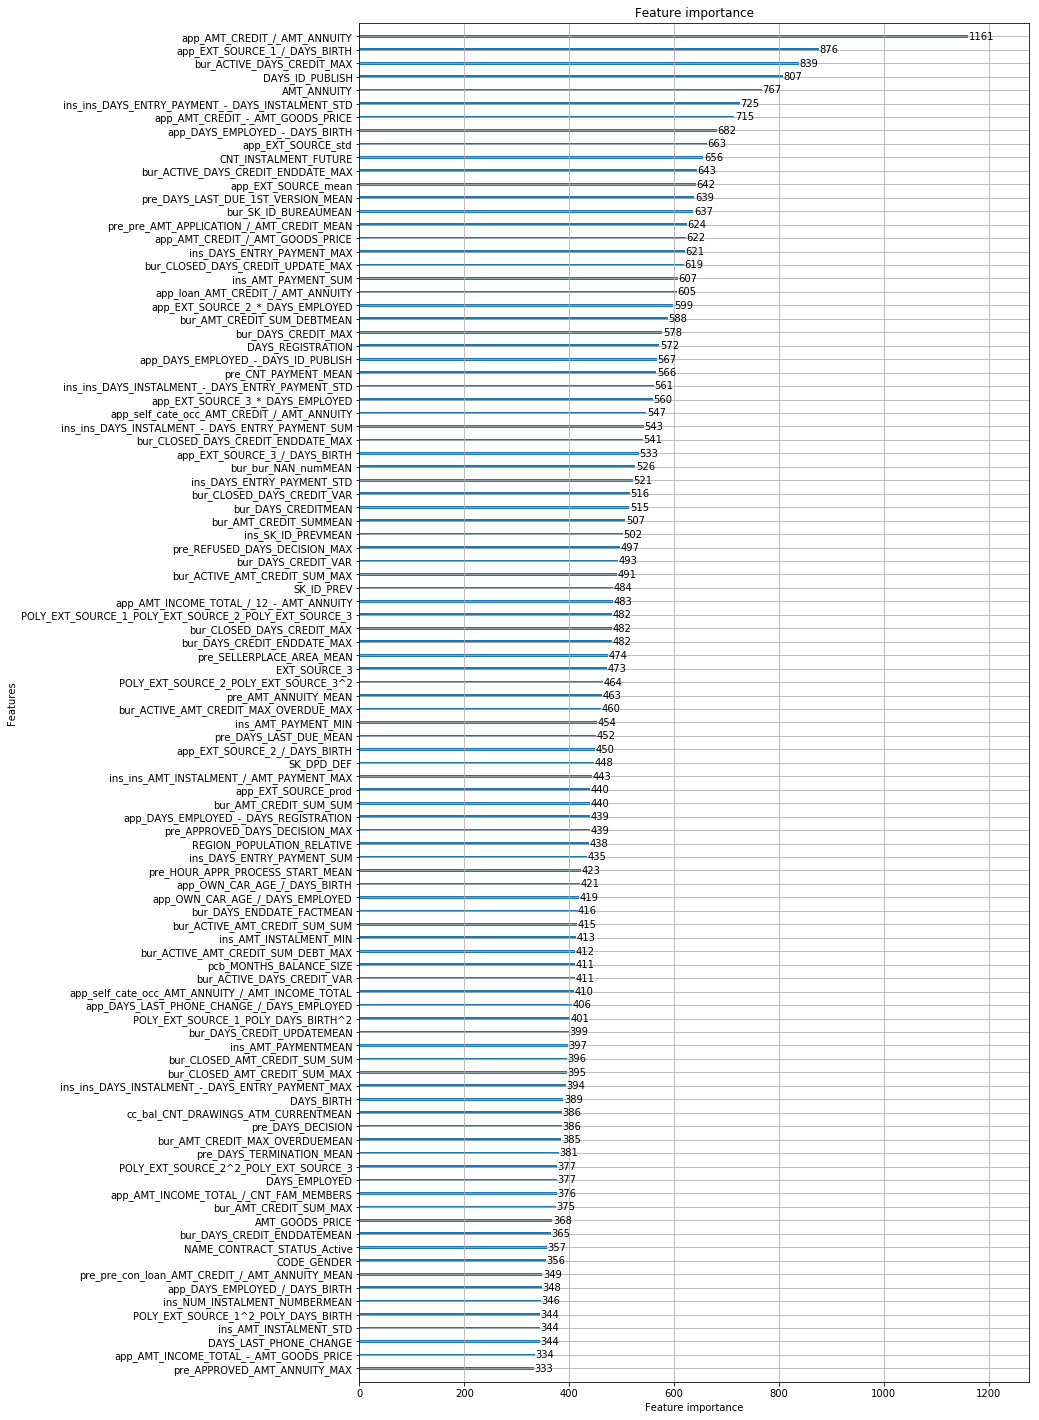

In [92]:
lgb.plot_importance(clf, figsize=(12, 25), max_num_features=100);


### <a id="5.1">5.1 Predict</a>

In [93]:
preds = np.mean(list_preds, axis=0)

#preds = None

    
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("../output/12.csv", index=False)
sub_lgb.head()

SK_ID_CURR    TARGET
0      100001  0.045278
1      100005  0.138267
2      100013  0.021935
3      100028  0.026035
4      100038  0.134476

In [94]:
print('my base lgbm + probause, app domain, poly, data clean, agg feature, category feature')
print(sc_auc_score, ',' ,max_score)

my base lgbm + probause, app domain, poly, data clean, agg feature, category feature
0.7895267061823286 , 0.7913907438241653


In [97]:
print('result: 0.791')

result: 0.791


In [96]:
max_params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 7,
 'metric': 'auc',
 'min_child_weight': 1,
 'min_split_gain': 0.01,
 'num_iteration': 5000,
 'num_leaves': 64,
 'objective': 'binary',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.9,
 'task': 'train',
 'verbose': 0}